# Temperature Forecast Project using ML
Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

Dataset Link-

https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv


# Predicting maximum tempreture for next day-

In [610]:
#Importing libraries-

In [611]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [612]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [613]:
#List of columns in the dataset-

In [614]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [615]:
df.shape

(7752, 25)

The dataset contains the 7752 rows and 25 columns & we have to predict next day minimum & maximum tempreture so here we can say it is a regression problem.

# Data cleaning-

In [616]:
#Checking values counts in each column-

In [617]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64


30-06-2013    25
18-07-2016    25
25-07-2016    25
24-07-2016    25
23-07-2016    25
              ..
09-08-2014    25
08-08-2014    25
07-08-2014    25
06-08-2014    25
30-08-2017    25
Name: Date, Length: 310, dtype: int64


31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 167, dtype: int64


24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: Present_Tmin, Length: 155, dtype: int64


19.794666    2
71.658089    2
77.030350    2
98.524734    2
51.810596    2
        

In [618]:
df.nunique().to_frame('no of unique values')

no of unique values
station                            25
Date                              310
Present_Tmax                      167
Present_Tmin                      155
LDAPS_RHmin                      7672
LDAPS_RHmax                      7664
LDAPS_Tmax_lapse                 7675
LDAPS_Tmin_lapse                 7675
LDAPS_WS                         7675
LDAPS_LH                         7675
LDAPS_CC1                        7569
LDAPS_CC2                        7582
LDAPS_CC3                        7599
LDAPS_CC4                        7524
LDAPS_PPT1                       2812
LDAPS_PPT2                       2510
LDAPS_PPT3                       2356
LDAPS_PPT4                       1918
lat                                12
lon                                25
DEM                                25
Slope                              27
Solar radiation                  1575
Next_Tmax                         183
Next_Tmin                         157

In [619]:
#Checking null values-

In [620]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [621]:
#Dropping Null values-

In [622]:
df= df.dropna()

In [623]:
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7745     21.0  30-08-2017          23.1          17.8    24.688997   
7746     22.0  30-08-2017          22.5          17.4    30.094858   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936  6.818887   69.451805   
1       90.604721         29.850689         24.035009  5.691890   51.937448   
2       83.973587         30.091292         24.565633  6.138224   20.573050   
3       96.483688         29.704629         23.326177  5.650050   65.727144   
4       90.155128         29.113934         23.486480  5.735004  107.965535   
...           ...               ...               ...       ...         ...   
7745    78.261383         27.812697         18.303014  6.603253    9.614074   
7746    83.690018         26.704905         17.814038  5.768083   82.146707   
7747    78.869858         26.352081         18.775678  6.148918   72.058294   
7748    77.294975         27.010193         18.733519  6.542819   47.241457   
7749    77.243744         27.939516         18.522965  7.289264    9.090034   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...         0.0         0.0         0.0  37.6046  126.991  212.3350   
1     ...         0.0         0.0         0.0  37.6046  127.032   44.7624   
2     ...         0.0         0.0         0.0  37.5776  127.058   33.3068   
3     ...         0.0         0.0         0.0  37.6450  127.022   45.7160   
4     ...         0.0         0.0         0.0  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7745  ...         0.0         0.0         0.0  37.5507  127.040   26.2980   
7746  ...         0.0         0.0         0.0  37.5102  127.086   21.9668   
7747  ...         0.0         0.0         0.0  37.5372  126.891   15.5876   
7748  ...         0.0         0.0         0.0  37.5237  126.909   17.2956   
7749  ...         0.0         0.0         0.0  37.5237  126.970   19.5844   

       Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.7850      5992.895996       29.1       21.2  
1     0.5141      5869.312500       30.5       22.5  
2     0.2661      5863.555664       31.1       23.9  
3     2.5348      5856.964844       31.7       24.3  
4     0.5055      5859.552246       31.2       22.5  
...      ...              ...        ...        ...  
7745  0.5721      4456.024414       27.6       17.7  
7746  0.1332      4441.803711       28.0       17.1  
7747  0.1554      4443.313965       28.3       18.1  
7748  0.2223      4438.373535       28.6       18.8  
7749  0.2713      4451.345215       27.8       17.4  

[7588 rows x 25 columns]

In [624]:
#Checking null values again-

In [625]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [626]:
df.isnull().sum().sum()

0

Here we can see that null values are 0 now.

In [627]:
#Checking for duplicated values-

In [628]:
df.duplicated().sum()

0

There are no duplicate values present in the dataset.

In [629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


Here we can see that data set contains object data which we need to change moving further for model building.

In [630]:
#Convert date time format-

In [631]:
df['Date']=pd.to_datetime(df.Date,format='%d-%m-%Y')

In [632]:
#Checking data type again-

In [633]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7588 non-null   float64       
 1   Date              7588 non-null   datetime64[ns]
 2   Present_Tmax      7588 non-null   float64       
 3   Present_Tmin      7588 non-null   float64       
 4   LDAPS_RHmin       7588 non-null   float64       
 5   LDAPS_RHmax       7588 non-null   float64       
 6   LDAPS_Tmax_lapse  7588 non-null   float64       
 7   LDAPS_Tmin_lapse  7588 non-null   float64       
 8   LDAPS_WS          7588 non-null   float64       
 9   LDAPS_LH          7588 non-null   float64       
 10  LDAPS_CC1         7588 non-null   float64       
 11  LDAPS_CC2         7588 non-null   float64       
 12  LDAPS_CC3         7588 non-null   float64       
 13  LDAPS_CC4         7588 non-null   float64       
 14  LDAPS_PPT1        7588 n

In [634]:
df.set_index('Date',inplace=True)
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688    91.116364   
2013-06-30      2.0          31.9          21.6    52.263397    90.604721   
2013-06-30      3.0          31.6          23.3    48.690479    83.973587   
2013-06-30      4.0          32.0          23.4    58.239788    96.483688   
2013-06-30      5.0          31.4          21.9    56.174095    90.155128   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997    78.261383   
2017-08-30     22.0          22.5          17.4    30.094858    83.690018   
2017-08-30     23.0          23.3          17.1    26.741310    78.869858   
2017-08-30     24.0          23.3          17.7    24.040634    77.294975   
2017-08-30     25.0          23.2          17.4    22.933014    77.243744   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
Date                                                                   
2013-06-30         28.074101         23.006936  6.818887   69.451805   
2013-06-30         29.850689         24.035009  5.691890   51.937448   
2013-06-30         30.091292         24.565633  6.138224   20.573050   
2013-06-30         29.704629         23.326177  5.650050   65.727144   
2013-06-30         29.113934         23.486480  5.735004  107.965535   
...                      ...               ...       ...         ...   
2017-08-30         27.812697         18.303014  6.603253    9.614074   
2017-08-30         26.704905         17.814038  5.768083   82.146707   
2017-08-30         26.352081         18.775678  6.148918   72.058294   
2017-08-30         27.010193         18.733519  6.542819   47.241457   
2017-08-30         27.939516         18.522965  7.289264    9.090034   

            LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
Date                   ...                                                
2013-06-30   0.233947  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.225508  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.209344  ...         0.0         0.0         0.0  37.5776   
2013-06-30   0.216372  ...         0.0         0.0         0.0  37.6450   
2013-06-30   0.151407  ...         0.0         0.0         0.0  37.5507   
...               ...  ...         ...         ...         ...      ...   
2017-08-30   0.052902  ...         0.0         0.0         0.0  37.5507   
2017-08-30   0.066461  ...         0.0         0.0         0.0  37.5102   
2017-08-30   0.030034  ...         0.0         0.0         0.0  37.5372   
2017-08-30   0.035874  ...         0.0         0.0         0.0  37.5237   
2017-08-30   0.048954  ...         0.0         0.0         0.0  37.5237   

                lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                          
2013-06-30  126.991  212.3350  2.7850      5992.895996       29.1       21.2  
2013-06-30  127.032   44.7624  0.5141      5869.312500       30.5       22.5  
2013-06-30  127.058   33.3068  0.2661      5863.555664       31.1       23.9  
2013-06-30  127.022   45.7160  2.5348      5856.964844       31.7       24.3  
2013-06-30  127.135   35.0380  0.5055      5859.552246       31.2       22.5  
...             ...       ...     ...              ...        ...        ...  
2017-08-30  127.040   26.2980  0.5721      4456.024414       27.6       17.7  
2017-08-30  127.086   21.9668  0.1332      4441.803711       28.0       17.1  
2017-08-30  126.891   15.5876  0.1554      4443.313965       28.3       18.1  
2017-08-30  126.909   17.2956  0.2223      4438.373535       28.6       18.8  
2017-08-30  126.970   19.5844  0.2713      4451.345215       27.8       17.4  

[7588 rows x 24 columns]

In [635]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7588.000000  ...  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.368510  ...     0.480738     0.275007     0.265373    37.544792   
std       0.262260  ...     1.743327     1.146087     1.179661     0.050428   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146546  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315706  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.574174  ...     0.017735     0.007855     0.000017    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

              lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7588.00000  7588.000000  7588.000000      7588.000000  7588.000000   
mean    126.99142    61.918136     1.259755      5343.724208    30.241526   
std       0.07922    54.323529     1.372748       429.782561     3.111807   
min     126.82600    12.370000     0.098500      4329.520508    17.400000   
25%     126.93700    28.700000     0.271300      5001.485717    28.200000   
50%     126.99500    45.716000     0.618000      5441.987305    30.400000   
75%     127.04200    59.832400     1.767800      5729.485840    32.600000   
max     127.13500   212.335000     5.178200      5992.895996    38.900000   

         Next_Tmin  
count  7588.000000  
mean     22.910820  
std       2.482256  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

# Observations-

1. The count of all the columns are same which means there are no null values prsent in the dataset.
2. in columns like LDAPS_RHmin,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope the mean is greater than the median which means the data may be right skewed in these columns.
3. in columns like Present_Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,Solar radiation,Next_Tmin the median is greater than the mean which means the data is left skewed in these columns.
4. in columns like LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope there is huge difference bw 75% and maximum value which means there may be outliers in these columns.

# Univariate analysis-

<AxesSubplot:xlabel='Present_Tmax', ylabel='Count'>

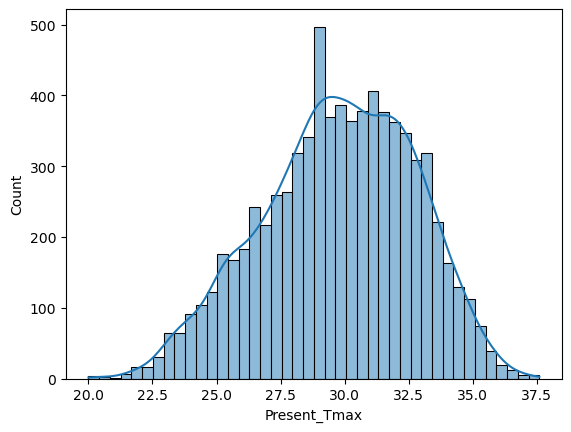

In [258]:
sns.histplot(df['Present_Tmax'],kde=True)

The present day air tempreture is with 20 degree celcius to 37.5 degree celcius.

<AxesSubplot:xlabel='Present_Tmin', ylabel='Count'>

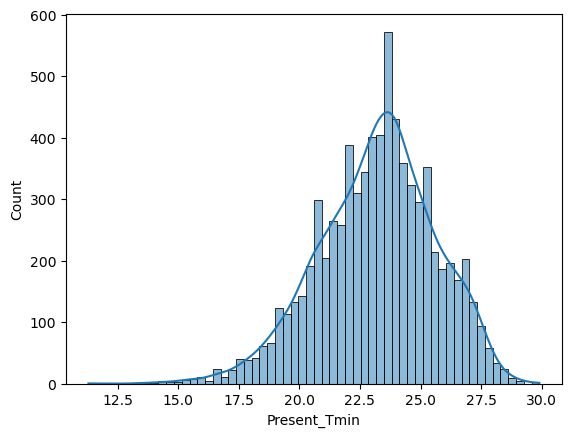

In [33]:
sns.histplot(df['Present_Tmin'],kde=True)

Here we can see that present day minimum tempreture is with in the range of 12.5 degree celcius to 30.0 degree celcius.

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Count'>

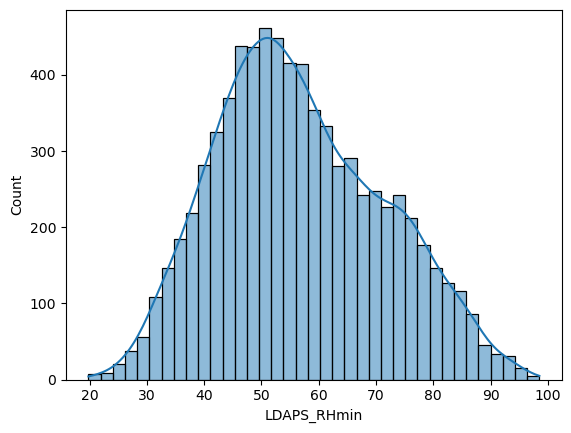

In [34]:
sns.histplot(df['LDAPS_RHmin'],kde=True)

Here we can see that within the dataset the next-day minimum relative humidity is in the range of 20% to 100%.

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Count'>

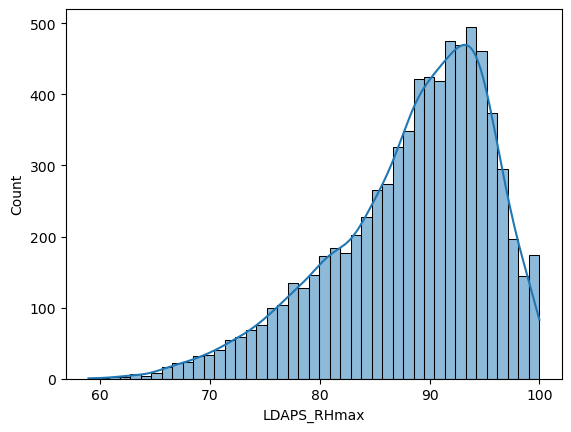

In [35]:
sns.histplot(df['LDAPS_RHmax'],kde=True)

Here we can see that within the dataset the next-day maximum relative humidity is in the range of 60% to 100%.

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Count'>

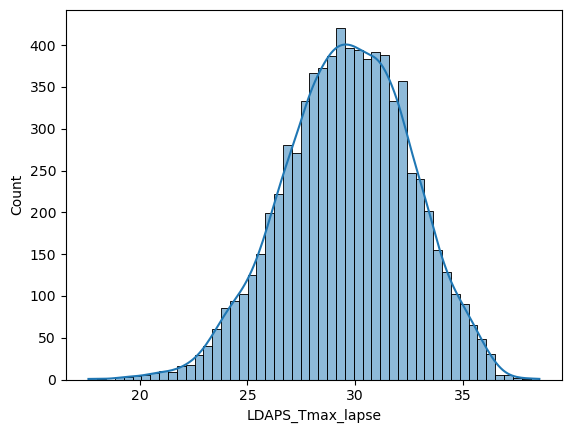

In [36]:
sns.histplot(df['LDAPS_Tmax_lapse'],kde=True)

here we can see that with in the data set the next-day maximum air temperature applied lapse rate is with in the range of 17 degree celcius to 38 degree celcius.

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Count'>

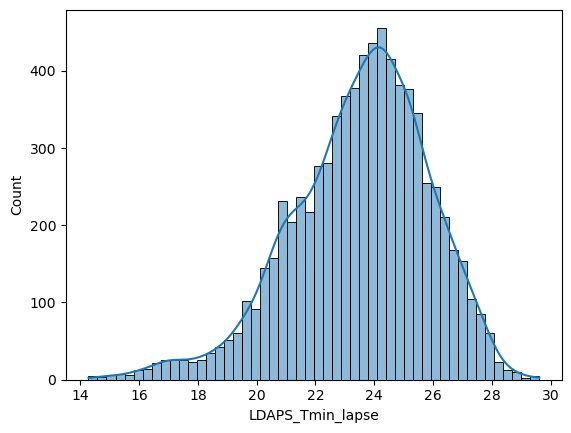

In [37]:
sns.histplot(df['LDAPS_Tmin_lapse'],kde=True)

here we can see that with in the data set the next-day minimum air temperature applied lapse rate  is with in the range of 14 degree celcius to 29 degree celcius.

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Count'>

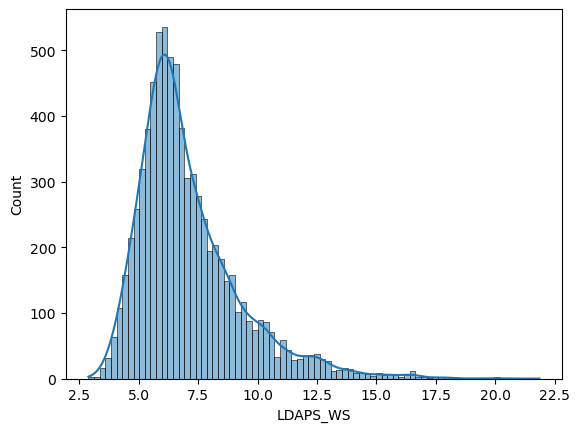

In [38]:
sns.histplot(df['LDAPS_WS'],kde=True)

next-day average wind speed is in the range of 2m/sec to 22 m/sec.

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Count'>

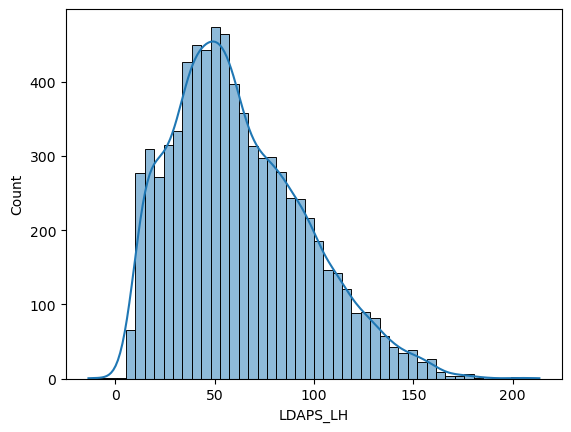

In [39]:
sns.histplot(df['LDAPS_LH'],kde=True)

next-day average latent heat flux with in the range of -13 W/m2 to 213 W/m2.

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Count'>

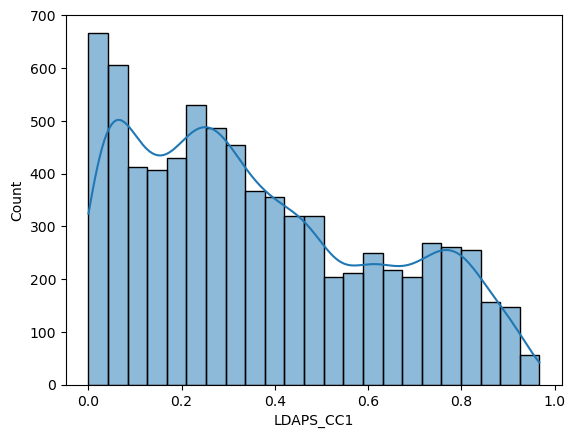

In [40]:
sns.histplot(df['LDAPS_CC1'],kde=True)

next-day 1st 6-hour split average cloud cover with in the range of 0% to 1%

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Count'>

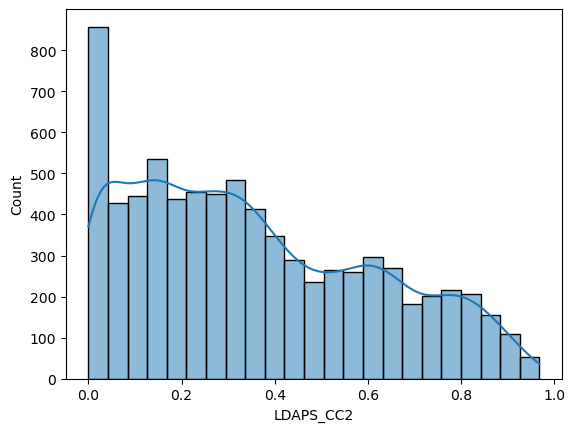

In [41]:
sns.histplot(df['LDAPS_CC2'],kde=True)

next-day 2nd 6-hour split average cloud cover with in the range of 0% to 1%

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Count'>

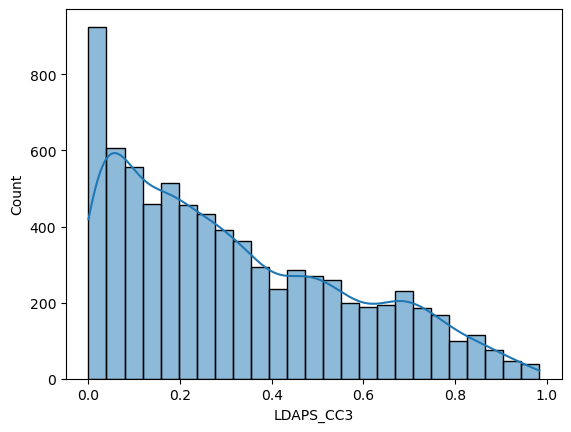

In [42]:
sns.histplot(df['LDAPS_CC3'],kde=True)

forecast of next-day 3rd 6-hour split average cloud cover with in the range of 0% to 1%.

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Count'>

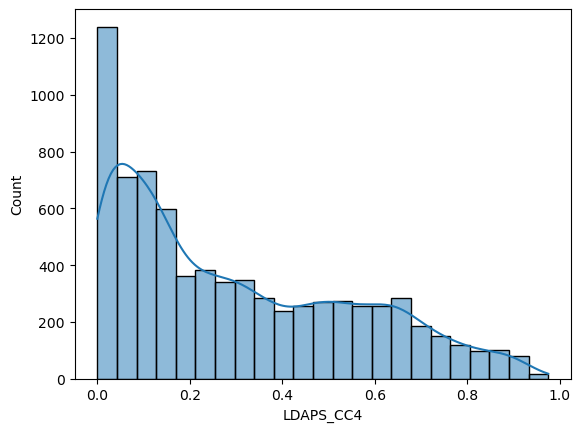

In [43]:
sns.histplot(df['LDAPS_CC4'],kde=True)

forecast of next-day 4th 6-hour split average cloud cover with in the range of 0% to 1%.

<AxesSubplot:xlabel='lat', ylabel='Count'>

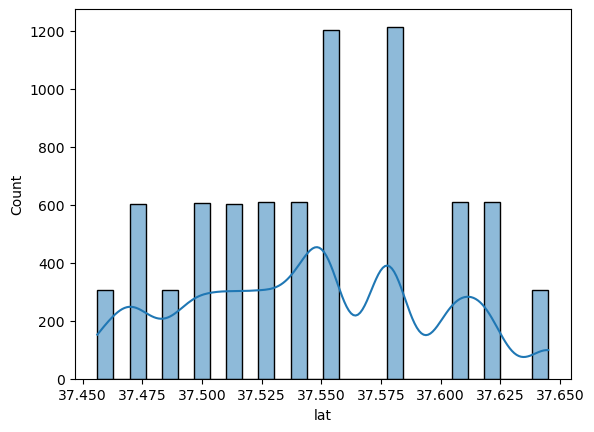

In [49]:
sns.histplot(df['lat'],kde=True)

Latitude covers with in the range 37.450 to 37.645 Adegree.

<AxesSubplot:xlabel='lon', ylabel='Count'>

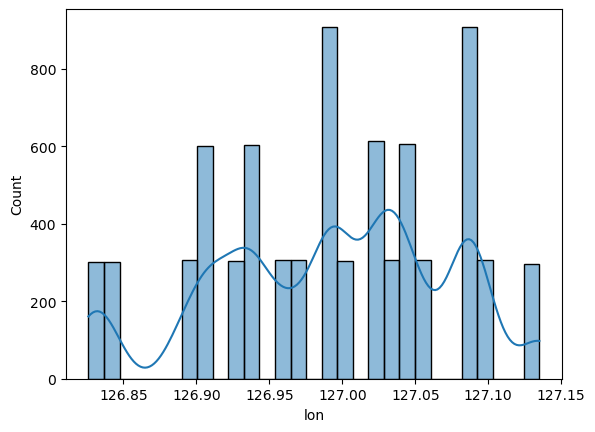

In [50]:
sns.histplot(df['lon'],kde=True)

Longitude covers with in the range of 126.826 to 127.135 A degree.

<AxesSubplot:xlabel='DEM', ylabel='Count'>

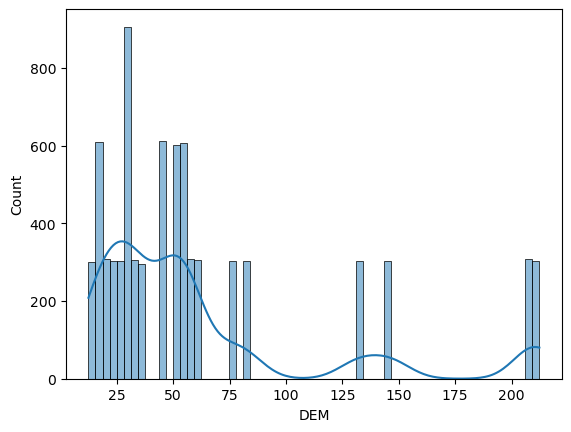

In [51]:
sns.histplot(df['DEM'],kde=True)

Elevation  covers with in the range of 12.4 to 212.3m.

<AxesSubplot:xlabel='Slope', ylabel='Count'>

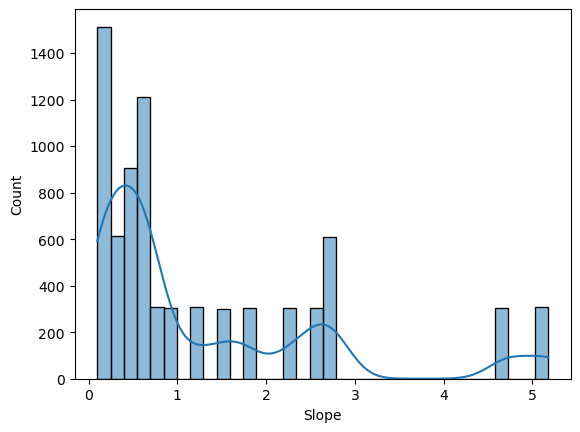

In [52]:
sns.histplot(df['Slope'],kde=True)

Slope covers with in the range of 0.1 to 5.2 Adegree.

<AxesSubplot:xlabel='Solar radiation', ylabel='Count'>

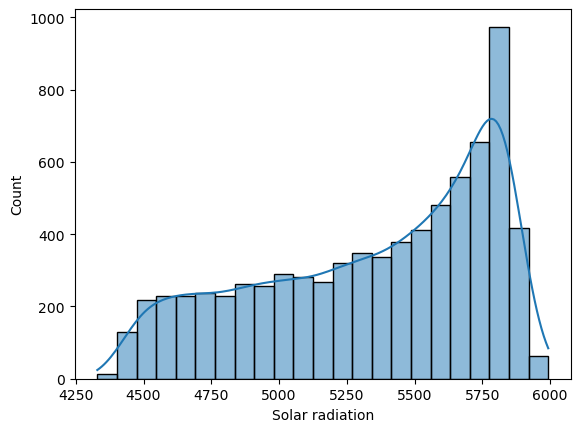

In [53]:
sns.histplot(df['Solar radiation'],kde=True)

Solar radiation  covers with in the range of 4329.5 to 5992.9 wh/m2.

<AxesSubplot:xlabel='Next_Tmax', ylabel='Count'>

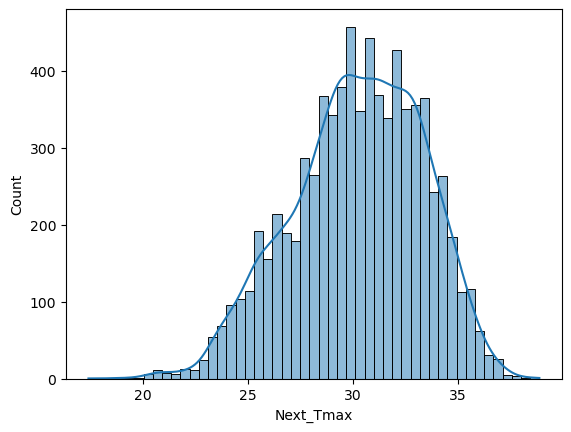

In [54]:
sns.histplot(df['Next_Tmax'],kde=True)

The next-day maximum air temperature with in the range of 17 to 38 (Â°C).

<AxesSubplot:xlabel='Next_Tmin', ylabel='Count'>

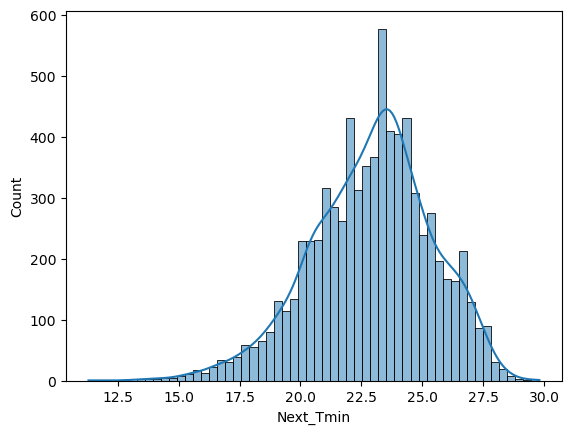

In [55]:
sns.histplot(df['Next_Tmin'],kde=True)

The next-day minimum air temperature with in the range of 12 to 30 (Â°C).

# Bivariate analysis-

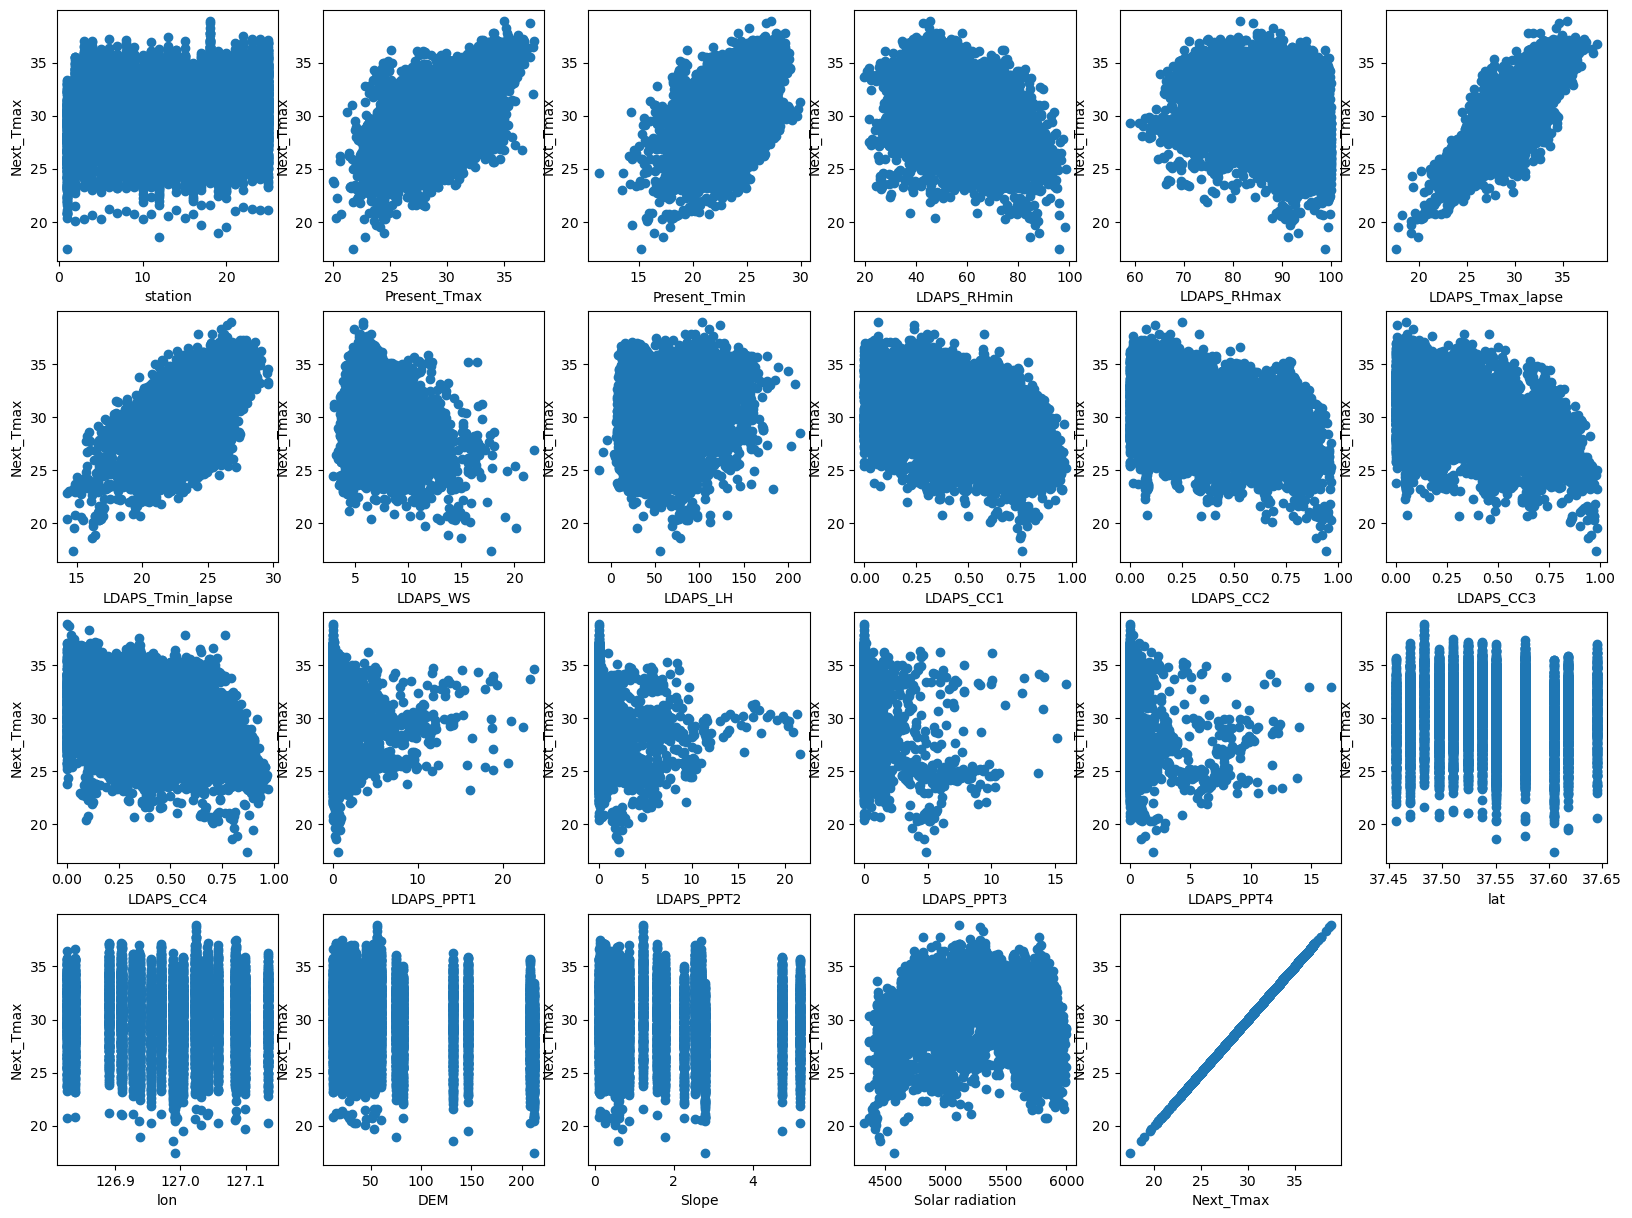

In [66]:
plt.figure(figsize=(20,15))
plotnumber=1

for i in df.columns:
    if plotnumber<24:
        plt.subplot(4,6,plotnumber)
        plt.scatter(x=i,y='Next_Tmax',data=df)
        plt.xlabel(i)
        plt.ylabel('Next_Tmax')
    plotnumber+=1    
plt.show()    

# Observations-

1. Station has positive correlationship with Next_Tmax.
2. Present_Tmax has good positive correlationship with Next_Tmax.
3. Present_Tmin has good positive correlationship with Next_Tmax.
4. LDAPS_RHmin has negetive correlationship with Next_Tmax.
5. LDAPS_Tmax_lapse has good positive correlationship with Next_Tmax.
6. LDAPS_WS has negetive correlationship with Next_Tmax.
7. LDAPS_LH has positive correlationship with Next_Tmax.
8. LDAPS_CC1 has negetive correlationship with Next_Tmax.
9. LDAPS_CC2 has negetive correlationship with Next_Tmax.
10.LDAPS_CC3 has negetive correlationship with Next_Tmax.
11.LDAPS_CC4 has negetive correlationship with Next_Tmax.
12.LDAPS_PPT1 has negetive correlationship with Next_Tmax.
13.LDAPS_PPT2 has negetive correlationship with Next_Tmax.
14.LDAPS_PPT3 has negetive correlationship with Next_Tmax.
15.LDAPS_PPT4 has negetive correlationship with Next_Tmax.
16.lat has very less negetive correlationship with Next_Tmax.
17.lon has very less correlationship with Next_Tmax.
18.DEM has negetive correlationship with Next_Tmax.
19.Slope has negetive correlationship with Next_Tmax.
20.Solar radiation has very less correlationship with Next_Tmax.
21.Next_Tmin has good positive correlationship with Next_Tmax.

# Correlationship of features with target variable-

In [88]:
df.corr()['Next_Tmax'].sort_values()

LDAPS_CC3          -0.523061
LDAPS_CC2          -0.498295
LDAPS_CC1          -0.459705
LDAPS_CC4          -0.454039
LDAPS_RHmin        -0.446824
LDAPS_WS           -0.351107
LDAPS_RHmax        -0.289788
LDAPS_PPT3         -0.203554
LDAPS_PPT4         -0.190720
LDAPS_PPT2         -0.186722
DEM                -0.174578
LDAPS_PPT1         -0.125954
Slope              -0.104279
lat                -0.055367
lon                 0.003502
Solar radiation     0.016145
station             0.107747
LDAPS_LH            0.156779
Present_Tmin        0.463523
LDAPS_Tmin_lapse    0.592119
Present_Tmax        0.610357
Next_Tmin           0.616629
LDAPS_Tmax_lapse    0.835729
Next_Tmax           1.000000
Name: Next_Tmax, dtype: float64

Text(0.5, 1.0, 'correlationship bw features and target')

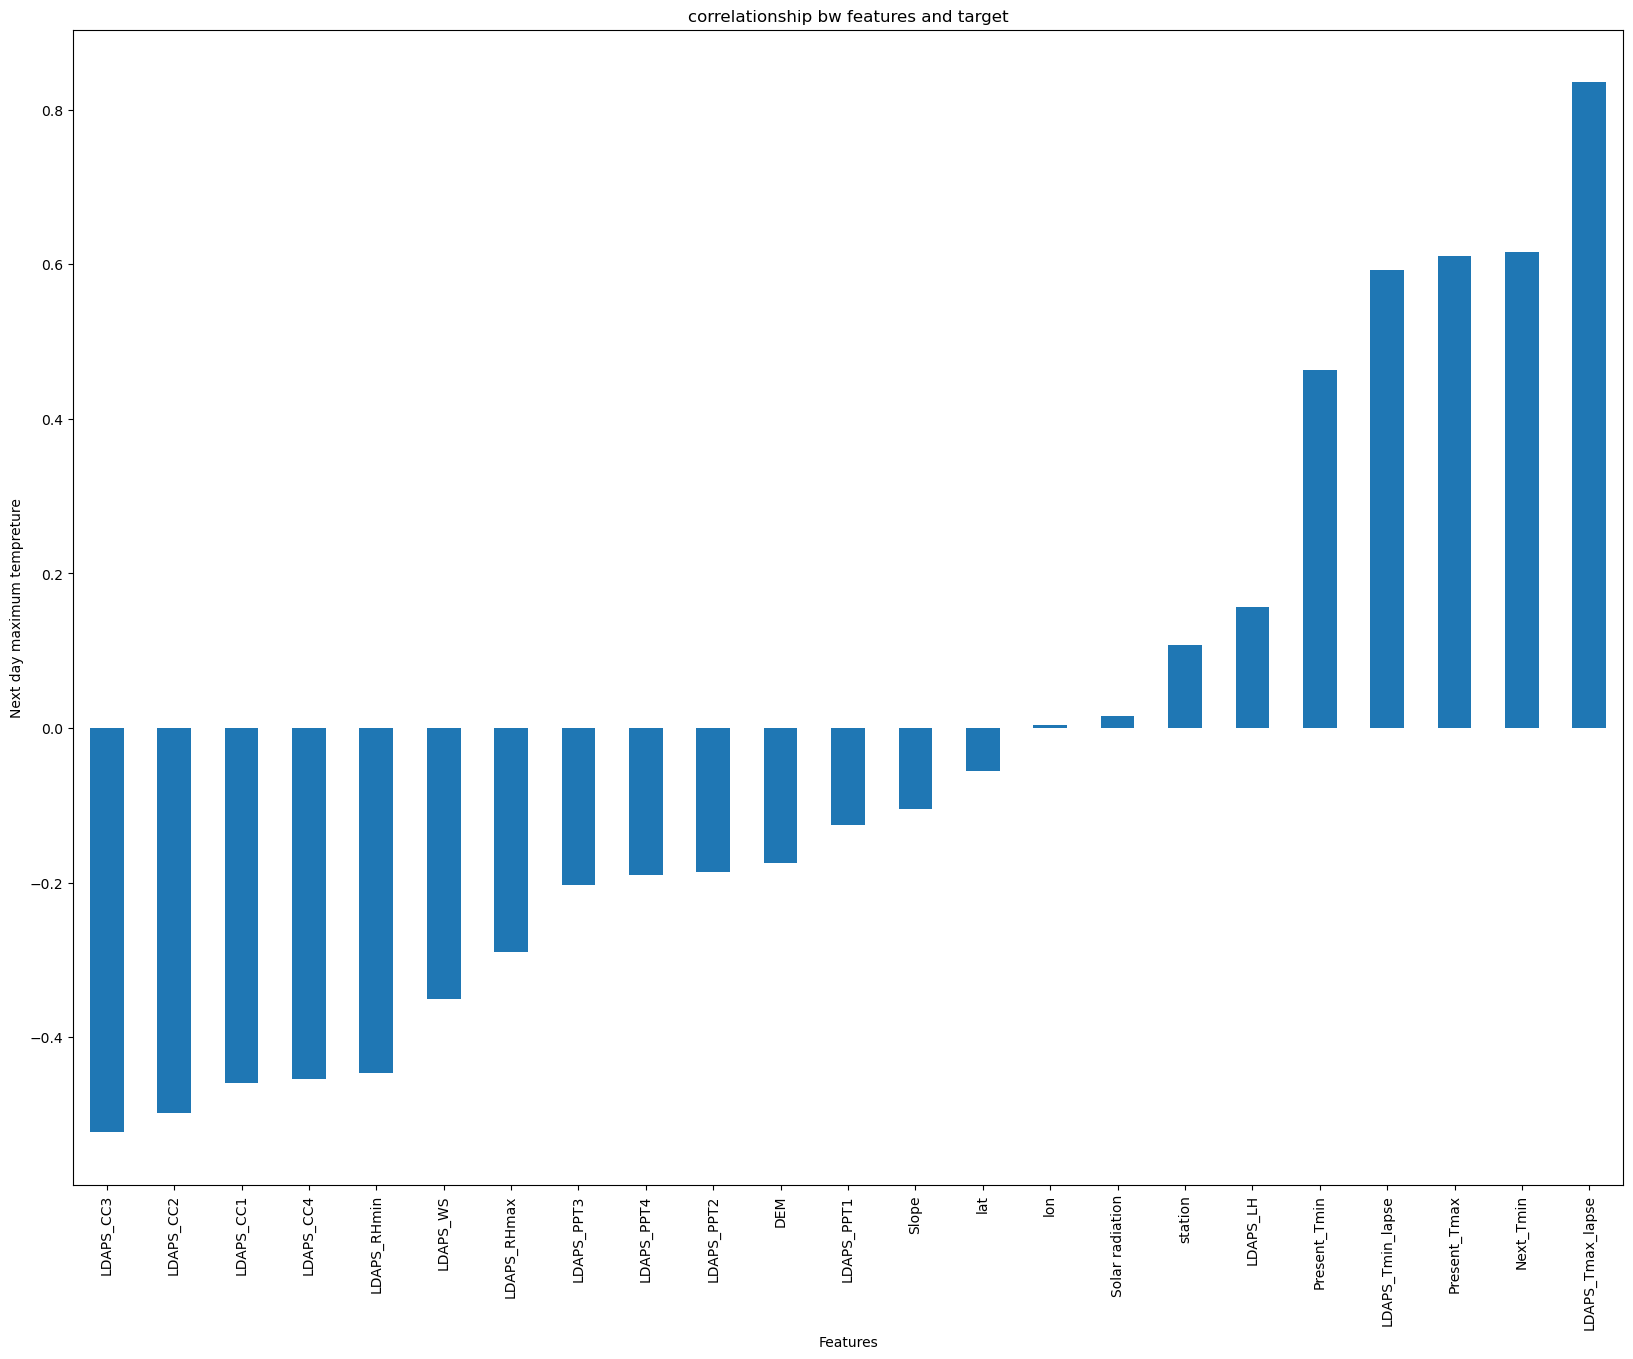

In [87]:
plt.figure(figsize=(20,15))
df.corr()['Next_Tmax'].sort_values().drop(['Next_Tmax']).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Next day maximum tempreture')
plt.title('correlationship bw features and target')

# Observations-

1. Here from the above plot we can see that longitude & solar readiation has the least correlationship with target variable.
2. LDAPS_Tmax_lapse,Present_Tmax,Next_Tmin has very good correlationship with target variable which means these features are affecting our target variable so much.
3. LDAPS_WS,LDAPS_RHmin,LDAPS_CC4,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3 has the moderate correlationship with target variable.

<AxesSubplot:xlabel='station', ylabel='Present_Tmax'>

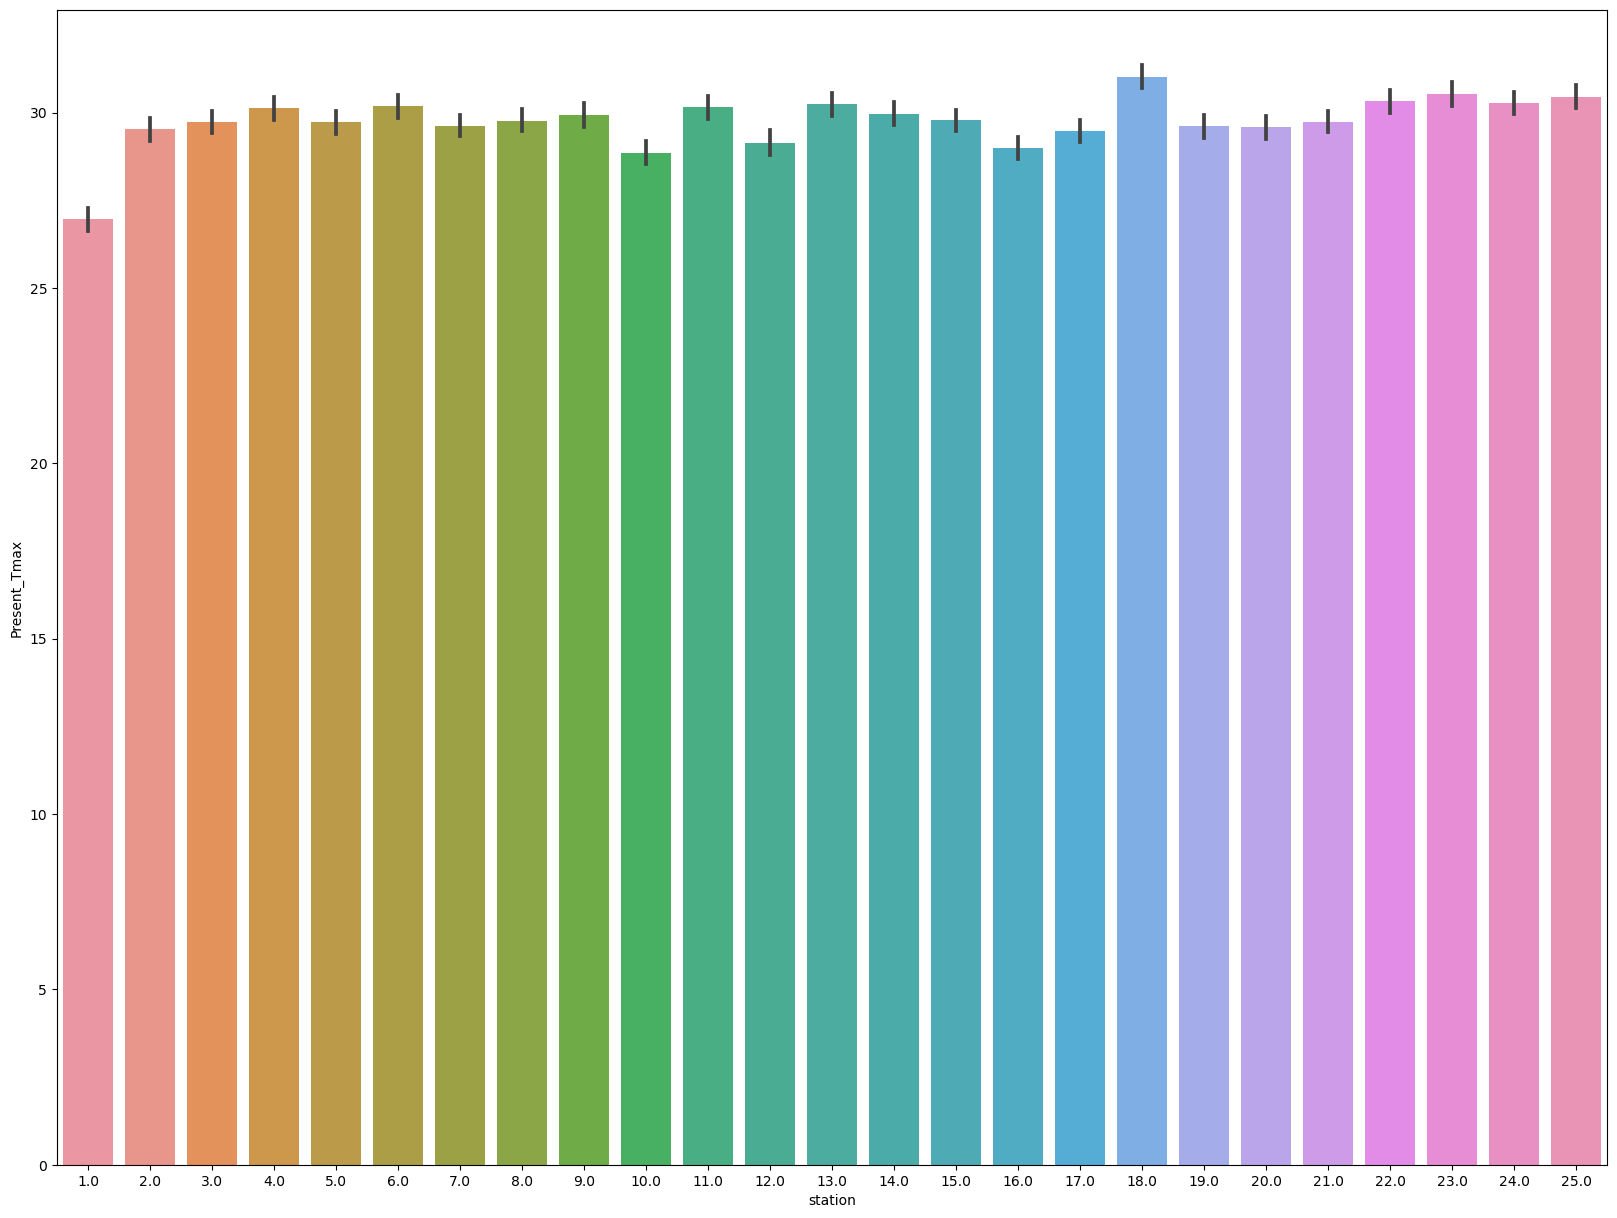

In [342]:
plt.figure(figsize=(20,15))
sns.barplot(x='station',y='Present_Tmax',data=df)

Present day maximum tempreture is highest for station 18 & lowest for station 1.

<AxesSubplot:xlabel='station', ylabel='Present_Tmin'>

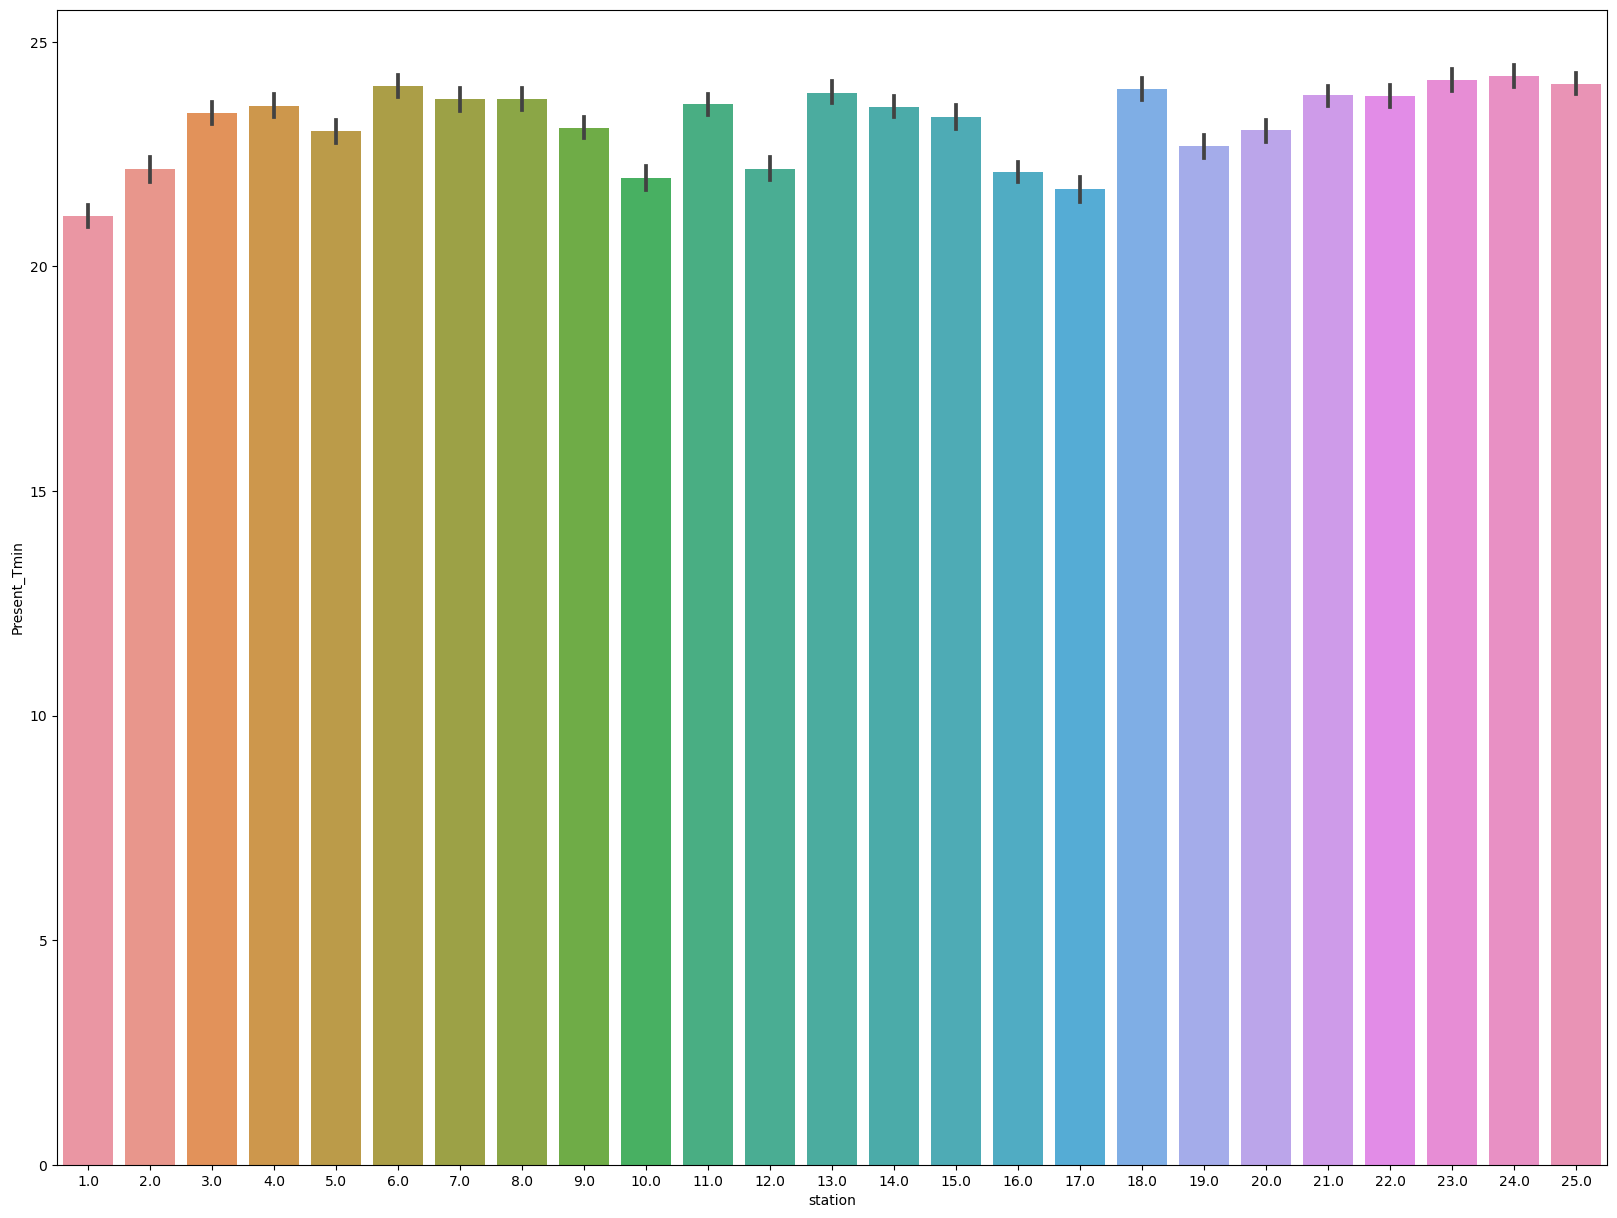

In [343]:
plt.figure(figsize=(20,15))
sns.barplot(x='station',y='Present_Tmin',data=df)

Present day minimum tempreture is highest for station 18 & lowest for station 1.

<AxesSubplot:xlabel='station', ylabel='LDAPS_RHmin'>

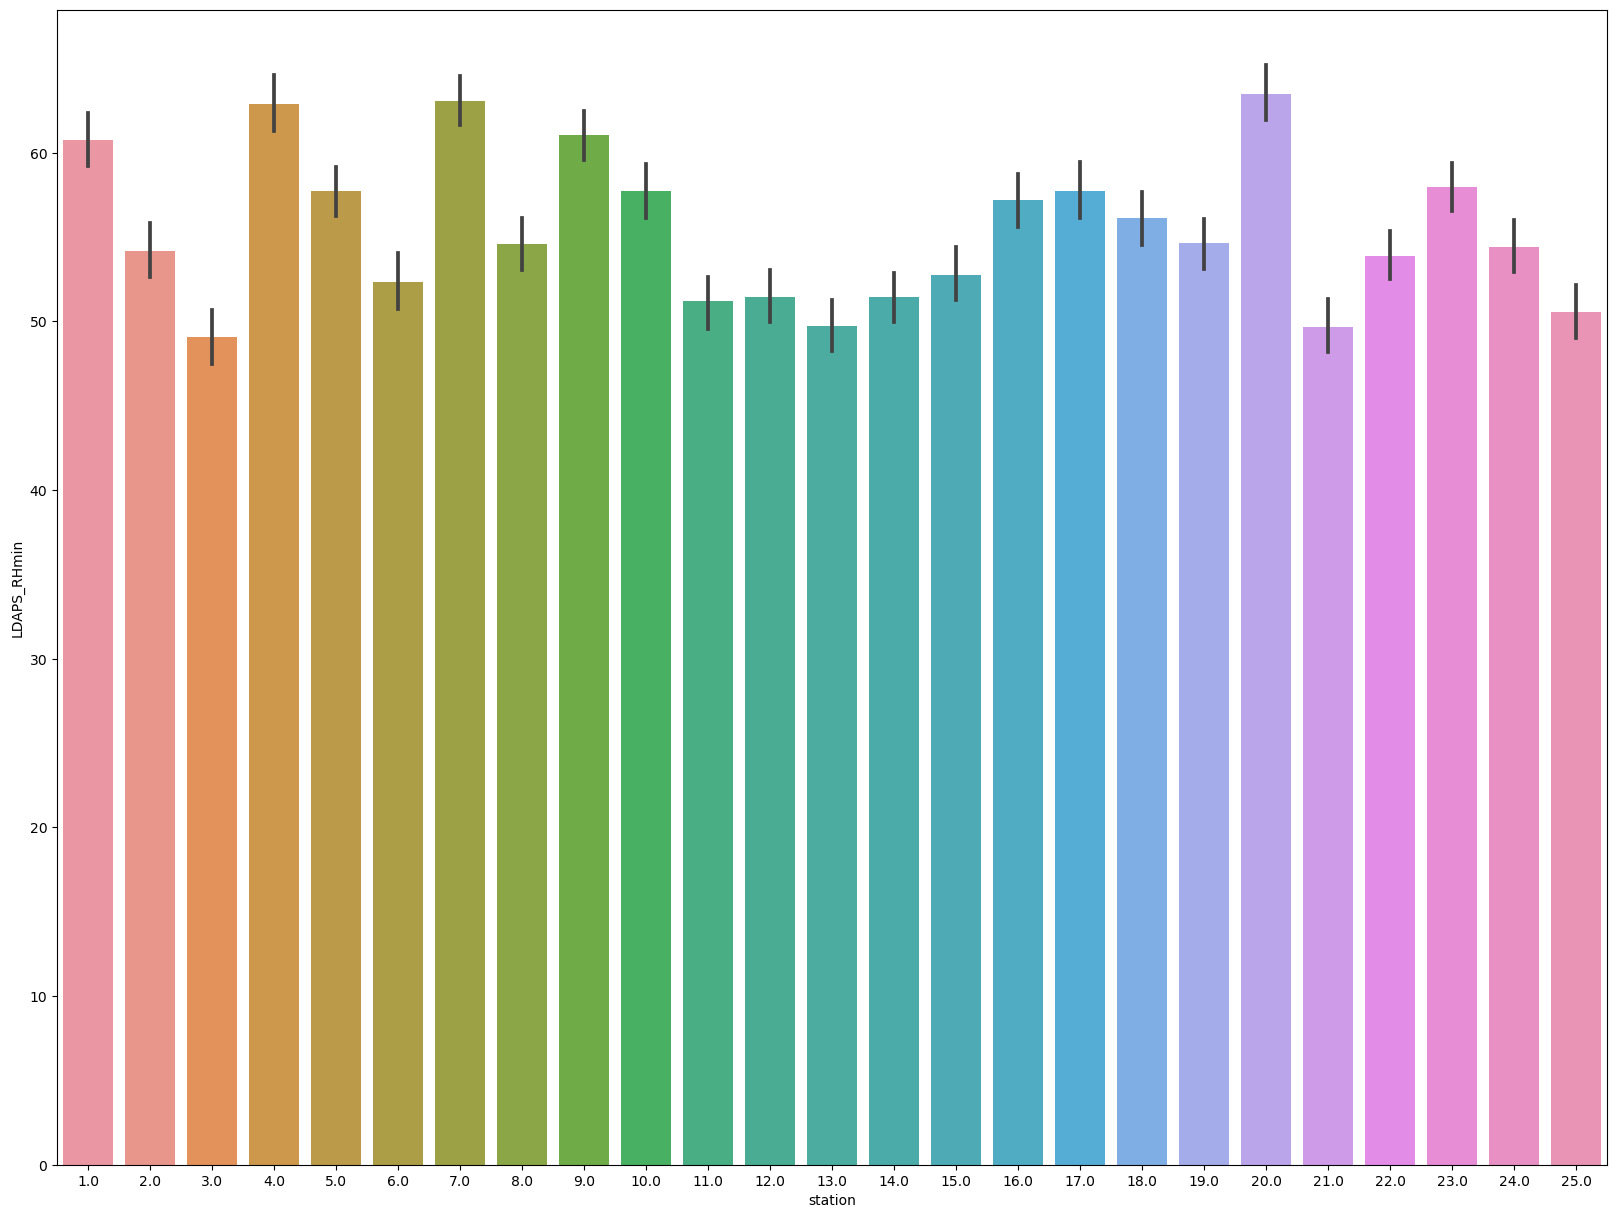

In [308]:
plt.figure(figsize=(20,15))
sns.barplot(x='station',y='LDAPS_RHmin',data=df)

next-day minimum relative humidity highest for station 20 & lowest for station 3.

<AxesSubplot:xlabel='station', ylabel='LDAPS_RHmax'>

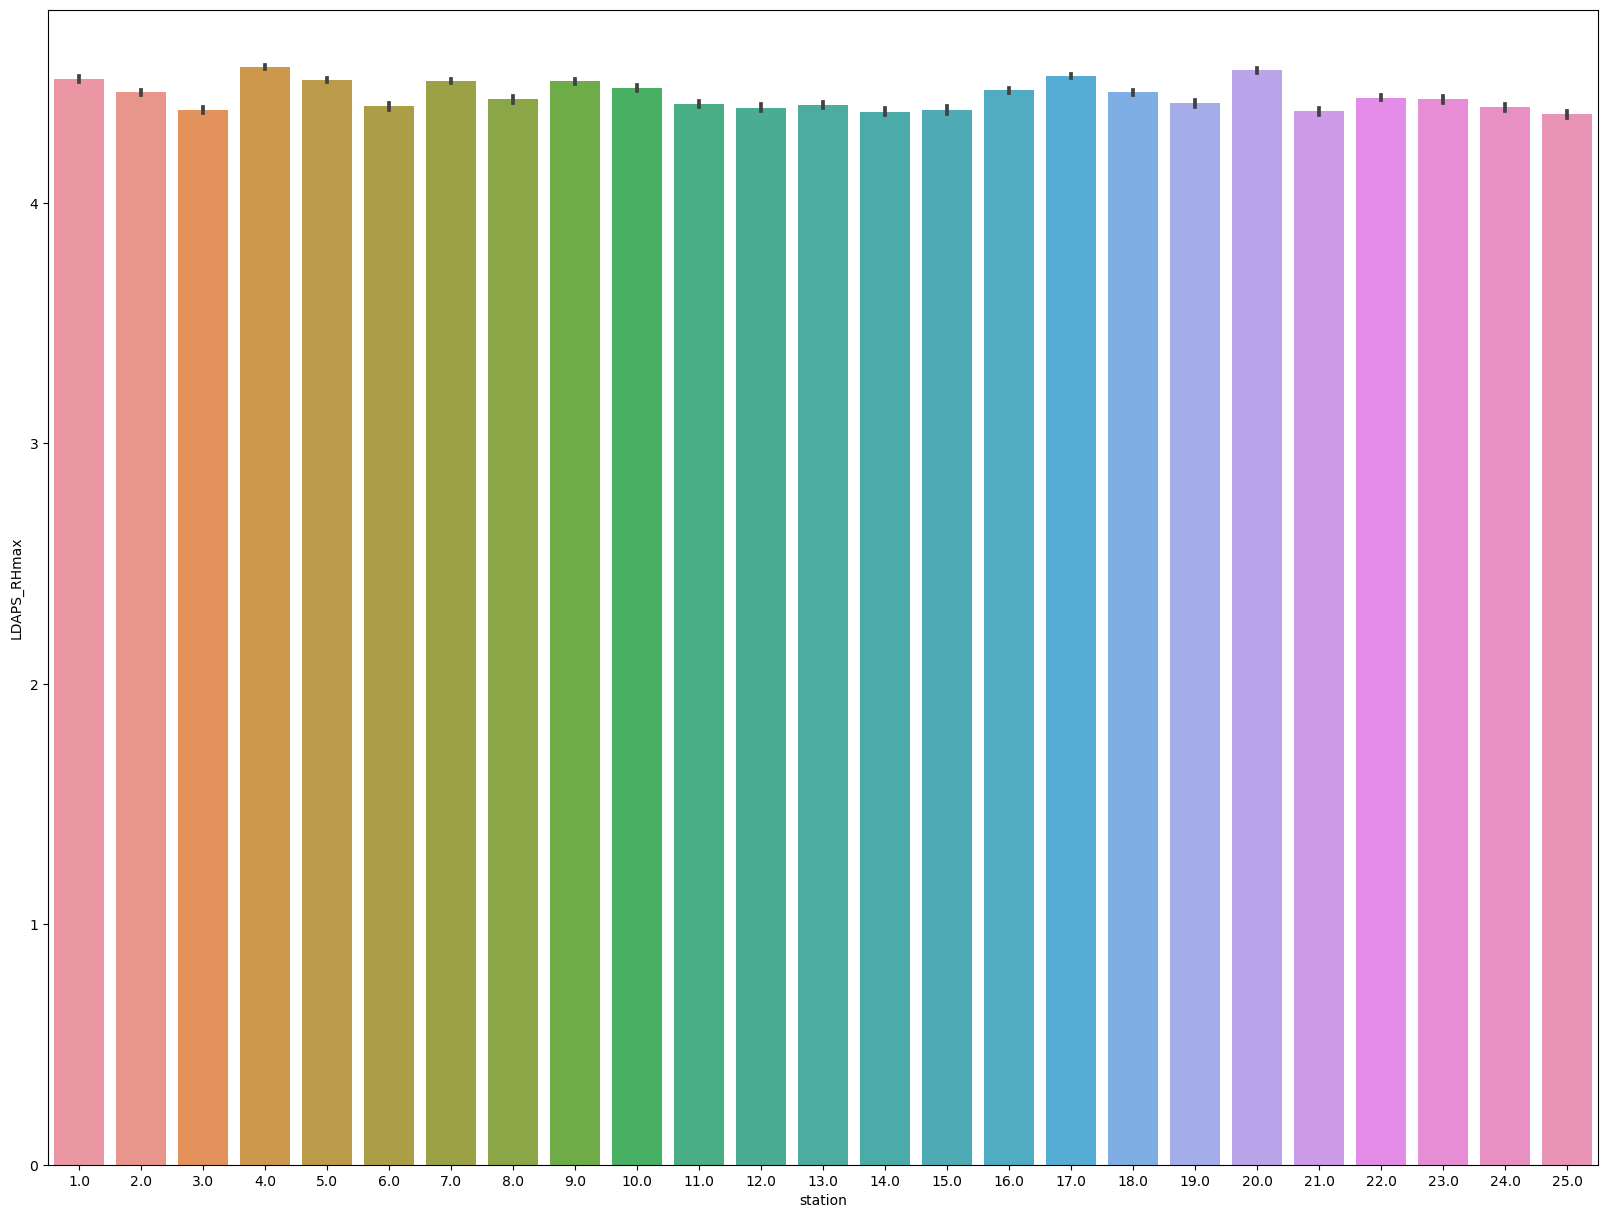

In [310]:
plt.figure(figsize=(20,15))
sns.barplot(x='station',y='LDAPS_RHmax',data=df)

next-day maximum relative humidity highest for station 20 & lowest for station 3.

<AxesSubplot:xlabel='station', ylabel='LDAPS_Tmax_lapse'>

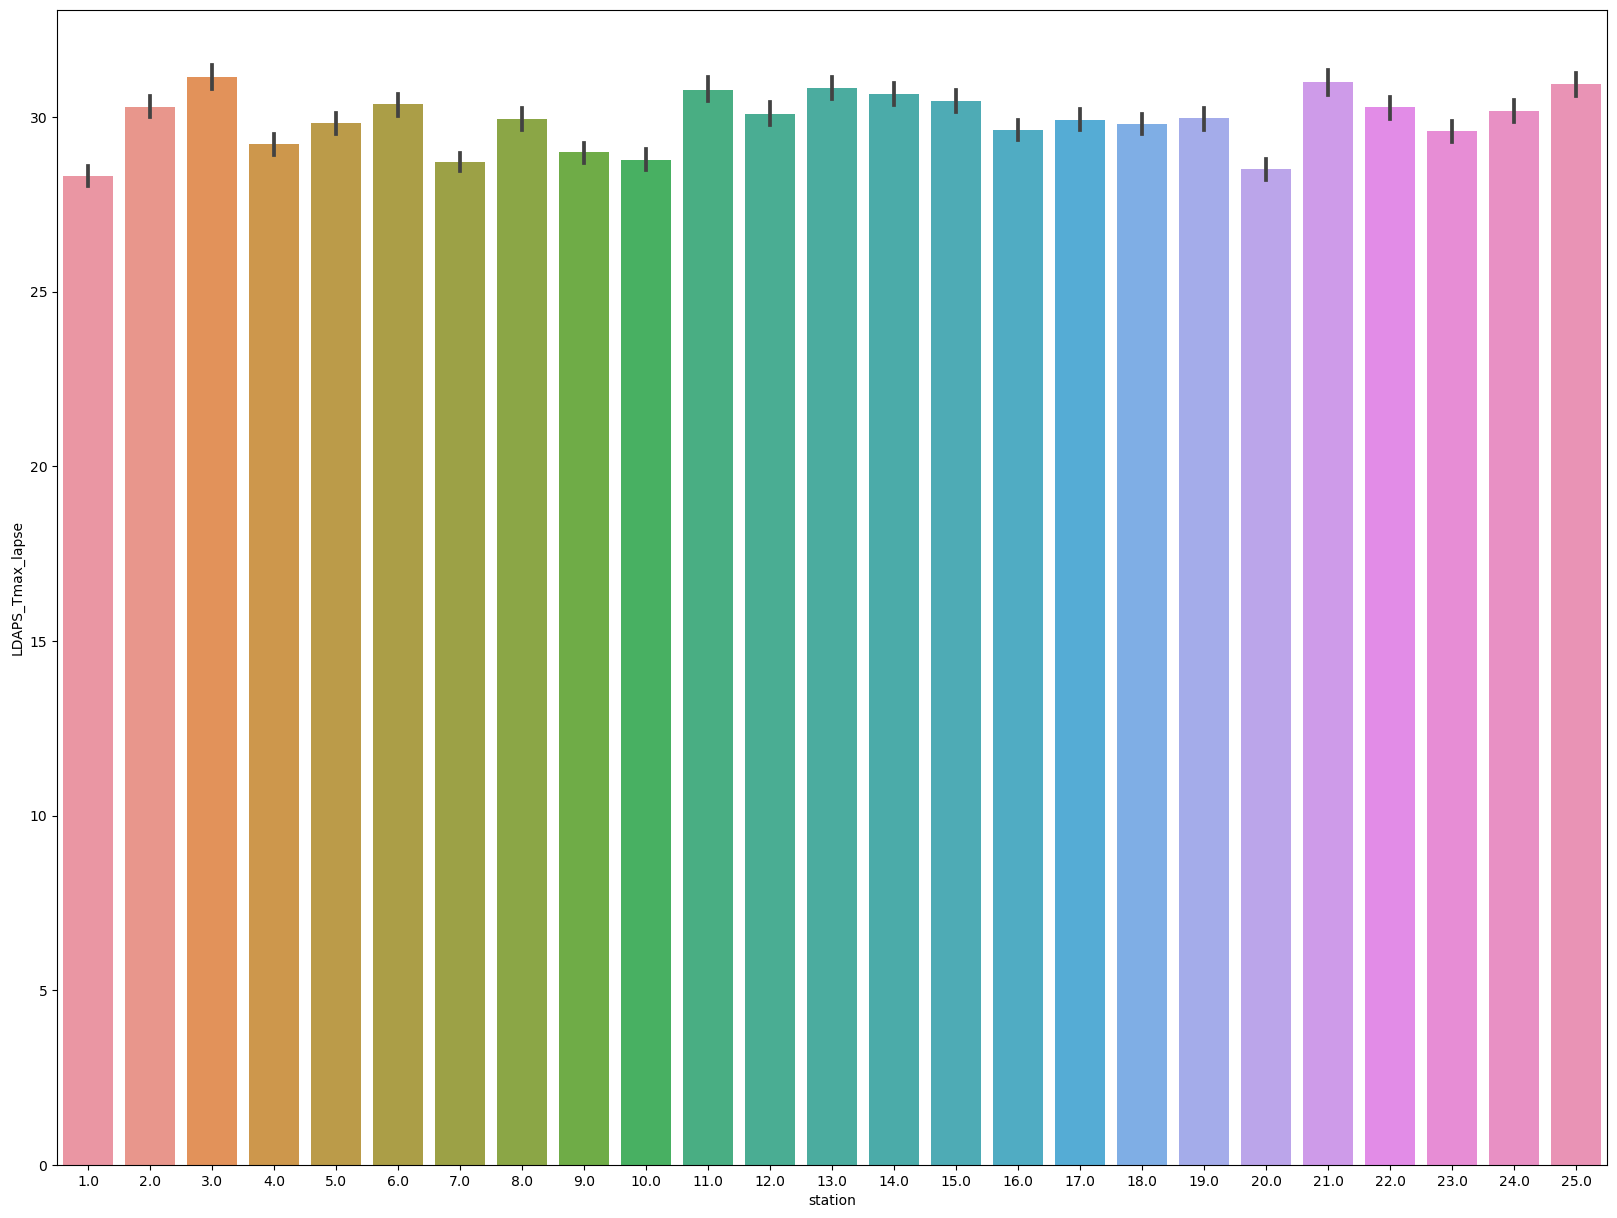

In [311]:
plt.figure(figsize=(20,15))
sns.barplot(x='station',y='LDAPS_Tmax_lapse',data=df)

Next-day maximum air temperature highest for station 21 & lowest for station 20. 

In [312]:
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     4.499858   
2013-06-30      2.0          31.9          21.6    52.263397     4.491419   
2013-06-30      3.0          31.6          23.3    48.690479     4.379060   
2013-06-30      4.0          32.0          23.4    58.239788     4.586534   
2013-06-30      5.0          31.4          21.9    56.174095     4.483978   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997     4.277426   
2017-08-30     22.0          22.5          17.4    30.094858     4.374125   
2017-08-30     23.0          23.3          17.1    26.741310     4.288483   
2017-08-30     24.0          23.3          17.7    24.040634     4.259746   
2017-08-30     25.0          23.2          17.4    22.933014     4.258805   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
Date                                                                            
2013-06-30         28.074101          2.844153  1.896289  4.110499   0.233947   
2013-06-30         29.850689          2.885901  1.785468  3.731014   0.225508   
2013-06-30         30.091292          2.906984  1.830969  2.740099   0.209344   
2013-06-30         29.704629          2.857247  1.781083  4.035663   0.216372   
2013-06-30         29.113934          2.863778  1.789965  4.761697   0.151407   
...                      ...               ...       ...       ...        ...   
2017-08-30         27.812697          2.635366  1.876086  2.126355   0.052902   
2017-08-30         26.704905          2.611685  1.793400  4.347071   0.066461   
2017-08-30         26.352081          2.657859  1.832031  4.161290   0.030034   
2017-08-30         27.010193          2.655868  1.870345  3.614996   0.035874   
2017-08-30         27.939516          2.645880  1.938926  2.086997   0.048954   

            ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  \
Date        ...                                                         
2013-06-30  ...         0.0         0.0         0.0  37.6046  126.991   
2013-06-30  ...         0.0         0.0         0.0  37.6046  127.032   
2013-06-30  ...         0.0         0.0         0.0  37.5776  127.058   
2013-06-30  ...         0.0         0.0         0.0  37.6450  127.022   
2013-06-30  ...         0.0         0.0         0.0  37.5507  127.135   
...         ...         ...         ...         ...      ...      ...   
2017-08-30  ...         0.0         0.0         0.0  37.5507  127.040   
2017-08-30  ...         0.0         0.0         0.0  37.5102  127.086   
2017-08-30  ...         0.0         0.0         0.0  37.5372  126.891   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.909   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.970   

                 DEM     Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                   
2013-06-30  5.965871  1.406938      5992.895996       29.1       21.2  
2013-06-30  3.550622  0.801092      5869.312500       30.5       22.5  
2013-06-30  3.217444  0.643203      5863.555664       31.1       23.9  
2013-06-30  3.575659  1.363477      5856.964844       31.7       24.3  
2013-06-30  3.272250  0.796600      5859.552246       31.2       22.5  
...              ...       ...              ...        ...        ...  
2017-08-30  2.973771  0.830151      4456.024414       27.6       17.7  
2017-08-30  2.800629  0.510703      4441.803711       28.0       17.1  
2017-08-30  2.498004  0.537630      4443.313965       28.3       18.1  
2017-08-30  2.586099  0.605778      4438.373535       28.6       18.8  
2017-08-30  2.695484  0.647366      4451.345215       27.8       17.4  

[6656 rows x 24 columns]

<AxesSubplot:xlabel='station', ylabel='LDAPS_Tmin_lapse'>

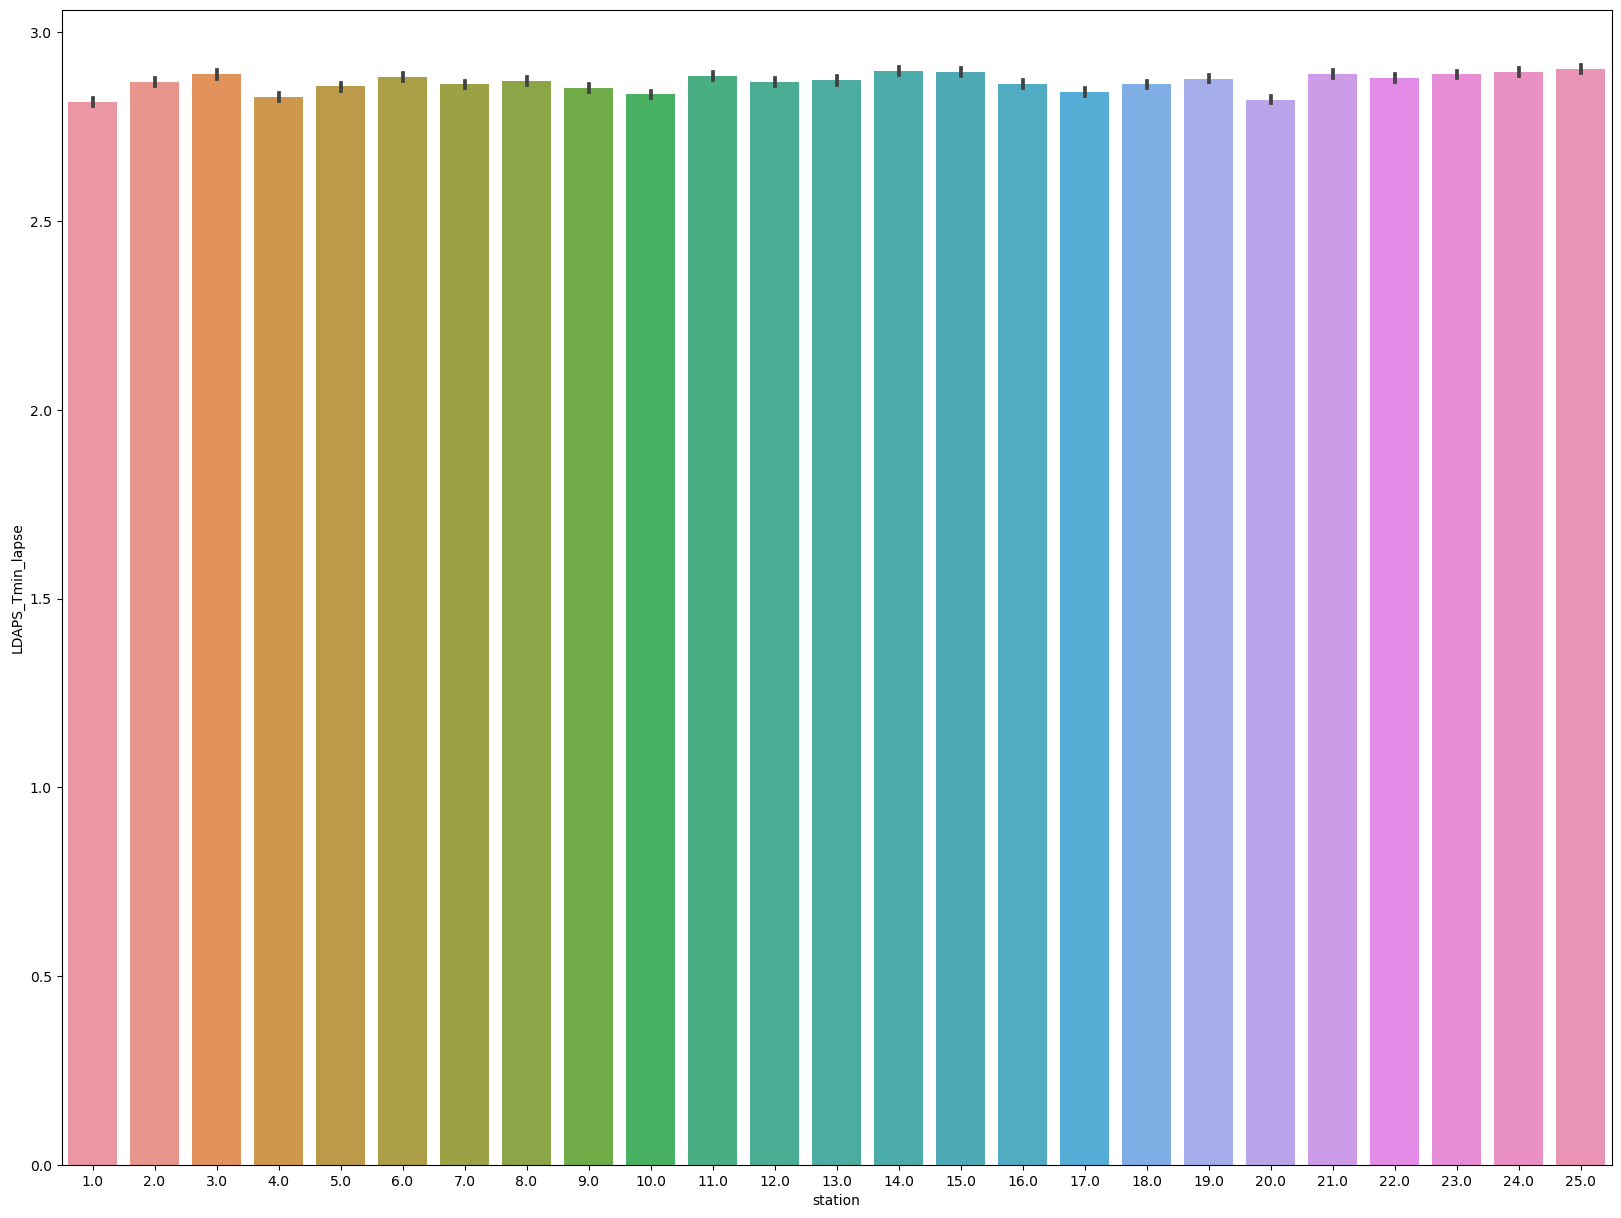

In [313]:
plt.figure(figsize=(20,15))
sns.barplot(x='station',y='LDAPS_Tmin_lapse',data=df)

Next-day minimum air temperature highest for station 25 & lowest for station 20.

<AxesSubplot:xlabel='station', ylabel='LDAPS_WS'>

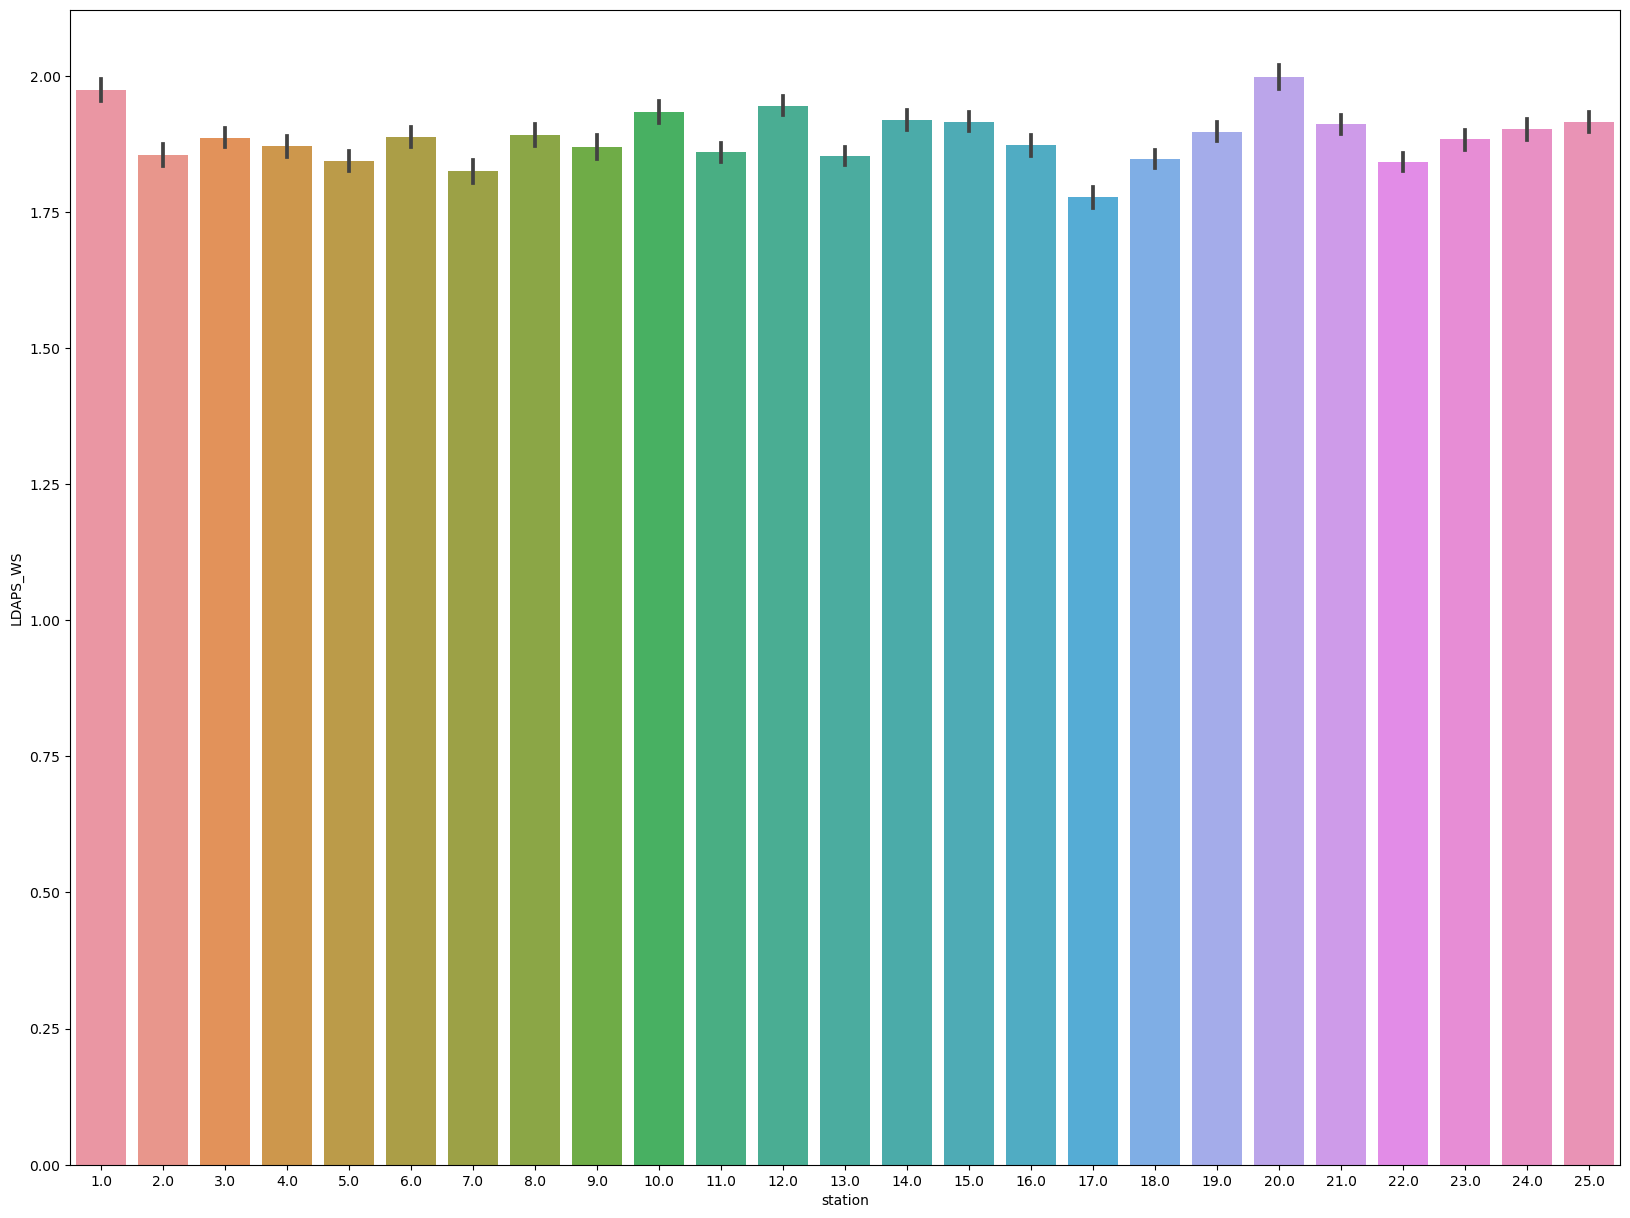

In [315]:
plt.figure(figsize=(20,15))
sns.barplot(x='station',y='LDAPS_WS',data=df)

The next-day average wind speed is highest for station 20 & lowest foe station 17.

<AxesSubplot:xlabel='station', ylabel='LDAPS_LH'>

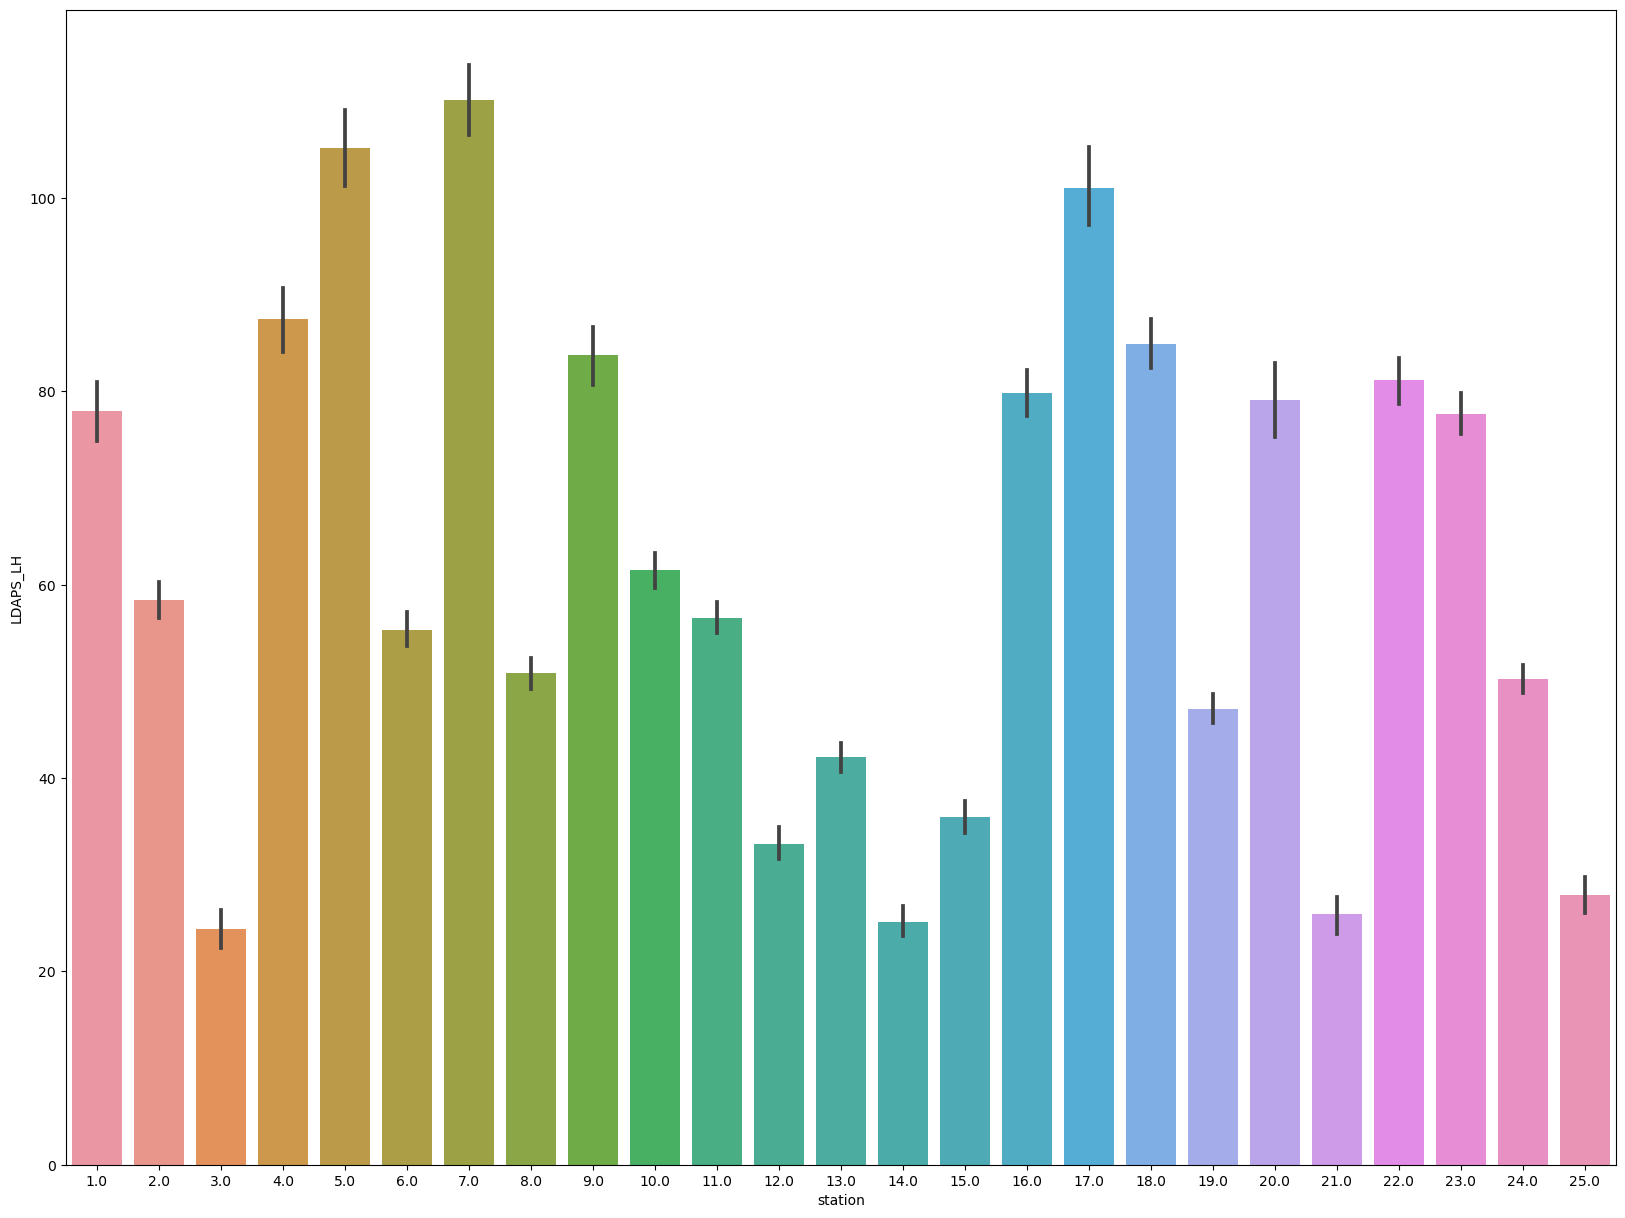

In [344]:
plt.figure(figsize=(20,15))
sns.barplot(x='station',y='LDAPS_LH',data=df)

next-day average latent heat flux is highest for station 7 & lowest for station 3.

<AxesSubplot:xlabel='station', ylabel='LDAPS_CC1'>

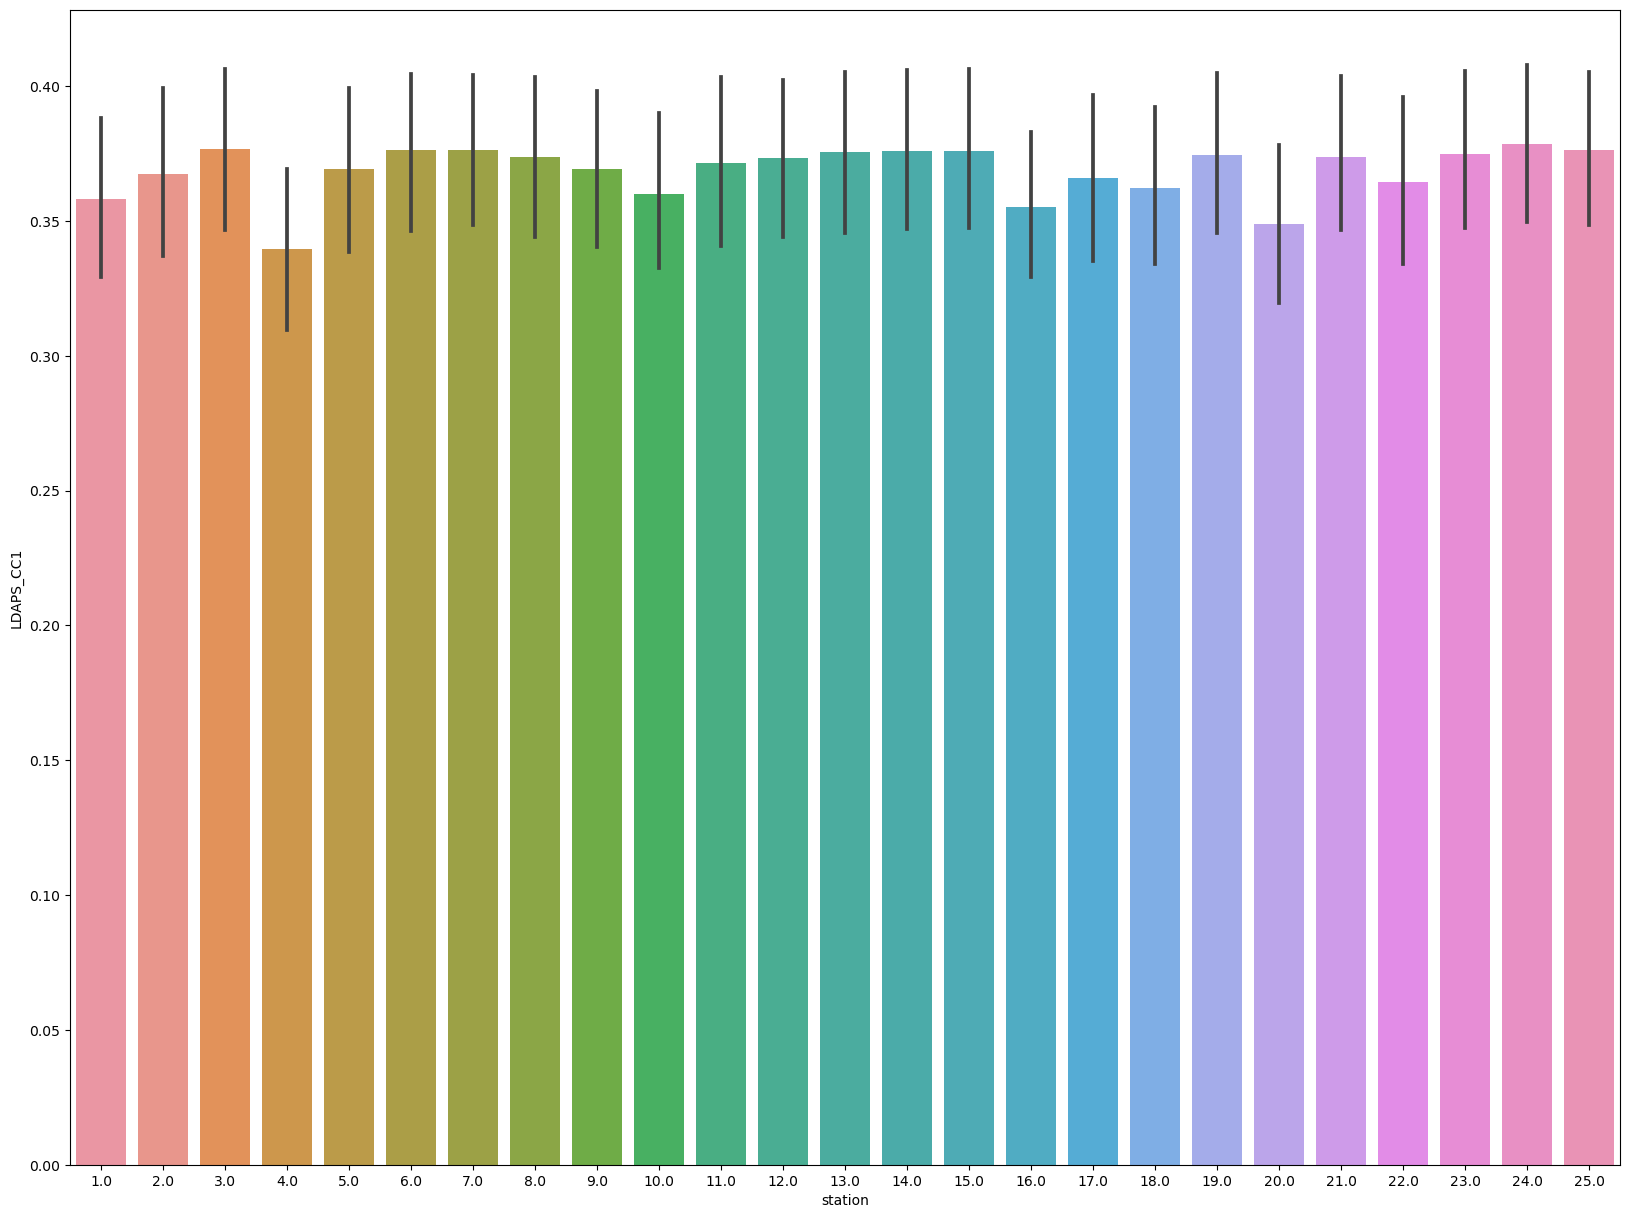

In [345]:
plt.figure(figsize=(20,15))
sns.barplot(x='station',y='LDAPS_CC1',data=df)

next-day 1st 6-hour split average cloud cover lowest for station 4.

<AxesSubplot:xlabel='station', ylabel='LDAPS_CC2'>

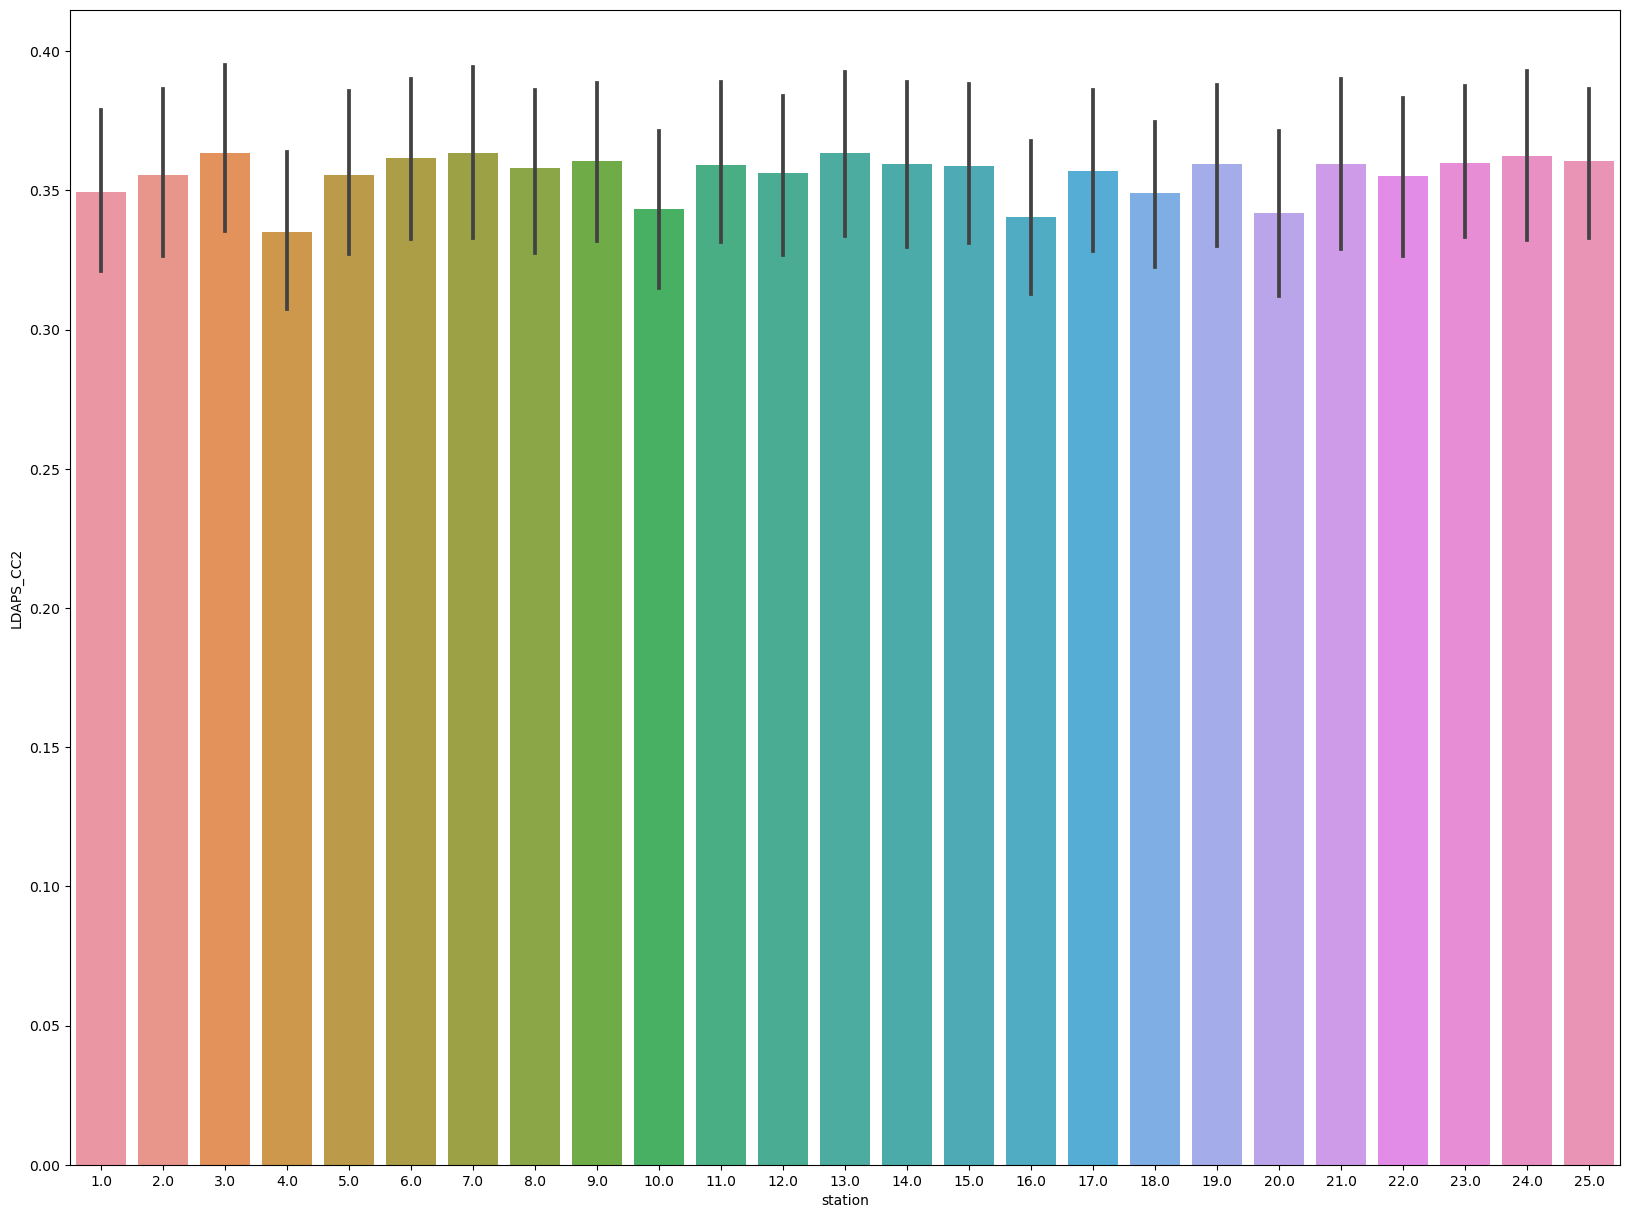

In [346]:
plt.figure(figsize=(20,15))
sns.barplot(x='station',y='LDAPS_CC2',data=df)

next-day 2nd 6-hour split average cloud cover is lowest for station 4.

<AxesSubplot:xlabel='station', ylabel='LDAPS_CC3'>

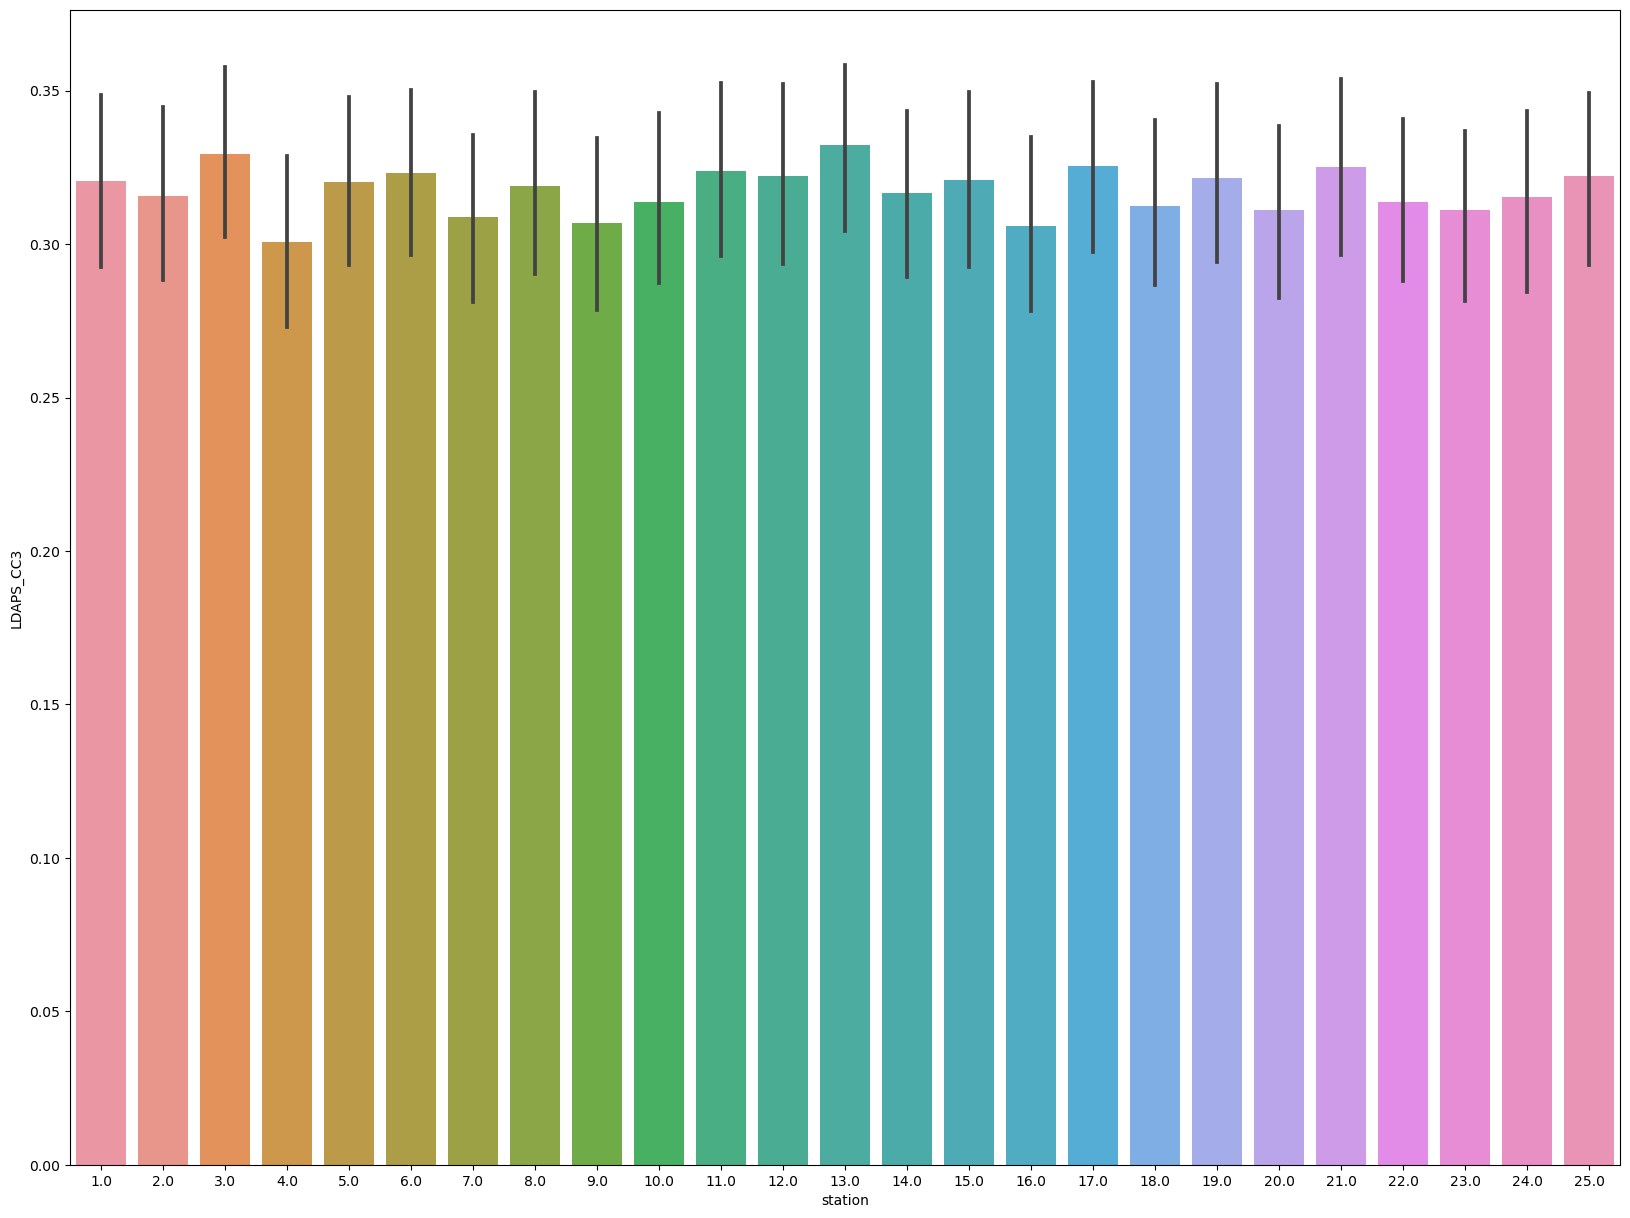

In [347]:
plt.figure(figsize=(20,15))
sns.barplot(x='station',y='LDAPS_CC3',data=df)

next-day 3rd 6-hour split average cloud cover is lowest for station 4.

<AxesSubplot:xlabel='station', ylabel='LDAPS_CC4'>

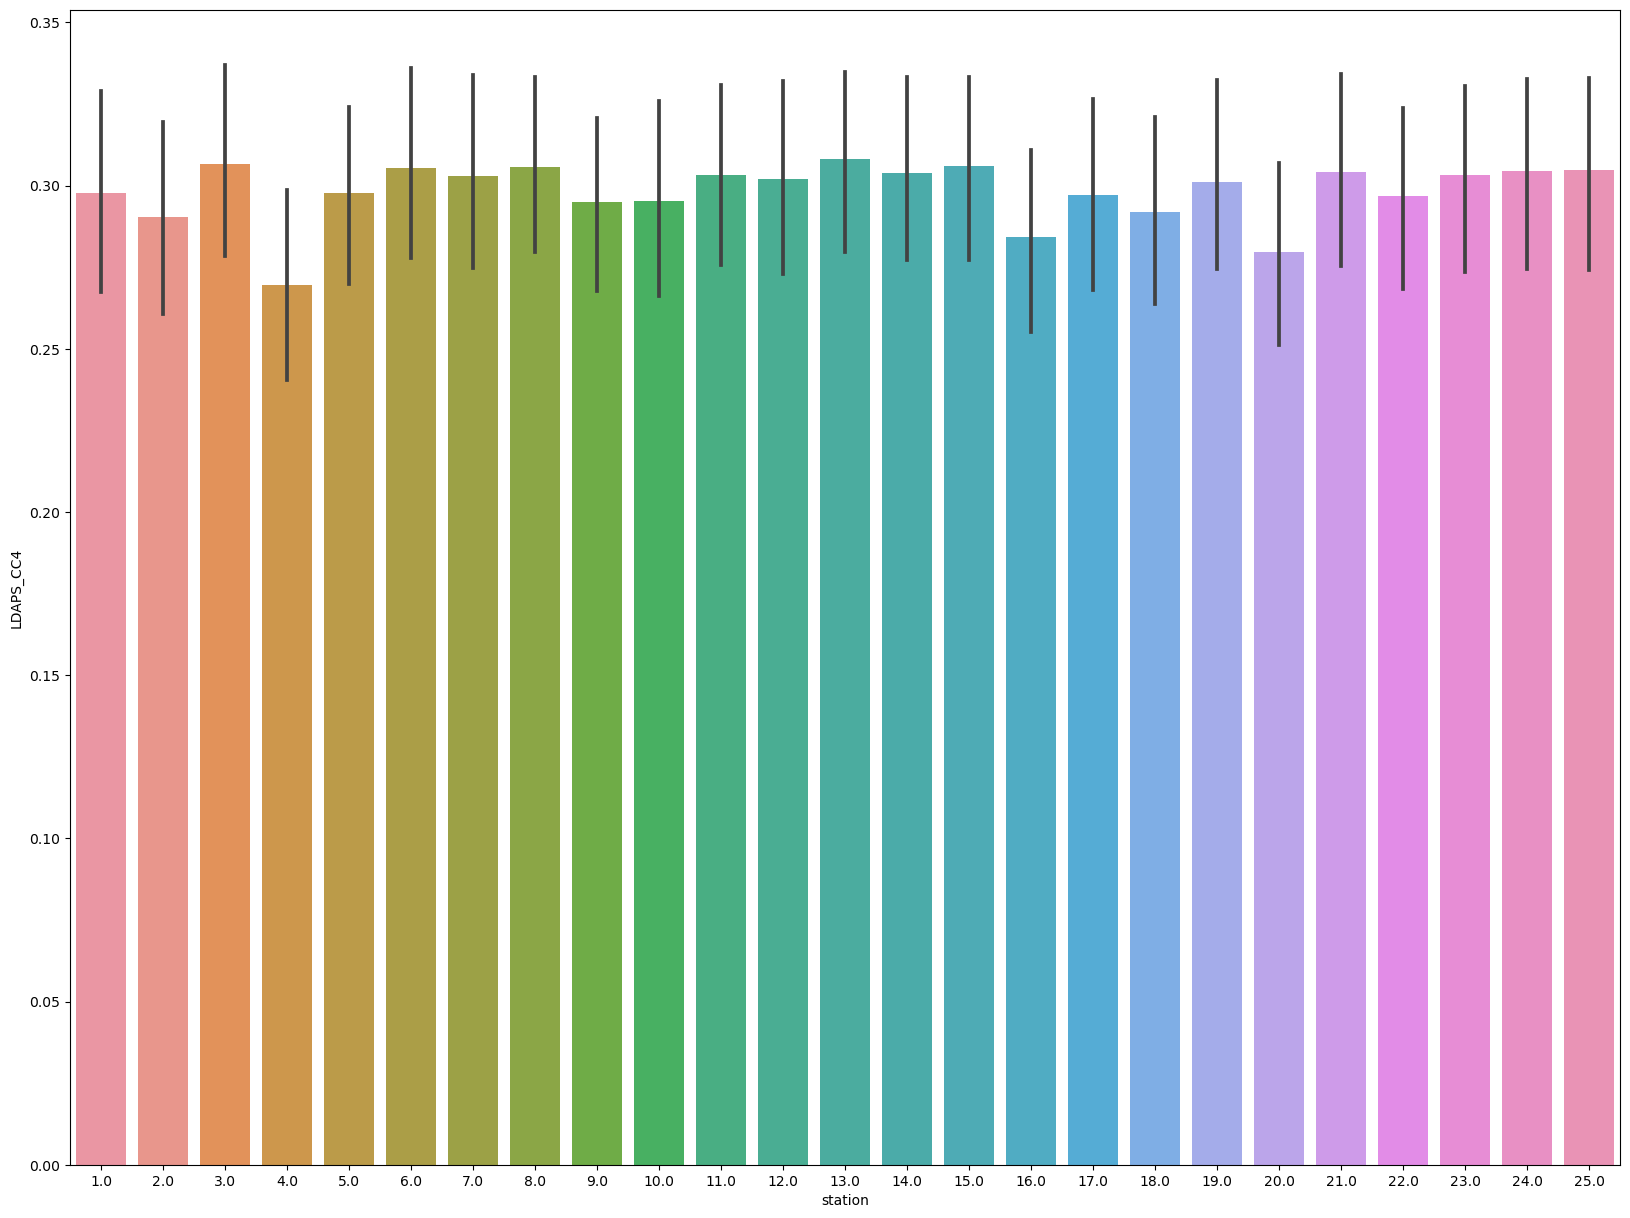

In [348]:
plt.figure(figsize=(20,15))
sns.barplot(x='station',y='LDAPS_CC4',data=df)

next-day 4th 6-hour split average cloud cover is lowest for station 4.

<AxesSubplot:xlabel='station', ylabel='LDAPS_PPT1'>

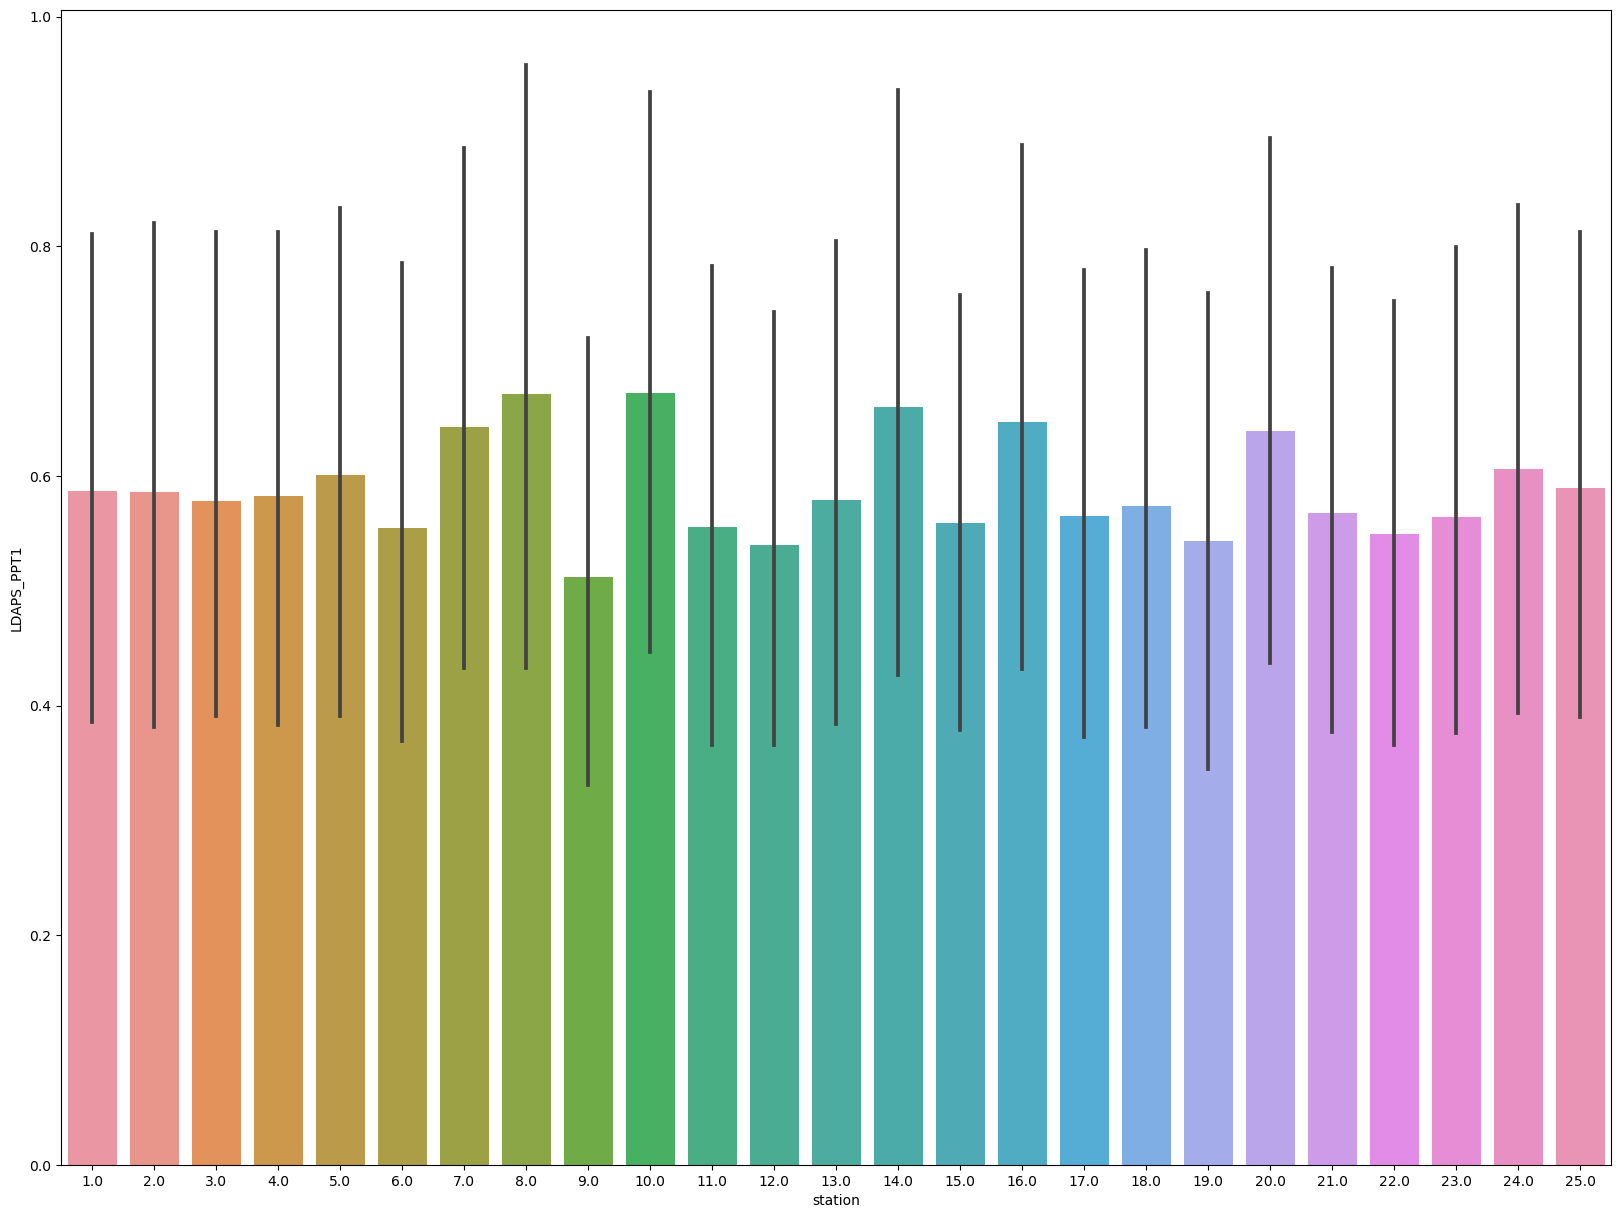

In [349]:
plt.figure(figsize=(20,15))
sns.barplot(x='station',y='LDAPS_PPT1',data=df)

next-day 1st 6-hour split average precipitation is highest for station 8 & 10 and lowest for station 9.

<AxesSubplot:xlabel='station', ylabel='LDAPS_PPT2'>

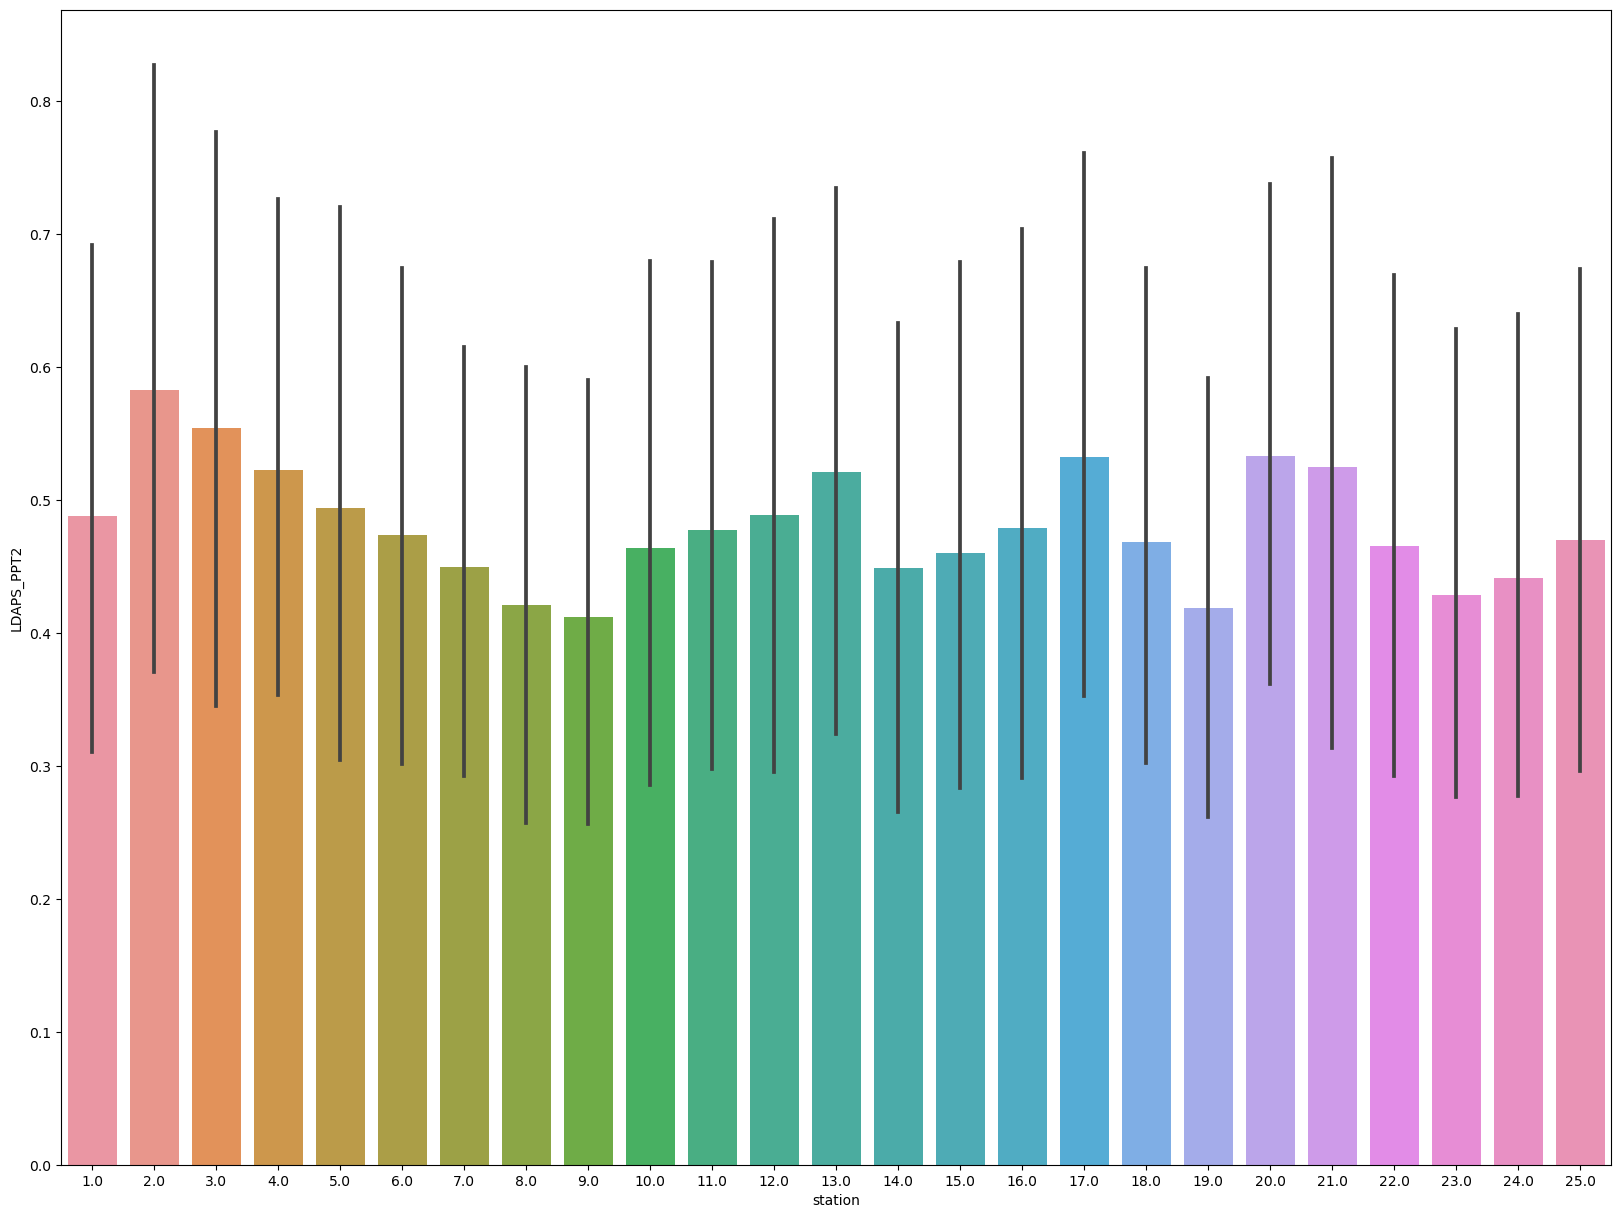

In [350]:
plt.figure(figsize=(20,15))
sns.barplot(x='station',y='LDAPS_PPT2',data=df)

next-day 2nd 6-hour split average precipitation highest for station 2 & lowest for station 9.

<AxesSubplot:xlabel='station', ylabel='LDAPS_PPT3'>

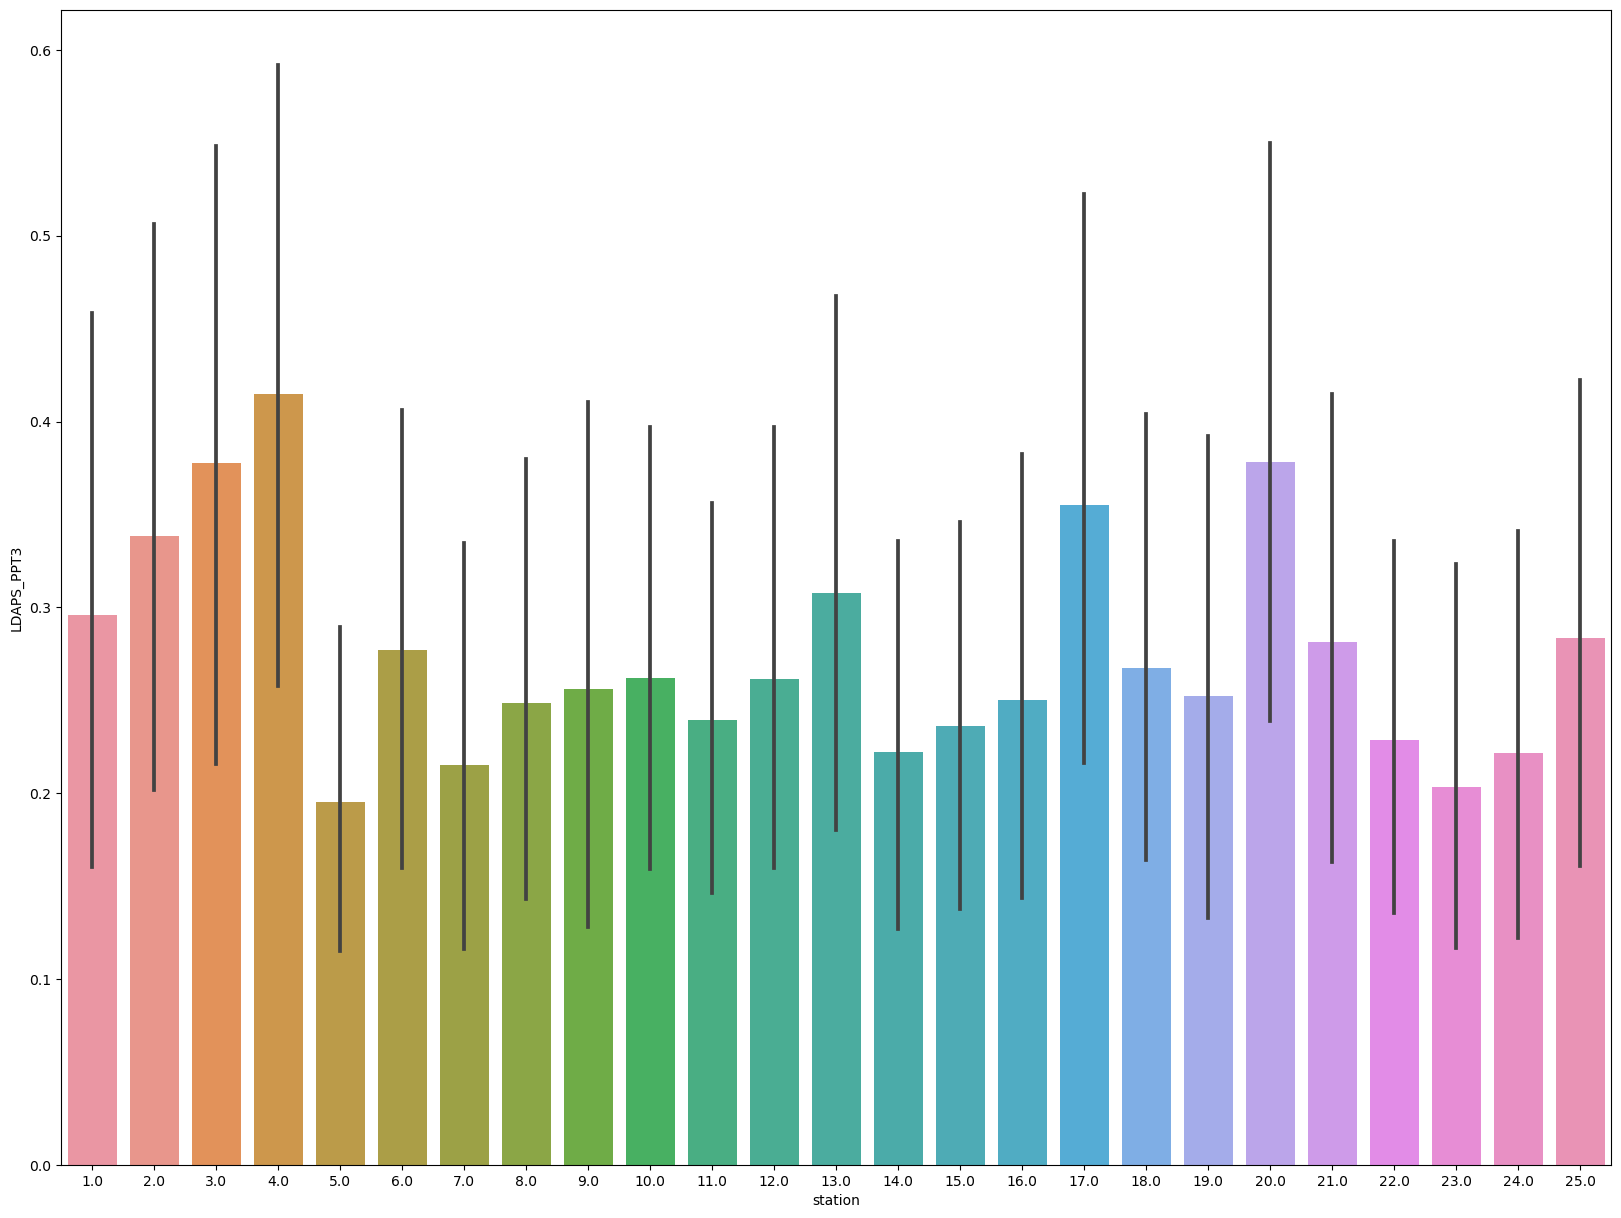

In [351]:
plt.figure(figsize=(20,15))
sns.barplot(x='station',y='LDAPS_PPT3',data=df)

next-day 3rd 6-hour split average precipitation is lowest for station 5 & highest for station 4.

<AxesSubplot:xlabel='station', ylabel='LDAPS_PPT4'>

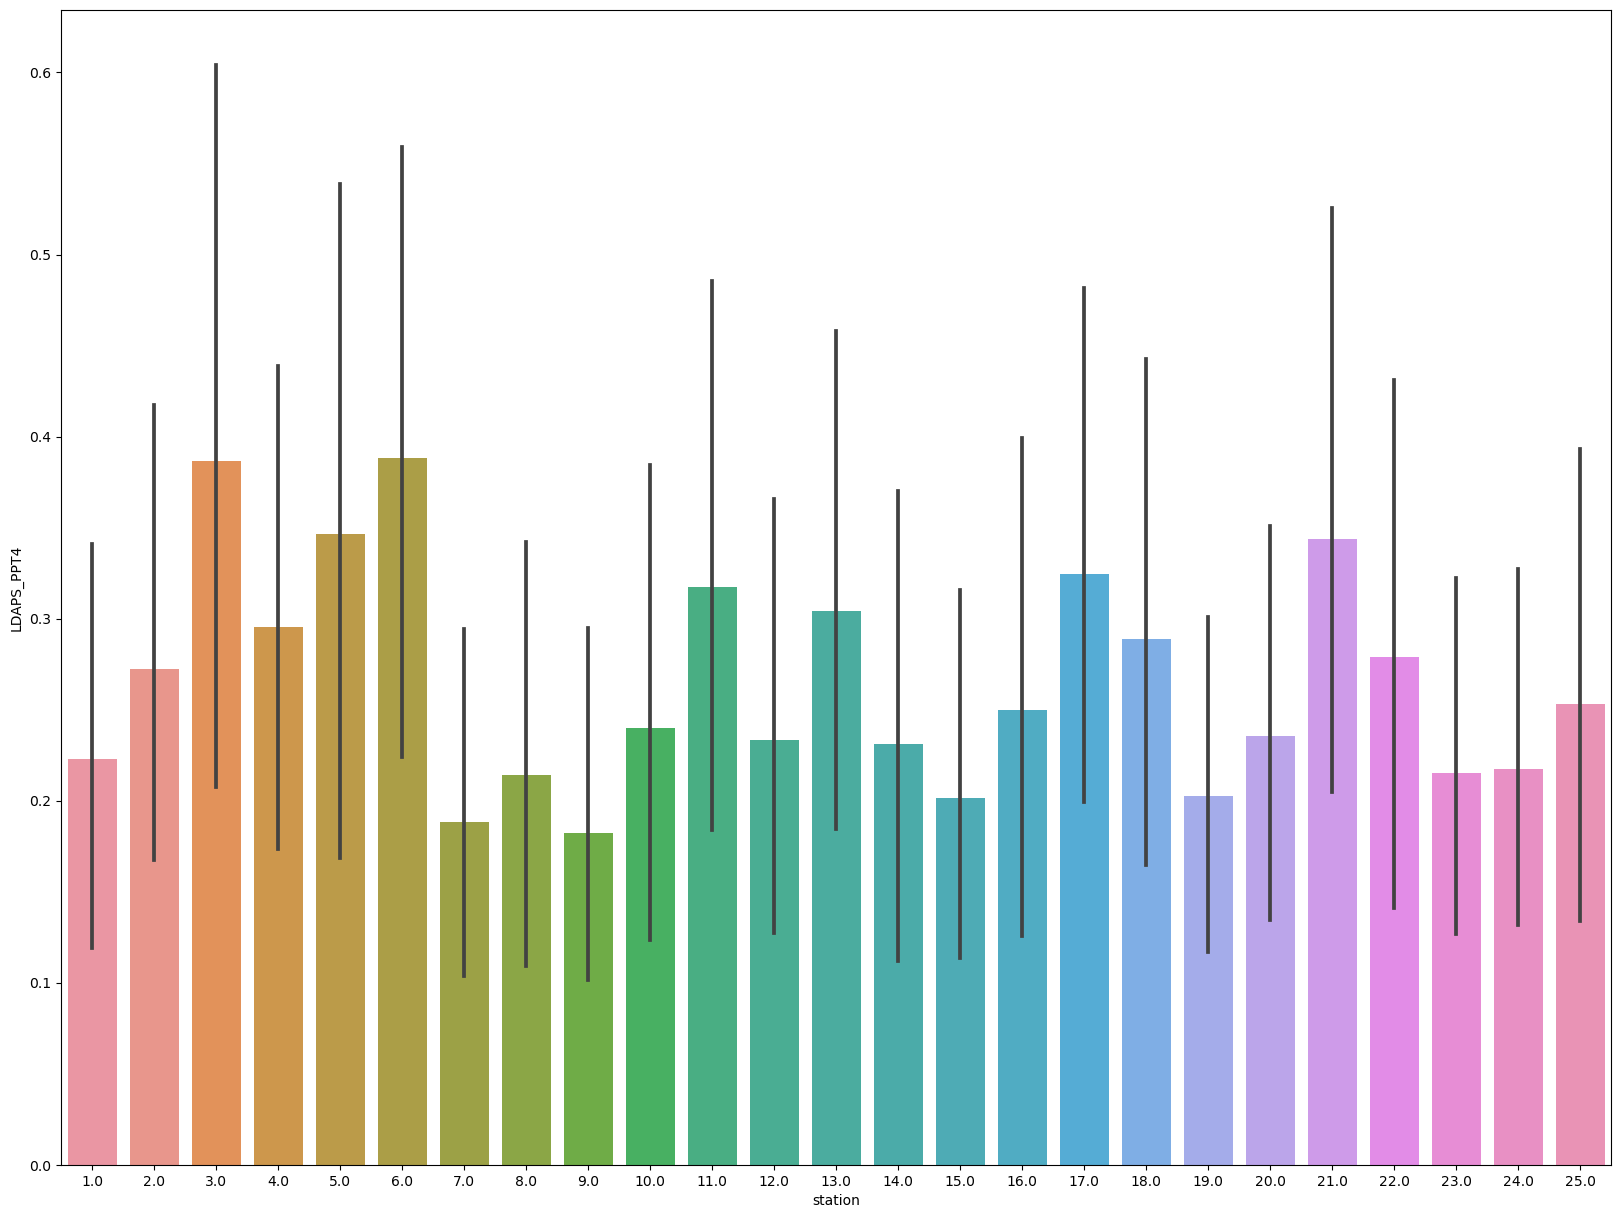

In [352]:
plt.figure(figsize=(20,15))
sns.barplot(x='station',y='LDAPS_PPT4',data=df)

next-day 4th 6-hour split average precipitation is highest for station 3 & 6 & lowest for station 9.

<AxesSubplot:xlabel='station', ylabel='lat'>

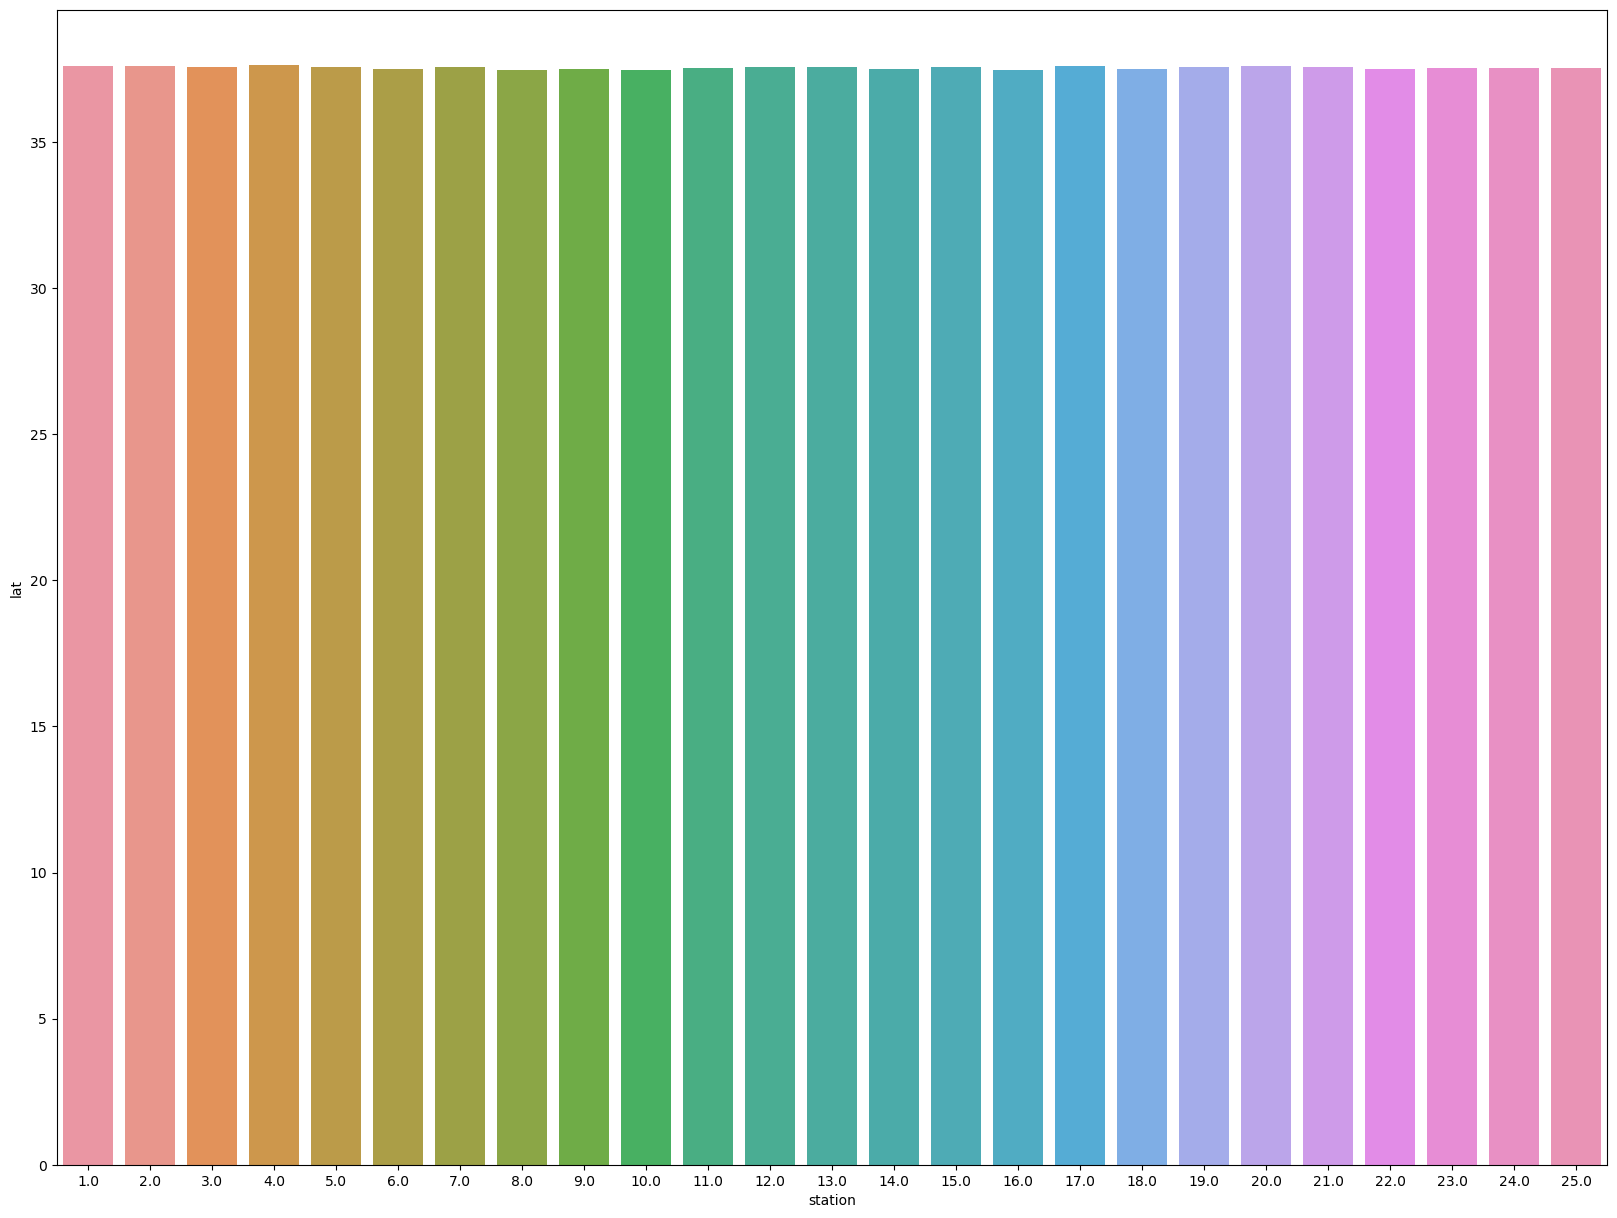

In [353]:
plt.figure(figsize=(20,15))
sns.barplot(x='station',y='lat',data=df)

latitude is almost similar for all 25 stations.

<AxesSubplot:xlabel='station', ylabel='lon'>

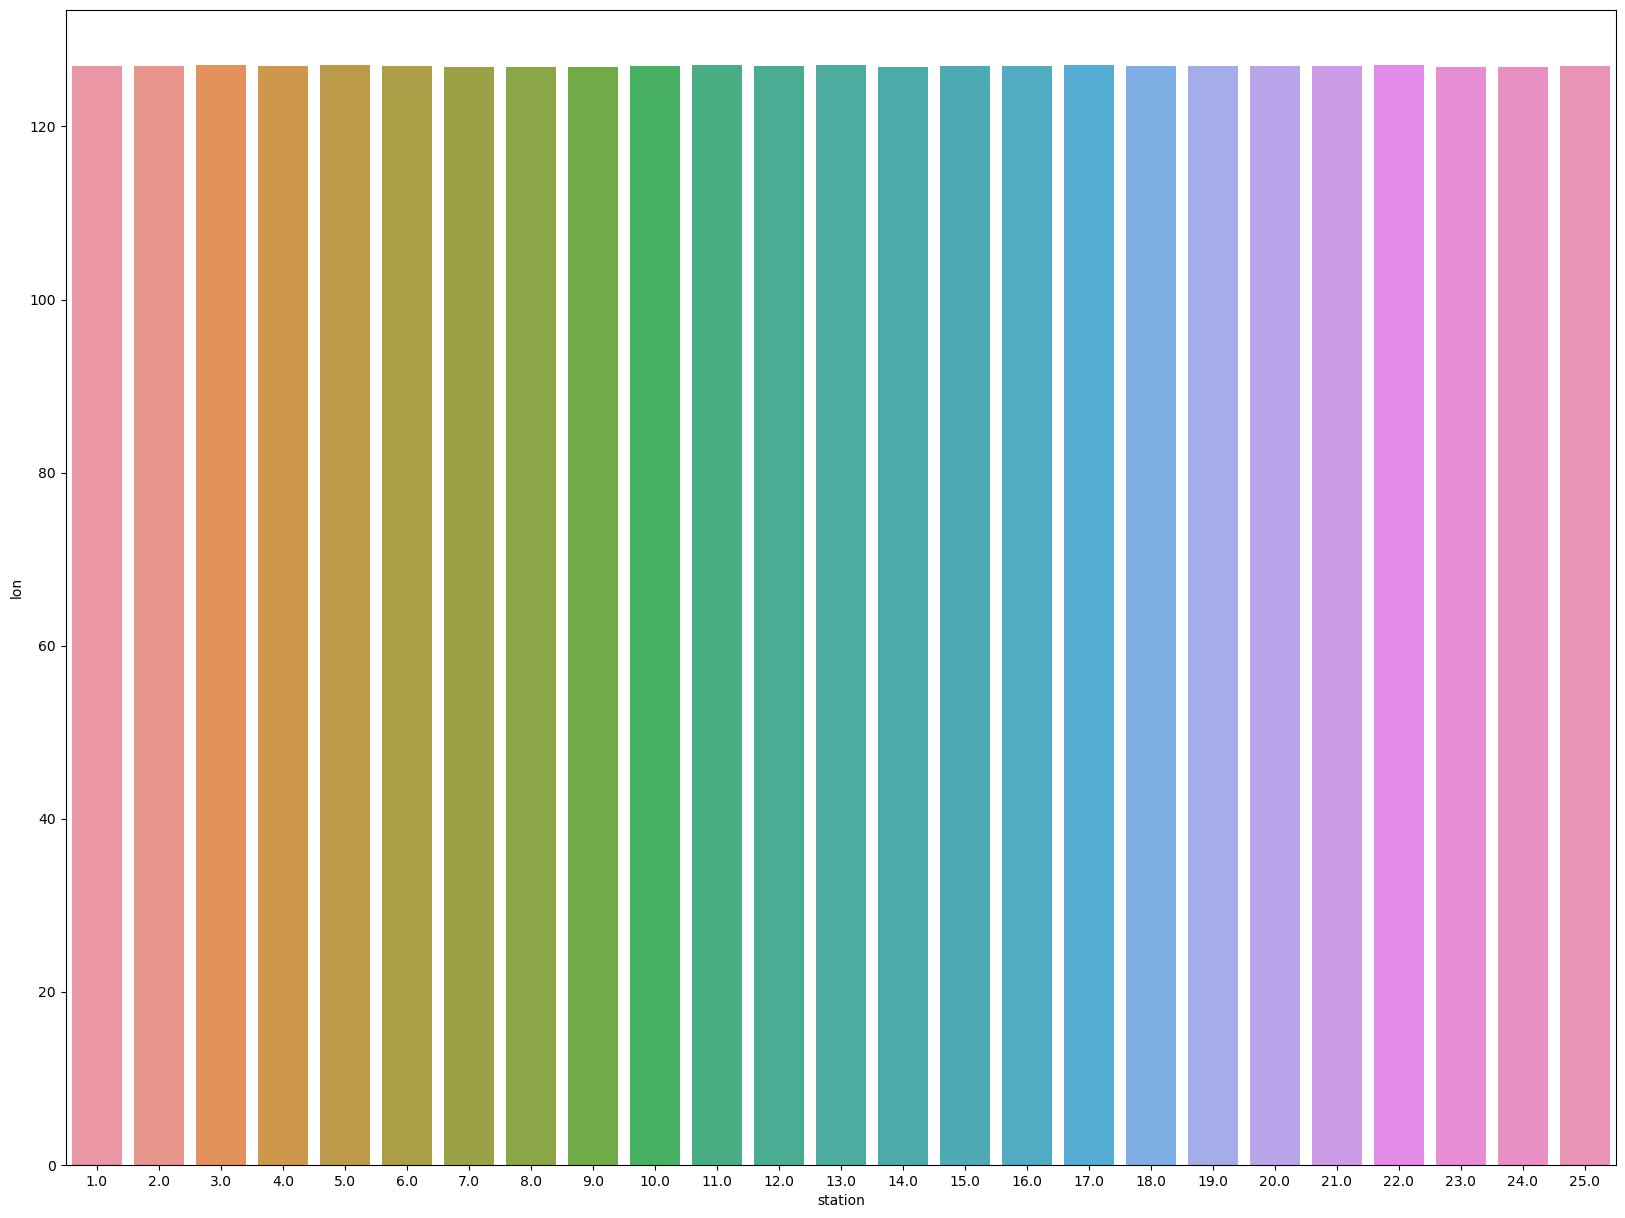

In [354]:
plt.figure(figsize=(20,15))
sns.barplot(x='station',y='lon',data=df)

longitude is almost similar for all 25 stations.

<AxesSubplot:xlabel='station', ylabel='DEM'>

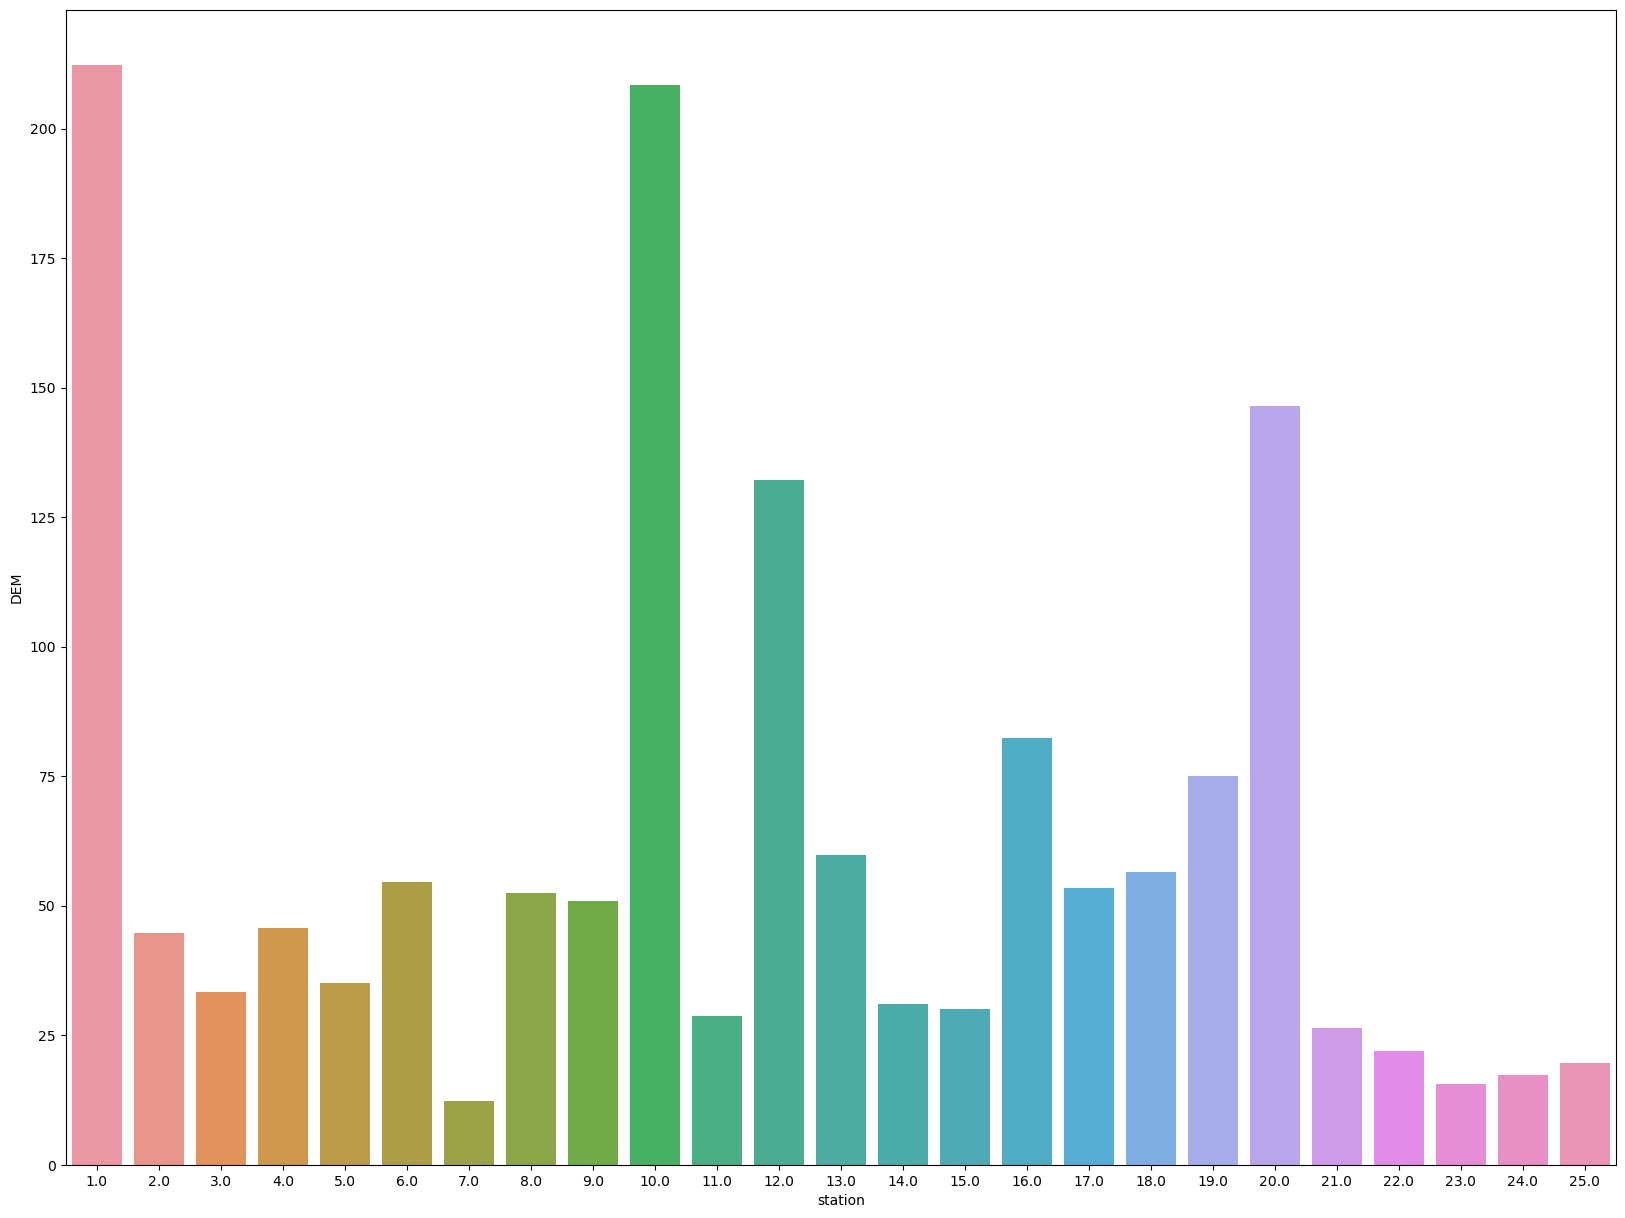

In [355]:
plt.figure(figsize=(20,15))
sns.barplot(x='station',y='DEM',data=df)

Elevation is highest for station 1 & lowest for station 7.

<AxesSubplot:xlabel='station', ylabel='Slope'>

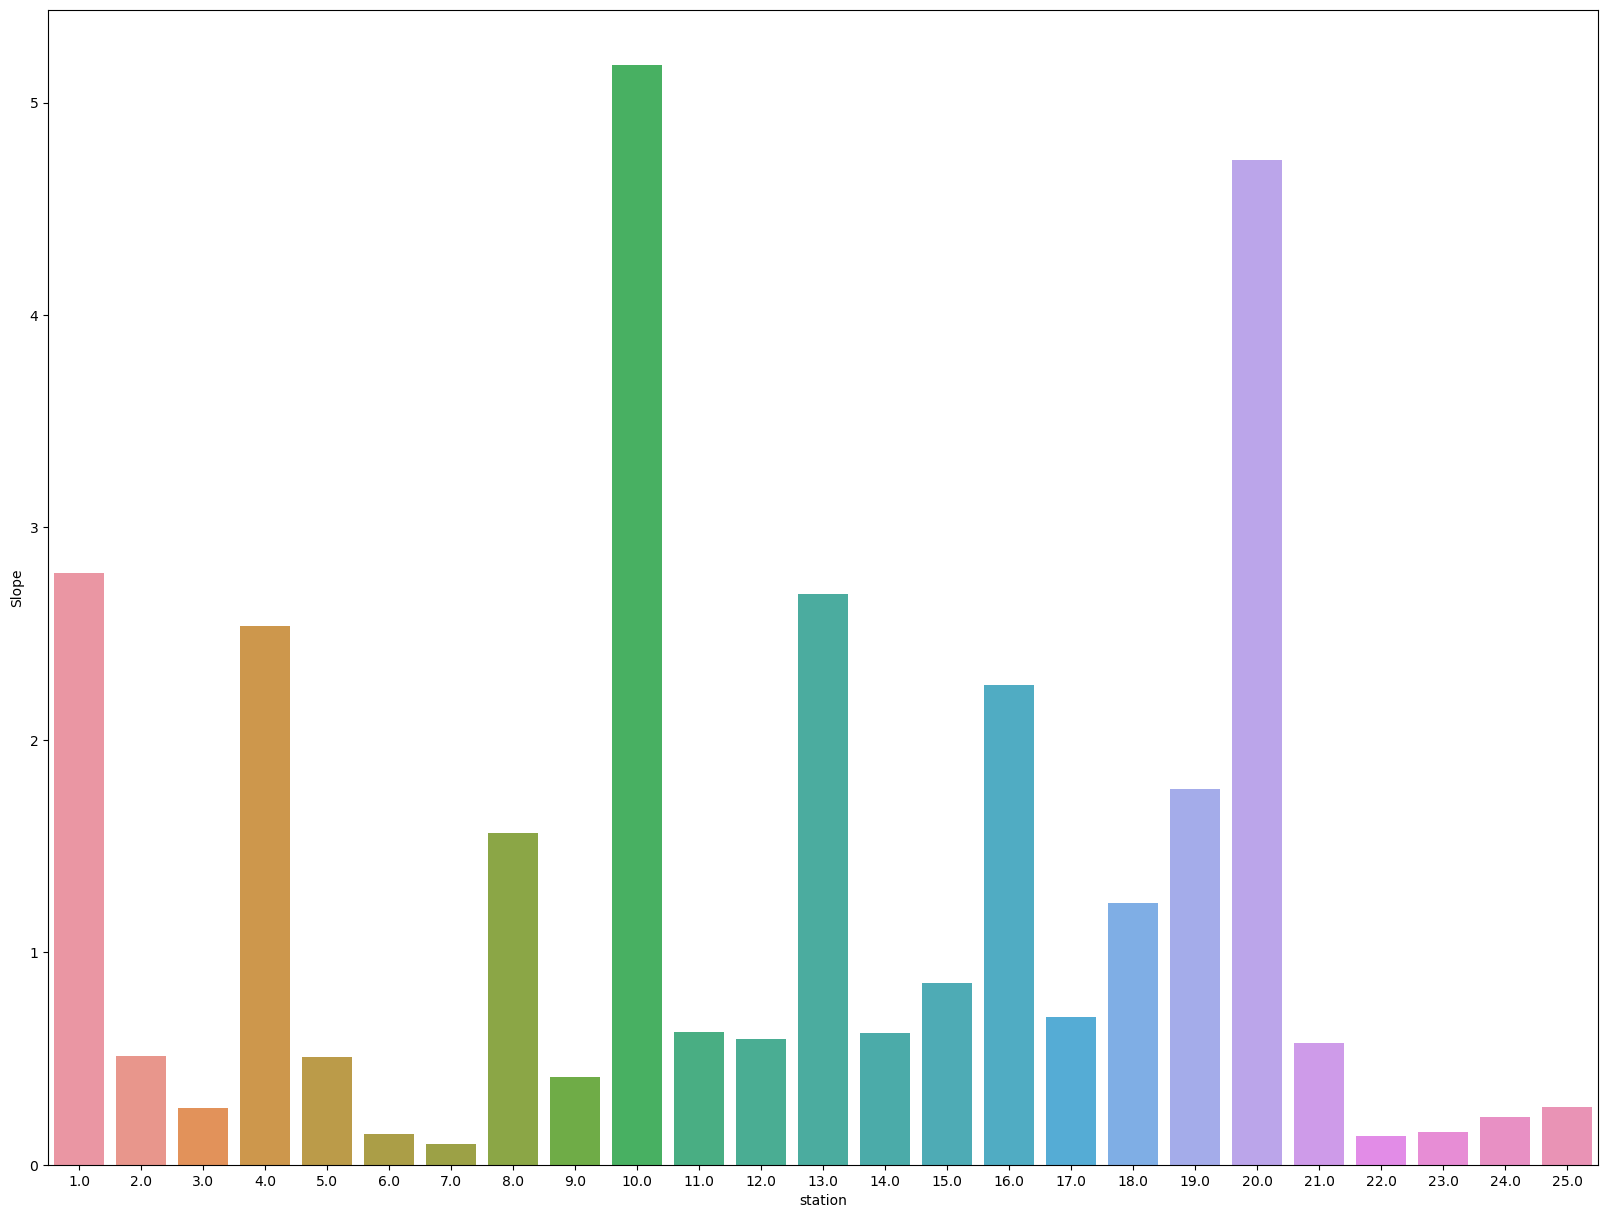

In [356]:
plt.figure(figsize=(20,15))
sns.barplot(x='station',y='Slope',data=df)

Slope is highest for station 10 & lowest for station 7.

<AxesSubplot:xlabel='station', ylabel='Solar radiation'>

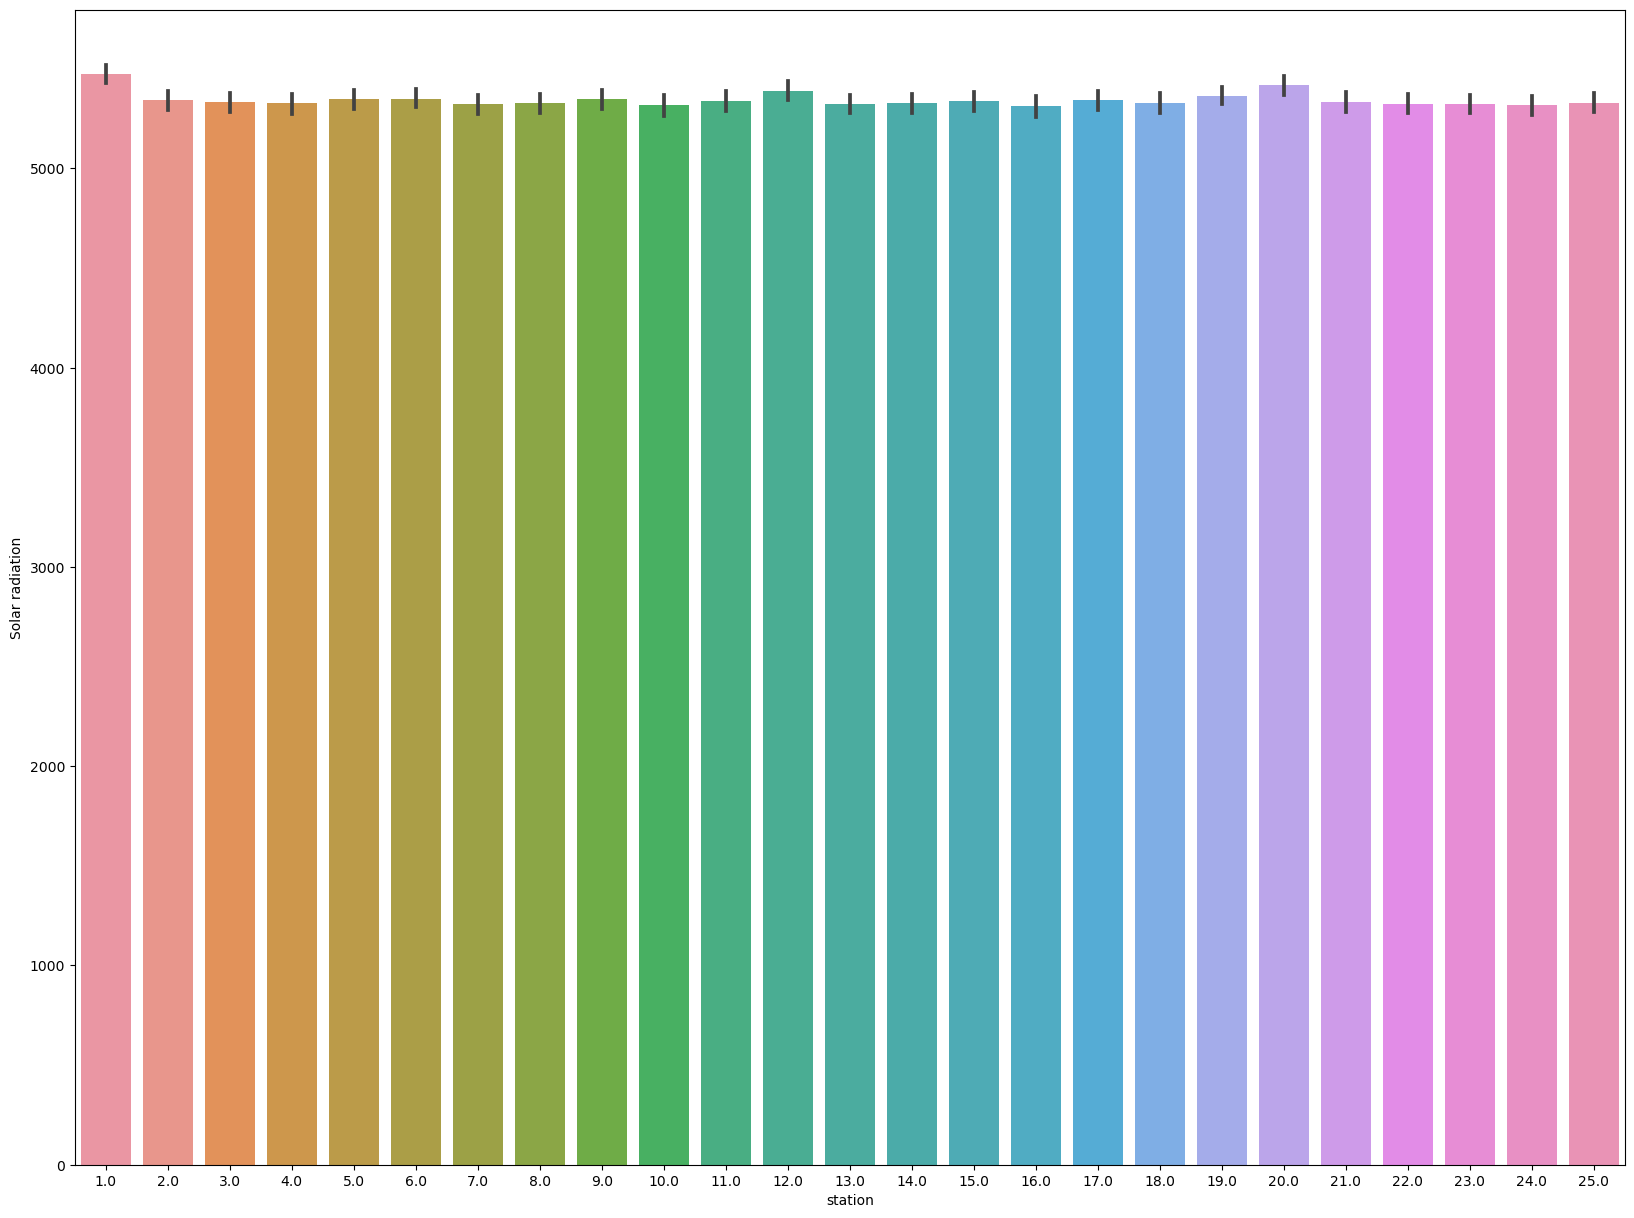

In [357]:
plt.figure(figsize=(20,15))
sns.barplot(x='station',y='Solar radiation',data=df)

Solar radiation is almost similar for all stations.

<AxesSubplot:xlabel='station', ylabel='Next_Tmax'>

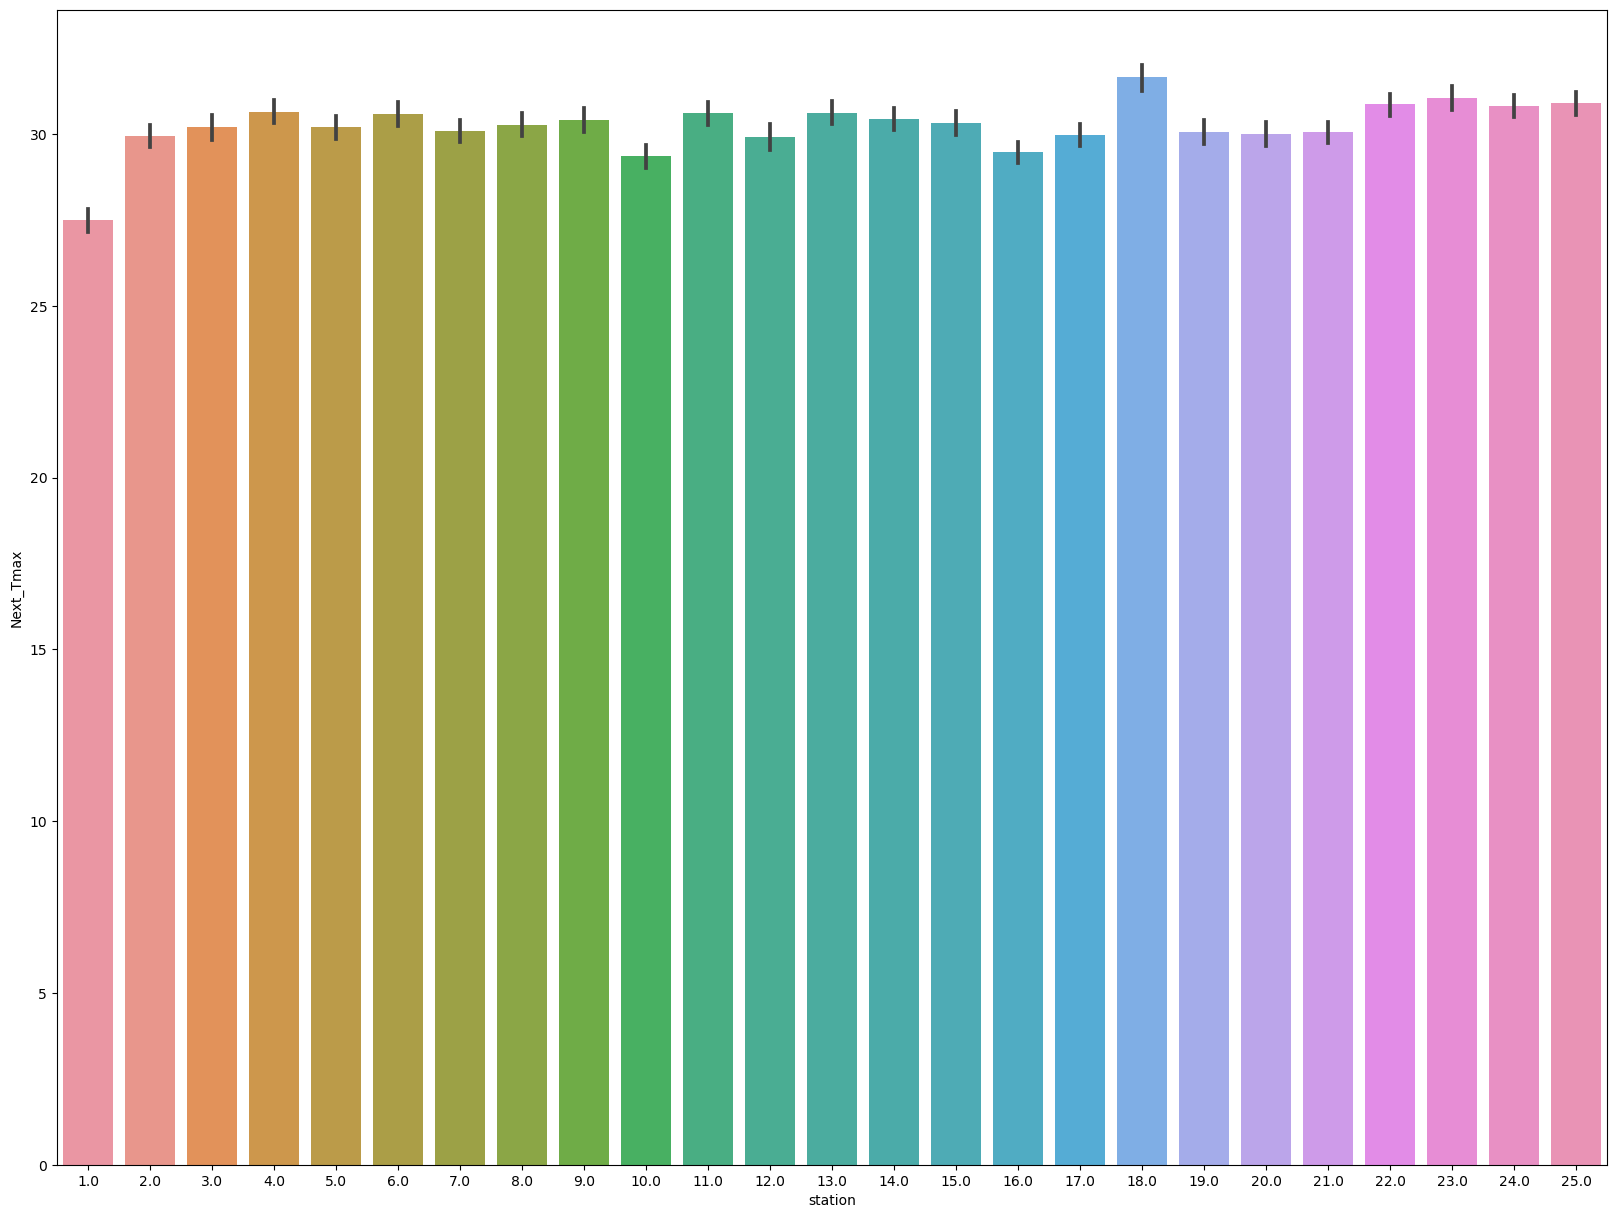

In [358]:
plt.figure(figsize=(20,15))
sns.barplot(x='station',y='Next_Tmax',data=df)

next day maximum air tempreture is highest for station 18 & lowest for station 1.

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

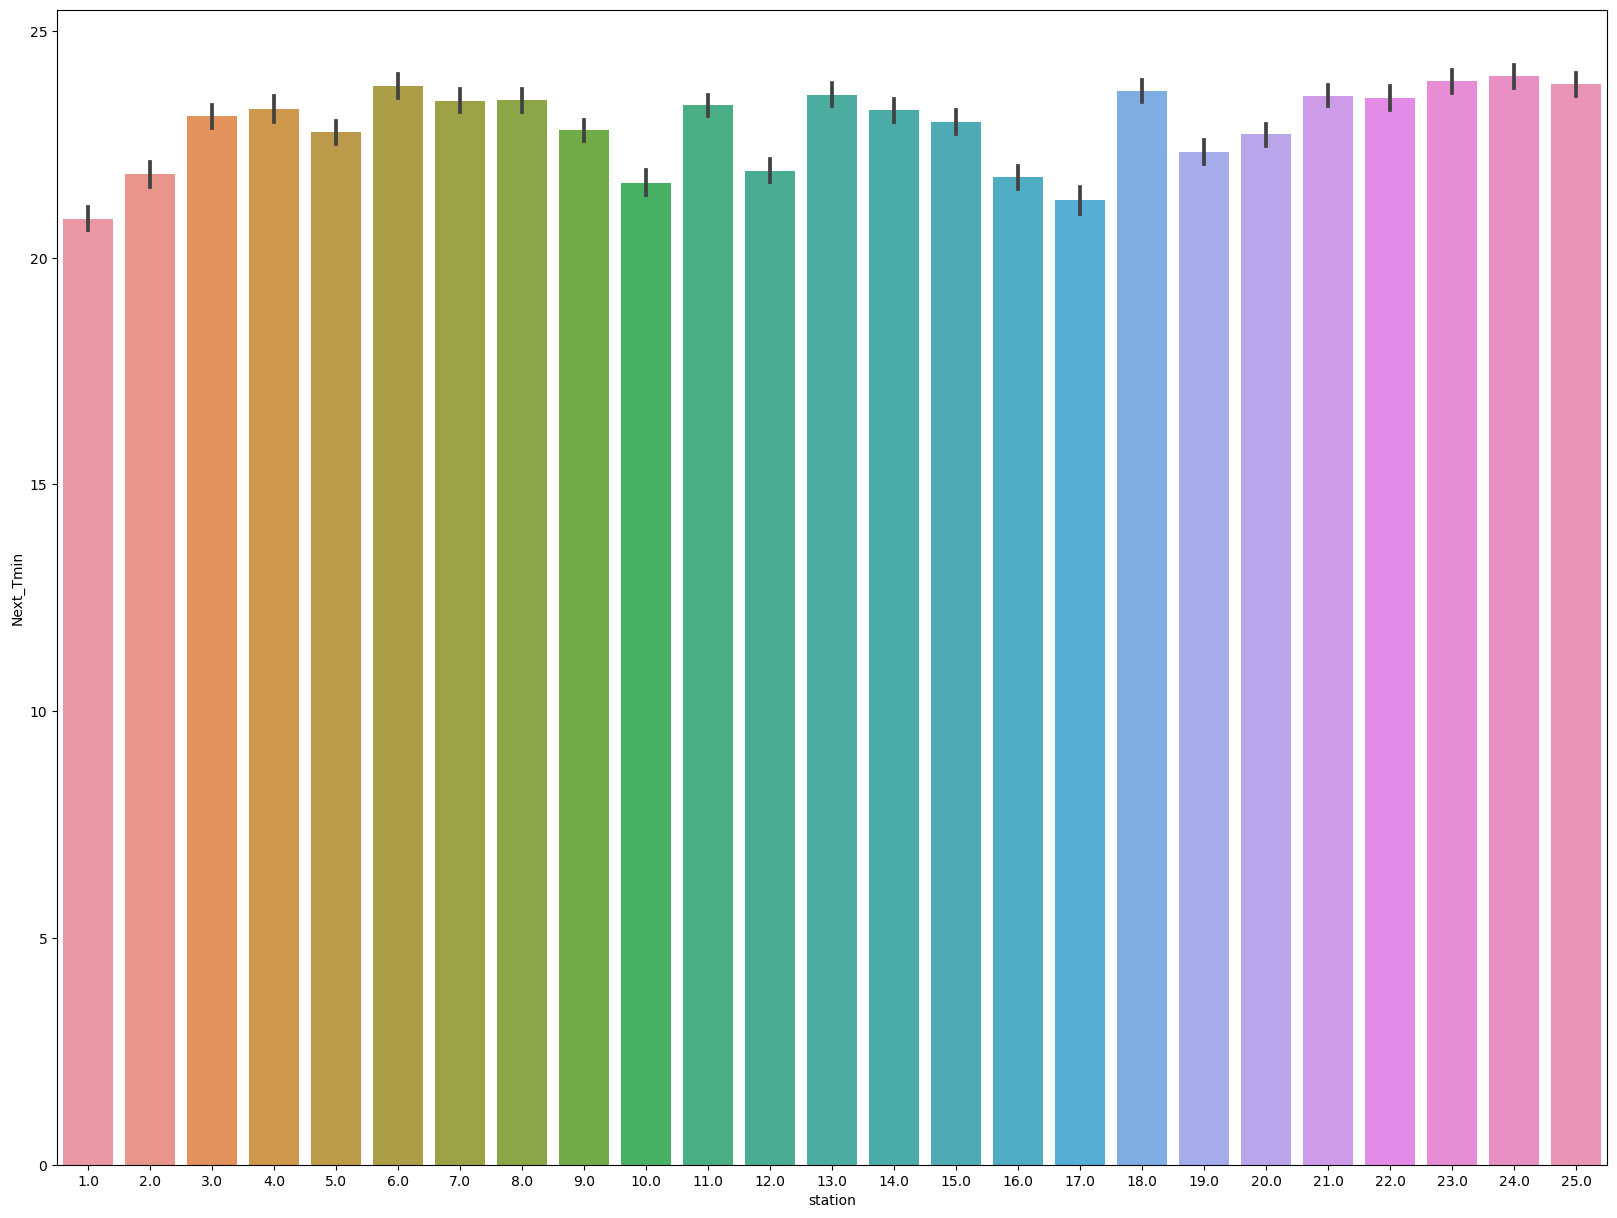

In [359]:
plt.figure(figsize=(20,15))
sns.barplot(x='station',y='Next_Tmin',data=df)

next day minimum air tempreture is lowest for station 1 & highest for station 24.

# Heat map(Correlation matrix)

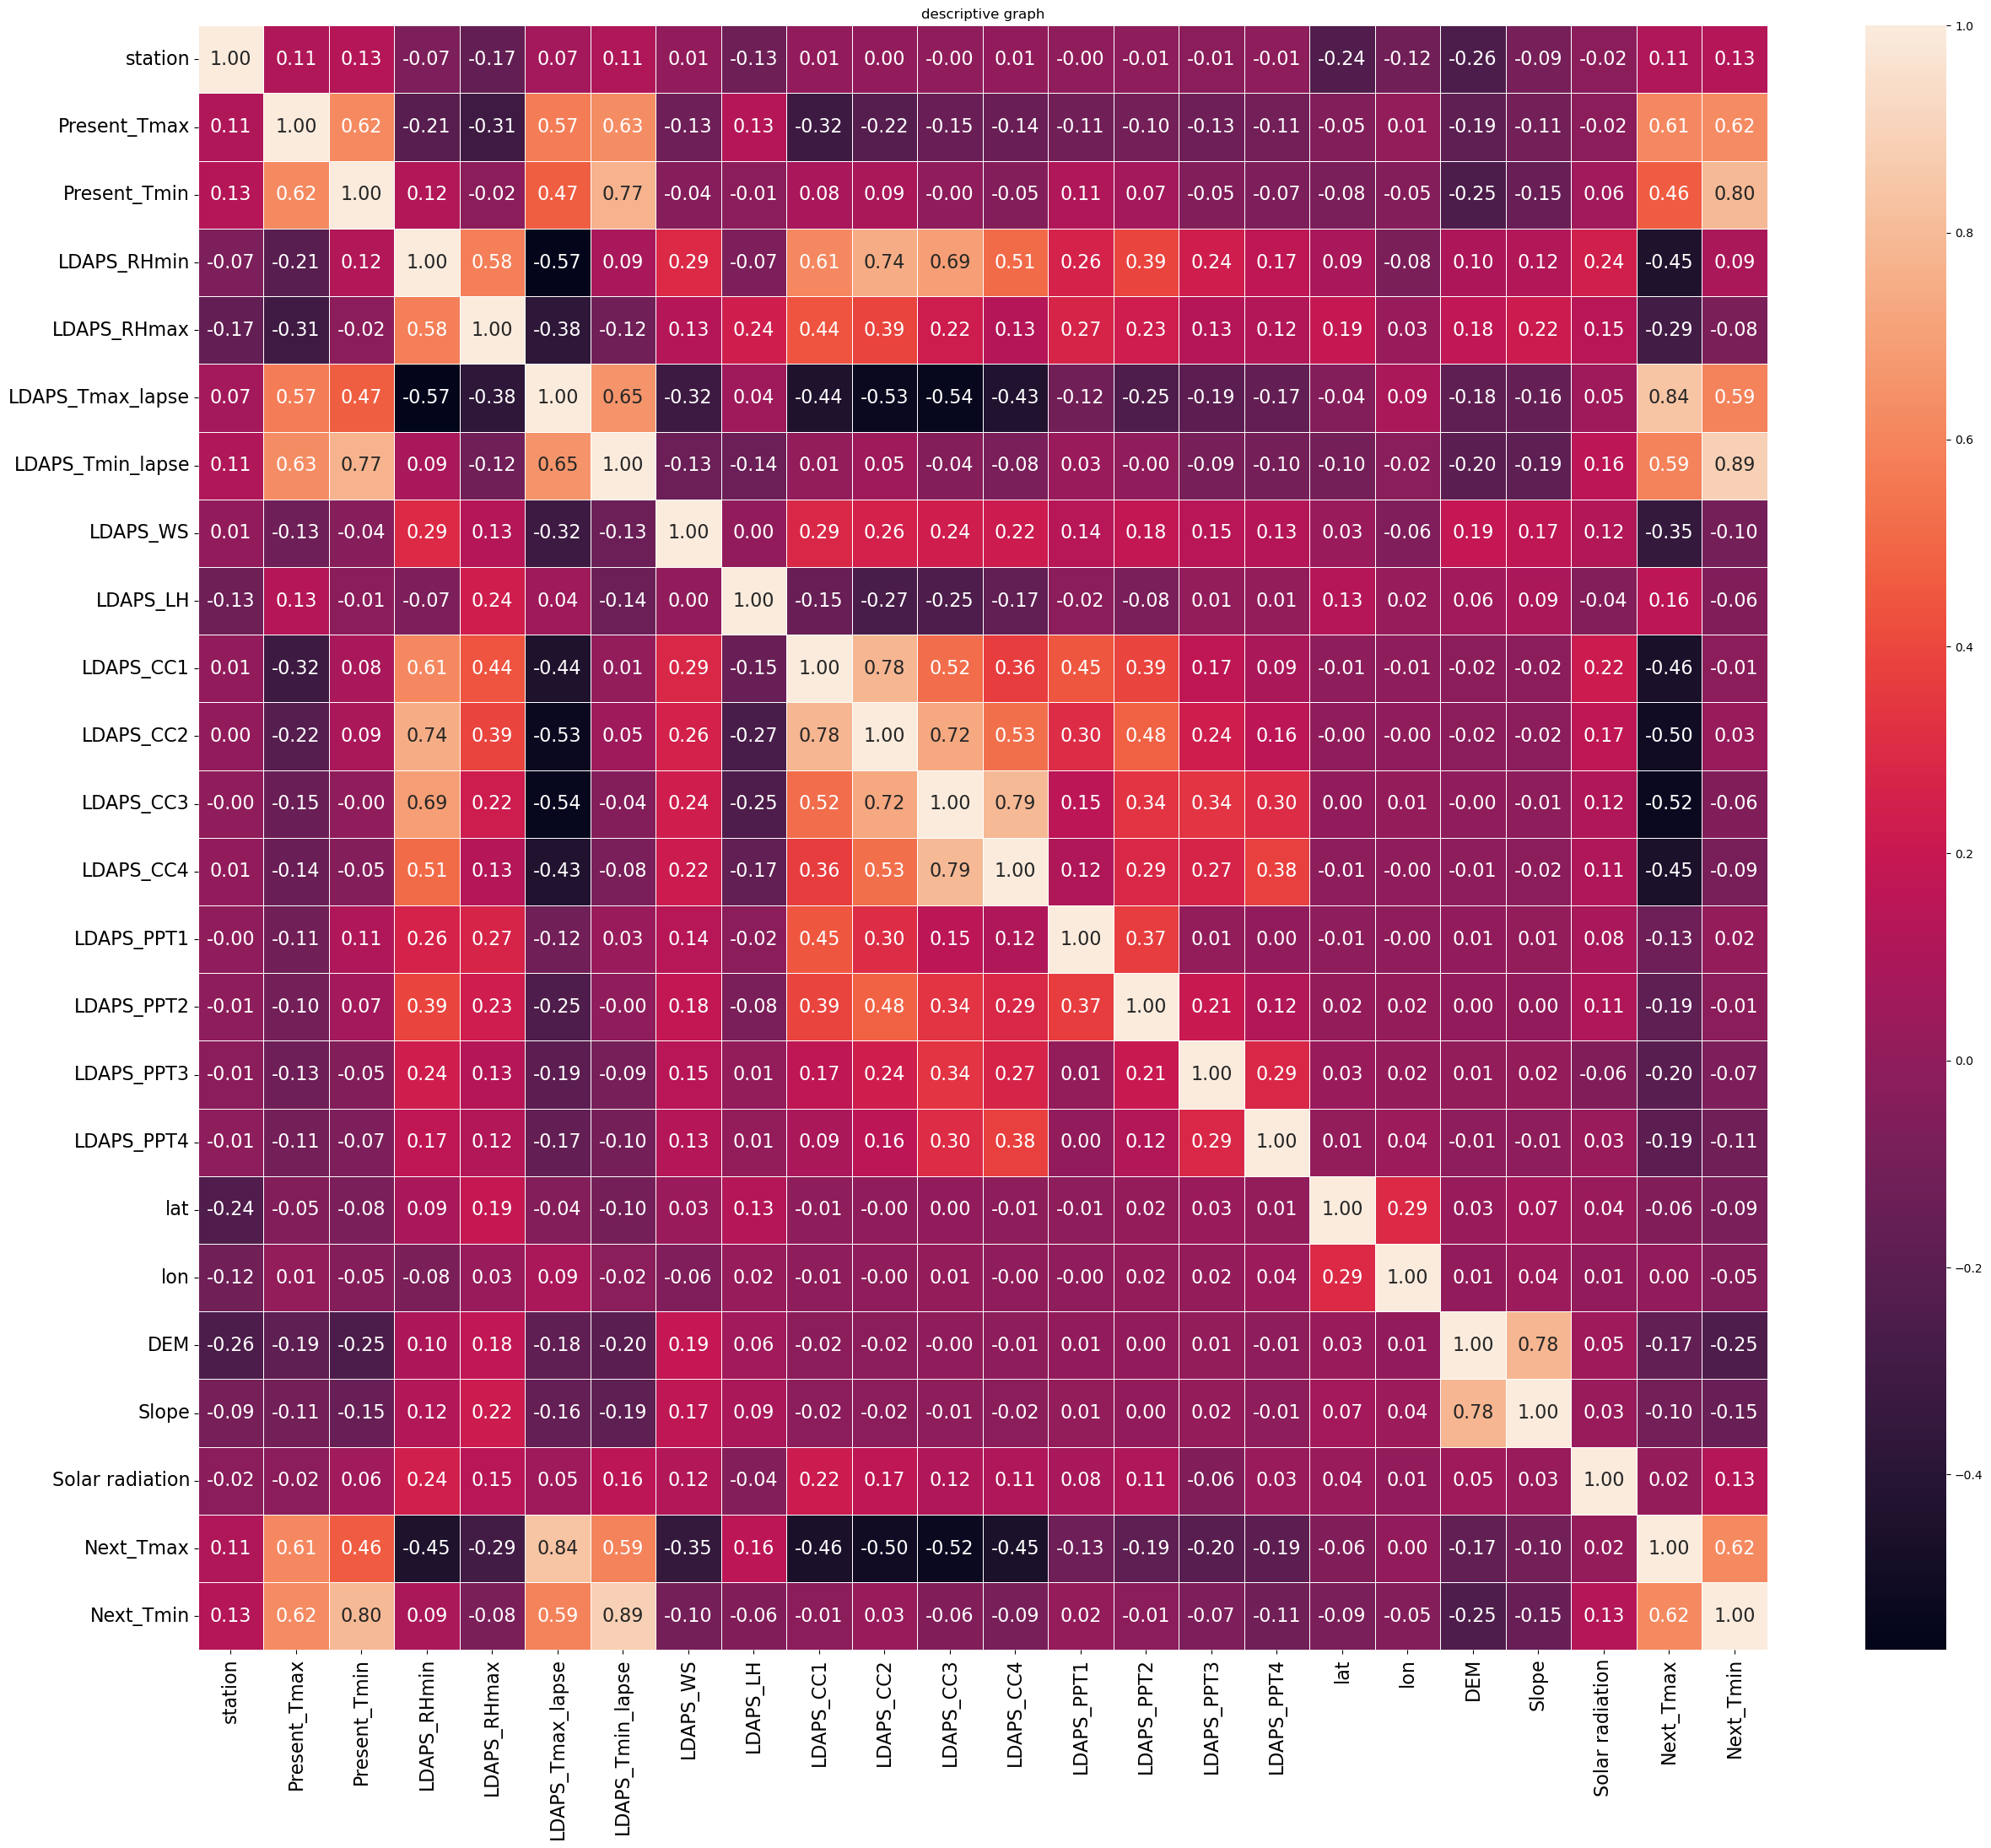

In [360]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,annot_kws={'size':16},fmt='.2f')
plt.title('descriptive graph')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# Observations-

1. Present_Tmin & Next_Tmin has 80% correlationship with each other which looks these features are having multicollinearity.
2. LDAPS_RHmin & LDAPS_CC2 has 74% correlationship with each other which looks these features are having multicollinearity.
3. Present_Tmin & LDAPS_Tmin_lapse has 77% correlationship with each other which looks these features are having multicollinearity.
4. LDAPS_Tmax_lapse & Next_Tmax has 84% correlationship with each other which is very good correlationship of a feature with the target variable.
5. LDAPS_CC1 & LDAPS_CC2 has 78% correlationship with each other which looks these features are having multicollinearity.
6. LDAPS_CC4 & LDAPS_CC3 has 79% correlationship with each other which looks these features are having multicollinearity.
7. LDAPS_Tmin_lapse & Next_Tmin has 89% correlationship with each other which looks these features are having multicollinearity.
8. DEM & Slope has 78% correlationship with each other which looks these features are having multicollinearity.

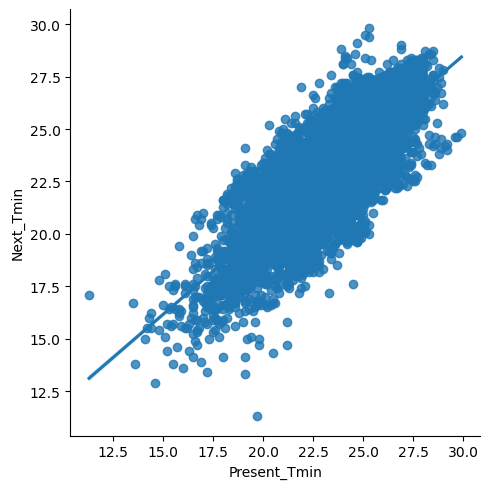

In [361]:
sns.lmplot(x='Present_Tmin',y='Next_Tmin',data=df)

Here we can see a good positive correlationship bw Next_Tmin & present_Tmin.

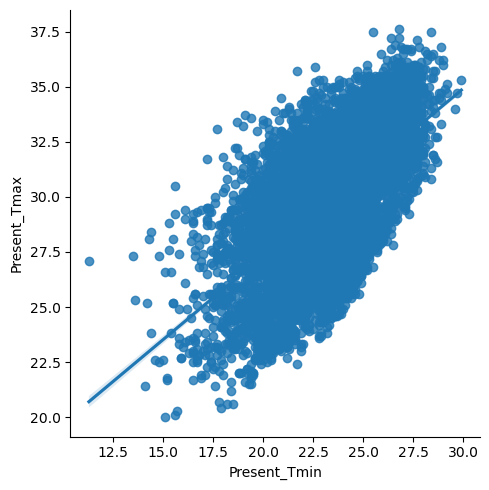

In [111]:
sns.lmplot(x='Present_Tmin',y='Present_Tmax',data=df)

Here we can see the positive correlationship bw Present_Tmax & present_Tmin.

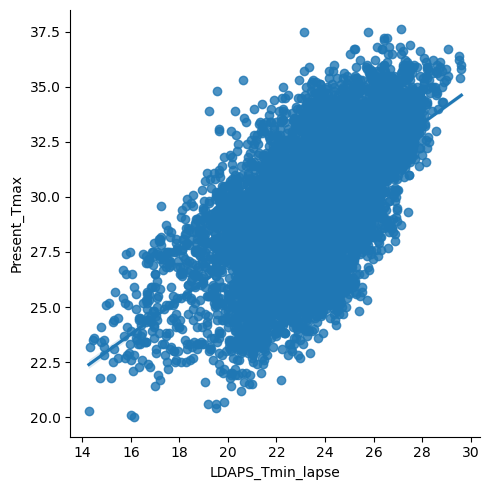

In [112]:
sns.lmplot(x='LDAPS_Tmin_lapse',y='Present_Tmax',data=df)

Here we can see the positive correlationship bw LDAPS_Tmin_lapse & present_Tmax.

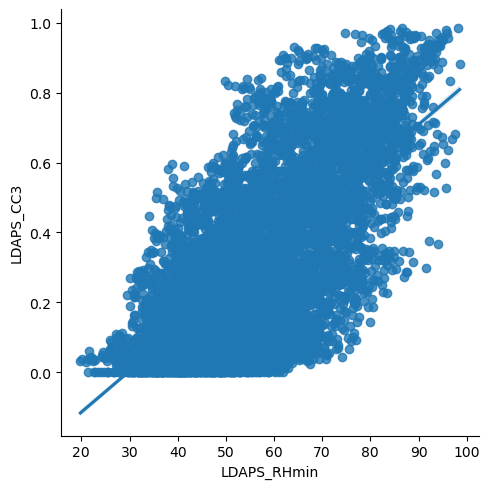

In [113]:
sns.lmplot(x='LDAPS_RHmin',y='LDAPS_CC3',data=df)

Here we can see the positive correlationship bw LDAPS_RHmin & LDAPS_CC3.

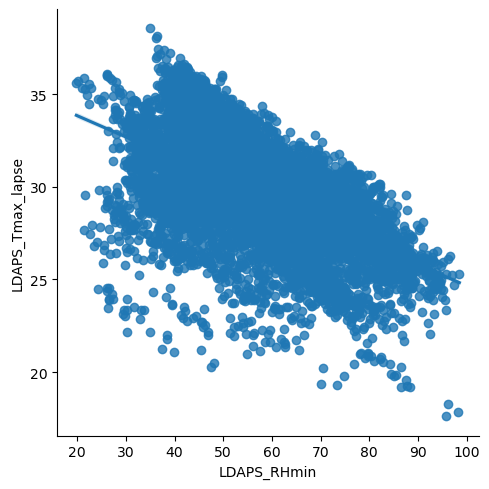

In [115]:
sns.lmplot(x='LDAPS_RHmin',y='LDAPS_Tmax_lapse',data=df)

Here we can see the negetive correlationship bw LDAPS_RHmin & LDAPS_Tmax_lapse.

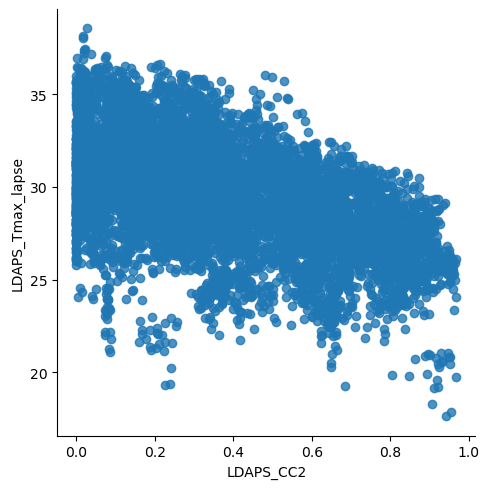

In [117]:
sns.lmplot(x='LDAPS_CC2',y='LDAPS_Tmax_lapse',data=df)

Here we can see the negetive correlationship bw LDAPS_CC2 & LDAPS_Tmax_lapse.

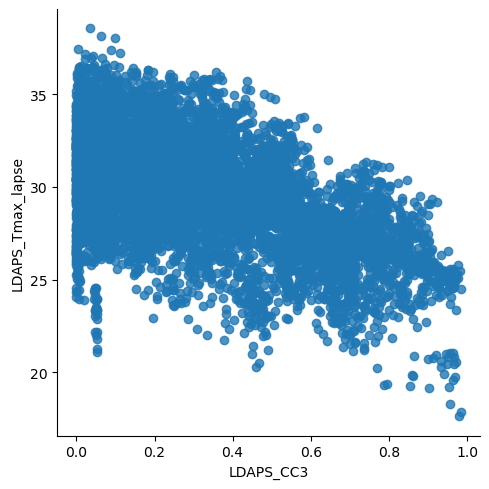

In [118]:
sns.lmplot(x='LDAPS_CC3',y='LDAPS_Tmax_lapse',data=df)

Here we can see the negetive correlationship bw LDAPS_CC3 & LDAPS_Tmax_lapse.

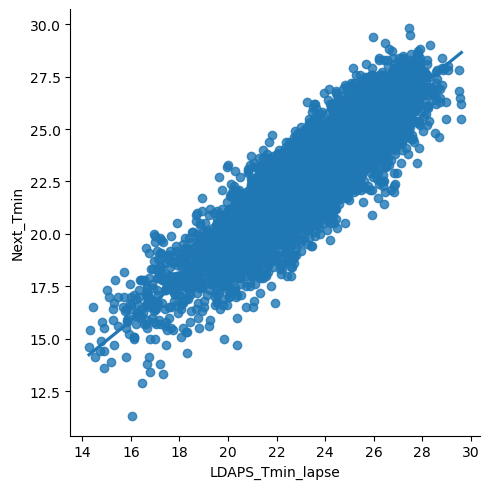

In [119]:
sns.lmplot(x='LDAPS_Tmin_lapse',y='Next_Tmin',data=df)

Here we can see a high positive correlationship bw LDAPS_Tmin_lapse & Next_Tmin.

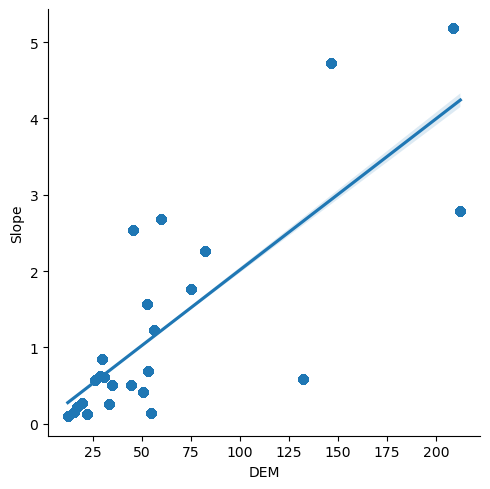

In [120]:
sns.lmplot(x='DEM',y='Slope',data=df)

Here we can see the positive correlationship bw DEM & Slope.

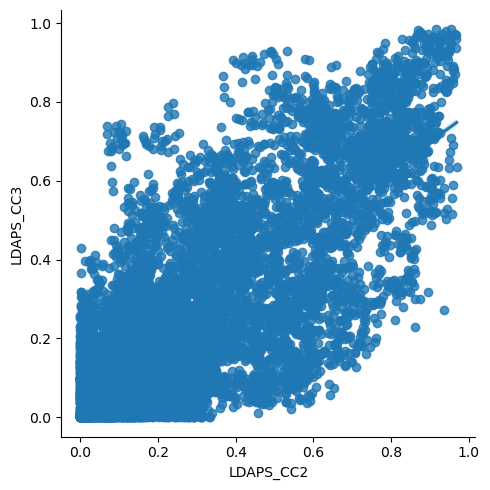

In [122]:
sns.lmplot(x='LDAPS_CC2',y='LDAPS_CC3',data=df)

A positive correlationship can be seen bw LDAPS_CC2 & LDAPS_CC3.

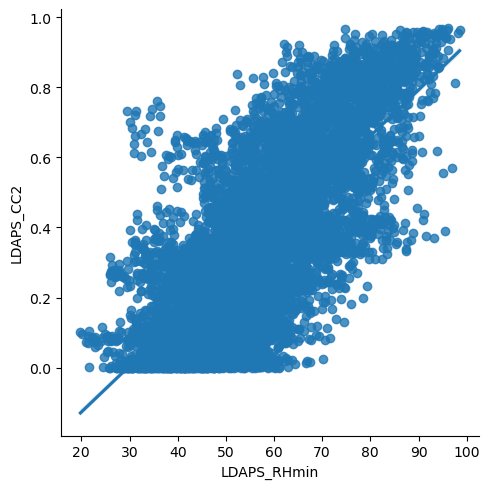

In [123]:
sns.lmplot(x='LDAPS_RHmin',y='LDAPS_CC2',data=df)

A positive correlationship can be seen bw LDAPS_CC2 & LDAPS_RHmin.

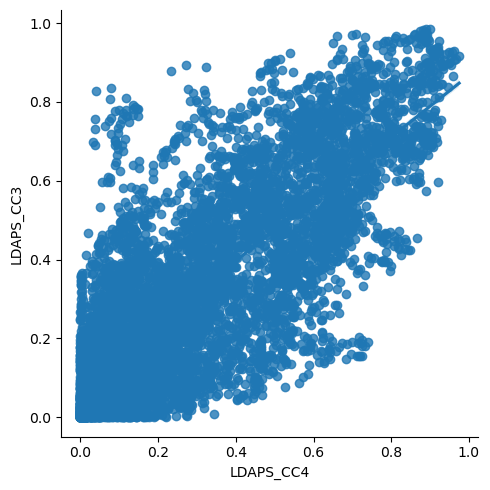

In [129]:
sns.lmplot(x='LDAPS_CC4',y='LDAPS_CC3',data=df)

A positive correlationship can be seen bw LDAPS_CC3 & LDAPS_CC4.

# Checking data distribution-

In [636]:
x=df.drop(columns='Next_Tmax',axis=1)
y=df.Next_Tmax

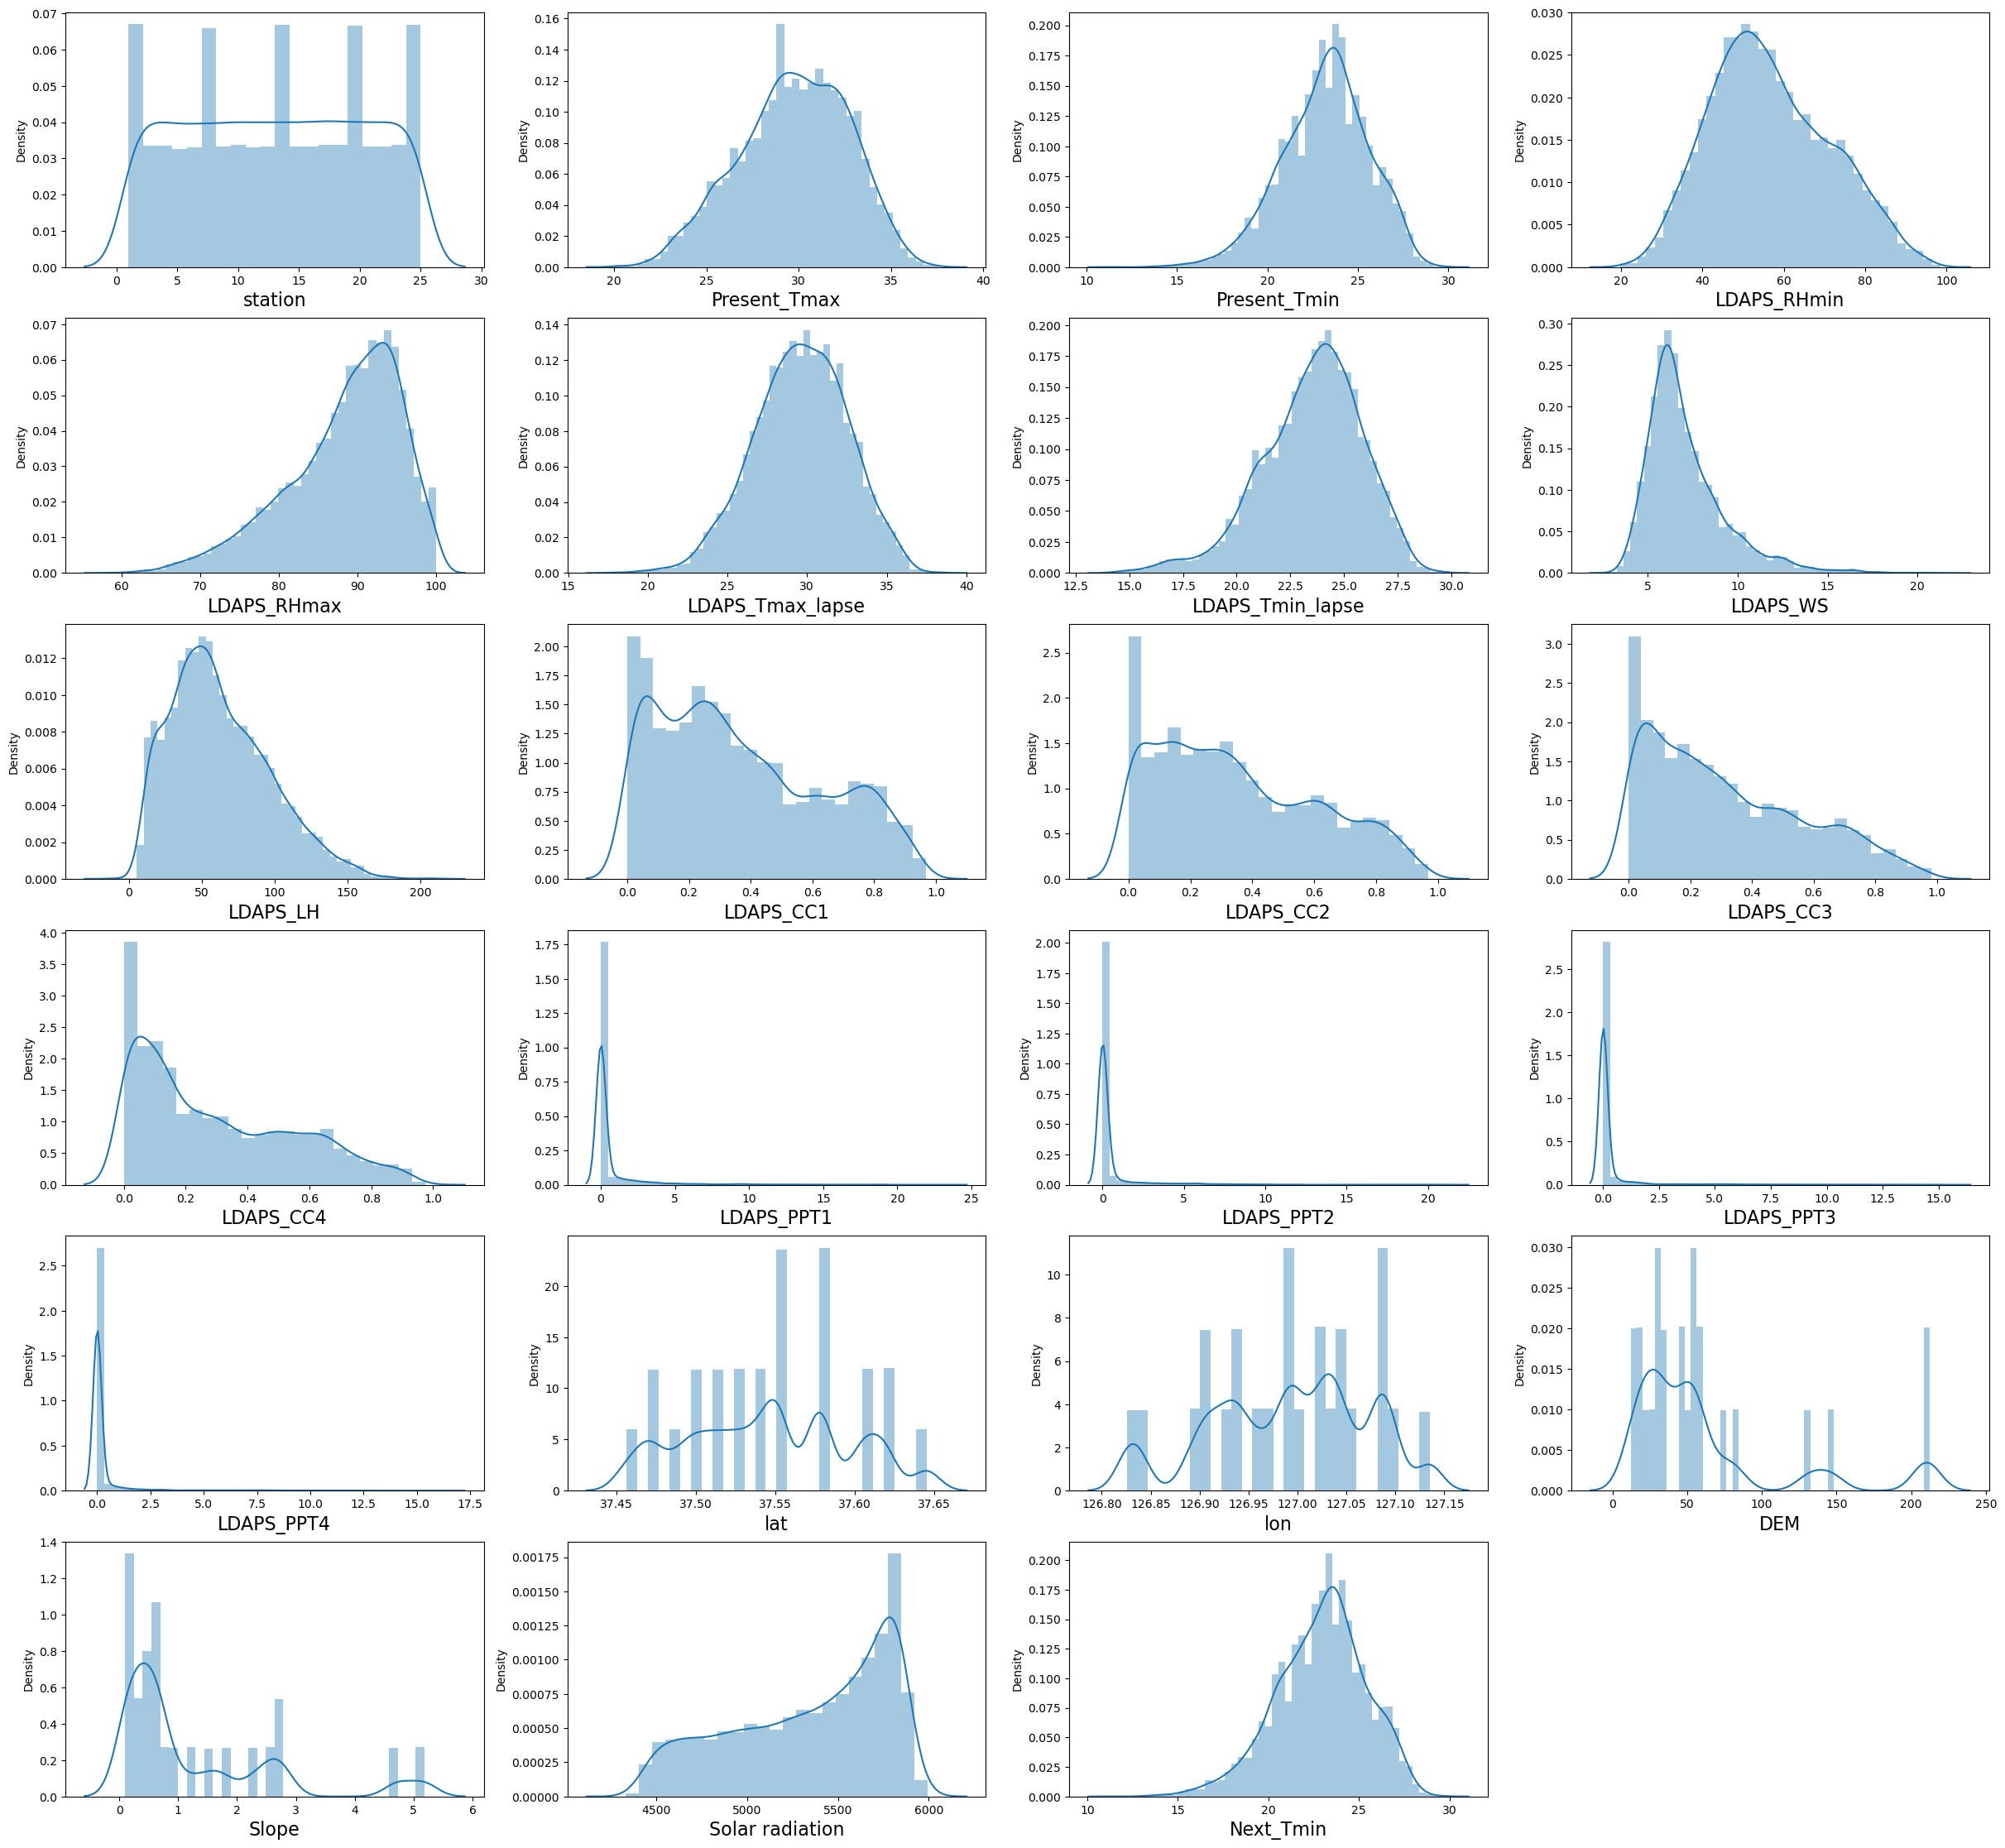

In [637]:
plt.figure(figsize=(30,28))  
plotnumber=1

for col in x.columns:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)   
        sns.distplot(df[col])  
        plt.xlabel(col,fontsize=16)
    plotnumber+=1
plt.show() 

In [638]:
#Checking skewness-

In [639]:
x.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmin          -0.393662
dtype: float64

from the above plot we can see that skewness is there in columns like LDAPS_RHmax,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope columns.
The acceptable skewness range is -0.5 to 0.5.

# Using Box-plot for checking outliers in the dataset-

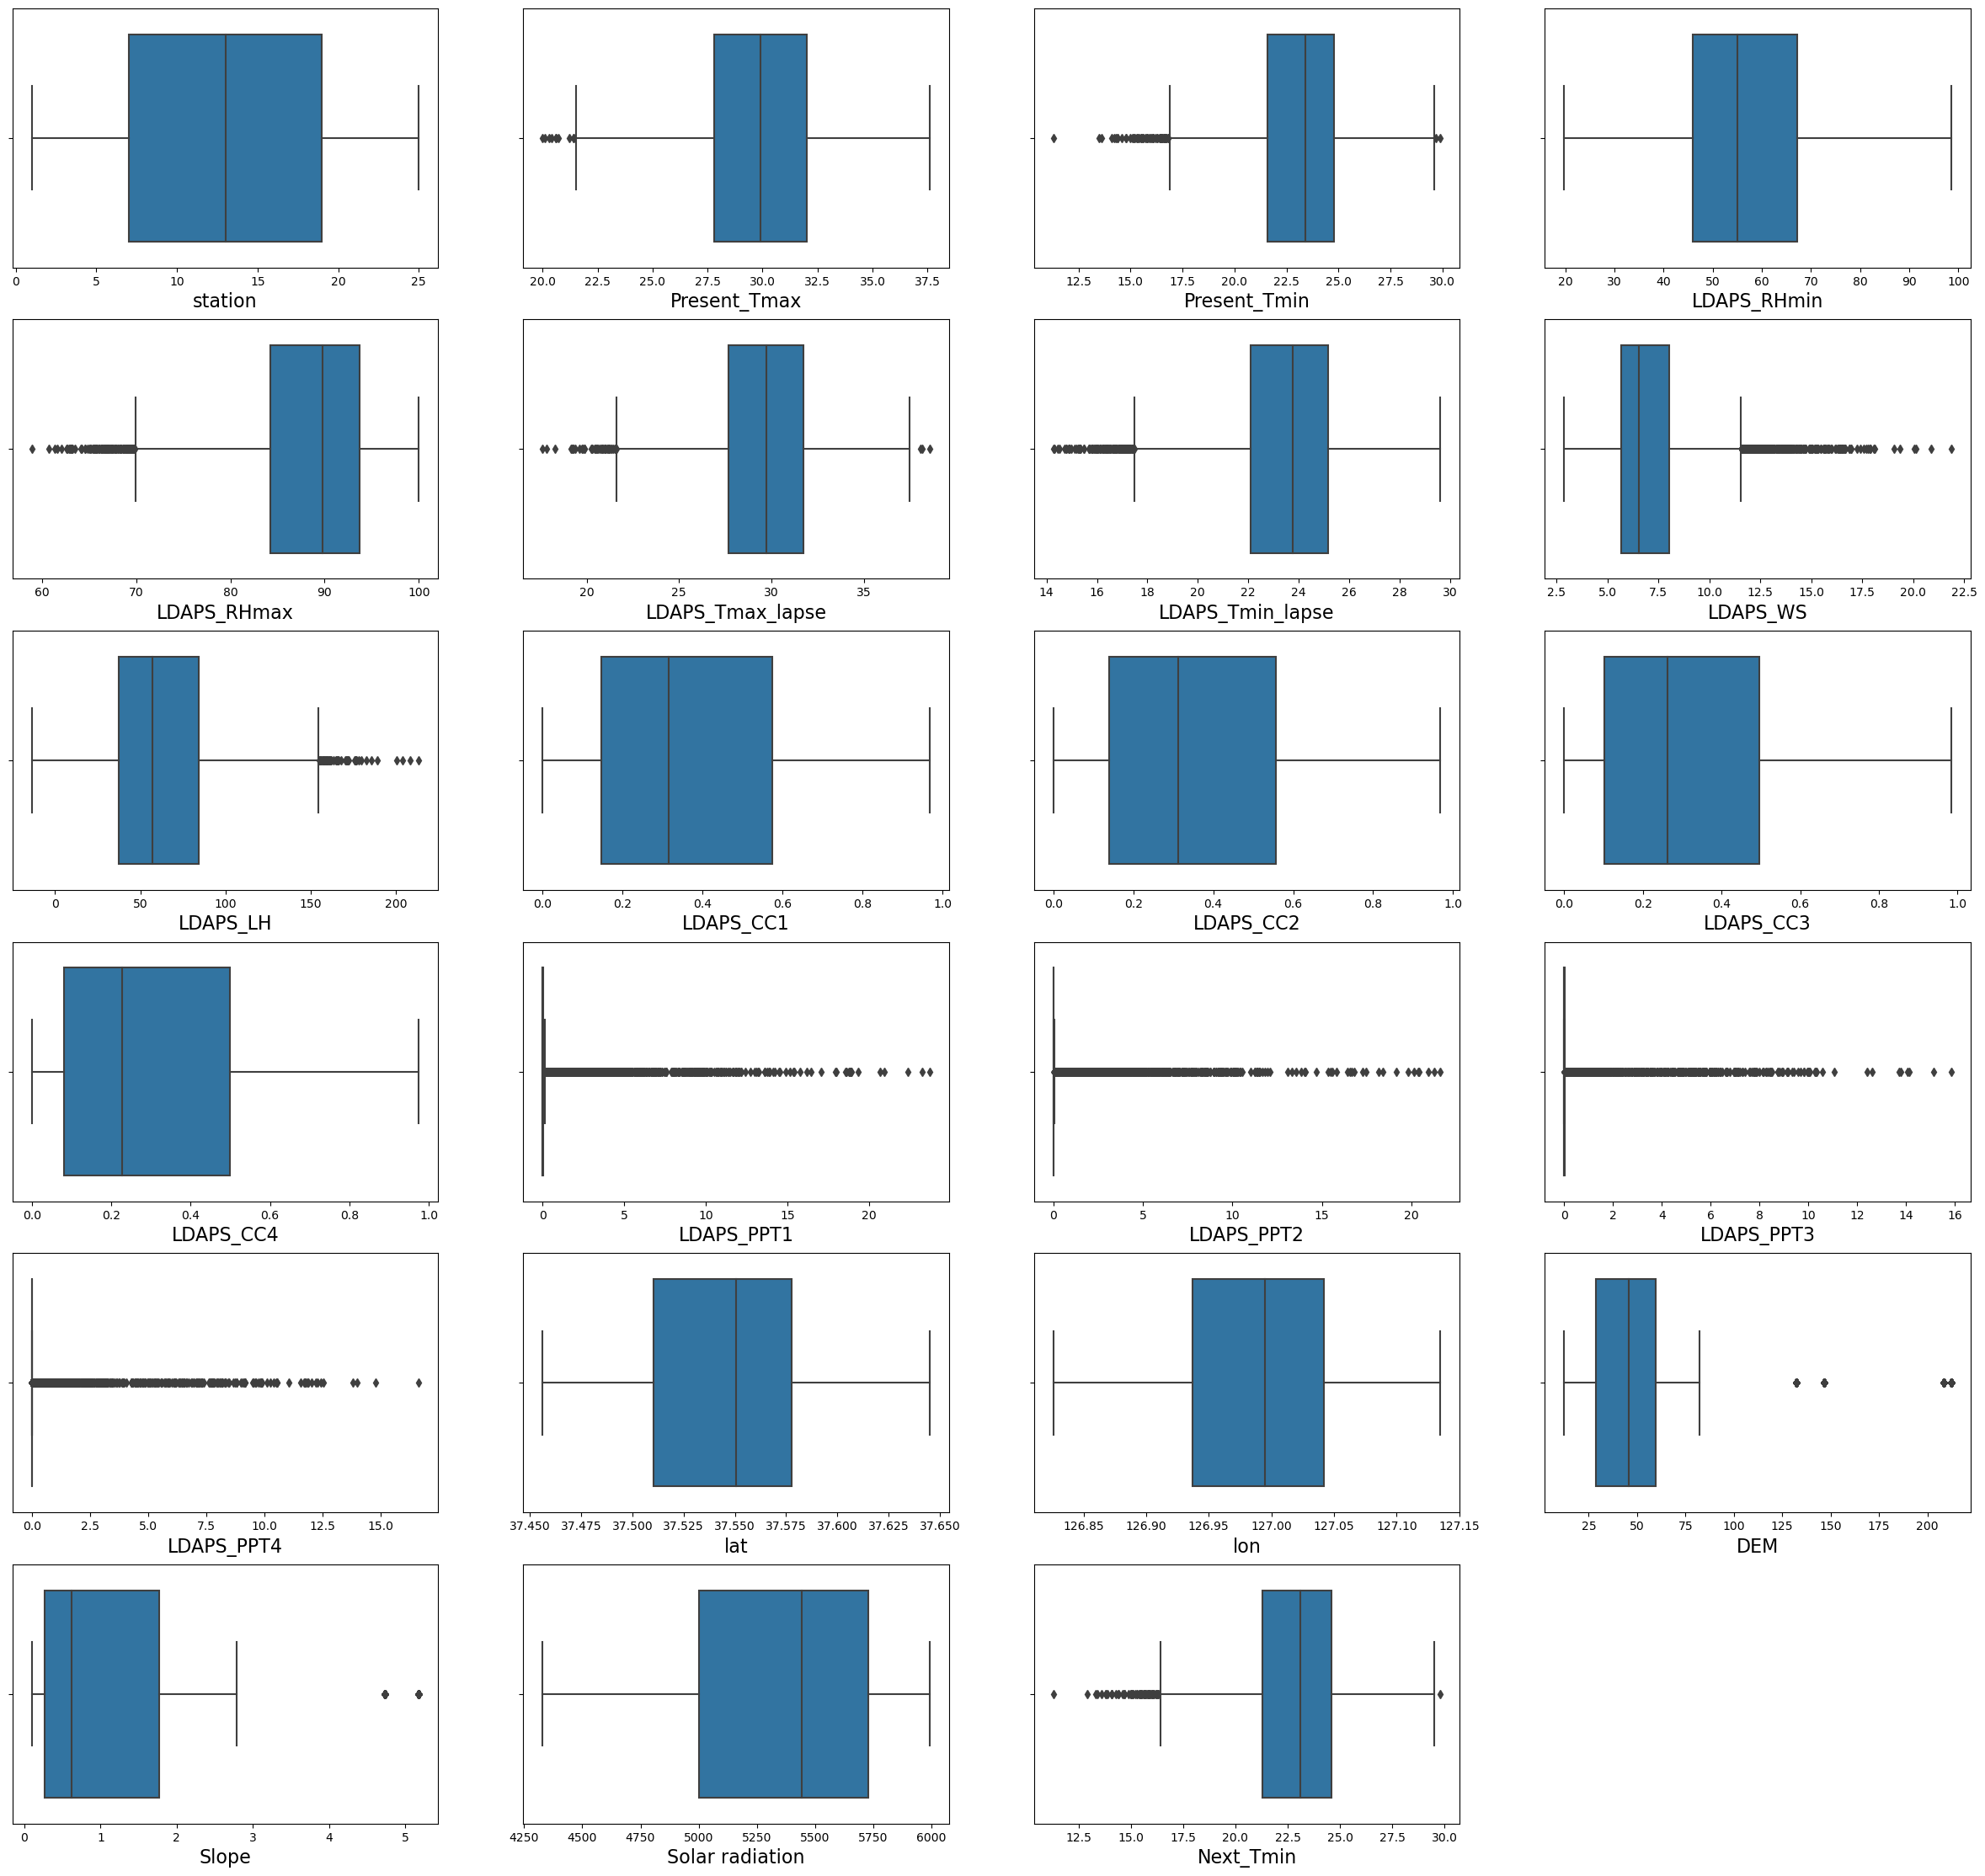

In [640]:
plt.figure(figsize=(30,28))  
plotnumber=1

for col in x.columns:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)   
        sns.boxplot(df[col])  
        plt.xlabel(col,fontsize=16)
    plotnumber+=1
plt.show() 

1. Here from the above plot we can see that outliers are present in the columns like Present_Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1',
LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope column has outliers which we need to remove going further for model building.    
2. Outliers present in Next_Tmin column but we are not concerned about the outliers in target variable.

# Removal of skewness through Cube root method-

Here we can see the above distribution of data in the columns and we can say that the power transform is not well-suited for data that is heavily skewed or has multiple modes so we are using cube root method to reduce the skewness from the data.

In [641]:
df['LDAPS_RHmax']=np.cbrt(df['LDAPS_RHmax'])

In [642]:
df['LDAPS_Tmin_lapse']=np.cbrt(df['LDAPS_Tmin_lapse'])

In [643]:
df['LDAPS_WS']=np.cbrt(df['LDAPS_WS'])

In [644]:
df['LDAPS_LH']=np.cbrt(df['LDAPS_LH'])

In [645]:
df['LDAPS_CC3']=np.cbrt(df['LDAPS_CC3'])

In [646]:
df['LDAPS_CC4']=np.cbrt(df['LDAPS_CC4'])

In [647]:
df['LDAPS_PPT1']=np.cbrt(df['LDAPS_PPT1'])

In [648]:
df['LDAPS_PPT3']=np.cbrt(df['LDAPS_PPT3'])

In [649]:
df['LDAPS_PPT2']=np.cbrt(df['LDAPS_PPT2'])

In [650]:
df['LDAPS_PPT4']=np.cbrt(df['LDAPS_PPT4'])

In [651]:
df['DEM']=np.cbrt(df['DEM'])

In [652]:
df['Slope']=np.cbrt(df['Slope'])

Here we have removed the skewness from the features having skewness beyond acceptable limit.

# Checking data distribution after removal of skewness-

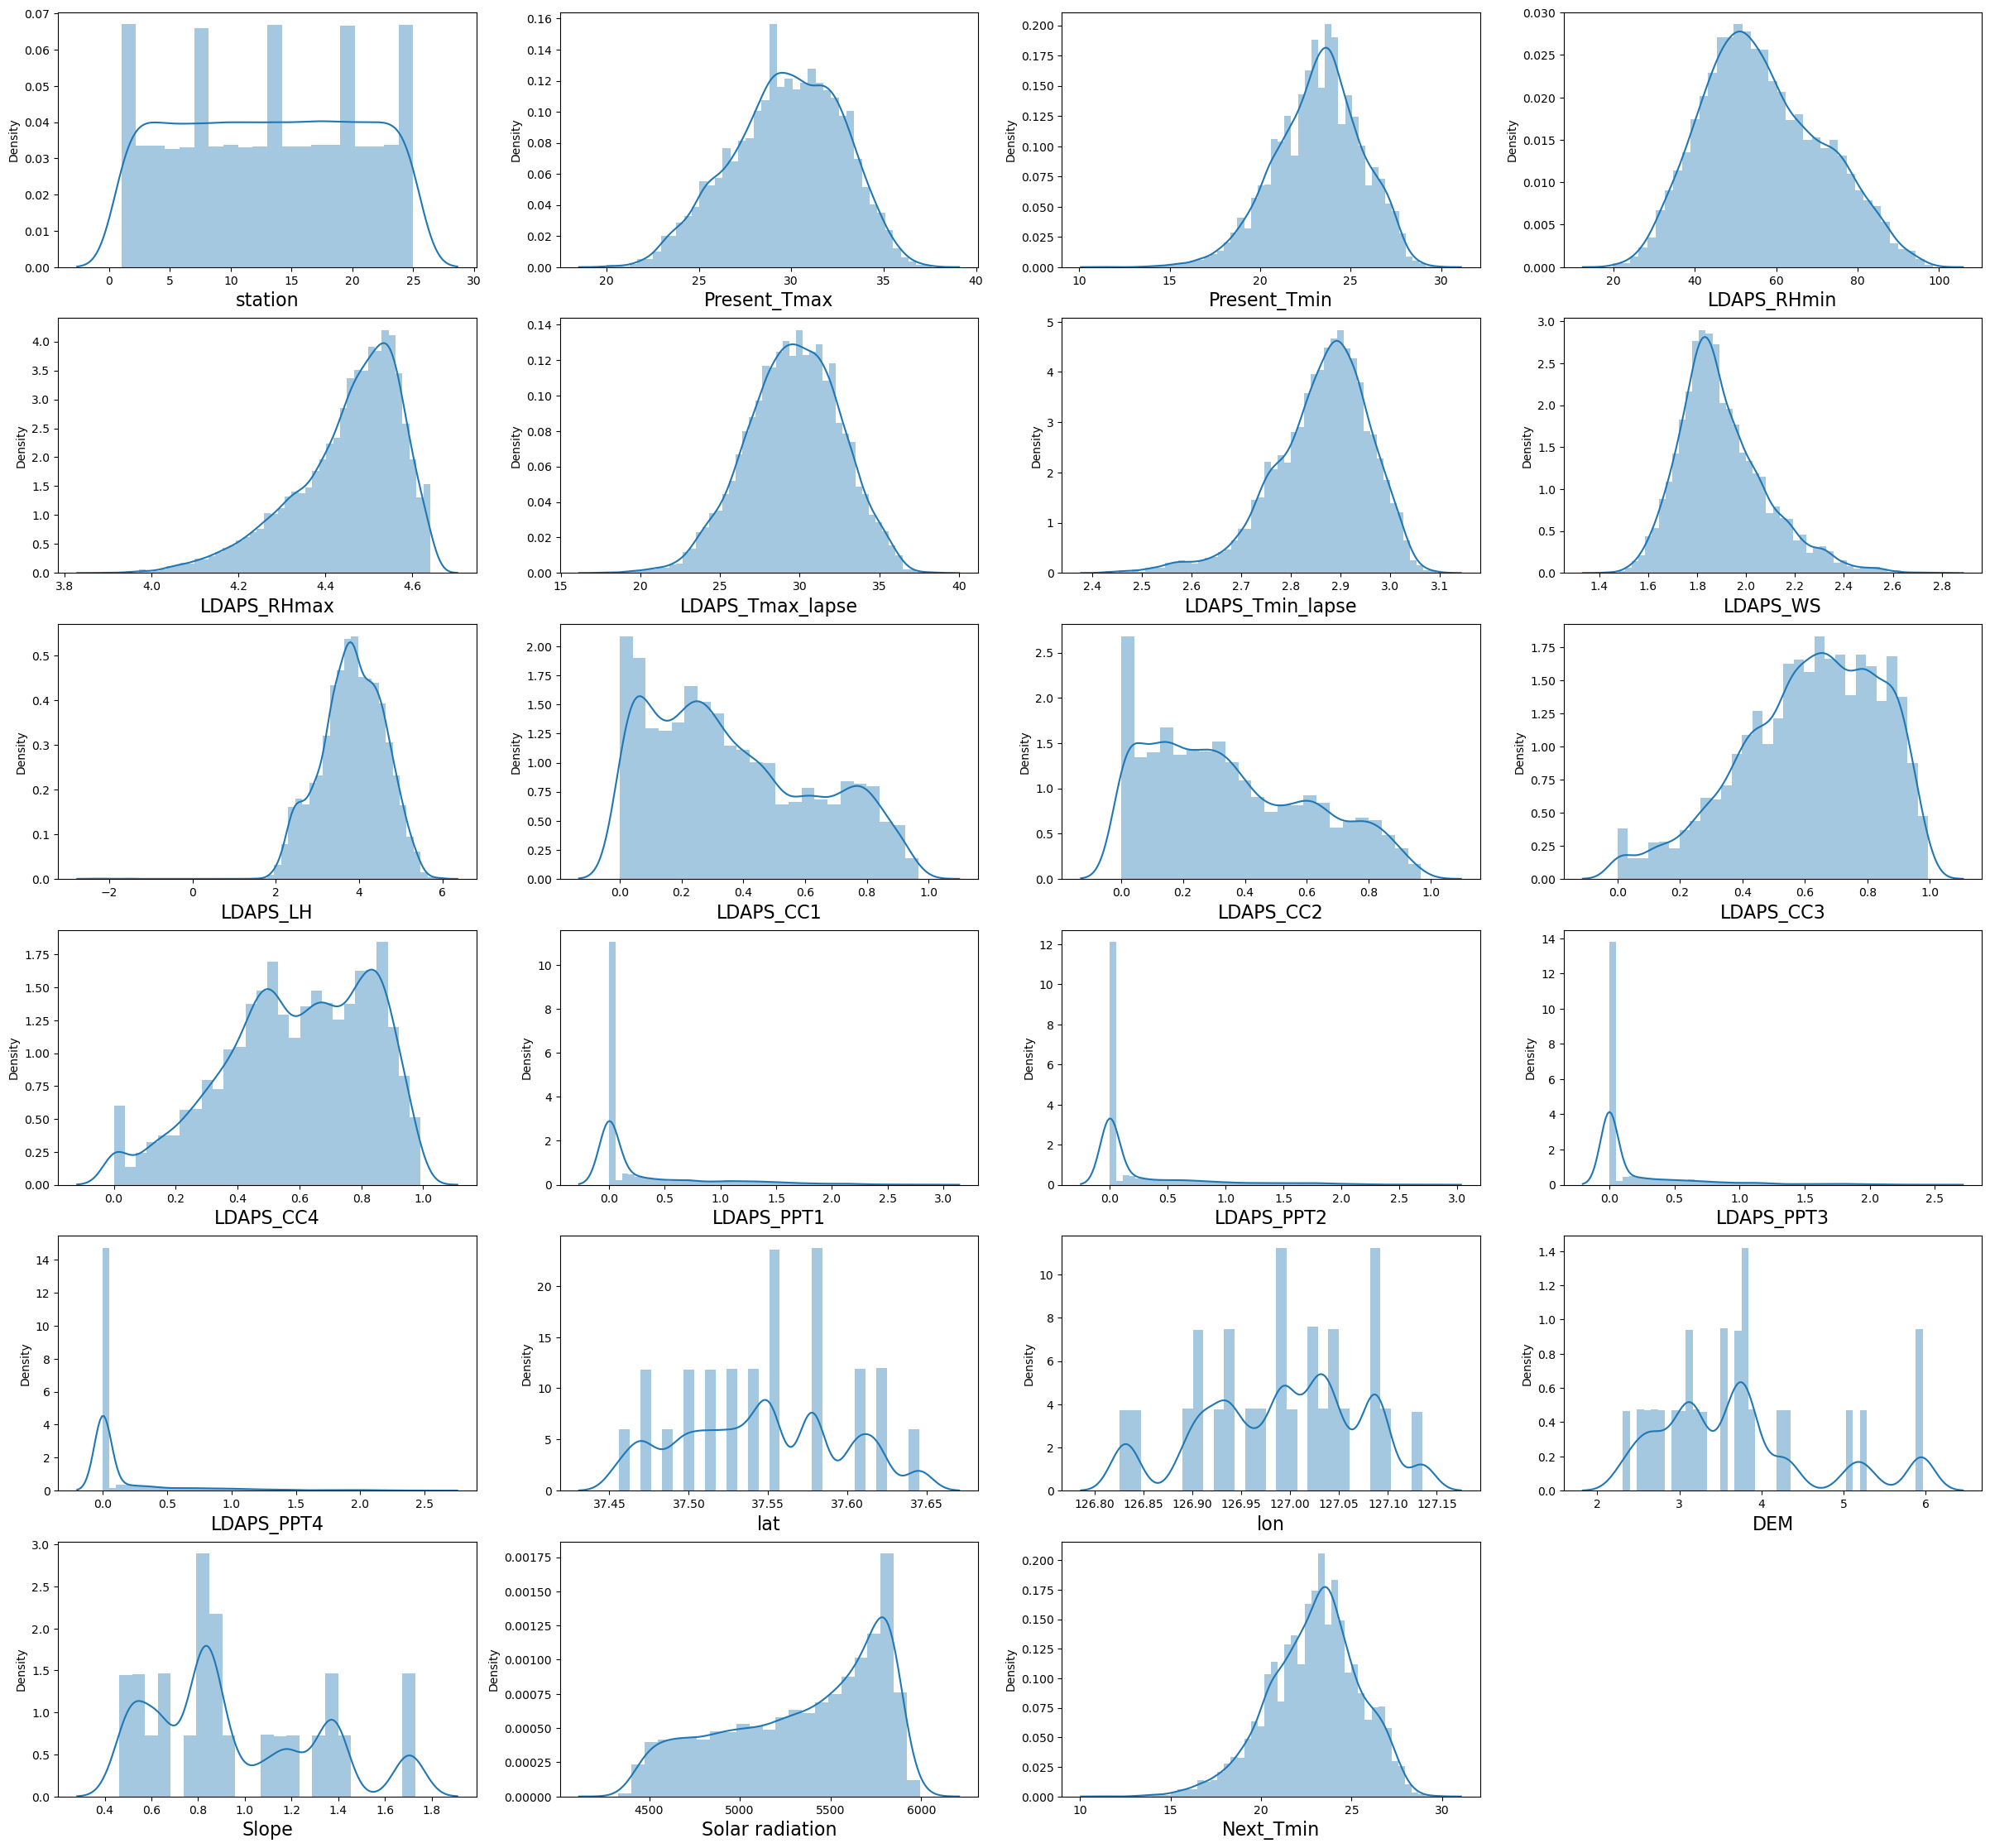

In [379]:
plt.figure(figsize=(30,28))  
plotnumber=1

for col in x.columns:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)   
        sns.distplot(df[col])  
        plt.xlabel(col,fontsize=16)
    plotnumber+=1
plt.show() 

# Ouliers Removal through IQR method-

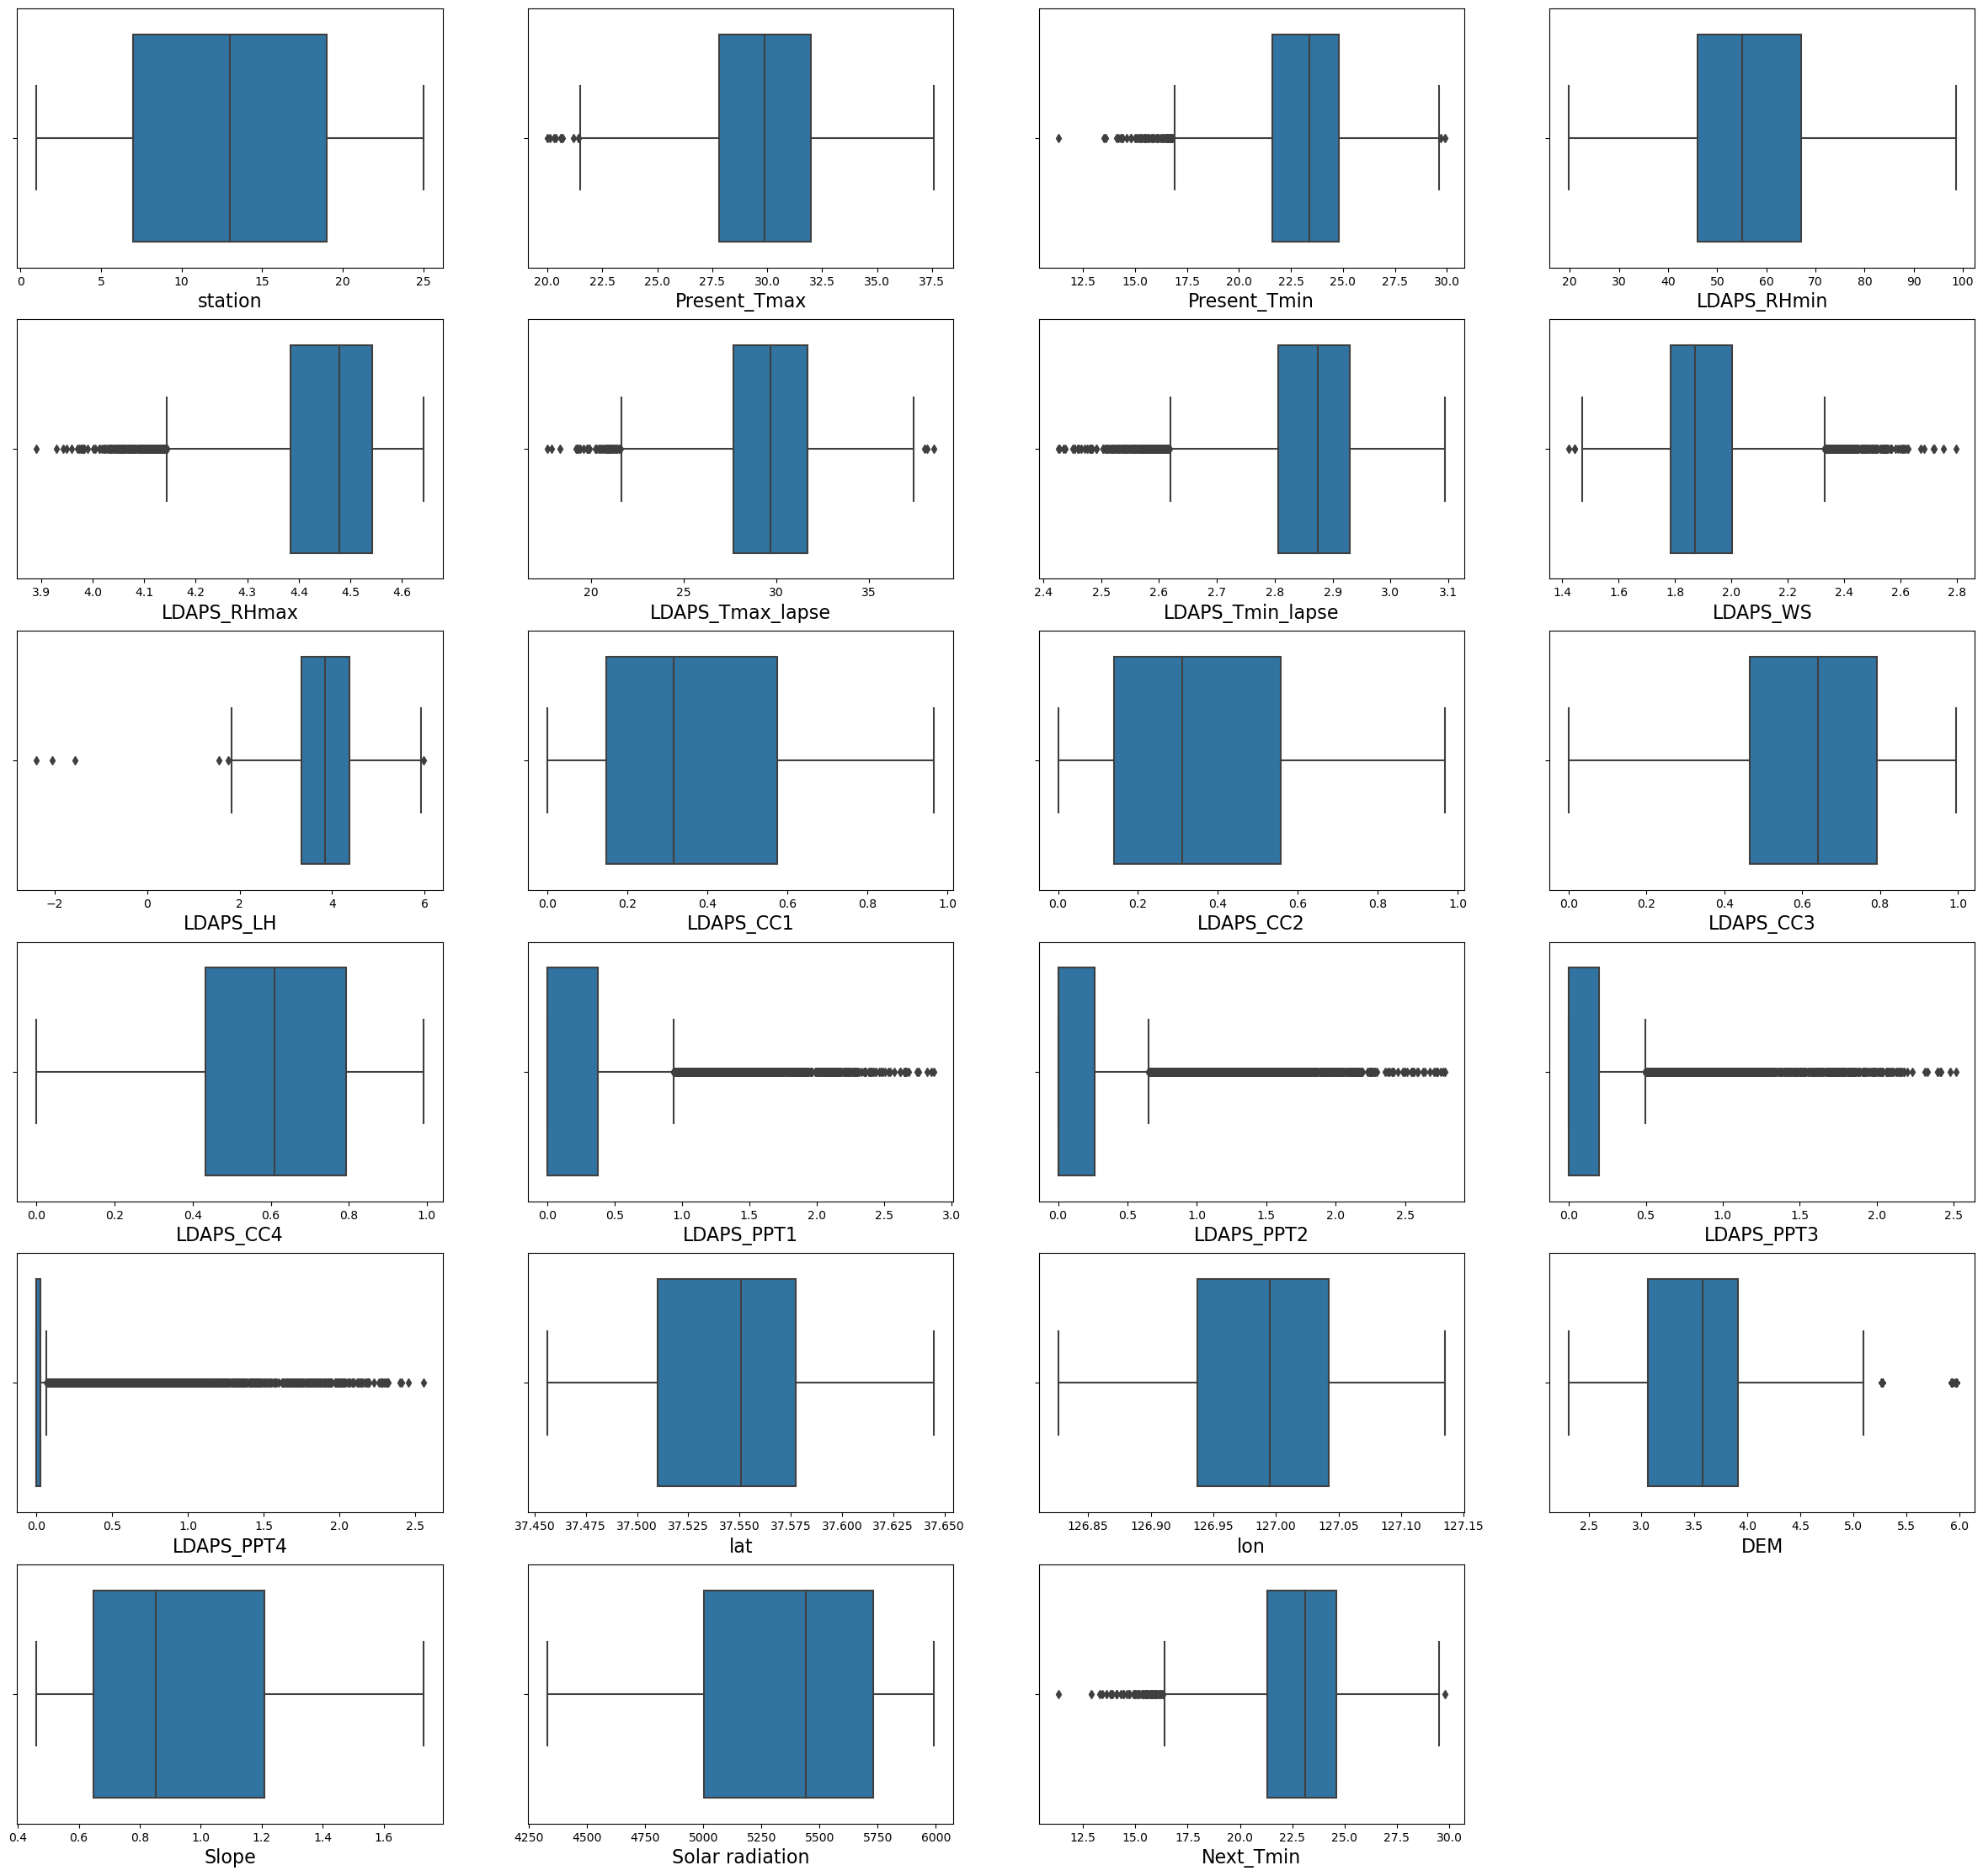

In [45]:
plt.figure(figsize=(30,28))  
plotnumber=1

for col in x.columns:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)   
        sns.boxplot(df[col])  
        plt.xlabel(col,fontsize=16)
    plotnumber+=1
plt.show() 

In [46]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [47]:
#upper side outliers-q3+(1.5*IQR)
#lower side outliers-q1-(1.5*IQR)


q1=df.quantile(0.25)
q3=df.quantile(0.75)

IQR=q3-q1

In [48]:
Present_Tmin_high=(q3.Present_Tmin+(1.5*IQR.Present_Tmin))


index=np.where(df['Present_Tmin']>Present_Tmin_high)

df=df.drop(df.index[index])
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     4.499858   
2013-06-30      2.0          31.9          21.6    52.263397     4.491419   
2013-06-30      3.0          31.6          23.3    48.690479     4.379060   
2013-06-30      4.0          32.0          23.4    58.239788     4.586534   
2013-06-30      5.0          31.4          21.9    56.174095     4.483978   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997     4.277426   
2017-08-30     22.0          22.5          17.4    30.094858     4.374125   
2017-08-30     23.0          23.3          17.1    26.741310     4.288483   
2017-08-30     24.0          23.3          17.7    24.040634     4.259746   
2017-08-30     25.0          23.2          17.4    22.933014     4.258805   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
Date                                                                            
2013-06-30         28.074101          2.844153  1.896289  4.110499   0.233947   
2013-06-30         29.850689          2.885901  1.785468  3.731014   0.225508   
2013-06-30         30.091292          2.906984  1.830969  2.740099   0.209344   
2013-06-30         29.704629          2.857247  1.781083  4.035663   0.216372   
2013-06-30         29.113934          2.863778  1.789965  4.761697   0.151407   
...                      ...               ...       ...       ...        ...   
2017-08-30         27.812697          2.635366  1.876086  2.126355   0.052902   
2017-08-30         26.704905          2.611685  1.793400  4.347071   0.066461   
2017-08-30         26.352081          2.657859  1.832031  4.161290   0.030034   
2017-08-30         27.010193          2.655868  1.870345  3.614996   0.035874   
2017-08-30         27.939516          2.645880  1.938926  2.086997   0.048954   

            ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  \
Date        ...                                                         
2013-06-30  ...         0.0         0.0         0.0  37.6046  126.991   
2013-06-30  ...         0.0         0.0         0.0  37.6046  127.032   
2013-06-30  ...         0.0         0.0         0.0  37.5776  127.058   
2013-06-30  ...         0.0         0.0         0.0  37.6450  127.022   
2013-06-30  ...         0.0         0.0         0.0  37.5507  127.135   
...         ...         ...         ...         ...      ...      ...   
2017-08-30  ...         0.0         0.0         0.0  37.5507  127.040   
2017-08-30  ...         0.0         0.0         0.0  37.5102  127.086   
2017-08-30  ...         0.0         0.0         0.0  37.5372  126.891   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.909   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.970   

                 DEM     Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                   
2013-06-30  5.965871  1.406938      5992.895996       29.1       21.2  
2013-06-30  3.550622  0.801092      5869.312500       30.5       22.5  
2013-06-30  3.217444  0.643203      5863.555664       31.1       23.9  
2013-06-30  3.575659  1.363477      5856.964844       31.7       24.3  
2013-06-30  3.272250  0.796600      5859.552246       31.2       22.5  
...              ...       ...              ...        ...        ...  
2017-08-30  2.973771  0.830151      4456.024414       27.6       17.7  
2017-08-30  2.800629  0.510703      4441.803711       28.0       17.1  
2017-08-30  2.498004  0.537630      4443.313965       28.3       18.1  
2017-08-30  2.586099  0.605778      4438.373535       28.6       18.8  
2017-08-30  2.695484  0.647366      4451.345215       27.8       17.4  

[7563 rows x 24 columns]

In [266]:
LDAPS_Tmax_lapse_high=(q3.LDAPS_Tmax_lapse+(1.5*IQR.LDAPS_Tmax_lapse))


index=np.where(df['LDAPS_Tmax_lapse']>LDAPS_Tmax_lapse_high)

df=df.drop(df.index[index])
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     4.499858   
2013-06-30      2.0          31.9          21.6    52.263397     4.491419   
2013-06-30      3.0          31.6          23.3    48.690479     4.379060   
2013-06-30      4.0          32.0          23.4    58.239788     4.586534   
2013-06-30      5.0          31.4          21.9    56.174095     4.483978   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997     4.277426   
2017-08-30     22.0          22.5          17.4    30.094858     4.374125   
2017-08-30     23.0          23.3          17.1    26.741310     4.288483   
2017-08-30     24.0          23.3          17.7    24.040634     4.259746   
2017-08-30     25.0          23.2          17.4    22.933014     4.258805   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
Date                                                                            
2013-06-30         28.074101          2.844153  1.896289  4.110499   0.233947   
2013-06-30         29.850689          2.885901  1.785468  3.731014   0.225508   
2013-06-30         30.091292          2.906984  1.830969  2.740099   0.209344   
2013-06-30         29.704629          2.857247  1.781083  4.035663   0.216372   
2013-06-30         29.113934          2.863778  1.789965  4.761697   0.151407   
...                      ...               ...       ...       ...        ...   
2017-08-30         27.812697          2.635366  1.876086  2.126355   0.052902   
2017-08-30         26.704905          2.611685  1.793400  4.347071   0.066461   
2017-08-30         26.352081          2.657859  1.832031  4.161290   0.030034   
2017-08-30         27.010193          2.655868  1.870345  3.614996   0.035874   
2017-08-30         27.939516          2.645880  1.938926  2.086997   0.048954   

            ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  \
Date        ...                                                         
2013-06-30  ...         0.0         0.0         0.0  37.6046  126.991   
2013-06-30  ...         0.0         0.0         0.0  37.6046  127.032   
2013-06-30  ...         0.0         0.0         0.0  37.5776  127.058   
2013-06-30  ...         0.0         0.0         0.0  37.6450  127.022   
2013-06-30  ...         0.0         0.0         0.0  37.5507  127.135   
...         ...         ...         ...         ...      ...      ...   
2017-08-30  ...         0.0         0.0         0.0  37.5507  127.040   
2017-08-30  ...         0.0         0.0         0.0  37.5102  127.086   
2017-08-30  ...         0.0         0.0         0.0  37.5372  126.891   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.909   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.970   

                 DEM     Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                   
2013-06-30  5.965871  1.406938      5992.895996       29.1       21.2  
2013-06-30  3.550622  0.801092      5869.312500       30.5       22.5  
2013-06-30  3.217444  0.643203      5863.555664       31.1       23.9  
2013-06-30  3.575659  1.363477      5856.964844       31.7       24.3  
2013-06-30  3.272250  0.796600      5859.552246       31.2       22.5  
...              ...       ...              ...        ...        ...  
2017-08-30  2.973771  0.830151      4456.024414       27.6       17.7  
2017-08-30  2.800629  0.510703      4441.803711       28.0       17.1  
2017-08-30  2.498004  0.537630      4443.313965       28.3       18.1  
2017-08-30  2.586099  0.605778      4438.373535       28.6       18.8  
2017-08-30  2.695484  0.647366      4451.345215       27.8       17.4  

[7538 rows x 24 columns]

In [267]:
LDAPS_WS_high=(q3.LDAPS_WS+(1.5*IQR.LDAPS_WS))


index=np.where(df['LDAPS_WS']>LDAPS_WS_high)

df=df.drop(df.index[index])
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     4.499858   
2013-06-30      2.0          31.9          21.6    52.263397     4.491419   
2013-06-30      3.0          31.6          23.3    48.690479     4.379060   
2013-06-30      4.0          32.0          23.4    58.239788     4.586534   
2013-06-30      5.0          31.4          21.9    56.174095     4.483978   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997     4.277426   
2017-08-30     22.0          22.5          17.4    30.094858     4.374125   
2017-08-30     23.0          23.3          17.1    26.741310     4.288483   
2017-08-30     24.0          23.3          17.7    24.040634     4.259746   
2017-08-30     25.0          23.2          17.4    22.933014     4.258805   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
Date                                                                            
2013-06-30         28.074101          2.844153  1.896289  4.110499   0.233947   
2013-06-30         29.850689          2.885901  1.785468  3.731014   0.225508   
2013-06-30         30.091292          2.906984  1.830969  2.740099   0.209344   
2013-06-30         29.704629          2.857247  1.781083  4.035663   0.216372   
2013-06-30         29.113934          2.863778  1.789965  4.761697   0.151407   
...                      ...               ...       ...       ...        ...   
2017-08-30         27.812697          2.635366  1.876086  2.126355   0.052902   
2017-08-30         26.704905          2.611685  1.793400  4.347071   0.066461   
2017-08-30         26.352081          2.657859  1.832031  4.161290   0.030034   
2017-08-30         27.010193          2.655868  1.870345  3.614996   0.035874   
2017-08-30         27.939516          2.645880  1.938926  2.086997   0.048954   

            ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  \
Date        ...                                                         
2013-06-30  ...         0.0         0.0         0.0  37.6046  126.991   
2013-06-30  ...         0.0         0.0         0.0  37.6046  127.032   
2013-06-30  ...         0.0         0.0         0.0  37.5776  127.058   
2013-06-30  ...         0.0         0.0         0.0  37.6450  127.022   
2013-06-30  ...         0.0         0.0         0.0  37.5507  127.135   
...         ...         ...         ...         ...      ...      ...   
2017-08-30  ...         0.0         0.0         0.0  37.5507  127.040   
2017-08-30  ...         0.0         0.0         0.0  37.5102  127.086   
2017-08-30  ...         0.0         0.0         0.0  37.5372  126.891   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.909   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.970   

                 DEM     Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                   
2013-06-30  5.965871  1.406938      5992.895996       29.1       21.2  
2013-06-30  3.550622  0.801092      5869.312500       30.5       22.5  
2013-06-30  3.217444  0.643203      5863.555664       31.1       23.9  
2013-06-30  3.575659  1.363477      5856.964844       31.7       24.3  
2013-06-30  3.272250  0.796600      5859.552246       31.2       22.5  
...              ...       ...              ...        ...        ...  
2017-08-30  2.973771  0.830151      4456.024414       27.6       17.7  
2017-08-30  2.800629  0.510703      4441.803711       28.0       17.1  
2017-08-30  2.498004  0.537630      4443.313965       28.3       18.1  
2017-08-30  2.586099  0.605778      4438.373535       28.6       18.8  
2017-08-30  2.695484  0.647366      4451.345215       27.8       17.4  

[6380 rows x 24 columns]

In [552]:
LDAPS_PPT1_high=(q3.LDAPS_PPT1+(1.5*IQR.LDAPS_PPT1))


index=np.where(df['LDAPS_PPT1']>LDAPS_PPT1_high)

df=df.drop(df.index[index])
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     4.499858   
2013-06-30      2.0          31.9          21.6    52.263397     4.491419   
2013-06-30      3.0          31.6          23.3    48.690479     4.379060   
2013-06-30      4.0          32.0          23.4    58.239788     4.586534   
2013-06-30      5.0          31.4          21.9    56.174095     4.483978   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997     4.277426   
2017-08-30     22.0          22.5          17.4    30.094858     4.374125   
2017-08-30     23.0          23.3          17.1    26.741310     4.288483   
2017-08-30     24.0          23.3          17.7    24.040634     4.259746   
2017-08-30     25.0          23.2          17.4    22.933014     4.258805   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
Date                                                                            
2013-06-30         28.074101          2.844153  1.896289  4.110499   0.233947   
2013-06-30         29.850689          2.885901  1.785468  3.731014   0.225508   
2013-06-30         30.091292          2.906984  1.830969  2.740099   0.209344   
2013-06-30         29.704629          2.857247  1.781083  4.035663   0.216372   
2013-06-30         29.113934          2.863778  1.789965  4.761697   0.151407   
...                      ...               ...       ...       ...        ...   
2017-08-30         27.812697          2.635366  1.876086  2.126355   0.052902   
2017-08-30         26.704905          2.611685  1.793400  4.347071   0.066461   
2017-08-30         26.352081          2.657859  1.832031  4.161290   0.030034   
2017-08-30         27.010193          2.655868  1.870345  3.614996   0.035874   
2017-08-30         27.939516          2.645880  1.938926  2.086997   0.048954   

            ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  \
Date        ...                                                         
2013-06-30  ...         0.0         0.0         0.0  37.6046  126.991   
2013-06-30  ...         0.0         0.0         0.0  37.6046  127.032   
2013-06-30  ...         0.0         0.0         0.0  37.5776  127.058   
2013-06-30  ...         0.0         0.0         0.0  37.6450  127.022   
2013-06-30  ...         0.0         0.0         0.0  37.5507  127.135   
...         ...         ...         ...         ...      ...      ...   
2017-08-30  ...         0.0         0.0         0.0  37.5507  127.040   
2017-08-30  ...         0.0         0.0         0.0  37.5102  127.086   
2017-08-30  ...         0.0         0.0         0.0  37.5372  126.891   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.909   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.970   

                 DEM     Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                   
2013-06-30  5.965871  1.406938      5992.895996       29.1       21.2  
2013-06-30  3.550622  0.801092      5869.312500       30.5       22.5  
2013-06-30  3.217444  0.643203      5863.555664       31.1       23.9  
2013-06-30  3.575659  1.363477      5856.964844       31.7       24.3  
2013-06-30  3.272250  0.796600      5859.552246       31.2       22.5  
...              ...       ...              ...        ...        ...  
2017-08-30  2.973771  0.830151      4456.024414       27.6       17.7  
2017-08-30  2.800629  0.510703      4441.803711       28.0       17.1  
2017-08-30  2.498004  0.537630      4443.313965       28.3       18.1  
2017-08-30  2.586099  0.605778      4438.373535       28.6       18.8  
2017-08-30  2.695484  0.647366      4451.345215       27.8       17.4  

[5116 rows x 24 columns]

In [553]:
LDAPS_PPT2_high=(q3.LDAPS_PPT2+(1.5*IQR.LDAPS_PPT2))


index=np.where(df['LDAPS_PPT2']>LDAPS_PPT2_high)

df=df.drop(df.index[index])
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     4.499858   
2013-06-30      2.0          31.9          21.6    52.263397     4.491419   
2013-06-30      3.0          31.6          23.3    48.690479     4.379060   
2013-06-30      4.0          32.0          23.4    58.239788     4.586534   
2013-06-30      5.0          31.4          21.9    56.174095     4.483978   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997     4.277426   
2017-08-30     22.0          22.5          17.4    30.094858     4.374125   
2017-08-30     23.0          23.3          17.1    26.741310     4.288483   
2017-08-30     24.0          23.3          17.7    24.040634     4.259746   
2017-08-30     25.0          23.2          17.4    22.933014     4.258805   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
Date                                                                            
2013-06-30         28.074101          2.844153  1.896289  4.110499   0.233947   
2013-06-30         29.850689          2.885901  1.785468  3.731014   0.225508   
2013-06-30         30.091292          2.906984  1.830969  2.740099   0.209344   
2013-06-30         29.704629          2.857247  1.781083  4.035663   0.216372   
2013-06-30         29.113934          2.863778  1.789965  4.761697   0.151407   
...                      ...               ...       ...       ...        ...   
2017-08-30         27.812697          2.635366  1.876086  2.126355   0.052902   
2017-08-30         26.704905          2.611685  1.793400  4.347071   0.066461   
2017-08-30         26.352081          2.657859  1.832031  4.161290   0.030034   
2017-08-30         27.010193          2.655868  1.870345  3.614996   0.035874   
2017-08-30         27.939516          2.645880  1.938926  2.086997   0.048954   

            ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  \
Date        ...                                                         
2013-06-30  ...         0.0         0.0         0.0  37.6046  126.991   
2013-06-30  ...         0.0         0.0         0.0  37.6046  127.032   
2013-06-30  ...         0.0         0.0         0.0  37.5776  127.058   
2013-06-30  ...         0.0         0.0         0.0  37.6450  127.022   
2013-06-30  ...         0.0         0.0         0.0  37.5507  127.135   
...         ...         ...         ...         ...      ...      ...   
2017-08-30  ...         0.0         0.0         0.0  37.5507  127.040   
2017-08-30  ...         0.0         0.0         0.0  37.5102  127.086   
2017-08-30  ...         0.0         0.0         0.0  37.5372  126.891   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.909   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.970   

                 DEM     Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                   
2013-06-30  5.965871  1.406938      5992.895996       29.1       21.2  
2013-06-30  3.550622  0.801092      5869.312500       30.5       22.5  
2013-06-30  3.217444  0.643203      5863.555664       31.1       23.9  
2013-06-30  3.575659  1.363477      5856.964844       31.7       24.3  
2013-06-30  3.272250  0.796600      5859.552246       31.2       22.5  
...              ...       ...              ...        ...        ...  
2017-08-30  2.973771  0.830151      4456.024414       27.6       17.7  
2017-08-30  2.800629  0.510703      4441.803711       28.0       17.1  
2017-08-30  2.498004  0.537630      4443.313965       28.3       18.1  
2017-08-30  2.586099  0.605778      4438.373535       28.6       18.8  
2017-08-30  2.695484  0.647366      4451.345215       27.8       17.4  

[4524 rows x 24 columns]

In [554]:
LDAPS_PPT3_high=(q3.LDAPS_PPT3+(1.5*IQR.LDAPS_PPT3))


index=np.where(df['LDAPS_PPT3']>LDAPS_PPT3_high)

df=df.drop(df.index[index])
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     4.499858   
2013-06-30      2.0          31.9          21.6    52.263397     4.491419   
2013-06-30      3.0          31.6          23.3    48.690479     4.379060   
2013-06-30      4.0          32.0          23.4    58.239788     4.586534   
2013-06-30      5.0          31.4          21.9    56.174095     4.483978   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997     4.277426   
2017-08-30     22.0          22.5          17.4    30.094858     4.374125   
2017-08-30     23.0          23.3          17.1    26.741310     4.288483   
2017-08-30     24.0          23.3          17.7    24.040634     4.259746   
2017-08-30     25.0          23.2          17.4    22.933014     4.258805   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
Date                                                                            
2013-06-30         28.074101          2.844153  1.896289  4.110499   0.233947   
2013-06-30         29.850689          2.885901  1.785468  3.731014   0.225508   
2013-06-30         30.091292          2.906984  1.830969  2.740099   0.209344   
2013-06-30         29.704629          2.857247  1.781083  4.035663   0.216372   
2013-06-30         29.113934          2.863778  1.789965  4.761697   0.151407   
...                      ...               ...       ...       ...        ...   
2017-08-30         27.812697          2.635366  1.876086  2.126355   0.052902   
2017-08-30         26.704905          2.611685  1.793400  4.347071   0.066461   
2017-08-30         26.352081          2.657859  1.832031  4.161290   0.030034   
2017-08-30         27.010193          2.655868  1.870345  3.614996   0.035874   
2017-08-30         27.939516          2.645880  1.938926  2.086997   0.048954   

            ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  \
Date        ...                                                         
2013-06-30  ...         0.0         0.0         0.0  37.6046  126.991   
2013-06-30  ...         0.0         0.0         0.0  37.6046  127.032   
2013-06-30  ...         0.0         0.0         0.0  37.5776  127.058   
2013-06-30  ...         0.0         0.0         0.0  37.6450  127.022   
2013-06-30  ...         0.0         0.0         0.0  37.5507  127.135   
...         ...         ...         ...         ...      ...      ...   
2017-08-30  ...         0.0         0.0         0.0  37.5507  127.040   
2017-08-30  ...         0.0         0.0         0.0  37.5102  127.086   
2017-08-30  ...         0.0         0.0         0.0  37.5372  126.891   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.909   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.970   

                 DEM     Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                   
2013-06-30  5.965871  1.406938      5992.895996       29.1       21.2  
2013-06-30  3.550622  0.801092      5869.312500       30.5       22.5  
2013-06-30  3.217444  0.643203      5863.555664       31.1       23.9  
2013-06-30  3.575659  1.363477      5856.964844       31.7       24.3  
2013-06-30  3.272250  0.796600      5859.552246       31.2       22.5  
...              ...       ...              ...        ...        ...  
2017-08-30  2.973771  0.830151      4456.024414       27.6       17.7  
2017-08-30  2.800629  0.510703      4441.803711       28.0       17.1  
2017-08-30  2.498004  0.537630      4443.313965       28.3       18.1  
2017-08-30  2.586099  0.605778      4438.373535       28.6       18.8  
2017-08-30  2.695484  0.647366      4451.345215       27.8       17.4  

[3413 rows x 24 columns]

In [555]:
LDAPS_PPT4_high=(q3.LDAPS_PPT3+(1.5*IQR.LDAPS_PPT4))


index=np.where(df['LDAPS_PPT4']>LDAPS_PPT4_high)

df=df.drop(df.index[index])
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     4.499858   
2013-06-30      2.0          31.9          21.6    52.263397     4.491419   
2013-06-30      3.0          31.6          23.3    48.690479     4.379060   
2013-06-30      4.0          32.0          23.4    58.239788     4.586534   
2013-06-30      5.0          31.4          21.9    56.174095     4.483978   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997     4.277426   
2017-08-30     22.0          22.5          17.4    30.094858     4.374125   
2017-08-30     23.0          23.3          17.1    26.741310     4.288483   
2017-08-30     24.0          23.3          17.7    24.040634     4.259746   
2017-08-30     25.0          23.2          17.4    22.933014     4.258805   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
Date                                                                            
2013-06-30         28.074101          2.844153  1.896289  4.110499   0.233947   
2013-06-30         29.850689          2.885901  1.785468  3.731014   0.225508   
2013-06-30         30.091292          2.906984  1.830969  2.740099   0.209344   
2013-06-30         29.704629          2.857247  1.781083  4.035663   0.216372   
2013-06-30         29.113934          2.863778  1.789965  4.761697   0.151407   
...                      ...               ...       ...       ...        ...   
2017-08-30         27.812697          2.635366  1.876086  2.126355   0.052902   
2017-08-30         26.704905          2.611685  1.793400  4.347071   0.066461   
2017-08-30         26.352081          2.657859  1.832031  4.161290   0.030034   
2017-08-30         27.010193          2.655868  1.870345  3.614996   0.035874   
2017-08-30         27.939516          2.645880  1.938926  2.086997   0.048954   

            ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  \
Date        ...                                                         
2013-06-30  ...         0.0         0.0         0.0  37.6046  126.991   
2013-06-30  ...         0.0         0.0         0.0  37.6046  127.032   
2013-06-30  ...         0.0         0.0         0.0  37.5776  127.058   
2013-06-30  ...         0.0         0.0         0.0  37.6450  127.022   
2013-06-30  ...         0.0         0.0         0.0  37.5507  127.135   
...         ...         ...         ...         ...      ...      ...   
2017-08-30  ...         0.0         0.0         0.0  37.5507  127.040   
2017-08-30  ...         0.0         0.0         0.0  37.5102  127.086   
2017-08-30  ...         0.0         0.0         0.0  37.5372  126.891   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.909   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.970   

                 DEM     Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                   
2013-06-30  5.965871  1.406938      5992.895996       29.1       21.2  
2013-06-30  3.550622  0.801092      5869.312500       30.5       22.5  
2013-06-30  3.217444  0.643203      5863.555664       31.1       23.9  
2013-06-30  3.575659  1.363477      5856.964844       31.7       24.3  
2013-06-30  3.272250  0.796600      5859.552246       31.2       22.5  
...              ...       ...              ...        ...        ...  
2017-08-30  2.973771  0.830151      4456.024414       27.6       17.7  
2017-08-30  2.800629  0.510703      4441.803711       28.0       17.1  
2017-08-30  2.498004  0.537630      4443.313965       28.3       18.1  
2017-08-30  2.586099  0.605778      4438.373535       28.6       18.8  
2017-08-30  2.695484  0.647366      4451.345215       27.8       17.4  

[2826 rows x 24 columns]

Here we can see that when i am applying IQR method the data loss is getting very high so we will not move forword with this method as we are loosing so much of data for model building so we will shift to apply Zscore method for outliers removal.

# Outliers Removal through Z-Score method-

In [653]:
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     4.499858   
2013-06-30      2.0          31.9          21.6    52.263397     4.491419   
2013-06-30      3.0          31.6          23.3    48.690479     4.379060   
2013-06-30      4.0          32.0          23.4    58.239788     4.586534   
2013-06-30      5.0          31.4          21.9    56.174095     4.483978   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997     4.277426   
2017-08-30     22.0          22.5          17.4    30.094858     4.374125   
2017-08-30     23.0          23.3          17.1    26.741310     4.288483   
2017-08-30     24.0          23.3          17.7    24.040634     4.259746   
2017-08-30     25.0          23.2          17.4    22.933014     4.258805   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
Date                                                                            
2013-06-30         28.074101          2.844153  1.896289  4.110499   0.233947   
2013-06-30         29.850689          2.885901  1.785468  3.731014   0.225508   
2013-06-30         30.091292          2.906984  1.830969  2.740099   0.209344   
2013-06-30         29.704629          2.857247  1.781083  4.035663   0.216372   
2013-06-30         29.113934          2.863778  1.789965  4.761697   0.151407   
...                      ...               ...       ...       ...        ...   
2017-08-30         27.812697          2.635366  1.876086  2.126355   0.052902   
2017-08-30         26.704905          2.611685  1.793400  4.347071   0.066461   
2017-08-30         26.352081          2.657859  1.832031  4.161290   0.030034   
2017-08-30         27.010193          2.655868  1.870345  3.614996   0.035874   
2017-08-30         27.939516          2.645880  1.938926  2.086997   0.048954   

            ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  \
Date        ...                                                         
2013-06-30  ...         0.0         0.0         0.0  37.6046  126.991   
2013-06-30  ...         0.0         0.0         0.0  37.6046  127.032   
2013-06-30  ...         0.0         0.0         0.0  37.5776  127.058   
2013-06-30  ...         0.0         0.0         0.0  37.6450  127.022   
2013-06-30  ...         0.0         0.0         0.0  37.5507  127.135   
...         ...         ...         ...         ...      ...      ...   
2017-08-30  ...         0.0         0.0         0.0  37.5507  127.040   
2017-08-30  ...         0.0         0.0         0.0  37.5102  127.086   
2017-08-30  ...         0.0         0.0         0.0  37.5372  126.891   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.909   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.970   

                 DEM     Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                   
2013-06-30  5.965871  1.406938      5992.895996       29.1       21.2  
2013-06-30  3.550622  0.801092      5869.312500       30.5       22.5  
2013-06-30  3.217444  0.643203      5863.555664       31.1       23.9  
2013-06-30  3.575659  1.363477      5856.964844       31.7       24.3  
2013-06-30  3.272250  0.796600      5859.552246       31.2       22.5  
...              ...       ...              ...        ...        ...  
2017-08-30  2.973771  0.830151      4456.024414       27.6       17.7  
2017-08-30  2.800629  0.510703      4441.803711       28.0       17.1  
2017-08-30  2.498004  0.537630      4443.313965       28.3       18.1  
2017-08-30  2.586099  0.605778      4438.373535       28.6       18.8  
2017-08-30  2.695484  0.647366      4451.345215       27.8       17.4  

[7588 rows x 24 columns]

In [654]:
from scipy.stats import zscore
import numpy as np

In [655]:
x=df.drop(columns='Next_Tmax',axis=1)
y=df.Next_Tmax

In [656]:
z=np.abs(zscore(x))
z.shape

(7588, 23)

In [657]:
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([ 7, 14, 14, ...,  2,  2,  6], dtype=int64))


In [658]:
df1=df[(z<3).all(axis=1)]
df1

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     4.499858   
2013-06-30      2.0          31.9          21.6    52.263397     4.491419   
2013-06-30      3.0          31.6          23.3    48.690479     4.379060   
2013-06-30      4.0          32.0          23.4    58.239788     4.586534   
2013-06-30      5.0          31.4          21.9    56.174095     4.483978   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997     4.277426   
2017-08-30     22.0          22.5          17.4    30.094858     4.374125   
2017-08-30     23.0          23.3          17.1    26.741310     4.288483   
2017-08-30     24.0          23.3          17.7    24.040634     4.259746   
2017-08-30     25.0          23.2          17.4    22.933014     4.258805   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
Date                                                                            
2013-06-30         28.074101          2.844153  1.896289  4.110499   0.233947   
2013-06-30         29.850689          2.885901  1.785468  3.731014   0.225508   
2013-06-30         30.091292          2.906984  1.830969  2.740099   0.209344   
2013-06-30         29.704629          2.857247  1.781083  4.035663   0.216372   
2013-06-30         29.113934          2.863778  1.789965  4.761697   0.151407   
...                      ...               ...       ...       ...        ...   
2017-08-30         27.812697          2.635366  1.876086  2.126355   0.052902   
2017-08-30         26.704905          2.611685  1.793400  4.347071   0.066461   
2017-08-30         26.352081          2.657859  1.832031  4.161290   0.030034   
2017-08-30         27.010193          2.655868  1.870345  3.614996   0.035874   
2017-08-30         27.939516          2.645880  1.938926  2.086997   0.048954   

            ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  \
Date        ...                                                         
2013-06-30  ...         0.0         0.0         0.0  37.6046  126.991   
2013-06-30  ...         0.0         0.0         0.0  37.6046  127.032   
2013-06-30  ...         0.0         0.0         0.0  37.5776  127.058   
2013-06-30  ...         0.0         0.0         0.0  37.6450  127.022   
2013-06-30  ...         0.0         0.0         0.0  37.5507  127.135   
...         ...         ...         ...         ...      ...      ...   
2017-08-30  ...         0.0         0.0         0.0  37.5507  127.040   
2017-08-30  ...         0.0         0.0         0.0  37.5102  127.086   
2017-08-30  ...         0.0         0.0         0.0  37.5372  126.891   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.909   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.970   

                 DEM     Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                   
2013-06-30  5.965871  1.406938      5992.895996       29.1       21.2  
2013-06-30  3.550622  0.801092      5869.312500       30.5       22.5  
2013-06-30  3.217444  0.643203      5863.555664       31.1       23.9  
2013-06-30  3.575659  1.363477      5856.964844       31.7       24.3  
2013-06-30  3.272250  0.796600      5859.552246       31.2       22.5  
...              ...       ...              ...        ...        ...  
2017-08-30  2.973771  0.830151      4456.024414       27.6       17.7  
2017-08-30  2.800629  0.510703      4441.803711       28.0       17.1  
2017-08-30  2.498004  0.537630      4443.313965       28.3       18.1  
2017-08-30  2.586099  0.605778      4438.373535       28.6       18.8  
2017-08-30  2.695484  0.647366      4451.345215       27.8       17.4  

[6656 rows x 24 columns]

In [659]:
print('old data frame size:- ',df.shape[0])
print('new data frame size:-',df1.shape[0])

old data frame size:-  7588
new data frame size:- 6656


In [660]:
print('data loss:-',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss:- 12.28255139694254


 here we can see that the data loss is only 12% so it is acceptable so we will move further for model building.

In [661]:
df=df1
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     4.499858   
2013-06-30      2.0          31.9          21.6    52.263397     4.491419   
2013-06-30      3.0          31.6          23.3    48.690479     4.379060   
2013-06-30      4.0          32.0          23.4    58.239788     4.586534   
2013-06-30      5.0          31.4          21.9    56.174095     4.483978   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997     4.277426   
2017-08-30     22.0          22.5          17.4    30.094858     4.374125   
2017-08-30     23.0          23.3          17.1    26.741310     4.288483   
2017-08-30     24.0          23.3          17.7    24.040634     4.259746   
2017-08-30     25.0          23.2          17.4    22.933014     4.258805   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
Date                                                                            
2013-06-30         28.074101          2.844153  1.896289  4.110499   0.233947   
2013-06-30         29.850689          2.885901  1.785468  3.731014   0.225508   
2013-06-30         30.091292          2.906984  1.830969  2.740099   0.209344   
2013-06-30         29.704629          2.857247  1.781083  4.035663   0.216372   
2013-06-30         29.113934          2.863778  1.789965  4.761697   0.151407   
...                      ...               ...       ...       ...        ...   
2017-08-30         27.812697          2.635366  1.876086  2.126355   0.052902   
2017-08-30         26.704905          2.611685  1.793400  4.347071   0.066461   
2017-08-30         26.352081          2.657859  1.832031  4.161290   0.030034   
2017-08-30         27.010193          2.655868  1.870345  3.614996   0.035874   
2017-08-30         27.939516          2.645880  1.938926  2.086997   0.048954   

            ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  \
Date        ...                                                         
2013-06-30  ...         0.0         0.0         0.0  37.6046  126.991   
2013-06-30  ...         0.0         0.0         0.0  37.6046  127.032   
2013-06-30  ...         0.0         0.0         0.0  37.5776  127.058   
2013-06-30  ...         0.0         0.0         0.0  37.6450  127.022   
2013-06-30  ...         0.0         0.0         0.0  37.5507  127.135   
...         ...         ...         ...         ...      ...      ...   
2017-08-30  ...         0.0         0.0         0.0  37.5507  127.040   
2017-08-30  ...         0.0         0.0         0.0  37.5102  127.086   
2017-08-30  ...         0.0         0.0         0.0  37.5372  126.891   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.909   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.970   

                 DEM     Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                   
2013-06-30  5.965871  1.406938      5992.895996       29.1       21.2  
2013-06-30  3.550622  0.801092      5869.312500       30.5       22.5  
2013-06-30  3.217444  0.643203      5863.555664       31.1       23.9  
2013-06-30  3.575659  1.363477      5856.964844       31.7       24.3  
2013-06-30  3.272250  0.796600      5859.552246       31.2       22.5  
...              ...       ...              ...        ...        ...  
2017-08-30  2.973771  0.830151      4456.024414       27.6       17.7  
2017-08-30  2.800629  0.510703      4441.803711       28.0       17.1  
2017-08-30  2.498004  0.537630      4443.313965       28.3       18.1  
2017-08-30  2.586099  0.605778      4438.373535       28.6       18.8  
2017-08-30  2.695484  0.647366      4451.345215       27.8       17.4  

[6656 rows x 24 columns]

In [662]:
df.corr()['Next_Tmax']

station             0.109325
Present_Tmax        0.585389
Present_Tmin        0.435990
LDAPS_RHmin        -0.437520
LDAPS_RHmax        -0.302378
LDAPS_Tmax_lapse    0.815021
LDAPS_Tmin_lapse    0.537617
LDAPS_WS           -0.250523
LDAPS_LH            0.139140
LDAPS_CC1          -0.452506
LDAPS_CC2          -0.483182
LDAPS_CC3          -0.420283
LDAPS_CC4          -0.378413
LDAPS_PPT1         -0.334653
LDAPS_PPT2         -0.328920
LDAPS_PPT3         -0.247441
LDAPS_PPT4         -0.216046
lat                -0.046013
lon                 0.012188
DEM                -0.147463
Slope              -0.093857
Solar radiation    -0.030782
Next_Tmax           1.000000
Next_Tmin           0.578256
Name: Next_Tmax, dtype: float64

The longitude,latitude,Slope,Solar radiation,Station has the least correlation with target variable so we will be dropping theses columns.

# Feature scaling-

In [287]:
x=df.drop(columns='Next_Tmax',axis=1)
y=df.Next_Tmax

In [288]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.670375     -0.434446     -0.826764     0.206804     0.448938   
1    -1.531509      0.685896     -0.739572    -0.229632     0.377851   
2    -1.392643      0.580864      0.001559    -0.489859    -0.568691   
3    -1.253778      0.720907      0.045155     0.205646     1.179120   
4    -1.114912      0.510843     -0.608784     0.055196     0.315163   
...        ...           ...           ...          ...          ...   
6651  1.106942     -2.395046     -2.396218    -2.237959    -1.424880   
6652  1.245808     -2.605111     -2.570601    -1.844234    -0.610263   
6653  1.384674     -2.325025     -2.701389    -2.088483    -1.331734   
6654  1.523540     -2.325025     -2.439814    -2.285181    -1.573817   
6655  1.662405     -2.360036     -2.570601    -2.365853    -1.581747   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.681041         -0.268476  0.060502  0.377484  -0.433614  ...   
1            -0.029456          0.192821 -0.614997 -0.120902  -0.467334  ...   
2             0.058788          0.425779 -0.337653 -1.422295  -0.531919  ...   
3            -0.083025         -0.123787 -0.641730  0.279201  -0.503837  ...   
4            -0.299670         -0.051630 -0.587587  1.232718  -0.763406  ...   
...                ...               ...       ...       ...        ...  ...   
6651         -0.776914         -2.575474 -0.062646 -2.228340  -1.156982  ...   
6652         -1.183211         -2.837133 -0.566651  0.688180  -1.102808  ...   
6653         -1.312613         -2.326937 -0.331176  0.444190  -1.248352  ...   
6654         -1.071242         -2.348934 -0.097639 -0.273272  -1.225020  ...   
6655         -0.730402         -2.459293  0.320394 -2.280030  -1.172759  ...   

      LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat       lon  \
0      -0.535846   -0.485584   -0.460074   -0.400228  1.203695  0.004750   
1      -0.535846   -0.485584   -0.460074   -0.400228  1.203695  0.519348   
2      -0.535846   -0.485584   -0.460074   -0.400228  0.665976  0.845678   
3      -0.535846   -0.485584   -0.460074   -0.400228  2.008282  0.393836   
4      -0.535846   -0.485584   -0.460074   -0.400228  0.130249  1.812117   
...          ...         ...         ...         ...       ...       ...   
6651   -0.535846   -0.485584   -0.460074   -0.400228  0.130249  0.619757   
6652   -0.535846   -0.485584   -0.460074   -0.400228 -0.676329  1.197110   
6653   -0.535846   -0.485584   -0.460074   -0.400228 -0.138611 -1.250366   
6654   -0.535846   -0.485584   -0.460074   -0.400228 -0.407470 -1.024445   
6655   -0.535846   -0.485584   -0.460074   -0.400228 -0.407470 -0.258824   

           DEM     Slope  Solar radiation  Next_Tmin  
0     2.348270  1.283837         1.545416  -0.805890  
1    -0.139651 -0.417927         1.249738  -0.250198  
2    -0.482854 -0.861422         1.235965   0.348238  
3    -0.113861  1.161759         1.220196   0.519220  
4    -0.426399 -0.430545         1.226386  -0.250198  
...        ...       ...              ...        ...  
6651 -0.733858 -0.336302        -2.131604  -2.301981  
6652 -0.912210 -1.233603        -2.165627  -2.558454  
6653 -1.223941 -1.157966        -2.162014  -2.130999  
6654 -1.133194 -0.966547        -2.173834  -1.831781  
6655 -1.020519 -0.849729        -2.142799  -2.430217  

[6656 rows x 23 columns]

# Checking for multicollinearity among features-

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

VIF Values          Features
0     1.243707           station
1     2.687757      Present_Tmax
2     3.289282      Present_Tmin
3     5.890346       LDAPS_RHmin
4     2.204375       LDAPS_RHmax
5     6.729110  LDAPS_Tmax_lapse
6     8.426054  LDAPS_Tmin_lapse
7     1.248117          LDAPS_WS
8     1.495672          LDAPS_LH
9     4.799913         LDAPS_CC1
10    5.257668         LDAPS_CC2
11    3.678283         LDAPS_CC3
12    2.528995         LDAPS_CC4
13    2.640301        LDAPS_PPT1
14    2.161624        LDAPS_PPT2
15    1.532290        LDAPS_PPT3
16    1.553352        LDAPS_PPT4
17    1.242200               lat
18    1.177923               lon
19    3.323407               DEM
20    2.943258             Slope
21    1.240924   Solar radiation
22    5.496430         Next_Tmin

Here we can see that there is no multicollinearity present among features as VIF score is under acceptable range which is less than 10. so now we can move for model building.

# Model building-I(With All features)

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import cross_val_score

In [624]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.8012367558533182 at random state 133


In [625]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxrs)

# Linear regression-

In [626]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
pred_train=lr.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,predlr))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predlr))
print('mean squared error- ',mean_squared_error(y_test,predlr))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predlr)))

r2_score on test data - 0.7969083411386124
r2_score on train data - 0.775704285552385
mean absolute error-  1.0213383245861272
mean squared error-  1.7299703908536719
root mean squared error-  1.3152833880398824


In [627]:
#Cross validation score-

In [628]:
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predlr)-score.mean())*100)

[0.74173142 0.69400054 0.70266401 0.74337956 0.69779218]
0.7159135413264082
difference bw r2_score and cross validation score is - 8.099479981220426


# Random forest-

In [629]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
pred_train=rf.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predrf))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predrf))
print('mean squared error- ',mean_squared_error(y_test,predrf))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predrf)))

r2_score on test data - 0.8986167860161938
r2_score on train data - 0.9833040025698659
mean absolute error-  0.7066324486730097
mean squared error-  0.8636000085127686
root mean squared error-  0.9293008170193162


In [630]:
#Cross validation score-

In [631]:
score1=cross_val_score(rf,x,y)
print(score1)
print(score1.mean())
print('difference bw r2_score and cross validation score is ',(r2_score(y_test,predrf)-score1.mean())*100)

[0.73919341 0.67954124 0.68666617 0.69039185 0.65631253]
0.6904210399517003
difference bw r2_score and cross validation score is  20.819574606449343


# KNN-

In [632]:
kn=KNN()
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
pred_train=kn.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predkn))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predkn))
print('mean squared error- ',mean_squared_error(y_test,predkn))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predkn)))

r2_score on test data - 0.8493726494919784
r2_score on train data - 0.8913261801851066
mean absolute error-  0.8604306459689536
mean squared error-  1.283070205307962
root mean squared error-  1.1327268891078563


In [633]:
#Cross validation score-

In [634]:
score2=cross_val_score(kn,x,y)
print(score2)
print(score2.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predkn)-score2.mean())*100)

[0.63149948 0.51295642 0.53429129 0.62408258 0.59319364]
0.579204682663609
difference bw r2_score and cross validation score is - 27.01679668283694


# Gradient boosting regressor-

In [635]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
pred_train=gb.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,predgb))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predgb))
print('mean squared error- ',mean_squared_error(y_test,predgb))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predgb)))

r2_score on test data - 0.8585669911158773
r2_score on train data - 0.8705599961895514
mean absolute error-  0.8499197782577854
mean squared error-  1.2047511898352756
root mean squared error-  1.09761158422972


In [636]:
#Cross validation score-

In [637]:
score3=cross_val_score(gb,x,y)
print(score3)
print(score3.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predgb)-score3.mean())*100)

[0.73934992 0.66369603 0.70561094 0.74274558 0.67804419]
0.7058893328181861
difference bw r2_score and cross validation score is - 15.26776582976912


# Regularization-

# Lasso-

In [638]:
lasso=Lasso()
lasso.fit(x_train,y_train)
predla=lasso.predict(x_test)
pred_train=lasso.predict(x_train)   #to know how my model working on training data.
print('r2_score on test data -',r2_score(y_test,predla))
print('r2_score on train data -', r2_score(y_train,pred_train))  #error is the diff bw actual data & predicted data.
print('mean absolute error- ',mean_absolute_error(y_test,predla))
print('mean squared error- ',mean_squared_error(y_test,predla))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predla)))

r2_score on test data - 0.5516180338307051
r2_score on train data - 0.540487815211055
mean absolute error-  1.5624377113375187
mean squared error-  3.819396274639959
root mean squared error-  1.954327576083385


In [639]:
#Cross validation score-

In [640]:
score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print('difference bw r2_score and cross validation score is- ',(r2_score(y_test,predla)-score4.mean())*100)

[0.4801784  0.47124328 0.57112175 0.40872244 0.51832548]
0.4899182730199361
difference bw r2_score and cross validation score is-  6.169976081076895


# Ridge-

In [641]:
rd=Ridge()
rd.fit(x_train,y_train)
predri=rd.predict(x_test)
pred_train=rd.predict(x_train)   #to know how my model working on training data.
print('r2_score on test data -',r2_score(y_test,predri))
print('r2_score on train data -', r2_score(y_train,pred_train))  #error is the diff bw actual data & predicted data.
print('mean absolute error- ',mean_absolute_error(y_test,predri))
print('mean squared error- ',mean_squared_error(y_test,predri))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predri)))

r2_score on test data - 0.7969146606735438
r2_score on train data - 0.7757040739501045
mean absolute error-  1.0212938533593032
mean squared error-  1.7299165599461073
root mean squared error-  1.3152629242649956


In [642]:
#Cross validation score-

In [643]:
score5=cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predri)-score5.mean())*100)

[0.74192242 0.6939901  0.7026055  0.74345034 0.69779691]
0.7159530525837996
difference bw r2_score and cross validation score is - 8.096160808974417


# Decision Tree-

In [644]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
pred_train=dt.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,preddt))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,preddt))
print('mean squared error- ',mean_squared_error(y_test,preddt))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,preddt)))

r2_score on test data - 0.7465162779716182
r2_score on train data - 1.0
mean absolute error-  1.0556835252879317
mean squared error-  2.1592188282423637
root mean squared error-  1.469428061608449


In [645]:
#Cross validation score-

In [646]:
score6=cross_val_score(dt,x,y)
print(score6)
print(score6.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,preddt)-score6.mean())*100)

[0.41360128 0.42769821 0.36508632 0.55989508 0.43882223]
0.44102062225193944
difference bw r2_score and cross validation score is - 30.54956557196788


# Support vector Regressor-

In [107]:
from sklearn.svm import SVR

In [648]:
svr=SVR()
svr.fit(x_train,y_train)
predsv=svr.predict(x_test)
pred_train=svr.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predsv))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predsv))
print('mean squared error- ',mean_squared_error(y_test,predsv))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predsv)))

r2_score on test data - 0.8821978337525255
r2_score on train data - 0.8914179905437717
mean absolute error-  0.7441529341311203
mean squared error-  1.0034595252661
root mean squared error-  1.001728269175878


In [649]:
#Cross validation score-

In [650]:
score6=cross_val_score(svr,x,y)
print(score6)
print(score6.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predsv)-score6.mean())*100)

[0.71006467 0.60096198 0.6959227  0.74577837 0.69241876]
0.6890292967517535
difference bw r2_score and cross validation score is - 19.316853700077196


# Extra Tree Regressor-

In [187]:
from sklearn.ensemble import ExtraTreesRegressor

In [652]:
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
predet=et.predict(x_test)
pred_train=et.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predet))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predet))
print('mean squared error- ',mean_squared_error(y_test,predet))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predet)))

r2_score on test data - 0.91686607850682
r2_score on train data - 1.0
mean absolute error-  0.640512268402604
mean squared error-  0.7081493324987478
root mean squared error-  0.8415160916457556


In [653]:
#Cross validation score-

In [654]:
score8=cross_val_score(et,x,y)
print(score8)
print(score8.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predet)-score8.mean())*100)

[0.72808111 0.6611521  0.70832196 0.72660001 0.66171854]
0.6971747419302929
difference bw r2_score and cross validation score is - 21.969133657652705


Here i am selecting gradient boosting regressor as my best model as this model has the least difference bw test accuracy & Cross validation score also at the same time train & test accuracy is also good and close to each other.   
The train accuracy is 87% & test accuracy is 86%.

# Hyper-Parameter-tunning of Gradient boosting Regressor model-

In [655]:
from sklearn.model_selection import GridSearchCV

In [489]:
param_grid={'loss':['squared_error', 'absolute_error'],'criterion' : ['friedman_mse', 'squared_error'],'random_state':[10,20,40],'max_depth':[3,5],
            'n_estimators':[100,200,400],'min_samples_leaf':[2,3]}

In [490]:
gs=GridSearchCV(GradientBoostingRegressor(),param_grid,cv=5)

In [491]:
gb.get_params().keys() 

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [492]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5], 'min_samples_leaf': [2, 3],
                         'n_estimators': [100, 200, 400],
                         'random_state': [10, 20, 40]})

In [493]:
gs.best_params_

{'criterion': 'squared_error',
 'loss': 'squared_error',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'n_estimators': 400,
 'random_state': 40}

In [656]:
final_model=GradientBoostingRegressor(criterion='squared_error',max_depth=5,loss='squared_error',n_estimators=400,random_state=40,min_samples_leaf= 3)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)

In [657]:
r2_score(y_test,pred)

0.9190558636512103

The accuracy increased to almost 92% for gradient boosting regressor.

# Saving model-

In [658]:
import joblib
joblib.dump(final_model,'Tempreture forcasting-1')

['Tempreture forcasting-1']

In [659]:
model=joblib.load('Tempreture forcasting-1')

In [660]:
prediction=model.predict(x_test)
prediction

array([29.61248221, 34.29516352, 29.35983606, ..., 30.64136121,
       30.19075391, 34.26104071])

In [661]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

predicted  original
0     29.612482      31.1
1     34.295164      34.3
2     29.359836      29.1
3     33.455083      33.7
4     28.251792      27.9
...         ...       ...
1992  27.844620      28.9
1993  27.077458      26.1
1994  30.641361      32.5
1995  30.190754      30.5
1996  34.261041      34.5

[1997 rows x 2 columns]

Here we saved our Model-I with 92% accuracy.

# Plotting the difference bw the prediction & actual values to understand the difference better-

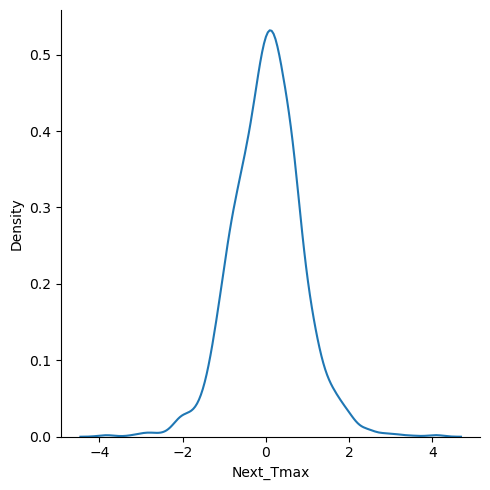

In [717]:
sns.displot(prediction-y_test,kind='kde')

The difference bw the predicted and actual values is just in the range of -4 to 4.

# Model-II (Feature selection with select Kbest method)

In [147]:
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     4.499858   
2013-06-30      2.0          31.9          21.6    52.263397     4.491419   
2013-06-30      3.0          31.6          23.3    48.690479     4.379060   
2013-06-30      4.0          32.0          23.4    58.239788     4.586534   
2013-06-30      5.0          31.4          21.9    56.174095     4.483978   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997     4.277426   
2017-08-30     22.0          22.5          17.4    30.094858     4.374125   
2017-08-30     23.0          23.3          17.1    26.741310     4.288483   
2017-08-30     24.0          23.3          17.7    24.040634     4.259746   
2017-08-30     25.0          23.2          17.4    22.933014     4.258805   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
Date                                                                            
2013-06-30         28.074101          2.844153  1.896289  4.110499   0.233947   
2013-06-30         29.850689          2.885901  1.785468  3.731014   0.225508   
2013-06-30         30.091292          2.906984  1.830969  2.740099   0.209344   
2013-06-30         29.704629          2.857247  1.781083  4.035663   0.216372   
2013-06-30         29.113934          2.863778  1.789965  4.761697   0.151407   
...                      ...               ...       ...       ...        ...   
2017-08-30         27.812697          2.635366  1.876086  2.126355   0.052902   
2017-08-30         26.704905          2.611685  1.793400  4.347071   0.066461   
2017-08-30         26.352081          2.657859  1.832031  4.161290   0.030034   
2017-08-30         27.010193          2.655868  1.870345  3.614996   0.035874   
2017-08-30         27.939516          2.645880  1.938926  2.086997   0.048954   

            ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  \
Date        ...                                                         
2013-06-30  ...         0.0         0.0         0.0  37.6046  126.991   
2013-06-30  ...         0.0         0.0         0.0  37.6046  127.032   
2013-06-30  ...         0.0         0.0         0.0  37.5776  127.058   
2013-06-30  ...         0.0         0.0         0.0  37.6450  127.022   
2013-06-30  ...         0.0         0.0         0.0  37.5507  127.135   
...         ...         ...         ...         ...      ...      ...   
2017-08-30  ...         0.0         0.0         0.0  37.5507  127.040   
2017-08-30  ...         0.0         0.0         0.0  37.5102  127.086   
2017-08-30  ...         0.0         0.0         0.0  37.5372  126.891   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.909   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.970   

                 DEM     Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                   
2013-06-30  5.965871  1.406938      5992.895996       29.1       21.2  
2013-06-30  3.550622  0.801092      5869.312500       30.5       22.5  
2013-06-30  3.217444  0.643203      5863.555664       31.1       23.9  
2013-06-30  3.575659  1.363477      5856.964844       31.7       24.3  
2013-06-30  3.272250  0.796600      5859.552246       31.2       22.5  
...              ...       ...              ...        ...        ...  
2017-08-30  2.973771  0.830151      4456.024414       27.6       17.7  
2017-08-30  2.800629  0.510703      4441.803711       28.0       17.1  
2017-08-30  2.498004  0.537630      4443.313965       28.3       18.1  
2017-08-30  2.586099  0.605778      4438.373535       28.6       18.8  
2017-08-30  2.695484  0.647366      4451.345215       27.8       17.4  

[6656 rows x 24 columns]

Imported the data frame from above after removing skewness and outliers.

# Feature scaling-

In [148]:
x=df.drop(columns=['Next_Tmax'],axis=1)
y=df.Next_Tmax

In [149]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.670375     -0.434446     -0.826764     0.206804     0.448938   
1    -1.531509      0.685896     -0.739572    -0.229632     0.377851   
2    -1.392643      0.580864      0.001559    -0.489859    -0.568691   
3    -1.253778      0.720907      0.045155     0.205646     1.179120   
4    -1.114912      0.510843     -0.608784     0.055196     0.315163   
...        ...           ...           ...          ...          ...   
6651  1.106942     -2.395046     -2.396218    -2.237959    -1.424880   
6652  1.245808     -2.605111     -2.570601    -1.844234    -0.610263   
6653  1.384674     -2.325025     -2.701389    -2.088483    -1.331734   
6654  1.523540     -2.325025     -2.439814    -2.285181    -1.573817   
6655  1.662405     -2.360036     -2.570601    -2.365853    -1.581747   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.681041         -0.268476  0.060502  0.377484  -0.433614  ...   
1            -0.029456          0.192821 -0.614997 -0.120902  -0.467334  ...   
2             0.058788          0.425779 -0.337653 -1.422295  -0.531919  ...   
3            -0.083025         -0.123787 -0.641730  0.279201  -0.503837  ...   
4            -0.299670         -0.051630 -0.587587  1.232718  -0.763406  ...   
...                ...               ...       ...       ...        ...  ...   
6651         -0.776914         -2.575474 -0.062646 -2.228340  -1.156982  ...   
6652         -1.183211         -2.837133 -0.566651  0.688180  -1.102808  ...   
6653         -1.312613         -2.326937 -0.331176  0.444190  -1.248352  ...   
6654         -1.071242         -2.348934 -0.097639 -0.273272  -1.225020  ...   
6655         -0.730402         -2.459293  0.320394 -2.280030  -1.172759  ...   

      LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat       lon  \
0      -0.535846   -0.485584   -0.460074   -0.400228  1.203695  0.004750   
1      -0.535846   -0.485584   -0.460074   -0.400228  1.203695  0.519348   
2      -0.535846   -0.485584   -0.460074   -0.400228  0.665976  0.845678   
3      -0.535846   -0.485584   -0.460074   -0.400228  2.008282  0.393836   
4      -0.535846   -0.485584   -0.460074   -0.400228  0.130249  1.812117   
...          ...         ...         ...         ...       ...       ...   
6651   -0.535846   -0.485584   -0.460074   -0.400228  0.130249  0.619757   
6652   -0.535846   -0.485584   -0.460074   -0.400228 -0.676329  1.197110   
6653   -0.535846   -0.485584   -0.460074   -0.400228 -0.138611 -1.250366   
6654   -0.535846   -0.485584   -0.460074   -0.400228 -0.407470 -1.024445   
6655   -0.535846   -0.485584   -0.460074   -0.400228 -0.407470 -0.258824   

           DEM     Slope  Solar radiation  Next_Tmin  
0     2.348270  1.283837         1.545416  -0.805890  
1    -0.139651 -0.417927         1.249738  -0.250198  
2    -0.482854 -0.861422         1.235965   0.348238  
3    -0.113861  1.161759         1.220196   0.519220  
4    -0.426399 -0.430545         1.226386  -0.250198  
...        ...       ...              ...        ...  
6651 -0.733858 -0.336302        -2.131604  -2.301981  
6652 -0.912210 -1.233603        -2.165627  -2.558454  
6653 -1.223941 -1.157966        -2.162014  -2.130999  
6654 -1.133194 -0.966547        -2.173834  -1.831781  
6655 -1.020519 -0.849729        -2.142799  -2.430217  

[6656 rows x 23 columns]

# Feature selection through select k-best method-

In [150]:
from sklearn.feature_selection import SelectKBest,f_classif

In [151]:
best_features=SelectKBest(score_func=f_classif,k=20) 

fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)   
df_columns=pd.DataFrame(x.columns) 



feature_score= pd.concat([df_scores,df_columns],axis=1)
feature_score.columns=['score','feature_name']  

print(feature_score.nlargest(10,'score'))

        score      feature_name
5   84.993924  LDAPS_Tmax_lapse
1   24.369350      Present_Tmax
22  23.894666         Next_Tmin
6   19.908326  LDAPS_Tmin_lapse
10  14.952222         LDAPS_CC2
9   13.027393         LDAPS_CC1
2   12.809535      Present_Tmin
3   11.934557       LDAPS_RHmin
11  10.497856         LDAPS_CC3
12   9.231359         LDAPS_CC4


As per the select Kbest features i have selected 10 best features having highest score.

In [152]:
#lets just saperate these 10 features in a new variable.

In [153]:
x=x[['LDAPS_Tmax_lapse','Present_Tmax','Next_Tmin','LDAPS_Tmin_lapse','LDAPS_CC2','LDAPS_CC1','Present_Tmin','LDAPS_RHmin','LDAPS_CC3','LDAPS_CC4']]
x

LDAPS_Tmax_lapse  Present_Tmax  Next_Tmin  LDAPS_Tmin_lapse  LDAPS_CC2  \
0            -0.681041     -0.434446  -0.805890         -0.268476  -0.517016   
1            -0.029456      0.685896  -0.250198          0.192821  -0.315578   
2             0.058788      0.580864   0.348238          0.425779  -0.291603   
3            -0.083025      0.720907   0.519220         -0.123787  -0.424001   
4            -0.299670      0.510843  -0.250198         -0.051630  -0.323051   
...                ...           ...        ...               ...        ...   
6651         -0.776914     -2.395046  -2.301981         -2.575474  -1.247977   
6652         -1.183211     -2.605111  -2.558454         -2.837133  -1.271752   
6653         -1.312613     -2.325025  -2.130999         -2.326937  -1.033956   
6654         -1.071242     -2.325025  -1.831781         -2.348934  -1.059507   
6655         -0.730402     -2.360036  -2.430217         -2.459293  -1.123015   

      LDAPS_CC1  Present_Tmin  LDAPS_RHmin  LDAPS_CC3  LDAPS_CC4  
0     -0.433614     -0.826764     0.206804  -0.237211  -0.286030  
1     -0.467334     -0.739572    -0.229632  -0.249121  -0.304487  
2     -0.531919      0.001559    -0.489859  -0.031200  -0.223739  
3     -0.503837      0.045155     0.205646  -0.240053  -0.267199  
4     -0.763406     -0.608784     0.055196  -0.149757  -0.081628  
...         ...           ...          ...        ...        ...  
6651  -1.156982     -2.396218    -2.237959  -2.789801  -1.808524  
6652  -1.102808     -2.570601    -1.844234  -2.750615  -1.379929  
6653  -1.248352     -2.701389    -2.088483  -2.789801  -2.532308  
6654  -1.225020     -2.439814    -2.285181  -2.789801  -2.532308  
6655  -1.172759     -2.570601    -2.365853  -2.789801  -2.122307  

[6656 rows x 10 columns]

# Checking for multicollinearity among features-

In [154]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

VIF Values          Features
0    5.638453  LDAPS_Tmax_lapse
1    2.264396      Present_Tmax
2    5.029060         Next_Tmin
3    6.978573  LDAPS_Tmin_lapse
4    3.934303         LDAPS_CC2
5    2.634457         LDAPS_CC1
6    3.116422      Present_Tmin
7    3.715669       LDAPS_RHmin
8    3.273390         LDAPS_CC3
9    2.258310         LDAPS_CC4

Here we can see that there is no multicollinearity present among features as VIF score is under acceptable range which is less than 10. so now we can move for model building.

# Model building

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [156]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i) #x&ywe are giving we got after resampling
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.7790872222476964 at random state 124


Here we are getting 78% accuracy which is the best accuracy at random state-124.

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxrs)

Splitted the data on the same random state.

# Linear regression-

In [158]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
pred_train=lr.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predlr))
print('r2_score on train data -', r2_score(y_train,pred_train))   
print('mean absolute error- ',mean_absolute_error(y_test,predlr))
print('mean squared error- ',mean_squared_error(y_test,predlr))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predlr)))

r2_score on test data - 0.7790872222476964
r2_score on train data - 0.751752175449834
mean absolute error-  1.0802320870610054
mean squared error-  1.9477228857697997
root mean squared error-  1.395608428524921


For linear regression we are getting train accuracy-75% & test accuracy-78% which looks like an underfitted model.

In [159]:
#Cross validation score for linear regression-

In [160]:
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predlr)-score.mean())*100)

[0.67983502 0.72303134 0.69606982 0.72509518 0.70738786]
0.7062838445315669
difference bw r2_score and cross validation score is - 7.280337771612954


The cross validation score for linear regression is 70%.

# Random Forest Regressor

In [161]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
pred_train=rf.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predrf))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predrf))
print('mean squared error- ',mean_squared_error(y_test,predrf))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predrf)))

r2_score on test data - 0.8865521001888674
r2_score on train data - 0.9813313356947435
mean absolute error-  0.7582278417626437
mean squared error-  1.000236713570355
root mean squared error-  1.000118349781842


For Random forest regressor we are getting train accuracy-98% & test accuracy-89% which looks like an Overfitted model

In [162]:
#Cross validation score for RandomForestRegressor-

In [163]:
score1=cross_val_score(rf,x,y)
print(score1)
print(score1.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predrf)-score1.mean())*100)

[0.70622477 0.67444639 0.64423942 0.68676067 0.63982435]
0.6702991178880512
difference bw r2_score and cross validation score is - 21.625298230081626


The cross validation score for Random forest regressor is 67%.

In [164]:
#KNN-

In [165]:
kn=KNN()
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
pred_train=kn.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,predkn))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predkn))
print('mean squared error- ',mean_squared_error(y_test,predkn))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predkn)))

r2_score on test data - 0.9105246598739999
r2_score on train data - 0.9393912508560939
mean absolute error-  0.6426239359038558
mean squared error-  0.7888777165748622
root mean squared error-  0.8881878836005714


For KNN we are getting train accuracy-94% & test accuracy-91% which looks like a good generalised model.

In [166]:
#Cross validation score for KNN-

In [167]:
score2=cross_val_score(kn,x,y)
print(score2)
print(score2.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predkn)-score2.mean())*100)

[0.63756582 0.49009006 0.44841657 0.59126413 0.55113145]
0.5436936075269667
difference bw r2_score and cross validation score is - 36.68310523470332


The cross validation score for KNN Model is 54%.

# Gradient boosting regressor-

In [168]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
pred_train=gb.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predgb))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predgb))
print('mean squared error- ',mean_squared_error(y_test,predgb))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predgb)))

r2_score on test data - 0.8286805359543042
r2_score on train data - 0.8426212304126532
mean absolute error-  0.9469501407949796
mean squared error-  1.510473247834296
root mean squared error-  1.2290131194719998


For Gradient boosting regressor we are getting train accuracy-84% & test accuracy-83% which looks like an good model having train and test accuracy very close.

In [169]:
#Cross validation score for gradient bossting regressor-

In [170]:
score3=cross_val_score(gb,x,y)
print(score3)
print(score3.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predgb)-score3.mean())*100)

[0.71829002 0.69512365 0.69923594 0.71458334 0.65975148]
0.6973968857759698
difference bw r2_score and cross validation score is - 13.128365017833444


The cross validation score for Gradeint boosting regressor is 70%.

# Lasso-

In [171]:
lasso=Lasso()
lasso.fit(x_train,y_train)
predla=lasso.predict(x_test)
pred_train=lasso.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predla))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predla))
print('mean squared error- ',mean_squared_error(y_test,predla))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predla)))

r2_score on test data - 0.5437740940332629
r2_score on train data - 0.5368872907957742
mean absolute error-  1.612014274379149
mean squared error-  4.022409419562008
root mean squared error-  2.005594530198467


For lasso regularization model we are getting train accuracy-54% & test accuracy-54% which looks like an underfitted model

In [172]:
#Cross validation score for lasso-

In [173]:
score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print('difference bw r2_score and cross validation score is- ',(r2_score(y_test,predla)-score4.mean())*100)

[0.4801784  0.47124328 0.57112405 0.40872244 0.51832973]
0.4899195834819917
difference bw r2_score and cross validation score is-  5.385451055127122


The cross validation score for lasso is 49%.

# Ridge-

In [174]:
rd=Ridge()
rd.fit(x_train,y_train)
predri=rd.predict(x_test)
pred_train=rd.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predri))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predri))
print('mean squared error- ',mean_squared_error(y_test,predri))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predri)))

r2_score on test data - 0.7790889039224694
r2_score on train data - 0.7517519876434815
mean absolute error-  1.0802342468175987
mean squared error-  1.9477080589387072
root mean squared error-  1.395603116555243


For Ridge regularization model we are getting train accuracy-75% & test accuracy-78% which looks like an underfitted model

In [175]:
#Cross validation score for ridge model-

In [176]:
score5=cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predri)-score5.mean())*100)

[0.67998319 0.72301819 0.69603676 0.72514112 0.70737167]
0.7063101857852894
difference bw r2_score and cross validation score is - 7.277871813718006


The cross validation score for Ridge is 71%.

In [177]:
#Decision tree-

In [178]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
pred_train=dt.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,preddt))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,preddt))
print('mean squared error- ',mean_squared_error(y_test,preddt))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,preddt)))

r2_score on test data - 0.757537370293544
r2_score on train data - 1.0
mean absolute error-  1.0650475713570355
mean squared error-  2.1377215823735596
root mean squared error-  1.4620949293303631


For Decision tree regressor model we are getting train accuracy-100% & test accuracy-75% which looks like an overfitted model having train accuracy 100%.

In [179]:
#Cross validation score for decision tree-

In [180]:
score6=cross_val_score(dt,x,y)
print(score6)
print(score6.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,preddt)-score6.mean())*100)

[0.42362631 0.43746288 0.37329328 0.52728043 0.37686379]
0.427705338255984
difference bw r2_score and cross validation score is - 32.983203203756


The cross validation score for Decision tree regressor is 44%.

In [181]:
#SVR-

In [182]:
svr=SVR()
svr.fit(x_train,y_train)
predsv=svr.predict(x_test)
pred_train=svr.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predsv))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predsv))
print('mean squared error- ',mean_squared_error(y_test,predsv))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predsv)))

r2_score on test data - 0.8473713376476399
r2_score on train data - 0.8402678550049801
mean absolute error-  0.8557143066195693
mean squared error-  1.3456819551716643
root mean squared error-  1.16003532496716


For SVR model we are getting train accuracy-84% & test accuracy-85% which looks like an good model having train and test accuracy very close.

In [183]:
#Cross validation score for SVR-

In [184]:
score7=cross_val_score(svr,x,y)
print(score7)
print(score7.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predsv)-score7.mean())*100)

[0.70593685 0.63443919 0.68160733 0.72957923 0.65215385]
0.6807432906306863
difference bw r2_score and cross validation score is - 16.662804701695364


For SVR model The cross validation score is 68%.

In [188]:
#Extra Tree Regressor-

In [189]:
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
predet=et.predict(x_test)
pred_train=et.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predet))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predet))
print('mean squared error- ',mean_squared_error(y_test,predet))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predet)))

r2_score on test data - 0.9022837831425754
r2_score on train data - 0.9999999995360818
mean absolute error-  0.7008247371056583
mean squared error-  0.8615350991487223
root mean squared error-  0.9281891505230614


For Extra tree regressor we are getting train accuracy-100% & test accuracy-90% which looks like an Overfitted model as train accuracy is almost 100% which is not good.

In [190]:
#Cross validation score for extra tree regressor-

In [191]:
score8=cross_val_score(et,x,y)
print(score8)
print(score8.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predet)-score8.mean())*100)

[0.70069646 0.67918589 0.65477846 0.72011841 0.64675337]
0.6803065181051862
difference bw r2_score and cross validation score is - 22.197726503738924


The cross validation score for Extra tree regressor is 69%.

Here i am selecting Gradient boosting as the best model which is giving us train accuracy-84% & test accuracy-82% and cross validation score of 70% which is best among all model as in gradient boosting regressor model there is less difference bw test accuracy & cross validation score.

# Hyper-Parameter-tunning of SVR model-

In [196]:
from sklearn.model_selection import GridSearchCV

In [197]:
param_grid={'loss':['squared_error', 'absolute_error'],'criterion' : ['friedman_mse', 'squared_error'],'random_state':[10,20,40],'max_depth':[3,5],
            'n_estimators':[100,200,400],'min_samples_leaf':[2,3]}

In [198]:
gb.get_params().keys() 

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [199]:
gs=GridSearchCV(GradientBoostingRegressor(),param_grid,cv=5)  
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5], 'min_samples_leaf': [2, 3],
                         'n_estimators': [100, 200, 400],
                         'random_state': [10, 20, 40]})

In [200]:
gs.best_params_

{'criterion': 'friedman_mse',
 'loss': 'squared_error',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'n_estimators': 400,
 'random_state': 10}

In [210]:
final_model=GradientBoostingRegressor(criterion='friedman_mse',max_depth=7,loss='squared_error',n_estimators=400,random_state=10,min_samples_leaf= 3)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)

In [211]:
r2_score(y_test,pred)

0.8957135153415906

The accuracy of the model is increased to almost 90% which is really good.

# Saving the model-

In [212]:
import joblib
joblib.dump(final_model,'Tempreture forecasting-2')

['Tempreture forecasting-2']

In [213]:
model=joblib.load('Tempreture forecasting-2')

In [214]:
#Making the prediction-

In [215]:
prediction=model.predict(x_test)
prediction

array([34.46206416, 30.67161889, 30.26261523, ..., 34.77015084,
       30.81797218, 23.53993261])

In [216]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

predicted  original
0     34.462064      35.3
1     30.671619      29.9
2     30.262615      28.4
3     29.043733      29.4
4     29.480159      28.6
...         ...       ...
1992  27.002770      27.5
1993  28.712174      28.8
1994  34.770151      33.2
1995  30.817972      33.8
1996  23.539933      24.0

[1997 rows x 2 columns]

# Plotting the difference bw the prediction & actual values to understand the difference better-

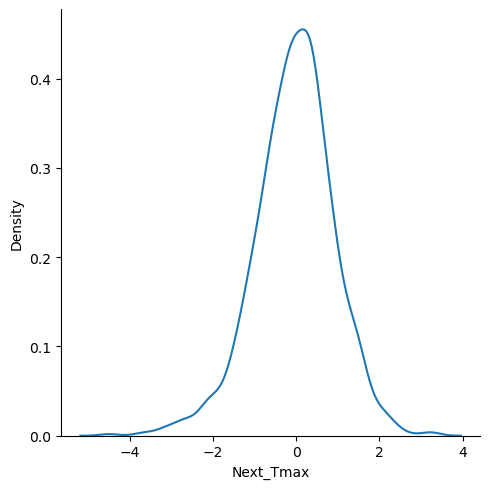

In [217]:
sns.displot(prediction-y_test,kind='kde')

The difference bw the predicted values and the actual values are just under -4 to 4 only.

# Model-III (Feature selection with Principle Component Analysis)¶

In [81]:
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     4.499858   
2013-06-30      2.0          31.9          21.6    52.263397     4.491419   
2013-06-30      3.0          31.6          23.3    48.690479     4.379060   
2013-06-30      4.0          32.0          23.4    58.239788     4.586534   
2013-06-30      5.0          31.4          21.9    56.174095     4.483978   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997     4.277426   
2017-08-30     22.0          22.5          17.4    30.094858     4.374125   
2017-08-30     23.0          23.3          17.1    26.741310     4.288483   
2017-08-30     24.0          23.3          17.7    24.040634     4.259746   
2017-08-30     25.0          23.2          17.4    22.933014     4.258805   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
Date                                                                            
2013-06-30         28.074101          2.844153  1.896289  4.110499   0.233947   
2013-06-30         29.850689          2.885901  1.785468  3.731014   0.225508   
2013-06-30         30.091292          2.906984  1.830969  2.740099   0.209344   
2013-06-30         29.704629          2.857247  1.781083  4.035663   0.216372   
2013-06-30         29.113934          2.863778  1.789965  4.761697   0.151407   
...                      ...               ...       ...       ...        ...   
2017-08-30         27.812697          2.635366  1.876086  2.126355   0.052902   
2017-08-30         26.704905          2.611685  1.793400  4.347071   0.066461   
2017-08-30         26.352081          2.657859  1.832031  4.161290   0.030034   
2017-08-30         27.010193          2.655868  1.870345  3.614996   0.035874   
2017-08-30         27.939516          2.645880  1.938926  2.086997   0.048954   

            ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  \
Date        ...                                                         
2013-06-30  ...         0.0         0.0         0.0  37.6046  126.991   
2013-06-30  ...         0.0         0.0         0.0  37.6046  127.032   
2013-06-30  ...         0.0         0.0         0.0  37.5776  127.058   
2013-06-30  ...         0.0         0.0         0.0  37.6450  127.022   
2013-06-30  ...         0.0         0.0         0.0  37.5507  127.135   
...         ...         ...         ...         ...      ...      ...   
2017-08-30  ...         0.0         0.0         0.0  37.5507  127.040   
2017-08-30  ...         0.0         0.0         0.0  37.5102  127.086   
2017-08-30  ...         0.0         0.0         0.0  37.5372  126.891   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.909   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.970   

                 DEM     Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                   
2013-06-30  5.965871  1.406938      5992.895996       29.1       21.2  
2013-06-30  3.550622  0.801092      5869.312500       30.5       22.5  
2013-06-30  3.217444  0.643203      5863.555664       31.1       23.9  
2013-06-30  3.575659  1.363477      5856.964844       31.7       24.3  
2013-06-30  3.272250  0.796600      5859.552246       31.2       22.5  
...              ...       ...              ...        ...        ...  
2017-08-30  2.973771  0.830151      4456.024414       27.6       17.7  
2017-08-30  2.800629  0.510703      4441.803711       28.0       17.1  
2017-08-30  2.498004  0.537630      4443.313965       28.3       18.1  
2017-08-30  2.586099  0.605778      4438.373535       28.6       18.8  
2017-08-30  2.695484  0.647366      4451.345215       27.8       17.4  

[7588 rows x 24 columns]

Imported the data frame from above after removing skewness and outliers.

# Feature scaling-

In [82]:
x=df.drop(columns=['Next_Tmax'],axis=1)
y=df.Next_Tmax

In [83]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.664607     -0.353318     -0.748029     0.104660     0.396101   
1    -1.526052      0.725138     -0.664721    -0.305052     0.328258   
2    -1.387498      0.624033      0.043400    -0.549344    -0.575076   
3    -1.248943      0.758840      0.085054     0.103573     1.092951   
4    -1.110389      0.556630     -0.539758    -0.037665     0.268432   
...        ...           ...           ...          ...          ...   
7583  1.106481     -2.240616     -2.247578    -2.190405    -1.392182   
7584  1.245036     -2.442826     -2.414195    -1.820788    -0.614750   
7585  1.383590     -2.173212     -2.539157    -2.050081    -1.303288   
7586  1.522145     -2.173212     -2.289232    -2.234735    -1.534320   
7587  1.660699     -2.206914     -2.414195    -2.310467    -1.541888   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.525269         -0.177385 -0.042360  0.374098  -0.513123  ...   
1             0.078334          0.249540 -0.654843 -0.128111  -0.545304  ...   
2             0.160080          0.465140 -0.403372 -1.439484  -0.606944  ...   
3             0.028710         -0.043476 -0.679081  0.275061  -0.580143  ...   
4            -0.171981          0.023303 -0.629990  1.235891  -0.827872  ...   
...                ...               ...       ...       ...        ...  ...   
7583         -0.614083         -2.312484 -0.154019 -2.251709  -1.203497  ...   
7584         -0.990460         -2.554646 -0.611006  0.687177  -1.151793  ...   
7585         -1.110333         -2.082465 -0.397499  0.441315  -1.290699  ...   
7586         -0.886737         -2.102824 -0.185749 -0.281649  -1.268430  ...   
7587         -0.570995         -2.204959  0.193287 -2.303796  -1.218554  ...   

      LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat       lon  \
0      -0.559482   -0.509339   -0.483908   -0.430019  1.186076 -0.005302   
1      -0.559482   -0.509339   -0.483908   -0.430019  1.186076  0.512280   
2      -0.559482   -0.509339   -0.483908   -0.430019  0.650626  0.840503   
3      -0.559482   -0.509339   -0.483908   -0.430019  1.987268  0.386040   
4      -0.559482   -0.509339   -0.483908   -0.430019  0.117159  1.812547   
...          ...         ...         ...         ...       ...       ...   
7583   -0.559482   -0.509339   -0.483908   -0.430019  0.117159  0.613271   
7584   -0.559482   -0.509339   -0.483908   -0.430019 -0.686016  1.193973   
7585   -0.559482   -0.509339   -0.483908   -0.430019 -0.150566 -1.267697   
7586   -0.559482   -0.509339   -0.483908   -0.430019 -0.418291 -1.040466   
7587   -0.559482   -0.509339   -0.483908   -0.430019 -0.418291 -0.270405   

           DEM     Slope  Solar radiation  Next_Tmin  
0     2.325747  1.268627         1.510565  -0.689265  
1    -0.149387 -0.424853         1.222997  -0.165513  
2    -0.490827 -0.866189         1.209602   0.398527  
3    -0.123730  1.147143         1.194265   0.559681  
4    -0.434662 -0.437410         1.200286  -0.165513  
...        ...       ...              ...        ...  
7583 -0.740541 -0.343626        -2.065599  -2.099366  
7584 -0.917976 -1.236560        -2.098689  -2.341098  
7585 -1.228105 -1.161291        -2.095175  -1.938212  
7586 -1.137825 -0.970803        -2.106671  -1.656192  
7587 -1.025728 -0.854554        -2.076487  -2.220232  

[7588 rows x 23 columns]

Here we have scaled all the features for model building.

# Applying principle component analysis for the selection of the features-

In [84]:
from sklearn.decomposition import PCA 

In [85]:
pca=PCA()
pca.fit_transform(x)

array([[-0.09533958,  2.2226157 , -2.66146574, ..., -0.08397831,
        -0.15369144, -0.35421322],
       [-1.09275445,  0.46290325, -0.87210093, ...,  0.02014095,
        -0.12191043, -0.30354121],
       [-1.4556396 , -0.49962465,  0.05504967, ..., -0.27444219,
        -0.19133645, -0.29383832],
       ...,
       [-2.71679219,  4.83383742,  3.07966912, ..., -0.40066833,
         0.35263919, -0.51107866],
       [-2.89654406,  4.55023012,  3.17491491, ..., -0.54652362,
         0.28741887, -0.3620693 ],
       [-2.7054577 ,  4.70693018,  3.6137238 , ..., -0.11925297,
         0.27488092, -0.11481522]])

In [86]:
#Lets plot the figure to see how much components required to cover all the variance.

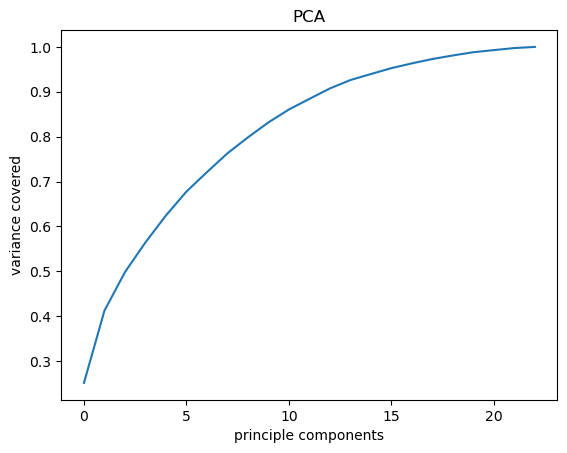

In [87]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))   
plt.xlabel('principle components') 
plt.ylabel('variance covered')   
plt.title('PCA')
plt.show()

from the above plot we can clearly see that 18 features will be enough to cover the maximum variance so we will extract 18 principle components for model building.

In [88]:
pca=PCA(n_components=18)
new_components=pca.fit_transform(x)

In [89]:
princi_comp=pd.DataFrame(new_components,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18'])
princi_comp

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -0.095340  2.222616 -2.661466  0.711015  0.476067  0.874706 -0.969633   
1    -1.092754  0.462903 -0.872101  0.209838 -1.257499  1.306180 -0.798587   
2    -1.455640 -0.499625  0.055050  0.448625 -0.666861  2.110367 -0.192323   
3    -0.824248  0.257971 -2.235756  0.483632 -1.247710  0.874730 -0.969423   
4    -1.006721  0.561962 -0.809762  0.293265 -1.676572  0.680365 -0.539244   
...        ...       ...       ...       ...       ...       ...       ...   
7583 -2.556323  4.917839  2.793223 -1.641465  0.149506  1.187525  2.186418   
7584 -2.157891  5.258363  2.673724 -2.183588 -1.285676 -0.466922  1.332827   
7585 -2.716792  4.833837  3.079669 -2.828738 -0.407960 -1.225122  0.880796   
7586 -2.896544  4.550230  3.174915 -2.637651  0.110047 -0.842466  1.335510   
7587 -2.705458  4.706930  3.613724 -2.196414  0.697411  0.610798  2.224339   

           PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0    -1.248933  0.342248 -0.007831  0.240951 -0.295019  0.336918  0.056951   
1    -1.175445  0.418868 -0.198044  0.217469 -0.098148  0.504333 -0.160082   
2    -0.954566  0.867450 -0.475543  0.332048  0.312165  0.415874 -0.134014   
3    -0.932879  0.017860  0.907440  0.394694 -0.351031  0.105876 -0.284060   
4    -1.071529 -0.793530 -0.671144 -0.865209  0.920389  0.957639 -0.012458   
...        ...       ...       ...       ...       ...       ...       ...   
7583  1.509464  0.499506  0.381185  1.453540  0.253426 -0.257555 -0.648930   
7584  1.170802 -0.910191 -0.192306  0.082570  0.975174  0.191103 -0.373332   
7585  0.788557  0.385548  0.613226  0.997410 -0.266459  0.411837 -0.250947   
7586  0.990516  0.467077  0.505006  1.154716 -0.086941  0.267709 -0.298398   
7587  1.252379  0.658281  0.480829  1.612526  0.220878 -0.138702 -0.618242   

          PC15      PC16      PC17      PC18  
0     0.262750 -0.061941  0.034754 -0.231055  
1     0.567000  0.441484  0.554622  0.093167  
2     0.655163  0.576841  0.000193  0.019637  
3     0.592965  0.473027 -0.221436  0.402535  
4     0.306562  0.384397  0.086285 -0.267280  
...        ...       ...       ...       ...  
7583 -0.199769  0.146541 -0.417462 -0.258583  
7584 -0.747147 -0.250520 -0.376038 -0.512513  
7585 -0.278398 -0.859754  0.012897 -0.775657  
7586 -0.268502 -0.739571 -0.155067 -0.633823  
7587 -0.193966  0.063371 -0.022594 -0.261851  

[7588 rows x 18 columns]

# Model building-

In [90]:
#Importing the library-

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [108]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.30,random_state=i) #x&ywe are giving we got after resampling
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.796089671639076 at random state 43


Here we can see that we are getting 78% accuracy at random state-124.

In [109]:
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.30,random_state=maxrs)

splitted the data on the same random state.

# Linear regression-

In [110]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
pred_train=lr.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predlr))
print('r2_score on train data -', r2_score(y_train,pred_train))   
print('mean absolute error- ',mean_absolute_error(y_test,predlr))
print('mean squared error- ',mean_squared_error(y_test,predlr))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predlr)))

r2_score on test data - 0.796089671639076
r2_score on train data - 0.7630396336960225
mean absolute error-  1.1041946875545223
mean squared error-  2.050929779742036
root mean squared error-  1.4321067626898616


for linear regression we are getting train accuracy-75% & test accuracy-78%.

In [111]:
#Cross validation score-

In [112]:
score=cross_val_score(lr,princi_comp,y)
print(score)
print(score.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predlr)-score.mean())*100)

[0.71078587 0.63836328 0.66851309 0.83784083 0.7216648 ]
0.7154335738295409
difference bw r2_score and cross validation score is - 8.065609780953508


The cross validation score for linear regression is 70%.

# Random forest-

In [113]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
pred_train=rf.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predrf))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predrf))
print('mean squared error- ',mean_squared_error(y_test,predrf))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predrf)))

r2_score on test data - 0.8605350200395369
r2_score on train data - 0.9784034638367656
mean absolute error-  0.9091216512955647
mean squared error-  1.4027385612648224
root mean squared error-  1.1843726445949443


for Random forest regressor we are getting train accuracy-97% & test accuracy-84% which looks like an overfitted model with low bias & high variance.

In [114]:
#Cross validation score-

In [115]:
score1=cross_val_score(rf,princi_comp,y)
print(score1)
print(score1.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predrf)-score1.mean())*100)

[0.65526361 0.5296842  0.57263994 0.78323872 0.66745383]
0.6416560585277133
difference bw r2_score and cross validation score is - 21.88789615118235


The cross validation score for random forest regressor is 63%.

# KNN-

In [116]:
kn=KNN()
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
pred_train=kn.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,predkn))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predkn))
print('mean squared error- ',mean_squared_error(y_test,predkn))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predkn)))

r2_score on test data - 0.8547293640940099
r2_score on train data - 0.8935957836041709
mean absolute error-  0.9117698726394378
mean squared error-  1.4611318401405358
root mean squared error-  1.208772865405464


for KNN we are getting train accuracy-89% & test accuracy-83%.

In [117]:
#Cross validation score-

In [118]:
score2=cross_val_score(kn,princi_comp,y)
print(score2)
print(score2.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predkn)-score2.mean())*100)

[0.64517107 0.4858676  0.50137177 0.70922102 0.64926562]
0.5981794161600524
difference bw r2_score and cross validation score is - 25.654994793395748


The cross validation score for KNN is 57%.

# GradientBoostingRegressor-

In [119]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
pred_train=gb.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predgb))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predgb))
print('mean squared error- ',mean_squared_error(y_test,predgb))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predgb)))

r2_score on test data - 0.8186708145915007
r2_score on train data - 0.8456977323209619
mean absolute error-  1.0526145054703284
mean squared error-  1.8238086774712061
root mean squared error-  1.350484608379972


for Gradient boosting regressor we are getting train accuracy-83% & test accuracy-80% which looks like a good model.

In [120]:
#Cross validation score-

In [121]:
score3=cross_val_score(gb,princi_comp,y)
print(score3)
print(score3.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predgb)-score3.mean())*100)

[0.6767304  0.60969951 0.63382146 0.8119816  0.70749652]
0.6879458966160845
difference bw r2_score and cross validation score is - 13.07249179754162


The cross validation score for Gradient boosting regressor is 68%.

# Lasso-

In [122]:
lasso=Lasso()
lasso.fit(x_train,y_train)
predla=lasso.predict(x_test)
pred_train=lasso.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predla))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predla))
print('mean squared error- ',mean_squared_error(y_test,predla))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predla)))

r2_score on test data - 0.6433715856472988
r2_score on train data - 0.6175013973463882
mean absolute error-  1.504199200808096
mean squared error-  3.586968061782108
root mean squared error-  1.8939292652530897


for lasso we are getting train accuracy-59% & test accuracy-60% which looks like an underfitted model.

In [123]:
#Cross validation score-

In [124]:
score4=cross_val_score(lasso,princi_comp,y)
print(score4)
print(score4.mean())
print('difference bw r2_score and cross validation score is- ',(r2_score(y_test,predla)-score4.mean())*100)

[0.6913062  0.49127568 0.51016272 0.62350717 0.59668888]
0.5825881309002161
difference bw r2_score and cross validation score is-  6.078345474708269


The cross validation score for lasso is 55%.

# Ridge-

In [125]:
rd=Ridge()
rd.fit(x_train,y_train)
predri=rd.predict(x_test)
pred_train=rd.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predri))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predri))
print('mean squared error- ',mean_squared_error(y_test,predri))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predri)))

r2_score on test data - 0.796086444747618
r2_score on train data - 0.7630396210560066
mean absolute error-  1.1042013728818405
mean squared error-  2.0509622358115256
root mean squared error-  1.4321180942267036


for Ridge we are getting train accuracy-75% & test accuracy-78% which looks like an underfitted model.

In [126]:
#Cross validation score-

In [127]:
score5=cross_val_score(rd,princi_comp,y)
print(score5)
print(score5.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predri)-score5.mean())*100)

[0.71081    0.63835759 0.66851886 0.83785346 0.72166502]
0.7154409867742619
difference bw r2_score and cross validation score is - 8.06454579733561


The cross validation score for Ridge is 70%.

# DecisionTreeRegressor-

In [128]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
pred_train=dt.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,preddt))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,preddt))
print('mean squared error- ',mean_squared_error(y_test,preddt))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,preddt)))

r2_score on test data - 0.6656113413053384
r2_score on train data - 1.0
mean absolute error-  1.330127360562143
mean squared error-  3.363280632411067
root mean squared error-  1.8339249255111474


for Decision tree regressor we are getting train accuracy-100% & test accuracy-64% which is an overfitted model.

In [129]:
#Cross validation score-

In [130]:
score6=cross_val_score(dt,princi_comp,y)
print(score6)
print(score6.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,preddt)-score6.mean())*100)

[0.13807444 0.26287071 0.28445837 0.6373366  0.36449906]
0.3374478337821524
difference bw r2_score and cross validation score is - 32.8163507523186


The cross validation score for Decision tree regressor is 33%.

In [131]:
from sklearn.svm import SVR

In [132]:
#SVR

In [133]:
svr=SVR()
svr.fit(x_train,y_train)
predsv=svr.predict(x_test)
pred_train=svr.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predsv))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predsv))
print('mean squared error- ',mean_squared_error(y_test,predsv))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predsv)))

r2_score on test data - 0.8809565880903165
r2_score on train data - 0.8824851718451705
mean absolute error-  0.8073041490404632
mean squared error-  1.1973384601466546
root mean squared error-  1.0942296194796843


for SVR we are getting train accuracy-87% & test accuracy-86% which also looks like a good generalised model.

In [134]:
#Cross validation score-

In [135]:
score7=cross_val_score(svr,princi_comp,y)
print(score7)
print(score7.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predsv)-score7.mean())*100)

[0.69696862 0.60637939 0.67200909 0.8041035  0.72240629]
0.7003733772395278
difference bw r2_score and cross validation score is - 18.058321085078877


The cross validation score for support vector regressor is 67%.

In [136]:
#Extra tree regressor-

In [137]:
from sklearn.ensemble import ExtraTreesRegressor

In [138]:
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
predet=et.predict(x_test)
pred_train=et.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predet))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predet))
print('mean squared error- ',mean_squared_error(y_test,predet))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predet)))

r2_score on test data - 0.8781402276897978
r2_score on train data - 1.0
mean absolute error-  0.8425331576635926
mean squared error-  1.2256654088713224
root mean squared error-  1.1070977413360223


for Extra tree regressor we are getting train accuracy-100% & test accuracy-86% which is an overfitted model as train accuracy reaching 100%.

In [139]:
#Cross validation score-

In [140]:
score8=cross_val_score(et,princi_comp,y)
print(score8)
print(score8.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predet)-score8.mean())*100)

[0.69884524 0.54132417 0.58745613 0.78075922 0.68035551]
0.6577480558321485
difference bw r2_score and cross validation score is - 22.039217185764937


The cross validation score for extra tree regressor is 65%.

Here i am selecting Gradient boosting regressor as my best model from the above performances as it is giving train accuracy of 83% & test accuracy of 80% with cross validaion score of 68%.so we will hypertune this model.

# Hyperparameter Tunning-

In [141]:
from sklearn.model_selection import GridSearchCV

In [142]:
param_grid={'loss':['squared_error', 'absolute_error'],'criterion' : ['friedman_mse', 'squared_error'],'random_state':[10,20,40],'max_depth':[3,5],
            'n_estimators':[100,200,400],'min_samples_leaf':[2,3]}

In [143]:
svr.get_params().keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [144]:
gs=GridSearchCV(GradientBoostingRegressor(),param_grid,cv=5)  
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5], 'min_samples_leaf': [2, 3],
                         'n_estimators': [100, 200, 400],
                         'random_state': [10, 20, 40]})

In [147]:
gs.best_params_

{'criterion': 'friedman_mse',
 'loss': 'squared_error',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'n_estimators': 400,
 'random_state': 40}

In [150]:
final_model=GradientBoostingRegressor(criterion='friedman_mse',max_depth=7,loss='squared_error',n_estimators=400,random_state=40,min_samples_leaf=5)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)

In [151]:
r2_score(y_test,pred)

0.8784577652460459

The accuracy of gradient boosting regressor is increased to 88% from 80% with the help of grid search cross validation by hypertunning the parameter.

# Saving the model-

In [152]:
import joblib
joblib.dump(final_model,'Tempreture forecasting-3')

['Tempreture forecasting-3']

In [153]:
model=joblib.load('Tempreture forecasting-3')

In [154]:
#prediction-

In [155]:
prediction=model.predict(x_test)
prediction

array([29.2884439 , 31.02975538, 33.76116112, ..., 31.7030427 ,
       33.38523825, 30.39624228])

In [156]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

predicted  original
0     29.288444      28.2
1     31.029755      29.7
2     33.761161      34.2
3     29.419909      29.2
4     31.549441      32.1
...         ...       ...
2272  26.904100      26.1
2273  27.995733      28.8
2274  31.703043      30.0
2275  33.385238      32.0
2276  30.396242      29.1

[2277 rows x 2 columns]

# Plotting the difference bw the prediction & actual values to understand the difference better-

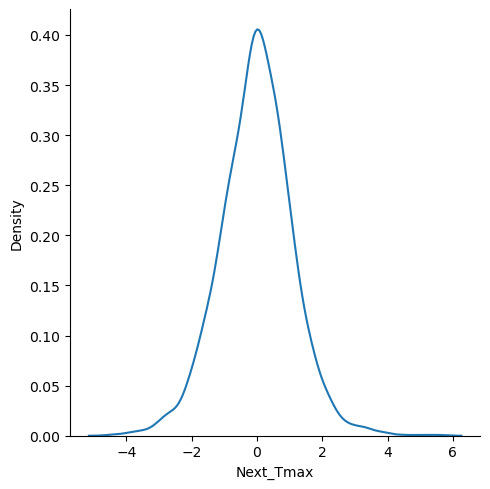

In [157]:
sns.displot(prediction-y_test,kind='kde')

Here we can see that variance in the actual & predicted values is just from -5 to 6 only.

# Coclusion- 

Here i saved 3 models for the prediction of Next day maximum tempreture on this data set-

Model-I having accuracy of 92% with Gradient boosting regression model.        
Model-II having accuracy of 90% with Gradient boosting regression model.       
Model-III having accuracy of 88% with Gradient boosting regression model.

# Part-II ( Predicting next day minimum tempreture-)

In [390]:
#From above Importing data frame after removal of nan values, skewness & outliers-

In [391]:
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     4.499858   
2013-06-30      2.0          31.9          21.6    52.263397     4.491419   
2013-06-30      3.0          31.6          23.3    48.690479     4.379060   
2013-06-30      4.0          32.0          23.4    58.239788     4.586534   
2013-06-30      5.0          31.4          21.9    56.174095     4.483978   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997     4.277426   
2017-08-30     22.0          22.5          17.4    30.094858     4.374125   
2017-08-30     23.0          23.3          17.1    26.741310     4.288483   
2017-08-30     24.0          23.3          17.7    24.040634     4.259746   
2017-08-30     25.0          23.2          17.4    22.933014     4.258805   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
Date                                                                            
2013-06-30         28.074101          2.844153  1.896289  4.110499   0.233947   
2013-06-30         29.850689          2.885901  1.785468  3.731014   0.225508   
2013-06-30         30.091292          2.906984  1.830969  2.740099   0.209344   
2013-06-30         29.704629          2.857247  1.781083  4.035663   0.216372   
2013-06-30         29.113934          2.863778  1.789965  4.761697   0.151407   
...                      ...               ...       ...       ...        ...   
2017-08-30         27.812697          2.635366  1.876086  2.126355   0.052902   
2017-08-30         26.704905          2.611685  1.793400  4.347071   0.066461   
2017-08-30         26.352081          2.657859  1.832031  4.161290   0.030034   
2017-08-30         27.010193          2.655868  1.870345  3.614996   0.035874   
2017-08-30         27.939516          2.645880  1.938926  2.086997   0.048954   

            ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  \
Date        ...                                                         
2013-06-30  ...         0.0         0.0         0.0  37.6046  126.991   
2013-06-30  ...         0.0         0.0         0.0  37.6046  127.032   
2013-06-30  ...         0.0         0.0         0.0  37.5776  127.058   
2013-06-30  ...         0.0         0.0         0.0  37.6450  127.022   
2013-06-30  ...         0.0         0.0         0.0  37.5507  127.135   
...         ...         ...         ...         ...      ...      ...   
2017-08-30  ...         0.0         0.0         0.0  37.5507  127.040   
2017-08-30  ...         0.0         0.0         0.0  37.5102  127.086   
2017-08-30  ...         0.0         0.0         0.0  37.5372  126.891   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.909   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.970   

                 DEM     Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                   
2013-06-30  5.965871  1.406938      5992.895996       29.1       21.2  
2013-06-30  3.550622  0.801092      5869.312500       30.5       22.5  
2013-06-30  3.217444  0.643203      5863.555664       31.1       23.9  
2013-06-30  3.575659  1.363477      5856.964844       31.7       24.3  
2013-06-30  3.272250  0.796600      5859.552246       31.2       22.5  
...              ...       ...              ...        ...        ...  
2017-08-30  2.973771  0.830151      4456.024414       27.6       17.7  
2017-08-30  2.800629  0.510703      4441.803711       28.0       17.1  
2017-08-30  2.498004  0.537630      4443.313965       28.3       18.1  
2017-08-30  2.586099  0.605778      4438.373535       28.6       18.8  
2017-08-30  2.695484  0.647366      4451.345215       27.8       17.4  

[6656 rows x 24 columns]

# Univariate analysis-

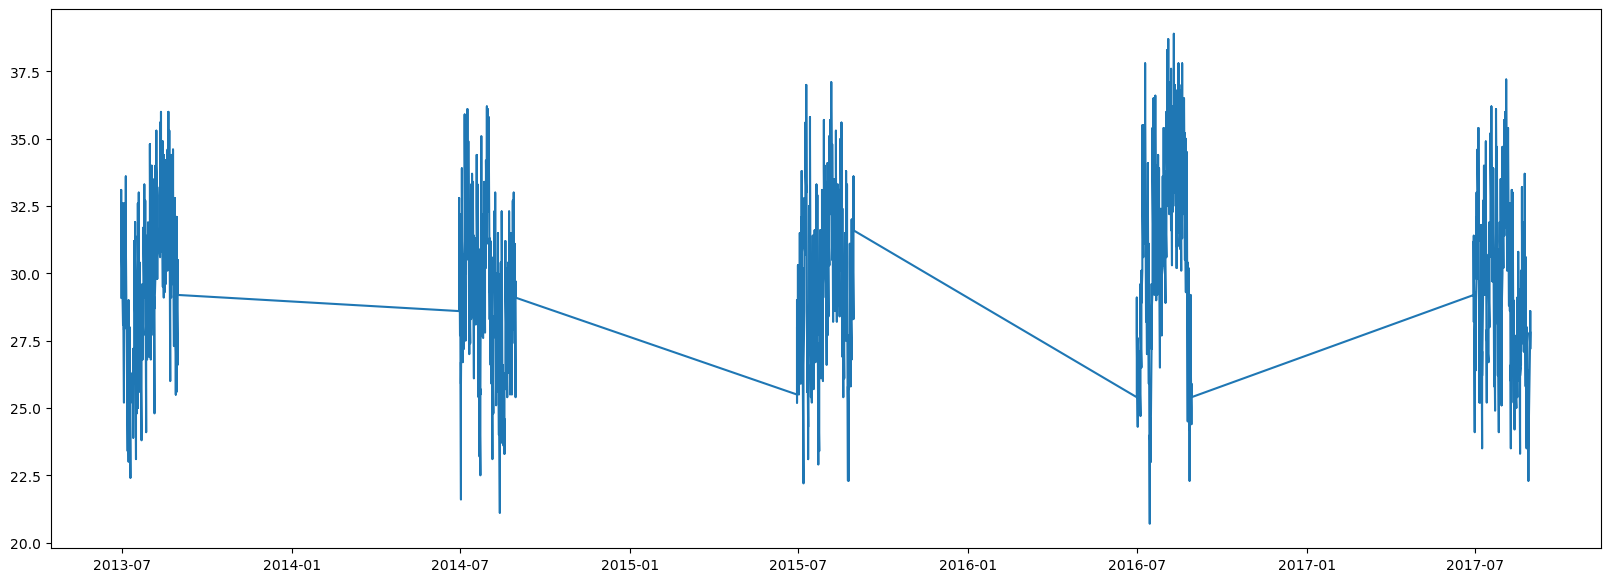

In [392]:
plt.figure(figsize=(20,7))
plt.plot(df.Next_Tmax,label='Next day maximum tempreture')

In 2016 there was a high rise in maximum tempreture.

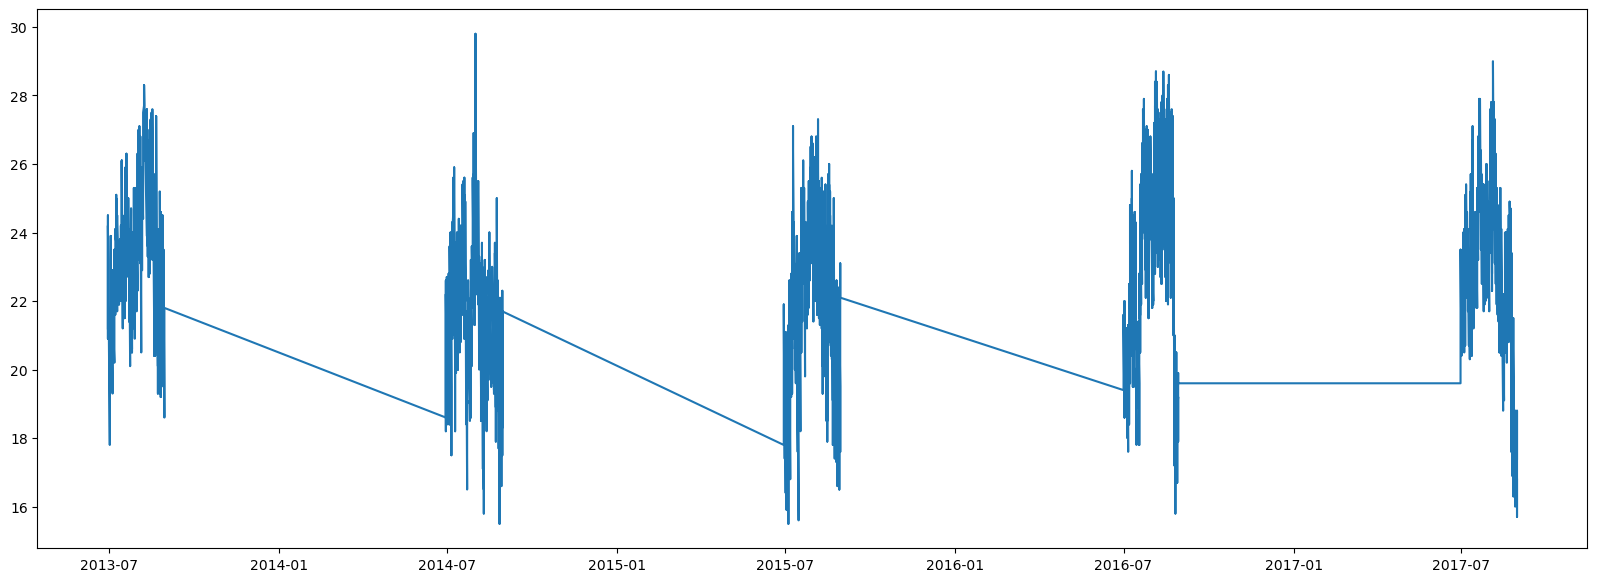

In [393]:
plt.figure(figsize=(20,7))
plt.plot(df.Next_Tmin,label='Next day minimum tempreture')

in 2014 there is high rise in minimum tempreture.

# Bivariate analysis-

In [394]:
x=df.drop(columns=['Next_Tmin'],axis=1)
y=df.Next_Tmin

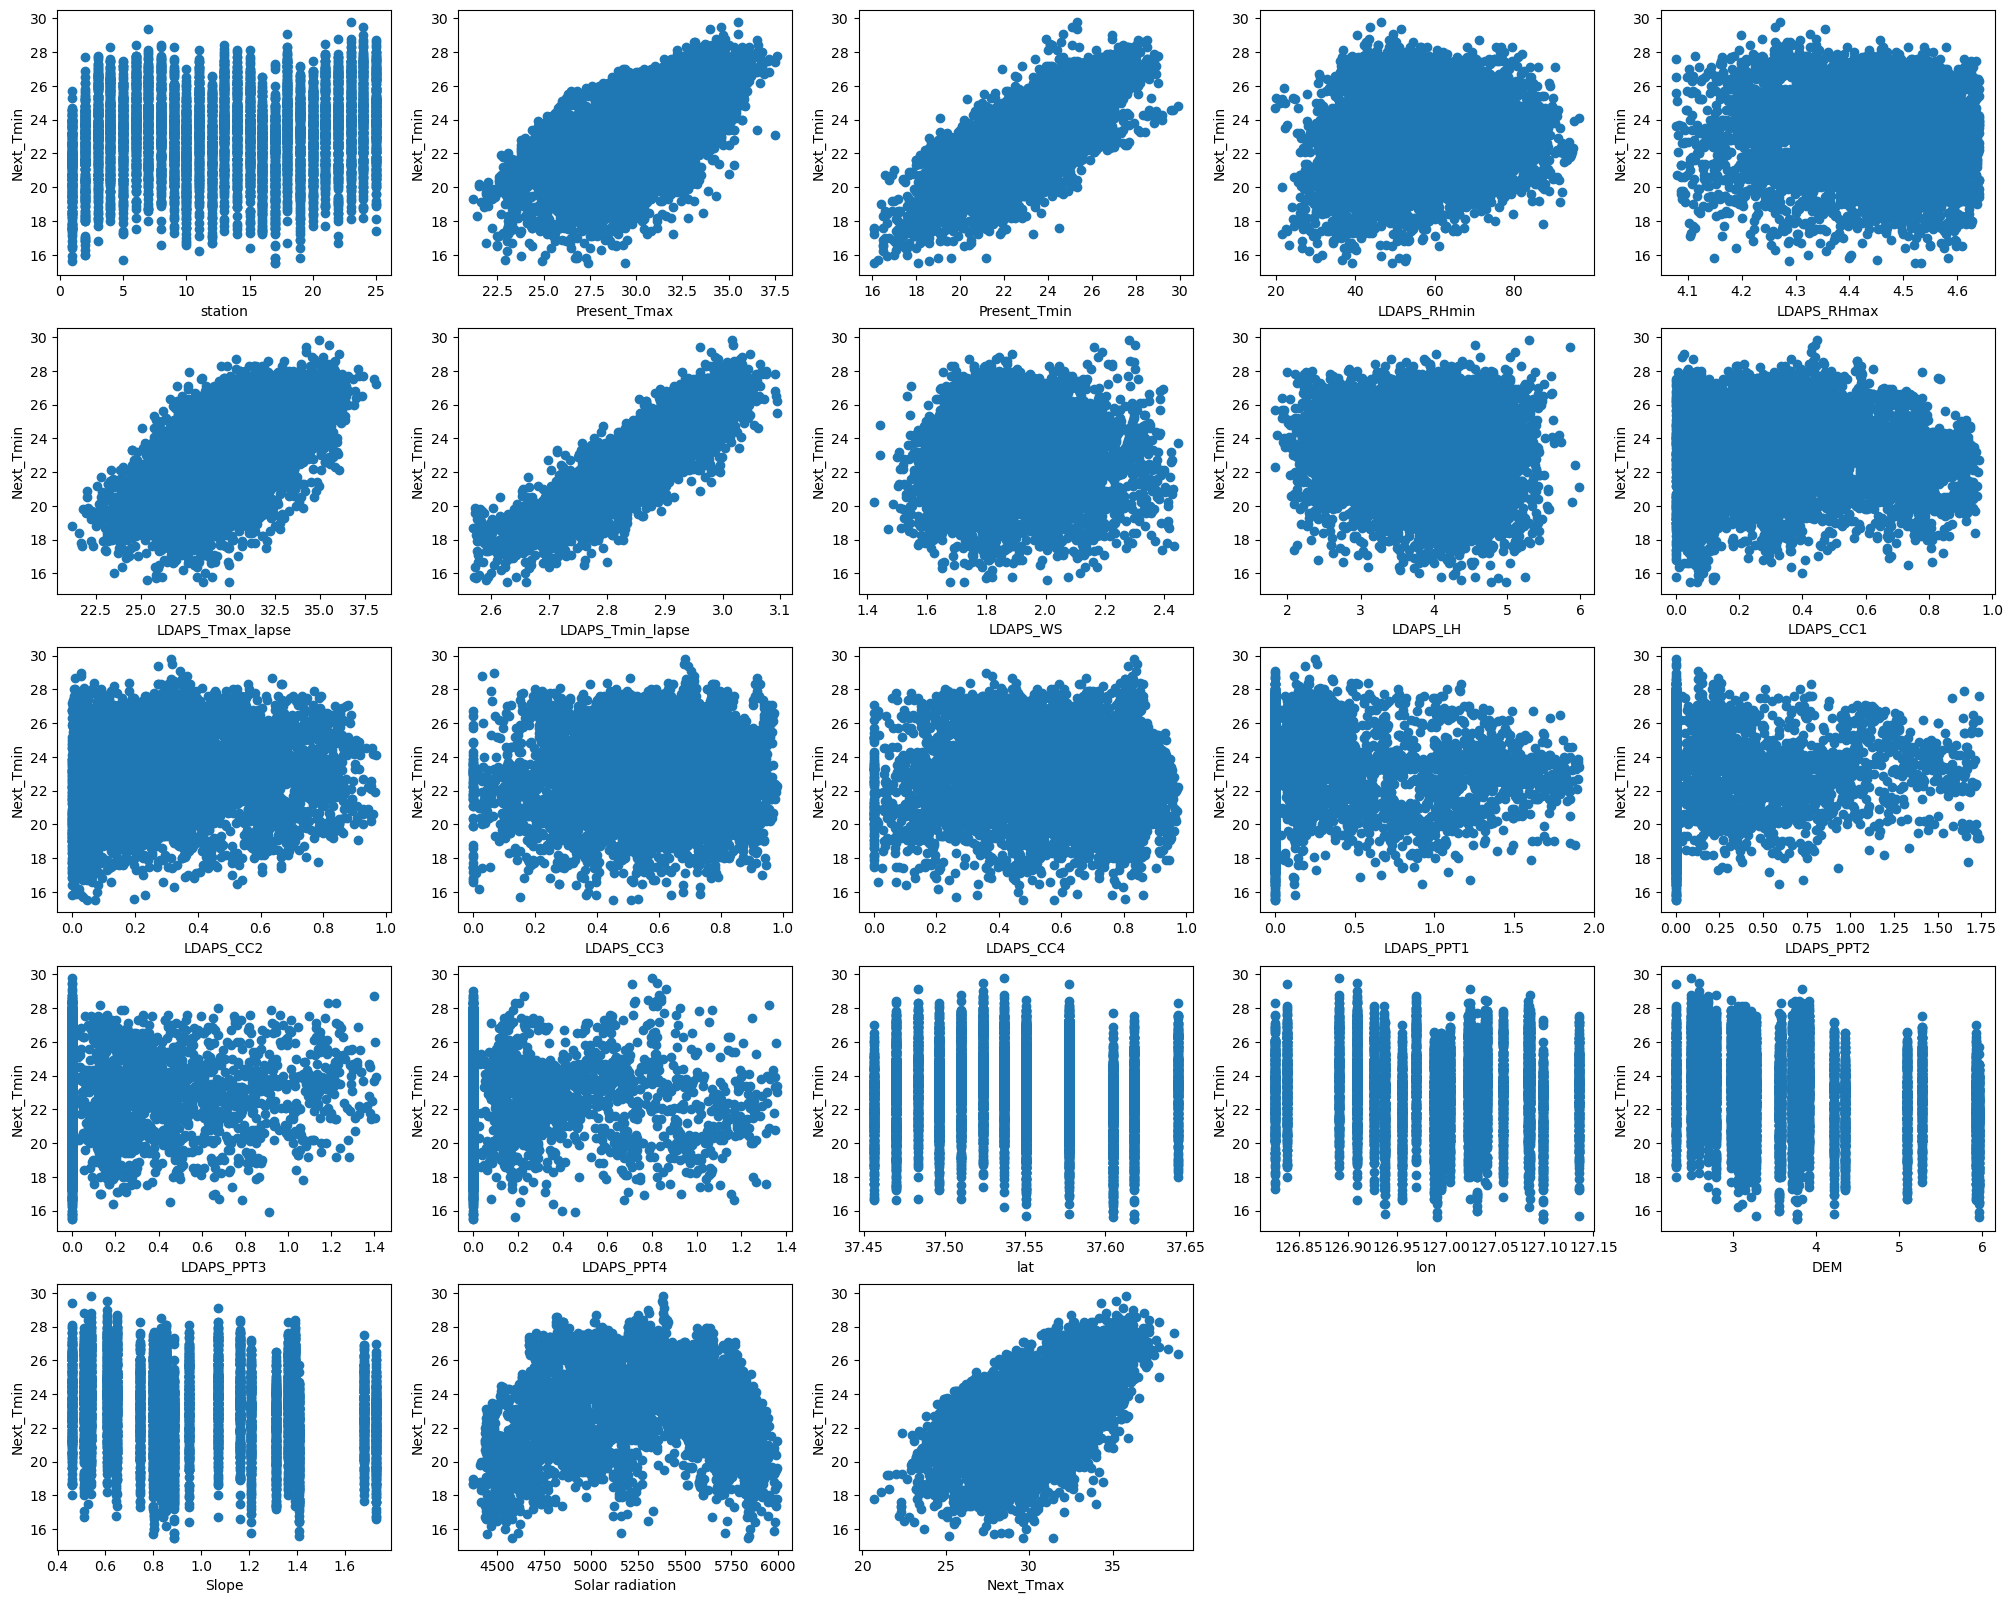

In [395]:
plt.figure(figsize=(25,20))
plotnumber=1

for i in df.columns:
    if plotnumber<24:
        plt.subplot(5,5,plotnumber)
        plt.scatter(x=i,y='Next_Tmin',data=df)
        plt.xlabel(i)
        plt.ylabel('Next_Tmin')
    plotnumber+=1    
plt.show()    

In [398]:
#Reg plot-

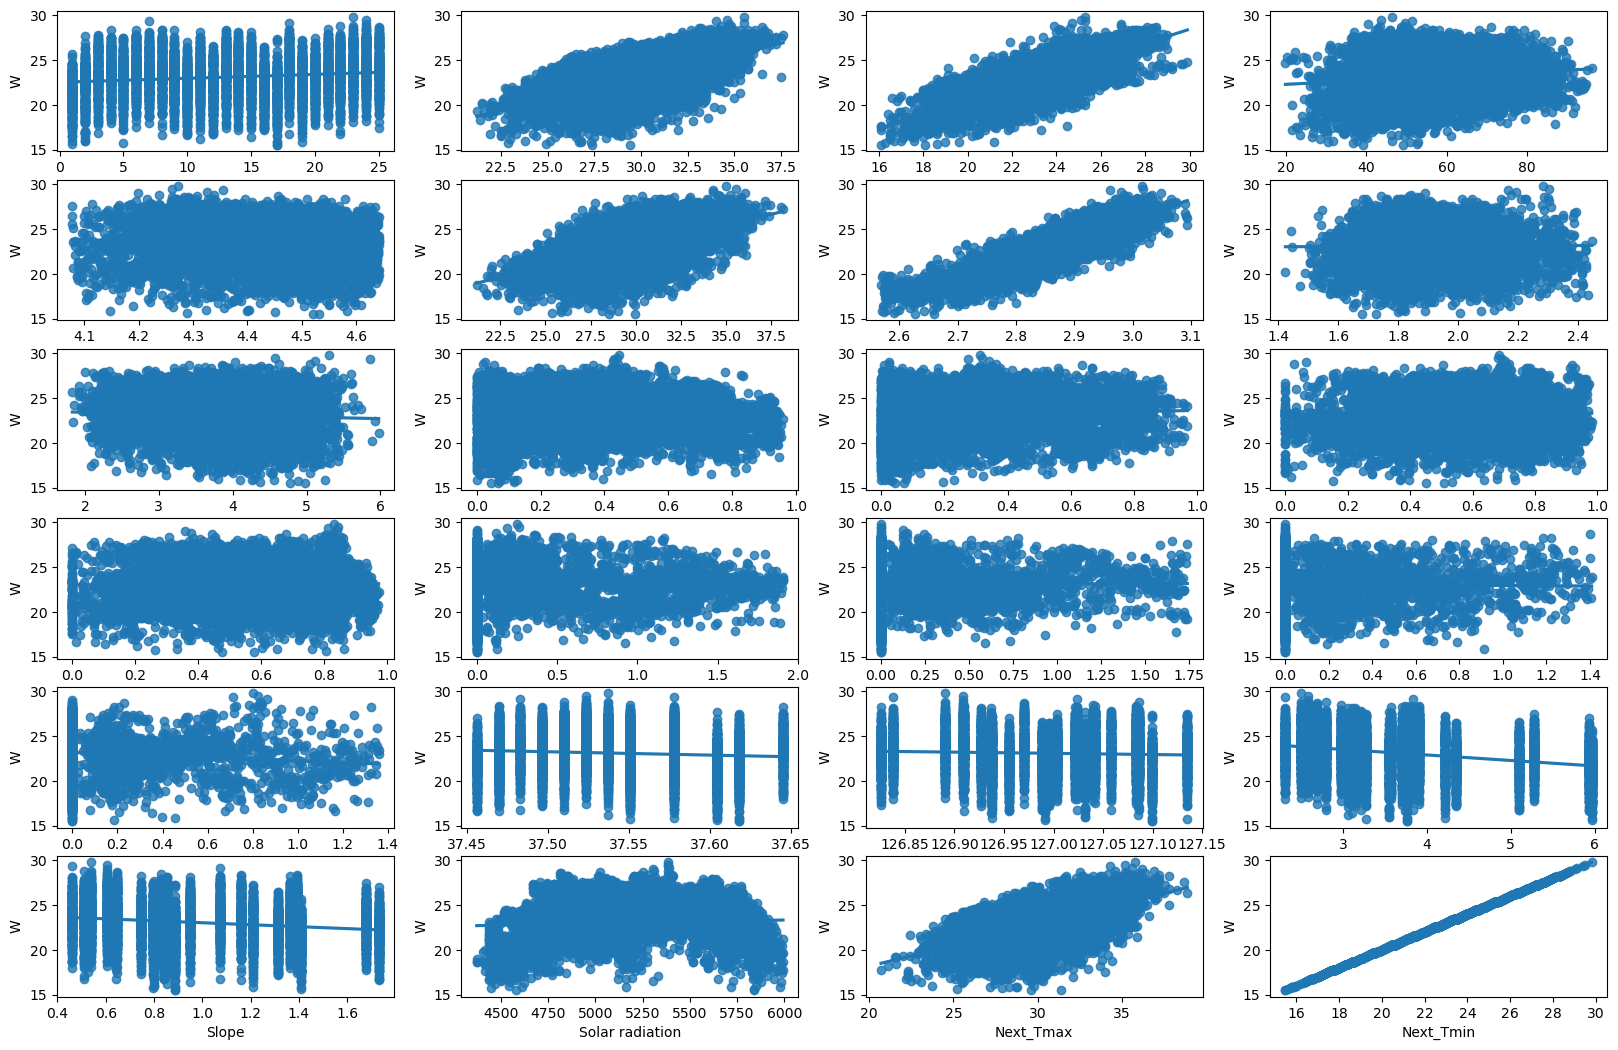

In [399]:
plt.figure(figsize=(20,15))
plotnumber=1

for i in df.columns:
    if plotnumber<=25:
        plt.subplot(7,4,plotnumber)
        sns.regplot(x=i,y='Next_Tmin',data=df)
        plt.xlabel(i)
        plt.ylabel('W')
    plotnumber+=1
plt.show() 

# Observations-

1. Station is positively correlated with target variable Next_Tmin.
2. Present_Tmax is also have good positive correlation with target variable Next_Tmin.
3. Present_Tmin is strongly positively correlated with target variable Next_Tmin.
4. LDAPS_RHmin has very less positive correlationship with target variable Next_Tmin.
5. LDAPS_RHmax has very less negetive correlationship with target variable Next_Tmin.
6. LDAPS_Tmax_lapse also have good positive correlated with target variable Next_Tmin.
7. LDAPS_Tmin_lapse is strongly positively correlated with target variable Next_Tmin.
8. LDAPS_WS has very less negetive correlationship with target variable Next_Tmin.
9. LDAPS_LH has very less negetive correlationship with target variable Next_Tmin.
10.LDAPS_CC1 has very less negetive correlationship with target variable Next_Tmin.
11.LDAPS_CC2 has very less positive correlationship with target variable Next_Tmin.
12.LDAPS_CC3 has very less negetive correlationship with target variable Next_Tmin.
13.LDAPS_CC4 has very less negetive correlationship with target variable Next_Tmin.
14.LDAPS_PPT1 has very less positive correlationship with target variable Next_Tmin.
15.LDAPS_PPT2 has very less negetive correlationship with target variable Next_Tmin.
16.LDAPS_PPT3 has very less negetive correlationship with target variable Next_Tmin.
17.LDAPS_PPT4 has negetive correlationship with target variable Next_Tmin.
18.lat has negetive correlationship with target variable Next_Tmin.
19.lon has negetive correlationship with target variable Next_Tmin.
20.DEM has negetive correlationship with target variable Next_Tmin.
21.Slope has negetive correlationship with target variable Next_Tmin.
22.Solar radiation has positive correlation with target variable Next_Tmin.
23.Next_Tmax has good positive correlation with target variable Next_Tmin.

# Correlationship of features with target variable-

In [303]:
df.corr()['Next_Tmin']

station             0.136192
Present_Tmax        0.609815
Present_Tmin        0.782920
LDAPS_RHmin         0.133078
LDAPS_RHmax        -0.101658
LDAPS_Tmax_lapse    0.549540
LDAPS_Tmin_lapse    0.871482
LDAPS_WS            0.009613
LDAPS_LH           -0.057806
LDAPS_CC1           0.011428
LDAPS_CC2           0.081456
LDAPS_CC3           0.053623
LDAPS_CC4           0.013613
LDAPS_PPT1         -0.036862
LDAPS_PPT2          0.007816
LDAPS_PPT3         -0.018566
LDAPS_PPT4         -0.100436
lat                -0.080094
lon                -0.045473
DEM                -0.255013
Slope              -0.166322
Solar radiation     0.068993
Next_Tmax           0.578256
Next_Tmin           1.000000
Name: Next_Tmin, dtype: float64

Text(0.5, 1.0, 'correlationship bw features and target')

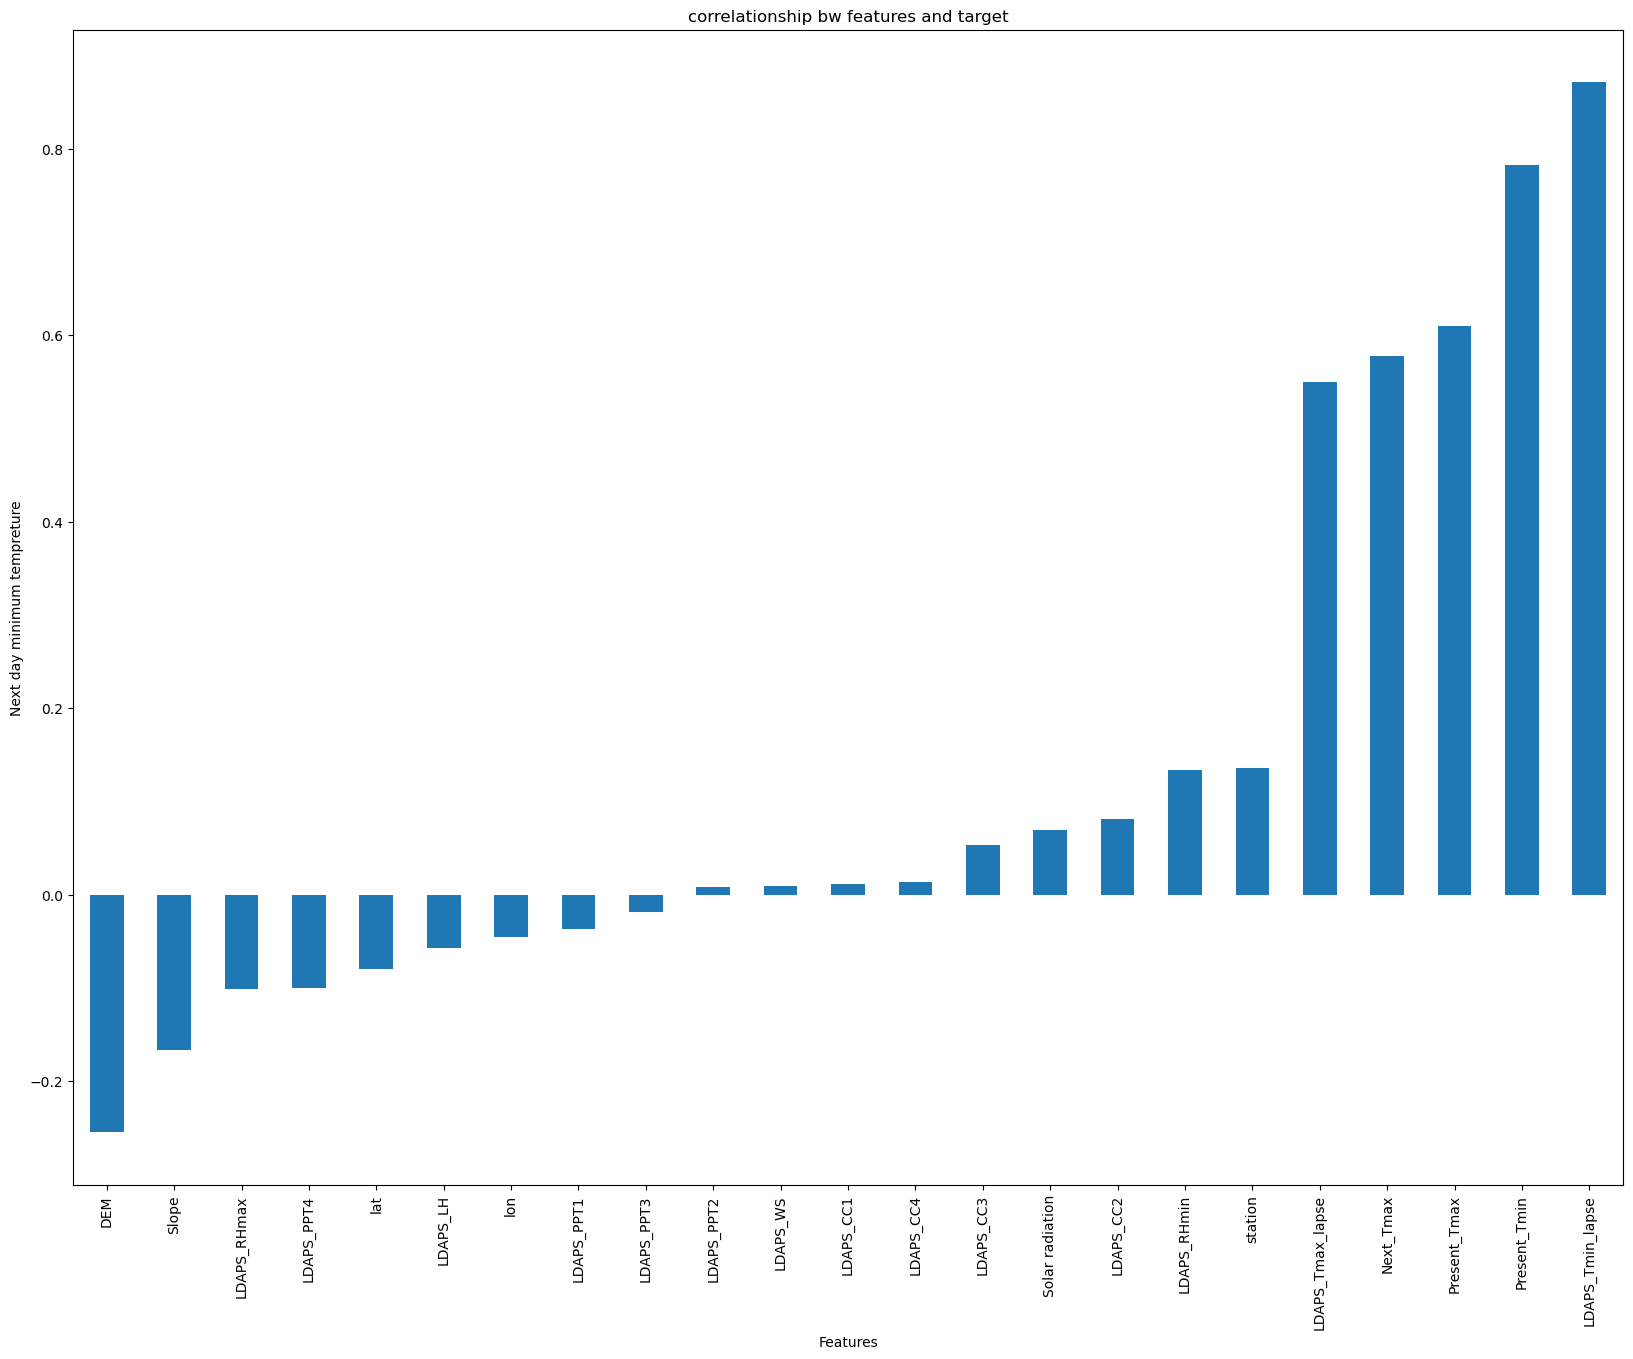

In [304]:
plt.figure(figsize=(20,15))
df.corr()['Next_Tmin'].sort_values().drop(['Next_Tmin']).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Next day minimum tempreture')
plt.title('correlationship bw features and target')

# Observations-

1. From the above graph we can see that lon,LDAPS_CC1,LDAPS_PPT1,LDAPS_PPT2,LDAPS_CC2 has very less correlation with target variable.
2. LDAPS_Tmin_lapse,Present_Tmin are most highly correlated with target variable.

# Feature scaling-

In [400]:
x=df.drop(columns=['Next_Tmin'],axis=1)
y=df.Next_Tmin

In [401]:
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     4.499858   
2013-06-30      2.0          31.9          21.6    52.263397     4.491419   
2013-06-30      3.0          31.6          23.3    48.690479     4.379060   
2013-06-30      4.0          32.0          23.4    58.239788     4.586534   
2013-06-30      5.0          31.4          21.9    56.174095     4.483978   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997     4.277426   
2017-08-30     22.0          22.5          17.4    30.094858     4.374125   
2017-08-30     23.0          23.3          17.1    26.741310     4.288483   
2017-08-30     24.0          23.3          17.7    24.040634     4.259746   
2017-08-30     25.0          23.2          17.4    22.933014     4.258805   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
Date                                                                            
2013-06-30         28.074101          2.844153  1.896289  4.110499   0.233947   
2013-06-30         29.850689          2.885901  1.785468  3.731014   0.225508   
2013-06-30         30.091292          2.906984  1.830969  2.740099   0.209344   
2013-06-30         29.704629          2.857247  1.781083  4.035663   0.216372   
2013-06-30         29.113934          2.863778  1.789965  4.761697   0.151407   
...                      ...               ...       ...       ...        ...   
2017-08-30         27.812697          2.635366  1.876086  2.126355   0.052902   
2017-08-30         26.704905          2.611685  1.793400  4.347071   0.066461   
2017-08-30         26.352081          2.657859  1.832031  4.161290   0.030034   
2017-08-30         27.010193          2.655868  1.870345  3.614996   0.035874   
2017-08-30         27.939516          2.645880  1.938926  2.086997   0.048954   

            ...  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
Date        ...                                                            
2013-06-30  ...         0.0         0.0         0.0         0.0  37.6046   
2013-06-30  ...         0.0         0.0         0.0         0.0  37.6046   
2013-06-30  ...         0.0         0.0         0.0         0.0  37.5776   
2013-06-30  ...         0.0         0.0         0.0         0.0  37.6450   
2013-06-30  ...         0.0         0.0         0.0         0.0  37.5507   
...         ...         ...         ...         ...         ...      ...   
2017-08-30  ...         0.0         0.0         0.0         0.0  37.5507   
2017-08-30  ...         0.0         0.0         0.0         0.0  37.5102   
2017-08-30  ...         0.0         0.0         0.0         0.0  37.5372   
2017-08-30  ...         0.0         0.0         0.0         0.0  37.5237   
2017-08-30  ...         0.0         0.0         0.0         0.0  37.5237   

                lon       DEM     Slope  Solar radiation  Next_Tmax  
Date                                                                 
2013-06-30  126.991  5.965871  1.406938      5992.895996       29.1  
2013-06-30  127.032  3.550622  0.801092      5869.312500       30.5  
2013-06-30  127.058  3.217444  0.643203      5863.555664       31.1  
2013-06-30  127.022  3.575659  1.363477      5856.964844       31.7  
2013-06-30  127.135  3.272250  0.796600      5859.552246       31.2  
...             ...       ...       ...              ...        ...  
2017-08-30  127.040  2.973771  0.830151      4456.024414       27.6  
2017-08-30  127.086  2.800629  0.510703      4441.803711       28.0  
2017-08-30  126.891  2.498004  0.537630      4443.313965       28.3  
2017-08-30  126.909  2.586099  0.605778      4438.373535       28.6  
2017-08-30  126.970  2.695484  0.647366      4451.345215       27.8  

[6656 rows x 23 columns]

In [402]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.670375     -0.434446     -0.826764     0.206804     0.448938   
1    -1.531509      0.685896     -0.739572    -0.229632     0.377851   
2    -1.392643      0.580864      0.001559    -0.489859    -0.568691   
3    -1.253778      0.720907      0.045155     0.205646     1.179120   
4    -1.114912      0.510843     -0.608784     0.055196     0.315163   
...        ...           ...           ...          ...          ...   
6651  1.106942     -2.395046     -2.396218    -2.237959    -1.424880   
6652  1.245808     -2.605111     -2.570601    -1.844234    -0.610263   
6653  1.384674     -2.325025     -2.701389    -2.088483    -1.331734   
6654  1.523540     -2.325025     -2.439814    -2.285181    -1.573817   
6655  1.662405     -2.360036     -2.570601    -2.365853    -1.581747   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.681041         -0.268476  0.060502  0.377484  -0.433614  ...   
1            -0.029456          0.192821 -0.614997 -0.120902  -0.467334  ...   
2             0.058788          0.425779 -0.337653 -1.422295  -0.531919  ...   
3            -0.083025         -0.123787 -0.641730  0.279201  -0.503837  ...   
4            -0.299670         -0.051630 -0.587587  1.232718  -0.763406  ...   
...                ...               ...       ...       ...        ...  ...   
6651         -0.776914         -2.575474 -0.062646 -2.228340  -1.156982  ...   
6652         -1.183211         -2.837133 -0.566651  0.688180  -1.102808  ...   
6653         -1.312613         -2.326937 -0.331176  0.444190  -1.248352  ...   
6654         -1.071242         -2.348934 -0.097639 -0.273272  -1.225020  ...   
6655         -0.730402         -2.459293  0.320394 -2.280030  -1.172759  ...   

      LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat       lon  \
0      -0.535846   -0.485584   -0.460074   -0.400228  1.203695  0.004750   
1      -0.535846   -0.485584   -0.460074   -0.400228  1.203695  0.519348   
2      -0.535846   -0.485584   -0.460074   -0.400228  0.665976  0.845678   
3      -0.535846   -0.485584   -0.460074   -0.400228  2.008282  0.393836   
4      -0.535846   -0.485584   -0.460074   -0.400228  0.130249  1.812117   
...          ...         ...         ...         ...       ...       ...   
6651   -0.535846   -0.485584   -0.460074   -0.400228  0.130249  0.619757   
6652   -0.535846   -0.485584   -0.460074   -0.400228 -0.676329  1.197110   
6653   -0.535846   -0.485584   -0.460074   -0.400228 -0.138611 -1.250366   
6654   -0.535846   -0.485584   -0.460074   -0.400228 -0.407470 -1.024445   
6655   -0.535846   -0.485584   -0.460074   -0.400228 -0.407470 -0.258824   

           DEM     Slope  Solar radiation  Next_Tmax  
0     2.348270  1.283837         1.545416  -0.501779  
1    -0.139651 -0.417927         1.249738  -0.020866  
2    -0.482854 -0.861422         1.235965   0.185240  
3    -0.113861  1.161759         1.220196   0.391346  
4    -0.426399 -0.430545         1.226386   0.219591  
...        ...       ...              ...        ...  
6651 -0.733858 -0.336302        -2.131604  -1.017044  
6652 -0.912210 -1.233603        -2.165627  -0.879640  
6653 -1.223941 -1.157966        -2.162014  -0.776587  
6654 -1.133194 -0.966547        -2.173834  -0.673534  
6655 -1.020519 -0.849729        -2.142799  -0.948342  

[6656 rows x 23 columns]

# Checking for multicollinearity among features-

In [403]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [404]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

VIF Values          Features
0     1.254496           station
1     2.759449      Present_Tmax
2     3.037152      Present_Tmin
3     5.853510       LDAPS_RHmin
4     2.204547       LDAPS_RHmax
5     8.113908  LDAPS_Tmax_lapse
6     6.755278  LDAPS_Tmin_lapse
7     1.261227          LDAPS_WS
8     1.531185          LDAPS_LH
9     4.803101         LDAPS_CC1
10    5.257180         LDAPS_CC2
11    3.686782         LDAPS_CC3
12    2.587967         LDAPS_CC4
13    2.653620        LDAPS_PPT1
14    2.139701        LDAPS_PPT2
15    1.532773        LDAPS_PPT3
16    1.544730        LDAPS_PPT4
17    1.240806               lat
18    1.186125               lon
19    3.178656               DEM
20    2.898886             Slope
21    1.242078   Solar radiation
22    4.129407         Next_Tmax

Here we can see that multicollinearity is under acceptable range i.e. <10 so we can move further for model building.

# Model building-I (With all features)

In [405]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import cross_val_score

In [406]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.8456581313761631 at random state 193


Getting best accuracy at random state-193

In [407]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxrs)

In [408]:
#Linear regression-

In [409]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
pred_train=lr.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,predlr))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predlr))
print('mean squared error- ',mean_squared_error(y_test,predlr))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predlr)))

r2_score on test data - 0.8456581313761631
r2_score on train data - 0.8320518740223417
mean absolute error-  0.7571966016247859
mean squared error-  0.9012482600667954
root mean squared error-  0.9493409609127773


For linear regression model train accuracy is 83% and test accuracy is 84%.

In [410]:
#Cross validation score-

In [412]:
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predlr)-score.mean())*100)

[0.73998655 0.68087498 0.80391988 0.85407744 0.86632577]
0.789036924005484
difference bw r2_score and cross validation score is - 5.6621207370679105


The cross validation score for linear regression is 79%

In [413]:
#Random forest-

In [414]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
pred_train=rf.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predrf))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predrf))
print('mean squared error- ',mean_squared_error(y_test,predrf))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predrf)))

r2_score on test data - 0.9028047147223709
r2_score on train data - 0.9852403133946276
mean absolute error-  0.5746154231347018
mean squared error-  0.5675522949424132
root mean squared error-  0.7533606672387491


For random forest the train accuracy is 98% and test accuracy is 90%.overfitting of the model can be seen here.

In [415]:
#Cross validation score-

In [416]:
score1=cross_val_score(rf,x,y)
print(score1)
print(score1.mean())
print('difference bw r2_score and cross validation score is ',(r2_score(y_test,predrf)-score1.mean())*100)

[0.72850801 0.69671789 0.80914511 0.87096632 0.85671623]
0.7924107121536987
difference bw r2_score and cross validation score is  11.039400256867216


The cross validation score for random forest regressor model is 79%.

In [418]:
#KNN-

In [419]:
kn=KNN()
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
pred_train=kn.predict(x_train)   #to know how my model working on training data.
print('r2_score on test data -',r2_score(y_test,predkn))
print('r2_score on train data -', r2_score(y_train,pred_train))  #error is the diff bw actual data & predicted data.
print('mean absolute error- ',mean_absolute_error(y_test,predkn))
print('mean squared error- ',mean_squared_error(y_test,predkn))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predkn)))

r2_score on test data - 0.8640556715280193
r2_score on train data - 0.908126652561536
mean absolute error-  0.6863895843765649
mean squared error-  0.793819529293941
root mean squared error-  0.8909655039865129


For KNN model the train accuracy is 91% and test accuracy is 86% which looks like a generalised model.

In [420]:
#Cross validation score-

In [421]:
score2=cross_val_score(kn,x,y)
print(score2)
print(score2.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predkn)-score2.mean())*100)

[0.53224087 0.51200694 0.67411976 0.72440046 0.77769075]
0.6440917578330319
difference bw r2_score and cross validation score is - 21.996391369498745


The cross validation score for KNN model is 64%

In [423]:
#Gradientboostingregressor-

In [424]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
pred_train=gb.predict(x_train)   #to know how my model working on training data.
print('r2_score on test data -',r2_score(y_test,predgb))
print('r2_score on train data -', r2_score(y_train,pred_train))  #error is the diff bw actual data & predicted data.
print('mean absolute error- ',mean_absolute_error(y_test,predgb))
print('mean squared error- ',mean_squared_error(y_test,predgb))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predgb)))

r2_score on test data - 0.8930311638382917
r2_score on train data - 0.9093722114842542
mean absolute error-  0.6183612487650837
mean squared error-  0.624622977107202
root mean squared error-  0.7903309288565151


For GBR model the train accuracy is 91% and test accuracy is 89% which looks very good generalised model.

In [425]:
#Cross validation score-

In [427]:
score3=cross_val_score(gb,x,y)
print(score3)
print(score3.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predgb)-score3.mean())*100)

[0.74105157 0.69069699 0.8257125  0.87245236 0.88299477]
0.8025816394618923
difference bw r2_score and cross validation score is - 9.044952437639942


The cross validation score for Gradient boosting regressor is 80%

# Regularization-

In [428]:
#Lasso-

In [429]:
lasso=Lasso()
lasso.fit(x_train,y_train)
predla=lasso.predict(x_test)
pred_train=lasso.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predla))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predla))
print('mean squared error- ',mean_squared_error(y_test,predla))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predla)))

r2_score on test data - 0.5740895096285086
r2_score on train data - 0.5687802974368645
mean absolute error-  1.2575651700515886
mean squared error-  2.4870185375753544
root mean squared error-  1.5770283883225928


For Lasso model the train accuracy is 57% and test accuracy is 57% which looks like an underfitted model.

In [430]:
#Cross validation score-

In [431]:
score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print('difference bw r2_score and cross validation score is- ',(r2_score(y_test,predla)-score4.mean())*100)

[0.53001281 0.39094358 0.57964868 0.4845488  0.63479907]
0.5239905882016581
difference bw r2_score and cross validation score is-  5.009892142685047


The cross validation score for lasso model is 52%

In [433]:
#Ridge-

In [434]:
rd=Ridge()
rd.fit(x_train,y_train)
predri=rd.predict(x_test)
pred_train=rd.predict(x_train)   #to know how my model working on training data.
print('r2_score on test data -',r2_score(y_test,predri))
print('r2_score on train data -', r2_score(y_train,pred_train))  #error is the diff bw actual data & predicted data.
print('mean absolute error- ',mean_absolute_error(y_test,predri))
print('mean squared error- ',mean_squared_error(y_test,predri))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predri)))

r2_score on test data - 0.8456626249658491
r2_score on train data - 0.8320517671993091
mean absolute error-  0.7571841632648232
mean squared error-  0.901222020654755
root mean squared error-  0.9493271410081748


For Ridge model the train accuracy is 83% and test accuracy is 85%.

In [435]:
#Cross validation score-

In [436]:
score5=cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predri)-score5.mean())*100)

[0.74001726 0.68093627 0.80390251 0.85409032 0.8663448 ]
0.7890582340320068
difference bw r2_score and cross validation score is - 5.660439093384229


The cross validation score for Ridge model is 79%

In [437]:
#Decision Tree-

In [438]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
pred_train=dt.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,preddt))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,preddt))
print('mean squared error- ',mean_squared_error(y_test,preddt))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,preddt)))

r2_score on test data - 0.773476371851476
r2_score on train data - 1.0
mean absolute error-  0.8579369053580371
mean squared error-  1.3227391086629947
root mean squared error-  1.1501039555896653


for decision tree model train accuracy is 100% & test accuracy is 77% which looks like an overfitted model.

In [451]:
#Cross validation score-

In [452]:
score6=cross_val_score(dt,x,y)
print(score6)
print(score6.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,preddt)-score6.mean())*100)

[0.5497784  0.50461982 0.63574343 0.74003971 0.63887282]
0.6138108343547029
difference bw r2_score and cross validation score is - 15.966553749677315


The cross validation score for Decision tree model is 61.3%

In [440]:
#Support vector Regressor-

In [441]:
from sklearn.svm import SVR

In [442]:
svr=SVR()
svr.fit(x_train,y_train)
predsv=svr.predict(x_test)
pred_train=svr.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predsv))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predsv))
print('mean squared error- ',mean_squared_error(y_test,predsv))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predsv)))

r2_score on test data - 0.9050853347150074
r2_score on train data - 0.9311120447319553
mean absolute error-  0.5740805991844145
mean squared error-  0.5542350737725266
root mean squared error-  0.7444696594036097


for support vector regressor the train accuracy is 93% and test accuracy is 91% which looks a generalised model.

In [443]:
#Cross validation score-

In [450]:
score6=cross_val_score(svr,x,y)
print(score6)
print(score6.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predsv)-score6.mean())*100)

[0.69967591 0.65861127 0.77219038 0.82283864 0.84514503]
0.7596922455792191
difference bw r2_score and cross validation score is - 14.53930891357883


The cross validation score for SVR model is 76%.

In [445]:
#ExtraTreesRegressor-

In [446]:
from sklearn.ensemble import ExtraTreesRegressor

In [447]:
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
predet=et.predict(x_test)
pred_train=et.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predet))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predet))
print('mean squared error- ',mean_squared_error(y_test,predet))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predet)))

r2_score on test data - 0.9107658179188348
r2_score on train data - 1.0
mean absolute error-  0.5468147220831244
mean squared error-  0.5210650360540807
root mean squared error-  0.7218483469913058


For extra tree regressor train accuracy is 100% and test accuracy is 91%. clear overfitting can be seen here.

In [448]:
#Cross validation score-

In [449]:
score8=cross_val_score(et,x,y)
print(score8)
print(score8.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predet)-score8.mean())*100)

[0.73976139 0.69701176 0.81452696 0.86965966 0.88143657]
0.8004792678013285
difference bw r2_score and cross validation score is - 11.028655011750633


The cross validation score for extra tree regressor is 80%.

# Selection of the best model-

Here i am selecting Linear regression as my best model as with Ridge regularization model i am getting train accuracy-84.5% & test accuracy-83% and cross validation score-79% which looks very much generalised model.

# Hyper-Parameter-tunning-

In [453]:
from sklearn.model_selection import GridSearchCV

In [460]:
param_grid={'alpha':[0.2, 0.5, 1,0, 0.7, 1.2],'max_iter':[500,1000,1500,2000,2500],'solver' : ['auto', 'svd', 'cholesky', 'lsqr'],'tol':[1.0,2.0,3.0],'random_state':[100,200,300,400,500,700,800],'normalize':[True,False]}

In [461]:
rd.get_params().keys() 

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'random_state', 'solver', 'tol'])

In [462]:
gs=GridSearchCV(Ridge(),param_grid,cv=5)  
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.2, 0.5, 1, 0, 0.7, 1.2],
                         'max_iter': [500, 1000, 1500, 2000, 2500],
                         'normalize': [True, False],
                         'random_state': [100, 200, 300, 400, 500, 700, 800],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr'],
                         'tol': [1.0, 2.0, 3.0]})

In [463]:
gs.best_params_

{'alpha': 1.2,
 'max_iter': 500,
 'normalize': False,
 'random_state': 100,
 'solver': 'svd',
 'tol': 1.0}

In [480]:
final_model=Ridge(alpha= 1.2, max_iter= 1000, random_state= 100, solver= 'svd',tol=1.0,normalize=False)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)

In [481]:
r2_score(y_test,pred)

0.8456634936434706

Here we can see that the Ridge model accuracy is increased to 85% from 83%.

# Saving the model-

In [482]:
import joblib
joblib.dump(final_model,'Minimum tempreture forecasting-1')

['Minimum tempreture forecasting-1']

In [483]:
model=joblib.load('Minimum tempreture forecasting-1')

In [484]:
#Making the prediction-

In [485]:
prediction=model.predict(x_test)
prediction

array([22.80648057, 26.53790223, 26.19423398, ..., 26.82168626,
       25.4106646 , 23.4729332 ])

In [486]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

predicted  original
0     22.806481      23.1
1     26.537902      27.0
2     26.194234      26.3
3     28.080809      26.2
4     23.146298      22.4
...         ...       ...
1992  25.239871      24.8
1993  22.935707      24.3
1994  26.821686      27.5
1995  25.410665      24.9
1996  23.472933      23.1

[1997 rows x 2 columns]

# Plotting the difference bw the prediction & actual values to understand the difference better-

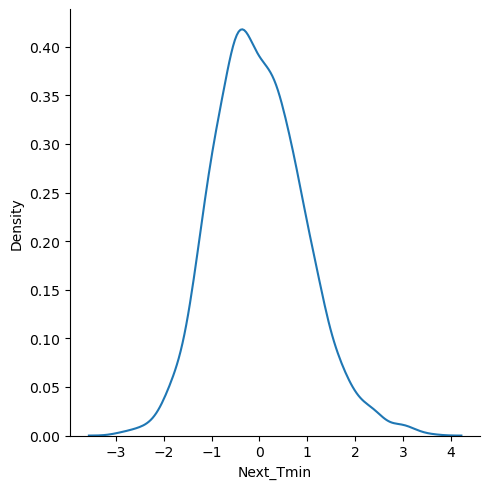

In [487]:
sns.displot(prediction-y_test,kind='kde')

Here we can see that variance is bw predicted values & actual values is from almost -3.5 to 4 which is very good.

# Model building-II (With Mannual selection of features)

In [547]:
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     4.499858   
2013-06-30      2.0          31.9          21.6    52.263397     4.491419   
2013-06-30      3.0          31.6          23.3    48.690479     4.379060   
2013-06-30      4.0          32.0          23.4    58.239788     4.586534   
2013-06-30      5.0          31.4          21.9    56.174095     4.483978   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997     4.277426   
2017-08-30     22.0          22.5          17.4    30.094858     4.374125   
2017-08-30     23.0          23.3          17.1    26.741310     4.288483   
2017-08-30     24.0          23.3          17.7    24.040634     4.259746   
2017-08-30     25.0          23.2          17.4    22.933014     4.258805   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
Date                                                                            
2013-06-30         28.074101          2.844153  1.896289  4.110499   0.233947   
2013-06-30         29.850689          2.885901  1.785468  3.731014   0.225508   
2013-06-30         30.091292          2.906984  1.830969  2.740099   0.209344   
2013-06-30         29.704629          2.857247  1.781083  4.035663   0.216372   
2013-06-30         29.113934          2.863778  1.789965  4.761697   0.151407   
...                      ...               ...       ...       ...        ...   
2017-08-30         27.812697          2.635366  1.876086  2.126355   0.052902   
2017-08-30         26.704905          2.611685  1.793400  4.347071   0.066461   
2017-08-30         26.352081          2.657859  1.832031  4.161290   0.030034   
2017-08-30         27.010193          2.655868  1.870345  3.614996   0.035874   
2017-08-30         27.939516          2.645880  1.938926  2.086997   0.048954   

            ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  \
Date        ...                                                         
2013-06-30  ...         0.0         0.0         0.0  37.6046  126.991   
2013-06-30  ...         0.0         0.0         0.0  37.6046  127.032   
2013-06-30  ...         0.0         0.0         0.0  37.5776  127.058   
2013-06-30  ...         0.0         0.0         0.0  37.6450  127.022   
2013-06-30  ...         0.0         0.0         0.0  37.5507  127.135   
...         ...         ...         ...         ...      ...      ...   
2017-08-30  ...         0.0         0.0         0.0  37.5507  127.040   
2017-08-30  ...         0.0         0.0         0.0  37.5102  127.086   
2017-08-30  ...         0.0         0.0         0.0  37.5372  126.891   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.909   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.970   

                 DEM     Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                   
2013-06-30  5.965871  1.406938      5992.895996       29.1       21.2  
2013-06-30  3.550622  0.801092      5869.312500       30.5       22.5  
2013-06-30  3.217444  0.643203      5863.555664       31.1       23.9  
2013-06-30  3.575659  1.363477      5856.964844       31.7       24.3  
2013-06-30  3.272250  0.796600      5859.552246       31.2       22.5  
...              ...       ...              ...        ...        ...  
2017-08-30  2.973771  0.830151      4456.024414       27.6       17.7  
2017-08-30  2.800629  0.510703      4441.803711       28.0       17.1  
2017-08-30  2.498004  0.537630      4443.313965       28.3       18.1  
2017-08-30  2.586099  0.605778      4438.373535       28.6       18.8  
2017-08-30  2.695484  0.647366      4451.345215       27.8       17.4  

[6656 rows x 24 columns]

Imported the data frame from the above after the removal of skewness & outliers.

In [548]:
df.corr()['Next_Tmin']

station             0.136192
Present_Tmax        0.609815
Present_Tmin        0.782920
LDAPS_RHmin         0.133078
LDAPS_RHmax        -0.101658
LDAPS_Tmax_lapse    0.549540
LDAPS_Tmin_lapse    0.871482
LDAPS_WS            0.009613
LDAPS_LH           -0.057806
LDAPS_CC1           0.011428
LDAPS_CC2           0.081456
LDAPS_CC3           0.053623
LDAPS_CC4           0.013613
LDAPS_PPT1         -0.036862
LDAPS_PPT2          0.007816
LDAPS_PPT3         -0.018566
LDAPS_PPT4         -0.100436
lat                -0.080094
lon                -0.045473
DEM                -0.255013
Slope              -0.166322
Solar radiation     0.068993
Next_Tmax           0.578256
Next_Tmin           1.000000
Name: Next_Tmin, dtype: float64

Text(0.5, 1.0, 'correlationship bw features and target')

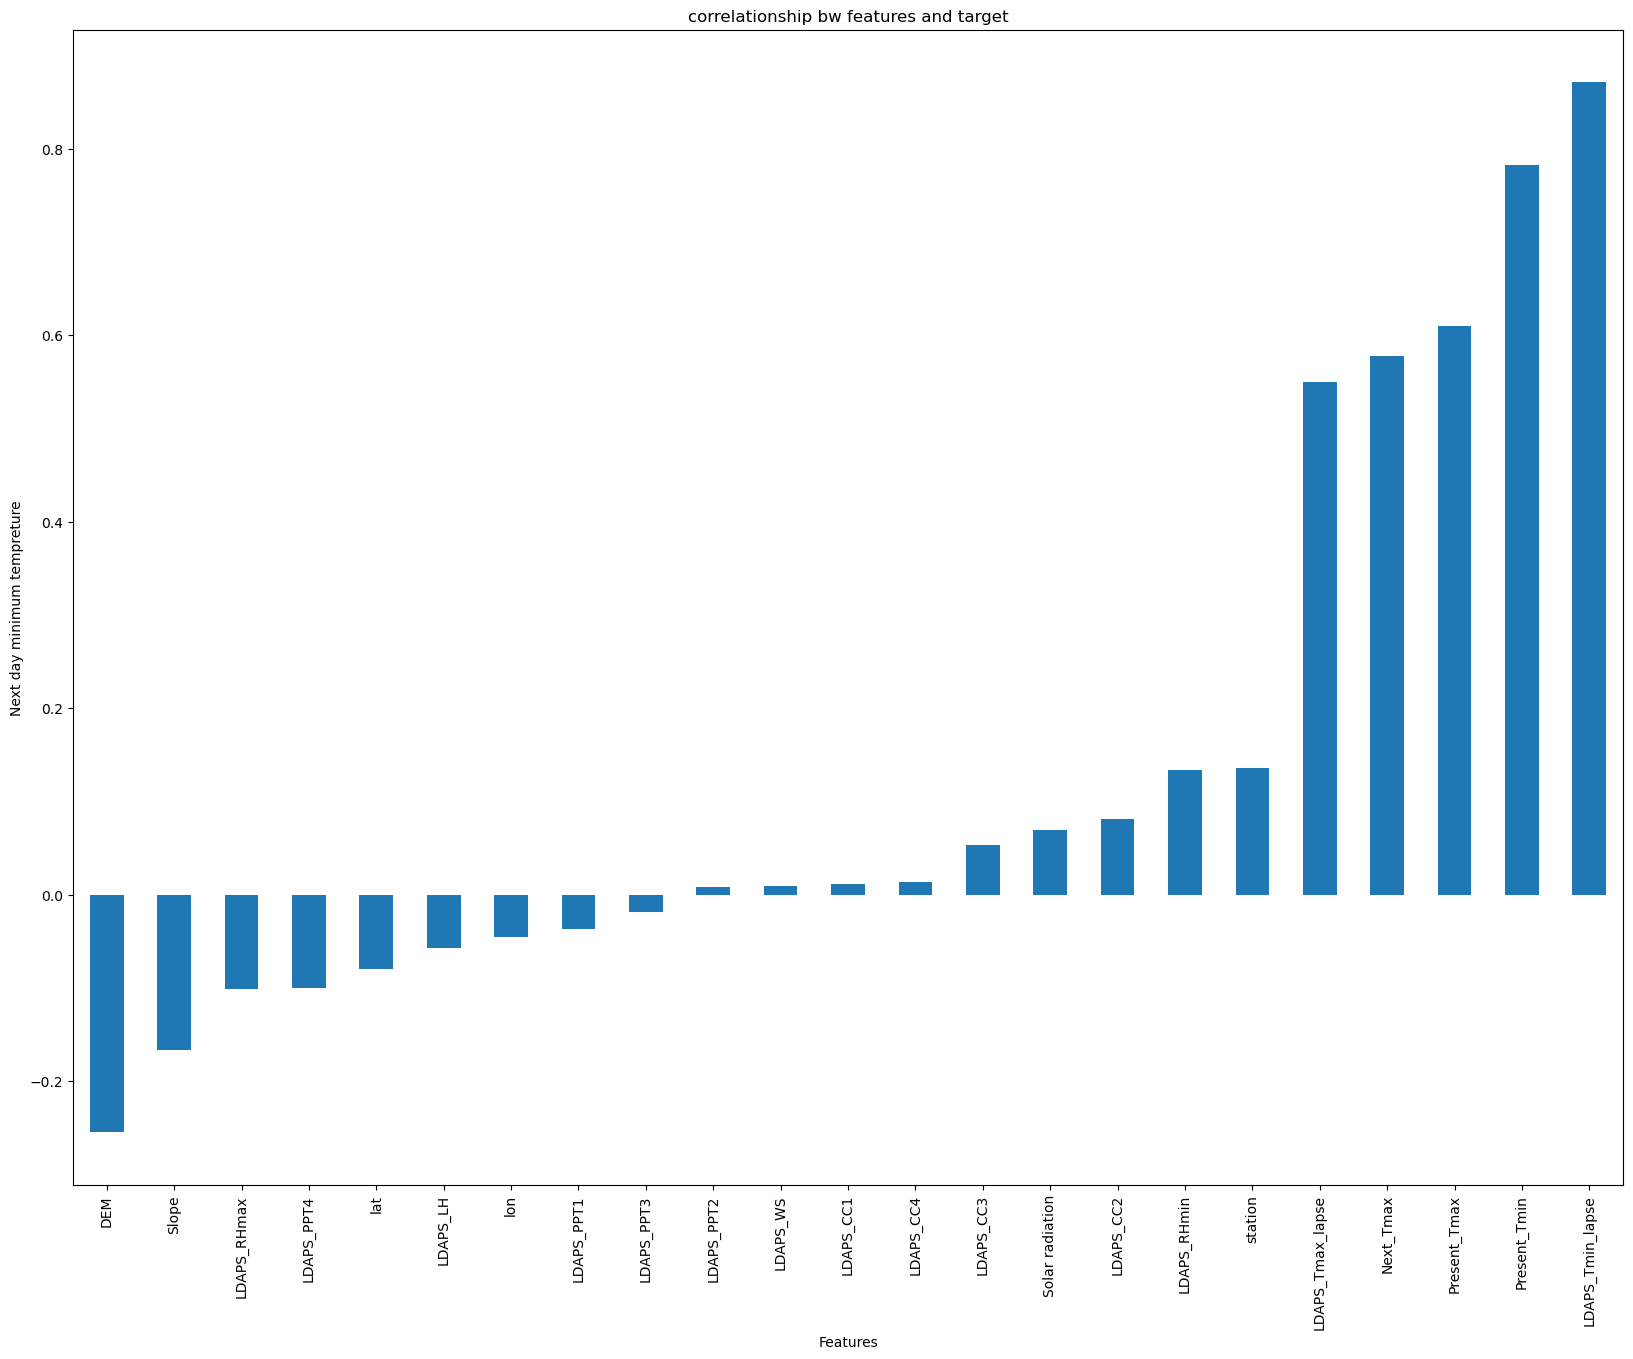

In [549]:
plt.figure(figsize=(20,15))
df.corr()['Next_Tmin'].sort_values().drop(['Next_Tmin']).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Next day minimum tempreture')
plt.title('correlationship bw features and target')

LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,Solar radiation columns has very less correlationship with target variable so i will drop them before model building.

In [550]:
df=df.drop(columns=['LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','lat','lon','Solar radiation'])

In [551]:
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     4.499858   
2013-06-30      2.0          31.9          21.6    52.263397     4.491419   
2013-06-30      3.0          31.6          23.3    48.690479     4.379060   
2013-06-30      4.0          32.0          23.4    58.239788     4.586534   
2013-06-30      5.0          31.4          21.9    56.174095     4.483978   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997     4.277426   
2017-08-30     22.0          22.5          17.4    30.094858     4.374125   
2017-08-30     23.0          23.3          17.1    26.741310     4.288483   
2017-08-30     24.0          23.3          17.7    24.040634     4.259746   
2017-08-30     25.0          23.2          17.4    22.933014     4.258805   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse       DEM     Slope  Next_Tmax  \
Date                                                                            
2013-06-30         28.074101          2.844153  5.965871  1.406938       29.1   
2013-06-30         29.850689          2.885901  3.550622  0.801092       30.5   
2013-06-30         30.091292          2.906984  3.217444  0.643203       31.1   
2013-06-30         29.704629          2.857247  3.575659  1.363477       31.7   
2013-06-30         29.113934          2.863778  3.272250  0.796600       31.2   
...                      ...               ...       ...       ...        ...   
2017-08-30         27.812697          2.635366  2.973771  0.830151       27.6   
2017-08-30         26.704905          2.611685  2.800629  0.510703       28.0   
2017-08-30         26.352081          2.657859  2.498004  0.537630       28.3   
2017-08-30         27.010193          2.655868  2.586099  0.605778       28.6   
2017-08-30         27.939516          2.645880  2.695484  0.647366       27.8   

            Next_Tmin  
Date                   
2013-06-30       21.2  
2013-06-30       22.5  
2013-06-30       23.9  
2013-06-30       24.3  
2013-06-30       22.5  
...               ...  
2017-08-30       17.7  
2017-08-30       17.1  
2017-08-30       18.1  
2017-08-30       18.8  
2017-08-30       17.4  

[6656 rows x 11 columns]

In [552]:
x=df.drop(columns=['Next_Tmin'],axis=1)
y=df.Next_Tmin

# Feature scaling-

In [553]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.670375     -0.434446     -0.826764     0.206804     0.448938   
1    -1.531509      0.685896     -0.739572    -0.229632     0.377851   
2    -1.392643      0.580864      0.001559    -0.489859    -0.568691   
3    -1.253778      0.720907      0.045155     0.205646     1.179120   
4    -1.114912      0.510843     -0.608784     0.055196     0.315163   
...        ...           ...           ...          ...          ...   
6651  1.106942     -2.395046     -2.396218    -2.237959    -1.424880   
6652  1.245808     -2.605111     -2.570601    -1.844234    -0.610263   
6653  1.384674     -2.325025     -2.701389    -2.088483    -1.331734   
6654  1.523540     -2.325025     -2.439814    -2.285181    -1.573817   
6655  1.662405     -2.360036     -2.570601    -2.365853    -1.581747   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse       DEM     Slope  Next_Tmax  
0            -0.681041         -0.268476  2.348270  1.283837  -0.501779  
1            -0.029456          0.192821 -0.139651 -0.417927  -0.020866  
2             0.058788          0.425779 -0.482854 -0.861422   0.185240  
3            -0.083025         -0.123787 -0.113861  1.161759   0.391346  
4            -0.299670         -0.051630 -0.426399 -0.430545   0.219591  
...                ...               ...       ...       ...        ...  
6651         -0.776914         -2.575474 -0.733858 -0.336302  -1.017044  
6652         -1.183211         -2.837133 -0.912210 -1.233603  -0.879640  
6653         -1.312613         -2.326937 -1.223941 -1.157966  -0.776587  
6654         -1.071242         -2.348934 -1.133194 -0.966547  -0.673534  
6655         -0.730402         -2.459293 -1.020519 -0.849729  -0.948342  

[6656 rows x 10 columns]

# Checking for multicollinearity among features-

In [554]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

VIF Values          Features
0    1.168298           station
1    2.167231      Present_Tmax
2    2.817491      Present_Tmin
3    4.228435       LDAPS_RHmin
4    1.679709       LDAPS_RHmax
5    6.998270  LDAPS_Tmax_lapse
6    5.532563  LDAPS_Tmin_lapse
7    3.041566               DEM
8    2.833712             Slope
9    3.329280         Next_Tmax

Here we can see that multicollinearity is under acceptable range i.e. <10 so we can move further for model building.

# Model building-

In [555]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [556]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i) #x&ywe are giving we got after resampling
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.8376221751447112 at random state 136


We are getting best accuracy at random state 136.

In [557]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxrs)

In [558]:
#Linear regression-

In [559]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
pred_train=lr.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predlr))
print('r2_score on train data -', r2_score(y_train,pred_train))   
print('mean absolute error- ',mean_absolute_error(y_test,predlr))
print('mean squared error- ',mean_squared_error(y_test,predlr))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predlr)))

r2_score on test data - 0.8376221751447112
r2_score on train data - 0.821675137172209
mean absolute error-  0.7540181304789673
mean squared error-  0.9061408048627716
root mean squared error-  0.9519142844094586


For linear regression train accuracy is 82% and test accuracy is 84%.

In [560]:
#Cross validation score for linear regression-

In [561]:
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predlr)-score.mean())*100)

[0.74561584 0.68778105 0.79732686 0.86746944 0.86324451]
0.7922875408139084
difference bw r2_score and cross validation score is - 4.533463433080276


The cross validation score for linear regression is 79%

In [562]:
#RandomForestRegressor-

In [563]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
pred_train=rf.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predrf))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predrf))
print('mean squared error- ',mean_squared_error(y_test,predrf))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predrf)))

r2_score on test data - 0.8832160041858359
r2_score on train data - 0.9815594350610437
mean absolute error-  0.62679268903355
mean squared error-  0.6517068698047067
root mean squared error-  0.8072836365272783


for random forest regressor train accuracy is 98% and test accuracy 88%.

In [564]:
#Cross validation score for RandomForestRegressor-

In [565]:
score1=cross_val_score(rf,x,y)
print(score1)
print(score1.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predrf)-score1.mean())*100)

[0.73765667 0.69983963 0.80038119 0.86916693 0.85131363]
0.7916716094297536
difference bw r2_score and cross validation score is - 9.154439475608234


for random forest regressor cross validation score is 79%

In [566]:
#KNN-

In [567]:
kn=KNN()
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
pred_train=kn.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,predkn))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predkn))
print('mean squared error- ',mean_squared_error(y_test,predkn))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predkn)))

r2_score on test data - 0.8429365666273488
r2_score on train data - 0.8885346881290637
mean absolute error-  0.7345518277416124
mean squared error-  0.876484126189284
root mean squared error-  0.9362073094081694


For KNN model the train score 89% and test accuracy is 84%.

In [568]:
#Cross validation score for KNN-

In [569]:
score2=cross_val_score(kn,x,y)
print(score2)
print(score2.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predkn)-score2.mean())*100)

[0.6509123  0.62164246 0.76427096 0.84633905 0.83575238]
0.7437834313676296
difference bw r2_score and cross validation score is - 9.915313525971925


The cross validation score for KNN model is 74%

In [570]:
#Gradient boosting regressor-

In [571]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
pred_train=gb.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predgb))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predgb))
print('mean squared error- ',mean_squared_error(y_test,predgb))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predgb)))

r2_score on test data - 0.874243471730867
r2_score on train data - 0.8844883360079752
mean absolute error-  0.6574112268103943
mean squared error-  0.7017776093755108
root mean squared error-  0.8377216777519314


for gradient boosting regressor the train accuracy is 88% & test accuracy is 87%

In [572]:
#Cross validation score for gradient bossting regressor-

In [573]:
score3=cross_val_score(gb,x,y)
print(score3)
print(score3.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predgb)-score3.mean())*100)

[0.75614714 0.70445291 0.82656925 0.87801367 0.88272539]
0.8095816712647237
difference bw r2_score and cross validation score is - 6.466180046614333


for gradient boosting regressor the cross validation score is 81%.

In [574]:
#Lasso-

In [575]:
lasso=Lasso()
lasso.fit(x_train,y_train)
predla=lasso.predict(x_test)
pred_train=lasso.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predla))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predla))
print('mean squared error- ',mean_squared_error(y_test,predla))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predla)))

r2_score on test data - 0.5917795662625829
r2_score on train data - 0.5763677678155583
mean absolute error-  1.2112508770754622
mean squared error-  2.27805239242435
root mean squared error-  1.509321831957767


for lasso model the train accuracy is 57% & test accuracy is 59%.

In [576]:
#Cross validation score for lasso

In [577]:
score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print('difference bw r2_score and cross validation score is- ',(r2_score(y_test,predla)-score4.mean())*100)

[0.53001281 0.39094358 0.57964868 0.4845488  0.63479907]
0.5239905882016581
difference bw r2_score and cross validation score is-  6.778897806092477


for lasso model the cross validation score is 52%.

In [578]:
#Ridge-

In [579]:
rd=Ridge()
rd.fit(x_train,y_train)
predri=rd.predict(x_test)
pred_train=rd.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predri))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predri))
print('mean squared error- ',mean_squared_error(y_test,predri))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predri)))

r2_score on test data - 0.8376173211347965
r2_score on train data - 0.8216750475840842
mean absolute error-  0.7540383375775406
mean squared error-  0.9061678924066207
root mean squared error-  0.9519285122353572


for ridge model train accuracy is 82% & test accuracy is 84%

In [580]:
#Cross validation score for ridge model-

In [581]:
score5=cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predri)-score5.mean())*100)

[0.74561284 0.68779544 0.79731055 0.86747657 0.86326264]
0.7922916080292225
difference bw r2_score and cross validation score is - 4.532571310557398


for ridge model cross validation score is 79%

In [583]:
#Decision tree-

In [584]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
pred_train=dt.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,preddt))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,preddt))
print('mean squared error- ',mean_squared_error(y_test,preddt))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,preddt)))

r2_score on test data - 0.7358040380107584
r2_score on train data - 1.0
mean absolute error-  0.9171757636454682
mean squared error-  1.474331497245869
root mean squared error-  1.214220530729846


for decision tree regressor train accuracy is 100% & test accuracy is 74% which looks like an overfitted model.

In [585]:
#Cross validation score for decision tree-

In [586]:
score6=cross_val_score(dt,x,y)
print(score6)
print(score6.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,preddt)-score6.mean())*100)

[0.52231873 0.51105189 0.62786624 0.74301178 0.65992023]
0.6128337734735761
difference bw r2_score and cross validation score is - 12.29702645371823


The cross validation score for decision tree 61%.

In [587]:
#SVR-

In [588]:
svr=SVR()
svr.fit(x_train,y_train)
predsv=svr.predict(x_test)
pred_train=svr.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predsv))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predsv))
print('mean squared error- ',mean_squared_error(y_test,predsv))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predsv)))

r2_score on test data - 0.8677506440393825
r2_score on train data - 0.8727890182073017
mean absolute error-  0.6616982892128908
mean squared error-  0.7380104885598475
root mean squared error-  0.8590753683815219


for SVR model the train accuracy is 87% and test accuracy is 87%.

In [589]:
#Cross validation score for SVR-

In [590]:
score7=cross_val_score(svr,x,y)
print(score7)
print(score7.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predsv)-score7.mean())*100)

[0.73720614 0.66935875 0.78758856 0.86246741 0.86686704]
0.7846975810013025
difference bw r2_score and cross validation score is - 8.305306303808003


the cross validation score for svr model is 78%.

In [591]:
#Extra Tree Regressor-

In [592]:
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
predet=et.predict(x_test)
pred_train=et.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predet))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predet))
print('mean squared error- ',mean_squared_error(y_test,predet))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predet)))

r2_score on test data - 0.8863725409506358
r2_score on train data - 0.9999999992880608
mean absolute error-  0.6182468703054578
mean squared error-  0.6340919844767149
root mean squared error-  0.7962989290942911


for extra tree regressor train accuracy is 100% & test accuracy 87% which looks like an overfitted model.

In [593]:
#Cross validation score for extra tree regressor-

In [594]:
score8=cross_val_score(et,x,y)
print(score8)
print(score8.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predet)-score8.mean())*100)

[0.74155219 0.69790632 0.80157414 0.86713724 0.86229862]
0.7940937029566915
difference bw r2_score and cross validation score is - 9.227883799394432


The cross validation score for extra tree regressor is 79%

# Selection of the best Model-

Both ridge & Grdient boosting regressor working well here on this data set but with Gradient boosting model we are getting higher accuracy & cross validation score than the ridge model however the differnce bw cross validation score & test accuracy is less with Ridge model we will hypertune Grdient boosting regressor model.

# Hyperparameter tunning-

In [599]:
from sklearn.model_selection import GridSearchCV

In [595]:
param_grid={'loss':['squared_error', 'absolute_error'],'criterion' : ['friedman_mse', 'squared_error'],'random_state':[10,20,40],'max_depth':[3,5],
            'n_estimators':[100,200,400],'min_samples_leaf':[2,3]}

In [596]:
gs=GridSearchCV(GradientBoostingRegressor(),param_grid,cv=5)

In [597]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5], 'min_samples_leaf': [2, 3],
                         'n_estimators': [100, 200, 400],
                         'random_state': [10, 20, 40]})

In [598]:
gs.best_params_

{'criterion': 'friedman_mse',
 'loss': 'squared_error',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'n_estimators': 200,
 'random_state': 10}

In [602]:
final_model=GradientBoostingRegressor(criterion='friedman_mse',max_depth=7,loss='squared_error',n_estimators=200,random_state=10,min_samples_leaf=2)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)

In [603]:
r2_score(y_test,pred)

0.8932307585167462

The accuracy we are getting with Ridge model is 89% after hyper parameter tunning.

# Saving the model-

In [604]:
import joblib
joblib.dump(final_model,'Minimum tempreture forecasting-1')

['Minimum tempreture forecasting-1']

In [605]:
model=joblib.load('Minimum tempreture forecasting-1')

In [606]:
#prediction-

In [607]:
prediction=model.predict(x_test)
prediction

array([23.3449018 , 19.86256996, 23.24697264, ..., 22.3236573 ,
       24.59651011, 25.01403798])

In [608]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

predicted  original
0     23.344902      20.5
1     19.862570      19.2
2     23.246973      23.3
3     26.604525      26.8
4     23.932279      23.8
...         ...       ...
1992  25.173659      26.2
1993  22.881124      25.2
1994  22.323657      23.5
1995  24.596510      24.3
1996  25.014038      23.5

[1997 rows x 2 columns]

# Plotting the difference bw the prediction & actual values to understand the difference better-¶

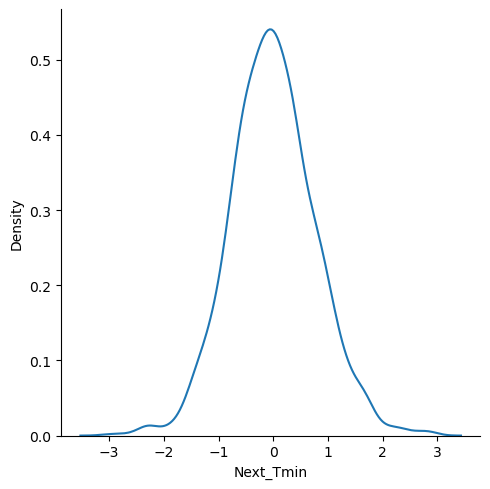

In [609]:
sns.displot(prediction-y_test,kind='kde')

Here we can see that the variance is bw predicted values & actual values is from -3 to 3.

# Model-III (With principle component analysis-)

In [663]:
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     4.499858   
2013-06-30      2.0          31.9          21.6    52.263397     4.491419   
2013-06-30      3.0          31.6          23.3    48.690479     4.379060   
2013-06-30      4.0          32.0          23.4    58.239788     4.586534   
2013-06-30      5.0          31.4          21.9    56.174095     4.483978   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997     4.277426   
2017-08-30     22.0          22.5          17.4    30.094858     4.374125   
2017-08-30     23.0          23.3          17.1    26.741310     4.288483   
2017-08-30     24.0          23.3          17.7    24.040634     4.259746   
2017-08-30     25.0          23.2          17.4    22.933014     4.258805   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
Date                                                                            
2013-06-30         28.074101          2.844153  1.896289  4.110499   0.233947   
2013-06-30         29.850689          2.885901  1.785468  3.731014   0.225508   
2013-06-30         30.091292          2.906984  1.830969  2.740099   0.209344   
2013-06-30         29.704629          2.857247  1.781083  4.035663   0.216372   
2013-06-30         29.113934          2.863778  1.789965  4.761697   0.151407   
...                      ...               ...       ...       ...        ...   
2017-08-30         27.812697          2.635366  1.876086  2.126355   0.052902   
2017-08-30         26.704905          2.611685  1.793400  4.347071   0.066461   
2017-08-30         26.352081          2.657859  1.832031  4.161290   0.030034   
2017-08-30         27.010193          2.655868  1.870345  3.614996   0.035874   
2017-08-30         27.939516          2.645880  1.938926  2.086997   0.048954   

            ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  \
Date        ...                                                         
2013-06-30  ...         0.0         0.0         0.0  37.6046  126.991   
2013-06-30  ...         0.0         0.0         0.0  37.6046  127.032   
2013-06-30  ...         0.0         0.0         0.0  37.5776  127.058   
2013-06-30  ...         0.0         0.0         0.0  37.6450  127.022   
2013-06-30  ...         0.0         0.0         0.0  37.5507  127.135   
...         ...         ...         ...         ...      ...      ...   
2017-08-30  ...         0.0         0.0         0.0  37.5507  127.040   
2017-08-30  ...         0.0         0.0         0.0  37.5102  127.086   
2017-08-30  ...         0.0         0.0         0.0  37.5372  126.891   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.909   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.970   

                 DEM     Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                   
2013-06-30  5.965871  1.406938      5992.895996       29.1       21.2  
2013-06-30  3.550622  0.801092      5869.312500       30.5       22.5  
2013-06-30  3.217444  0.643203      5863.555664       31.1       23.9  
2013-06-30  3.575659  1.363477      5856.964844       31.7       24.3  
2013-06-30  3.272250  0.796600      5859.552246       31.2       22.5  
...              ...       ...              ...        ...        ...  
2017-08-30  2.973771  0.830151      4456.024414       27.6       17.7  
2017-08-30  2.800629  0.510703      4441.803711       28.0       17.1  
2017-08-30  2.498004  0.537630      4443.313965       28.3       18.1  
2017-08-30  2.586099  0.605778      4438.373535       28.6       18.8  
2017-08-30  2.695484  0.647366      4451.345215       27.8       17.4  

[6656 rows x 24 columns]

Imported the data frame from the above after the removal of skewness & outliers.

# Relationship bw features and label-

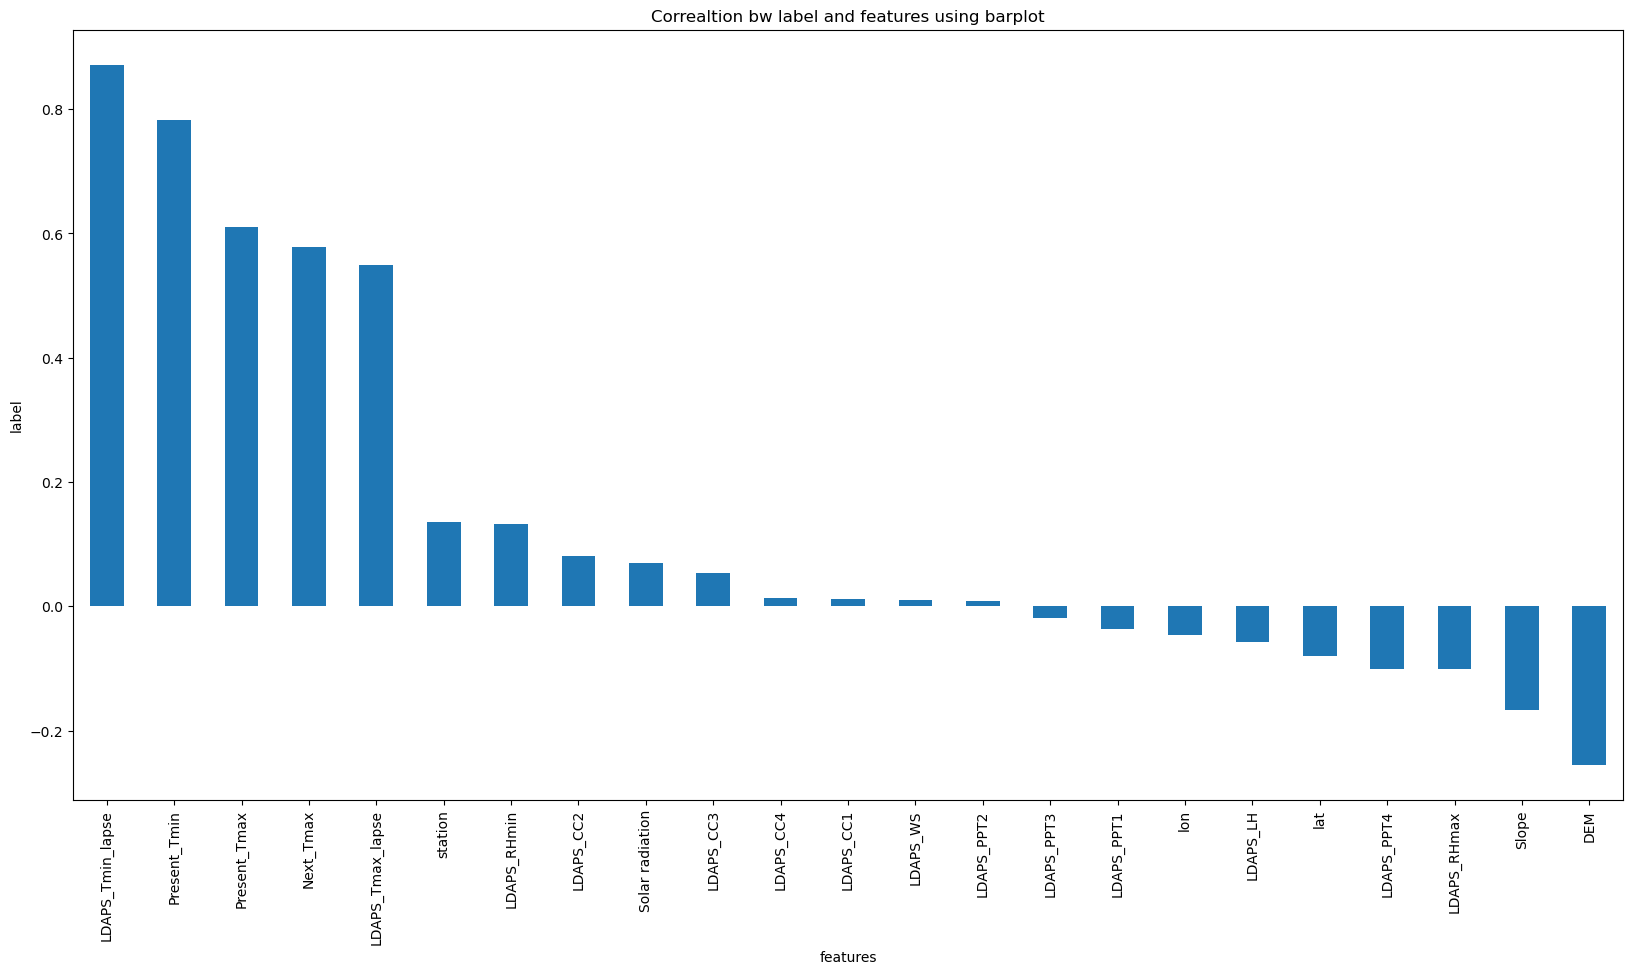

In [667]:
plt.figure(figsize=(20,10))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('label')
plt.title('Correaltion bw label and features using barplot')
plt.show()

# Separating features and label-

In [668]:
x=df.drop(columns=['Next_Tmin'])
y=df.Next_Tmin

# Feature scaling-

In [669]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.670375     -0.434446     -0.826764     0.206804     0.448938   
1    -1.531509      0.685896     -0.739572    -0.229632     0.377851   
2    -1.392643      0.580864      0.001559    -0.489859    -0.568691   
3    -1.253778      0.720907      0.045155     0.205646     1.179120   
4    -1.114912      0.510843     -0.608784     0.055196     0.315163   
...        ...           ...           ...          ...          ...   
6651  1.106942     -2.395046     -2.396218    -2.237959    -1.424880   
6652  1.245808     -2.605111     -2.570601    -1.844234    -0.610263   
6653  1.384674     -2.325025     -2.701389    -2.088483    -1.331734   
6654  1.523540     -2.325025     -2.439814    -2.285181    -1.573817   
6655  1.662405     -2.360036     -2.570601    -2.365853    -1.581747   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.681041         -0.268476  0.060502  0.377484  -0.433614  ...   
1            -0.029456          0.192821 -0.614997 -0.120902  -0.467334  ...   
2             0.058788          0.425779 -0.337653 -1.422295  -0.531919  ...   
3            -0.083025         -0.123787 -0.641730  0.279201  -0.503837  ...   
4            -0.299670         -0.051630 -0.587587  1.232718  -0.763406  ...   
...                ...               ...       ...       ...        ...  ...   
6651         -0.776914         -2.575474 -0.062646 -2.228340  -1.156982  ...   
6652         -1.183211         -2.837133 -0.566651  0.688180  -1.102808  ...   
6653         -1.312613         -2.326937 -0.331176  0.444190  -1.248352  ...   
6654         -1.071242         -2.348934 -0.097639 -0.273272  -1.225020  ...   
6655         -0.730402         -2.459293  0.320394 -2.280030  -1.172759  ...   

      LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat       lon  \
0      -0.535846   -0.485584   -0.460074   -0.400228  1.203695  0.004750   
1      -0.535846   -0.485584   -0.460074   -0.400228  1.203695  0.519348   
2      -0.535846   -0.485584   -0.460074   -0.400228  0.665976  0.845678   
3      -0.535846   -0.485584   -0.460074   -0.400228  2.008282  0.393836   
4      -0.535846   -0.485584   -0.460074   -0.400228  0.130249  1.812117   
...          ...         ...         ...         ...       ...       ...   
6651   -0.535846   -0.485584   -0.460074   -0.400228  0.130249  0.619757   
6652   -0.535846   -0.485584   -0.460074   -0.400228 -0.676329  1.197110   
6653   -0.535846   -0.485584   -0.460074   -0.400228 -0.138611 -1.250366   
6654   -0.535846   -0.485584   -0.460074   -0.400228 -0.407470 -1.024445   
6655   -0.535846   -0.485584   -0.460074   -0.400228 -0.407470 -0.258824   

           DEM     Slope  Solar radiation  Next_Tmax  
0     2.348270  1.283837         1.545416  -0.501779  
1    -0.139651 -0.417927         1.249738  -0.020866  
2    -0.482854 -0.861422         1.235965   0.185240  
3    -0.113861  1.161759         1.220196   0.391346  
4    -0.426399 -0.430545         1.226386   0.219591  
...        ...       ...              ...        ...  
6651 -0.733858 -0.336302        -2.131604  -1.017044  
6652 -0.912210 -1.233603        -2.165627  -0.879640  
6653 -1.223941 -1.157966        -2.162014  -0.776587  
6654 -1.133194 -0.966547        -2.173834  -0.673534  
6655 -1.020519 -0.849729        -2.142799  -0.948342  

[6656 rows x 23 columns]

Our features are been scaled now so we can move further for model building.

# Applying Principle component analysis-

In [670]:
from sklearn.decomposition import PCA

In [671]:
pca=PCA()
pca.fit_transform(x)

array([[ 0.22873056,  2.5906539 , -2.27574731, ...,  0.3066347 ,
        -0.1346259 ,  0.35692896],
       [-0.81881519,  0.63082129, -0.77523255, ..., -0.18559315,
        -0.1690715 ,  0.29854737],
       [-1.17031246, -0.30622403,  0.17861387, ...,  0.15724569,
        -0.12529169,  0.37994287],
       ...,
       [-2.52932453,  4.47108443,  3.69137304, ..., -0.20865223,
         0.54456235,  0.50430113],
       [-2.71694417,  4.25085482,  3.83065583, ..., -0.10750189,
         0.5231593 ,  0.38934503],
       [-2.5265443 ,  4.18868239,  4.31881679, ..., -0.01033086,
         0.32078587,  0.05820264]])

In [672]:
#Lets check how much components required for model building which covers maximun variance-

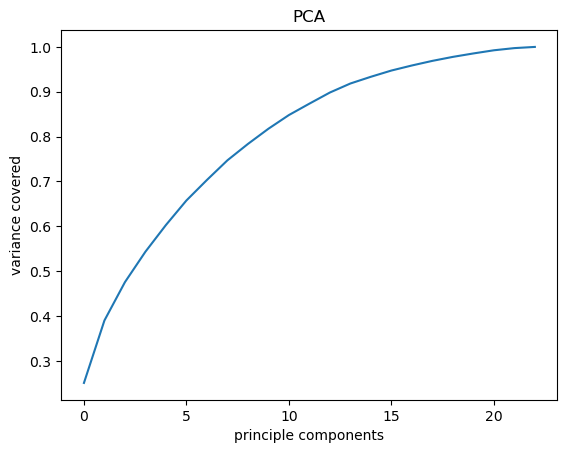

In [673]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))  #cumulative sum  #this explained ratio will tell the correlation bw feature 
plt.xlabel('principle components') #and label for every component of feature i.e igon values or the distance.
plt.ylabel('variance covered')   
plt.title('PCA')
plt.show()

From this figure we can say that 19 Components will be enough which will cover maximum variance so lets build 19 component from the existing features.

In [675]:
pca=PCA(n_components=19)
new_components=pca.fit_transform(x)

In [676]:
princi_comp=pd.DataFrame(new_components,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19'])
princi_comp

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     0.228731  2.590654 -2.275747  0.786668 -0.463414 -0.954946  0.519849   
1    -0.818815  0.630821 -0.775233 -0.148191  1.214817 -1.367397  0.379020   
2    -1.170312 -0.306224  0.178614  0.158323  0.678970 -2.170600 -0.150407   
3    -0.601895  0.788527 -2.138339  0.034289  1.223602 -0.980012  0.688076   
4    -0.820529  0.660387 -0.822884 -0.129054  1.616576 -0.779215  0.230658   
...        ...       ...       ...       ...       ...       ...       ...   
6651 -2.359449  4.559432  3.541368 -1.342155 -0.228533 -0.761026 -1.758497   
6652 -2.026034  4.811447  3.221960 -2.101938  1.096089  0.863226 -1.047273   
6653 -2.529325  4.471084  3.691373 -2.568997  0.165378  1.643320 -0.663183   
6654 -2.716944  4.250855  3.830656 -2.310168 -0.329741  1.258150 -1.050820   
6655 -2.526544  4.188682  4.318817 -1.760380 -0.853841 -0.143437 -1.828029   

           PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0    -1.436440  0.344764 -0.095724  0.475977  0.023576  0.330168  0.119260   
1    -1.324757  0.353679 -0.301950  0.514900  0.284602  0.224312 -0.139430   
2    -0.956315  0.697547 -0.537575  0.608813  0.475051 -0.082124 -0.079899   
3    -1.230782  0.042876  0.726851  0.485765 -0.405800  0.222893 -0.171453   
4    -1.231606 -0.775237 -0.436195 -0.571916  1.548507 -0.196031 -0.057560   
...        ...       ...       ...       ...       ...       ...       ...   
6651  2.486790  0.522214  0.548506  0.963458 -0.313178 -0.275809 -0.600050   
6652  1.828948 -0.729657  0.166448 -0.381911  0.827056 -0.461246 -0.417355   
6653  1.461056  0.454781  0.615535  0.803797  0.002074  0.616636 -0.326492   
6654  1.788523  0.488232  0.543710  0.884006 -0.023464  0.421499 -0.372173   
6655  2.300961  0.661645  0.639087  1.194450 -0.243921 -0.169195 -0.640542   

          PC15      PC16      PC17      PC18      PC19  
0     0.404828  0.154006 -0.087215 -0.204166  0.550738  
1     0.679734 -0.105345  0.706415  0.067986  0.344531  
2     0.898104 -0.255480  0.312287  0.017924 -0.042442  
3     0.803420 -0.339386  0.287118  0.538766 -0.512515  
4     0.434110 -0.057438  0.303181 -0.260658 -0.060995  
...        ...       ...       ...       ...       ...  
6651  0.180500 -0.236015 -0.439274 -0.169331  0.035570  
6652 -0.516559  0.043422 -0.652212 -0.420050  0.370649  
6653 -0.256654  0.892964 -0.359408 -0.494124  0.275728  
6654 -0.184988  0.720578 -0.422057 -0.347514  0.090764  
6655  0.011423 -0.054430 -0.118308 -0.218576  0.124091  

[6656 rows x 19 columns]

Here we have made 19 components from the existing features.

# Model building-

In [677]:
#Importing libraries-

In [678]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [679]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.30,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.8367453268693593 at random state 193


Best accuracy we got is 84% for linear regression for random state=193.

In [680]:
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.30,random_state=maxrs)

Splitted the data on the same random state.

In [681]:
#Linear regression-

In [682]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
pred_train=lr.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predlr))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predlr))
print('mean squared error- ',mean_squared_error(y_test,predlr))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predlr)))

r2_score on test data - 0.8367453268693593
r2_score on train data - 0.8198668469142744
mean absolute error-  0.7761291542107959
mean squared error-  0.9532927871008022
root mean squared error-  0.9763671374543503


for linear regression we got train accuracy-82% and test accuracy-84% 

In [ ]:
#Cross validation score-

In [683]:
score=cross_val_score(lr,princi_comp,y)
print(score)
print(score.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predlr)-score.mean())*100)

[0.72031407 0.68200896 0.78635859 0.85456609 0.85634226]
0.7799179928071568
difference bw r2_score and cross validation score is - 5.682733406220253


The cross validation score for linear regression is 78%.

In [684]:
#Random forest regressor-

In [685]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
pred_train=rf.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predrf))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predrf))
print('mean squared error- ',mean_squared_error(y_test,predrf))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predrf)))

r2_score on test data - 0.867233687037787
r2_score on train data - 0.9798697937885887
mean absolute error-  0.686156735102654
mean squared error-  0.7752621477215823
root mean squared error-  0.88048972039518


for Random forest regressor we got train accuracy-98% and test accuracy-87% which looks like an underfitted model.

In [686]:
#Cross validation score-

In [687]:
score1=cross_val_score(rf,princi_comp,y)
print(score1)
print(score1.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predrf)-score1.mean())*100)

[0.67041225 0.66018008 0.7740603  0.81351201 0.8577006 ]
0.7551730491514314
difference bw r2_score and cross validation score is - 11.206063788635568


the cross validation score for random forest is 76%.

In [688]:
#KNN-

In [689]:
kn=KNN()
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
pred_train=kn.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,predkn))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predkn))
print('mean squared error- ',mean_squared_error(y_test,predkn))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predkn)))

r2_score on test data - 0.8618122085312034
r2_score on train data - 0.9061705654707364
mean absolute error-  0.6941311967951929
mean squared error-  0.8069197796695045
root mean squared error-  0.8982871365379249


for KNN model we got train accuracy-90% and test accuracy-86% which looks generalised model.

In [690]:
#Cross validation score-

In [691]:
score2=cross_val_score(kn,princi_comp,y)
print(score2)
print(score2.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predkn)-score2.mean())*100)

[0.51382947 0.52457117 0.6737428  0.73179894 0.78094797]
0.6449780704692081
difference bw r2_score and cross validation score is - 21.683413806199535


the cross validation score for KNN is 64%

In [692]:
#GradientBoostingRegressor-

In [693]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
pred_train=gb.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predgb))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predgb))
print('mean squared error- ',mean_squared_error(y_test,predgb))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predgb)))

r2_score on test data - 0.8520670312749005
r2_score on train data - 0.8768609534876416
mean absolute error-  0.7331903803964778
mean squared error-  0.8638247797488485
root mean squared error-  0.9294217448224722


for Gradient boosting regressor model we got train accuracy-88% and test accuracy-85% which looks like generalised model.

In [694]:
#Cross validation score-

In [695]:
score3=cross_val_score(gb,princi_comp,y)
print(score3)
print(score3.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predgb)-score3.mean())*100)

[0.7018724  0.67797564 0.79058764 0.83040686 0.8582744 ]
0.7718233889891152
difference bw r2_score and cross validation score is - 8.024364228578529


The cross validation score for gradient boosting regressor is 77%.

In [697]:
#Lasso-

In [698]:
lasso=Lasso()
lasso.fit(x_train,y_train)
predla=lasso.predict(x_test)
pred_train=lasso.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predla))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predla))
print('mean squared error- ',mean_squared_error(y_test,predla))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predla)))

r2_score on test data - 0.6051154457402725
r2_score on train data - 0.5985057646712226
mean absolute error-  1.2202799802046809
mean squared error-  2.3058488317334467
root mean squared error-  1.5185021671810175


for Lasso model we got train accuracy-60% and test accuracy-61% which looks like this model is not performing well.

In [699]:
#Cross validation score-

In [700]:
score4=cross_val_score(lasso,princi_comp,y)
print(score4)
print(score4.mean())
print('difference bw r2_score and cross validation score is- ',(r2_score(y_test,predla)-score4.mean())*100)

[0.46451739 0.42397222 0.57074932 0.58243858 0.64080258]
0.5364960174555655
difference bw r2_score and cross validation score is-  6.861942828470702


The cross validation score for lasso is 54%

In [701]:
#Ridge-

In [702]:
rd=Ridge()
rd.fit(x_train,y_train)
predri=rd.predict(x_test)
pred_train=rd.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predri))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predri))
print('mean squared error- ',mean_squared_error(y_test,predri))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predri)))

r2_score on test data - 0.8367419223741761
r2_score on train data - 0.8198668317220142
mean absolute error-  0.7761389815859839
mean squared error-  0.9533126669648185
root mean squared error-  0.9763773179282784


for Ridge model we got train accuracy-82% and test accuracy-84%.

In [703]:
#Cross validation score-

In [704]:
score5=cross_val_score(rd,princi_comp,y)
print(score5)
print(score5.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predri)-score5.mean())*100)

[0.72031176 0.68202272 0.78637581 0.85455965 0.85636657]
0.7799273024811239
difference bw r2_score and cross validation score is - 5.681461989305225


The cross validation score for ridge 78%.

In [705]:
#DecisionTreeRegressor-

In [706]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
pred_train=dt.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,preddt))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,preddt))
print('mean squared error- ',mean_squared_error(y_test,preddt))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,preddt)))

r2_score on test data - 0.7192369672807343
r2_score on train data - 1.0
mean absolute error-  0.968953430145218
mean squared error-  1.639459188783175
root mean squared error-  1.2804136787707225


for Decision tree regressor model we got train accuracy-100% and test accuracy-72% which looks like an overfitted model.

In [707]:
#Cross validation score-

In [708]:
score6=cross_val_score(dt,princi_comp,y)
print(score6)
print(score6.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,preddt)-score6.mean())*100)

[0.35781658 0.40447803 0.56148932 0.67861822 0.64378621]
0.5292376705603101
difference bw r2_score and cross validation score is - 18.999929672042416


The cross validation score for decision tree is 53%.

In [709]:
#SVR

In [710]:
from sklearn.svm import SVR

In [711]:
svr=SVR()
svr.fit(x_train,y_train)
predsv=svr.predict(x_test)
pred_train=svr.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predsv))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predsv))
print('mean squared error- ',mean_squared_error(y_test,predsv))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predsv)))

r2_score on test data - 0.8935589120215982
r2_score on train data - 0.9171163402214964
mean absolute error-  0.613262222564355
mean squared error-  0.6215412978700695
root mean squared error-  0.7883789050133632


for support vector regressor model we got train accuracy-91% and test accuracy-89.3% which looks like an normal generalsied model among other models.

In [712]:
#Cross validation score-

In [713]:
score7=cross_val_score(svr,princi_comp,y)
print(score7)
print(score7.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predsv)-score7.mean())*100)

[0.66800238 0.64606723 0.76427599 0.81320235 0.84090266]
0.7464901215505634
difference bw r2_score and cross validation score is - 14.706879047103483


The cross validation score for SVR is 75%.

In [714]:
#Extra Tree regressor-

In [715]:
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
predet=et.predict(x_test)
pred_train=et.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predet))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predet))
print('mean squared error- ',mean_squared_error(y_test,predet))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predet)))

r2_score on test data - 0.8761720935926012
r2_score on train data - 1.0
mean absolute error-  0.6642318477716573
mean squared error-  0.7230681226840255
root mean squared error-  0.8503341241441658


for Extra tree regressor model we got train accuracy-100% and test accuracy-87% which looks like an normal overfitted model.

In [716]:
#Cross validation score-

In [717]:
score8=cross_val_score(et,princi_comp,y)
print(score8)
print(score8.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predet)-score8.mean())*100)

[0.69218818 0.65721349 0.78205268 0.82108194 0.86490621]
0.7634884995918995
difference bw r2_score and cross validation score is - 11.268359400070171


The cross validation score for extra tree regressor is 76%

# Selection of best model-

Here we can see that among all models Ridge regularization model is performing best on this data set which is giving train accuracy-82% & test accuracy-84% and cross validation score-78% which is best among all models so we will hypertune further Ridge model to increase its accuracy.

# Hyperparameter Tunning-

In [718]:
from sklearn.model_selection import GridSearchCV

In [719]:
param_grid={'alpha':[0.2, 0.5, 1,0, 0.7, 1.2],'max_iter':[500,1000,1500,2000,2500],'solver' : ['auto', 'svd', 'cholesky', 'lsqr'],'tol':[1.0,2.0,3.0],'random_state':[100,200,300,400,500,700,800],'normalize':[True,False]}

In [720]:
gs=GridSearchCV(Ridge(),param_grid,cv=5)  
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.2, 0.5, 1, 0, 0.7, 1.2],
                         'max_iter': [500, 1000, 1500, 2000, 2500],
                         'normalize': [True, False],
                         'random_state': [100, 200, 300, 400, 500, 700, 800],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr'],
                         'tol': [1.0, 2.0, 3.0]})

In [722]:
gs.best_params_

{'alpha': 1.2,
 'max_iter': 500,
 'normalize': False,
 'random_state': 100,
 'solver': 'auto',
 'tol': 1.0}

In [729]:
final_model=Ridge(alpha= 1.2, max_iter= 500, random_state= 100, solver= 'auto',tol=1.0,normalize=False)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)

In [730]:
r2_score(y_test,pred)

0.8367412382135294

The accuracy of model is increased to 84% with the help of Grid search CV.

# Saving model-

In [731]:
import joblib
joblib.dump(final_model,'Minimum tempreture forecasting-3')

['Minimum tempreture forecasting-3']

In [732]:
model=joblib.load('Minimum tempreture forecasting-3')

In [733]:
#Lets make the prediction with our final model-

In [734]:
prediction=model.predict(x_test)
prediction

array([22.89446729, 26.49874812, 26.59106637, ..., 26.84460508,
       25.24339109, 23.8191281 ])

In [735]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

predicted  original
0     22.894467      23.1
1     26.498748      27.0
2     26.591066      26.3
3     27.950965      26.2
4     22.983738      22.4
...         ...       ...
1992  24.995131      24.8
1993  22.839058      24.3
1994  26.844605      27.5
1995  25.243391      24.9
1996  23.819128      23.1

[1997 rows x 2 columns]

# Plotting the difference bw the prediction & actual values to understand the difference better-¶

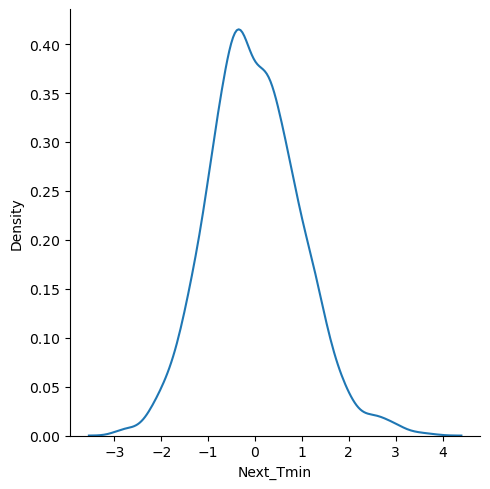

In [736]:
sns.displot(prediction-y_test,kind='kde')

Here we can see that the variance is bw predicted values & actual values is from -3 to 4.

# Coclusion-
Here i have saved 3 models for the prediction of Next day minimum tempreture on this data set-

1. Model-I having accuracy of 85% with Ridge Regularization model.     
2. Model-II having accuracy of 89% with Gradient boosting regression model.      
3. Model-III having accuracy of 84% with Ridge Regularization model